In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/EUR_USD_15min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(74270, 4)


open    close      low     high
timestamp                                              
2020-01-01 17:00:00  1.12120  1.12127  1.12106  1.12139
2020-01-01 17:15:00  1.12127  1.12146  1.12127  1.12154
2020-01-01 17:30:00  1.12147  1.12154  1.12138  1.12156
2020-01-01 17:45:00  1.12155  1.12143  1.12143  1.12166
2020-01-01 18:00:00  1.12143  1.12202  1.12142  1.12218

In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(74269, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  1.12120  1.12127  1.12106  1.12139         1.12146    17   
2020-01-01 17:15:00  1.12127  1.12146  1.12127  1.12154         1.12154    17   
2020-01-01 17:30:00  1.12147  1.12154  1.12138  1.12156         1.12143    17   
2020-01-01 17:45:00  1.12155  1.12143  1.12143  1.12166         1.12202    17   
2020-01-01 18:00:00  1.12143  1.12202  1.12142  1.12218         1.12210    18   

                     day  week  momentum  avg_price    range  ohlc_price  
timestamp                                                                 
2020-01-01 17:00:00    2     1  -0.00007   1.121225  0.00033    1.121230  
2020-01-01 17:15:00    2     1  -0.00019   1.121405  0.00027    1.121385  
2020-01-01 17:30:00    2     1  -0.00007   1.121470  0.00018    1.121487  
2020-01-01 17:45:00    2     1   0.00012   1.121545  0.00023    1.121517  
2020-01-01 18:00:00    2     1  -0.00059   1.121800  0.00076    1.121762

In [ ]:
df=thesis.ApplyPCA(df)
df.head()

open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  1.12120  1.12127  1.12106  1.12139         1.12146    17   
2020-01-01 17:15:00  1.12127  1.12146  1.12127  1.12154         1.12154    17   
2020-01-01 17:30:00  1.12147  1.12154  1.12138  1.12156         1.12143    17   
2020-01-01 17:45:00  1.12155  1.12143  1.12143  1.12166         1.12202    17   
2020-01-01 18:00:00  1.12143  1.12202  1.12142  1.12218         1.12210    18   

                     day  week  momentum  avg_price    range  ohlc_price  \
timestamp                                                                  
2020-01-01 17:00:00    2     1  -0.00007   1.121225  0.00033    1.121230   
2020-01-01 17:15:00    2     1  -0.00019   1.121405  0.00027    1.121385   
2020-01-01 17:30:00    2     1  -0.00007   1.121470  0.00018    1.121487   
2020-01-01 17:45:00    2     1   0.00012   1.121545  0.00023    1.121517   
2020-01-01 18:00:00    2     1  -0.00059   1.121800  0.00076    1.121762   

                           pca  
timestamp                       
2020-01-01 17:00:00 -25.517969  
2020-01-01 17:15:00 -25.517860  
2020-01-01 17:30:00 -25.517860  
2020-01-01 17:45:00 -25.517904  
2020-01-01 18:00:00 -25.518221

In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  1.12120  1.12106  1.12139         1.12146    17    2   
2020-01-01 17:15:00  1.12127  1.12127  1.12154         1.12154    17    2   
2020-01-01 17:30:00  1.12147  1.12138  1.12156         1.12143    17    2   
2020-01-01 17:45:00  1.12155  1.12143  1.12166         1.12202    17    2   
2020-01-01 18:00:00  1.12143  1.12142  1.12218         1.12210    18    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1  -0.00007   1.121225  0.00033    1.121230 -25.517969  
2020-01-01 17:15:00     1  -0.00019   1.121405  0.00027    1.121385 -25.517860  
2020-01-01 17:30:00     1  -0.00007   1.121470  0.00018    1.121487 -25.517860  
2020-01-01 17:45:00     1   0.00012   1.121545  0.00023

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_60_40(X,y)

44561
44561
14853
14853
14855
14855


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(44561, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(44536, 24, 12)
(14828, 24, 12)
(14830, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(44536, 1)
(14828, 1)
(14830, 1)


array([[0.3363409 ],
       [0.3351102 ],
       [0.33364534],
       ...,
       [0.5581274 ],
       [0.55824375],
       [0.55490446]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.3363409 , 0.3351102 , 0.33364534, ..., 0.5581274 , 0.55824375,
       0.55490446], dtype=float32)

**GRU_BiLSTM_MODEL**

In [ ]:
model= thesis.GRU_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 512)          591872    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 512)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              295424    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
348/348 [==============================] - ETA: 0s - loss: 257.0522 - mae: 2.2278 - mse: 257.0522 - root_mean_squared_error: 16.0328 - mape: 3093.9551
Epoch 1: val_mse improved from inf to 0.06036, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 47s 98ms/step - loss: 257.0522 - mae: 2.2278 - mse: 257.0522 - root_mean_squared_error: 16.0328 - mape: 3093.9551 - val_loss: 0.0604 - val_mae: 0.2087 - val_mse: 0.0604 - val_root_mean_squared_error: 0.2457 - val_mape: 39302.6523
Epoch 2/75
346/348 [============================>.] - ETA: 0s - loss: 0.0670 - mae: 0.2187 - mse: 0.0670 - root_mean_squared_error: 0.2588 - mape: 11756.7959
Epoch 2: val_mse improved from 0.06036 to 0.05392, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 32s 93ms/step - loss: 0.0670 - mae: 0.2188 - mse: 0.0670 - root_mean_squared_error: 0.2589 - mape: 11691.8438 - val_loss: 0.0539 - val_mae: 0.1964 - val_mse: 0.0539 - val_root_mean_squared_error: 0.2322 - val_mape: 37335.8438
Epoch 3/75
346/348 [============================>.] - ETA: 0s - loss: 0.0571 - mae: 0.1992 - mse: 0.0571 - root_mean_squared_error: 0.2390 - mape: 11941.3330
Epoch 3: val_mse improved from 0.05392 to 0.03649, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 33s 95ms/step - loss: 0.0571 - mae: 0.1991 - mse: 0.0571 - root_mean_squared_error: 0.2389 - mape: 11875.1777 - val_loss: 0.0365 - val_mae: 0.1517 - val_mse: 0.0365 - val_root_mean_squared_error: 0.1910 - val_mape: 33281.5117
Epoch 4/75
348/348 [==============================] - ETA: 0s - loss: 0.0333 - mae: 0.1492 - mse: 0.0333 - root_mean_squared_error: 0.1825 - mape: 9038.8770
Epoch 4: val_mse improved from 0.03649 to 0.01210, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 33s 96ms/step - loss: 0.0333 - mae: 0.1492 - mse: 0.0333 - root_mean_squared_error: 0.1825 - mape: 9038.8770 - val_loss: 0.0121 - val_mae: 0.0946 - val_mse: 0.0121 - val_root_mean_squared_error: 0.1100 - val_mape: 18791.9453
Epoch 5/75
345/348 [============================>.] - ETA: 0s - loss: 0.0160 - mae: 0.1025 - mse: 0.0160 - root_mean_squared_error: 0.1264 - mape: 4555.4263
Epoch 5: val_mse improved from 0.01210 to 0.00633, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 32s 93ms/step - loss: 0.0159 - mae: 0.1025 - mse: 0.0159 - root_mean_squared_error: 0.1263 - mape: 4517.1987 - val_loss: 0.0063 - val_mae: 0.0696 - val_mse: 0.0063 - val_root_mean_squared_error: 0.0796 - val_mape: 13434.6279
Epoch 6/75
345/348 [============================>.] - ETA: 0s - loss: 0.0100 - mae: 0.0800 - mse: 0.0100 - root_mean_squared_error: 0.0998 - mape: 3376.8606
Epoch 6: val_mse improved from 0.00633 to 0.00357, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 33s 95ms/step - loss: 0.0099 - mae: 0.0799 - mse: 0.0099 - root_mean_squared_error: 0.0997 - mape: 3348.5076 - val_loss: 0.0036 - val_mae: 0.0505 - val_mse: 0.0036 - val_root_mean_squared_error: 0.0597 - val_mape: 11644.5479
Epoch 7/75
345/348 [============================>.] - ETA: 0s - loss: 0.0065 - mae: 0.0641 - mse: 0.0065 - root_mean_squared_error: 0.0803 - mape: 3766.8516
Epoch 7: val_mse improved from 0.00357 to 0.00276, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 32s 93ms/step - loss: 0.0064 - mae: 0.0640 - mse: 0.0064 - root_mean_squared_error: 0.0803 - mape: 3735.1924 - val_loss: 0.0028 - val_mae: 0.0433 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0526 - val_mape: 10997.2686
Epoch 8/75
346/348 [============================>.] - ETA: 0s - loss: 0.0052 - mae: 0.0571 - mse: 0.0052 - root_mean_squared_error: 0.0718 - mape: 4571.3325
Epoch 8: val_mse improved from 0.00276 to 0.00176, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 33s 95ms/step - loss: 0.0051 - mae: 0.0570 - mse: 0.0051 - root_mean_squared_error: 0.0718 - mape: 4545.9482 - val_loss: 0.0018 - val_mae: 0.0339 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0420 - val_mape: 10765.6484
Epoch 9/75
348/348 [==============================] - ETA: 0s - loss: 0.0042 - mae: 0.0514 - mse: 0.0042 - root_mean_squared_error: 0.0649 - mape: 4297.5200
Epoch 9: val_mse improved from 0.00176 to 0.00122, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 33s 96ms/step - loss: 0.0042 - mae: 0.0514 - mse: 0.0042 - root_mean_squared_error: 0.0649 - mape: 4297.5200 - val_loss: 0.0012 - val_mae: 0.0259 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0349 - val_mape: 11042.8008
Epoch 10/75
346/348 [============================>.] - ETA: 0s - loss: 0.0038 - mae: 0.0490 - mse: 0.0038 - root_mean_squared_error: 0.0618 - mape: 3936.5364
Epoch 10: val_mse improved from 0.00122 to 0.00111, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 33s 95ms/step - loss: 0.0038 - mae: 0.0490 - mse: 0.0038 - root_mean_squared_error: 0.0618 - mape: 3914.7163 - val_loss: 0.0011 - val_mae: 0.0239 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0332 - val_mape: 10920.2275
Epoch 11/75
345/348 [============================>.] - ETA: 0s - loss: 0.0034 - mae: 0.0466 - mse: 0.0034 - root_mean_squared_error: 0.0586 - mape: 4461.9014
Epoch 11: val_mse did not improve from 0.00111
348/348 [==============================] - 7s 19ms/step - loss: 0.0034 - mae: 0.0466 - mse: 0.0034 - root_mean_squared_error: 0.0586 - mape: 4424.3477 - val_loss: 0.0011 - val_mae: 0.0247 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0339 - val_mape: 10480.4648
Epoch 12/75
347/348 [============================>.] - ETA: 0s - loss: 0.0030 - mae: 0.0435 - mse: 0.0030 - root_mean_squared_error: 0.0549 - mape: 3426.8389
Epoch 12: val_mse improved from 0.00111 to 0.00097, saving model to /content/drive/MyDrive/modelweight

348/348 [==============================] - 32s 93ms/step - loss: 0.0030 - mae: 0.0435 - mse: 0.0030 - root_mean_squared_error: 0.0549 - mape: 3417.6367 - val_loss: 9.7200e-04 - val_mae: 0.0222 - val_mse: 9.7200e-04 - val_root_mean_squared_error: 0.0312 - val_mape: 10232.9160
Epoch 13/75
347/348 [============================>.] - ETA: 0s - loss: 0.0027 - mae: 0.0415 - mse: 0.0027 - root_mean_squared_error: 0.0523 - mape: 3325.3047
Epoch 13: val_mse did not improve from 0.00097
348/348 [==============================] - 7s 19ms/step - loss: 0.0027 - mae: 0.0415 - mse: 0.0027 - root_mean_squared_error: 0.0523 - mape: 3316.3696 - val_loss: 9.9528e-04 - val_mae: 0.0229 - val_mse: 9.9528e-04 - val_root_mean_squared_error: 0.0315 - val_mape: 9947.9365
Epoch 14/75
346/348 [============================>.] - ETA: 0s - loss: 0.0025 - mae: 0.0392 - mse: 0.0025 - root_mean_squared_error: 0.0497 - mape: 3342.8108
Epoch 14: val_mse did not improve from 0.00097
348/348 [==============================]

348/348 [==============================] - 33s 95ms/step - loss: 0.0023 - mae: 0.0380 - mse: 0.0023 - root_mean_squared_error: 0.0479 - mape: 3367.5413 - val_loss: 8.1593e-04 - val_mae: 0.0208 - val_mse: 8.1593e-04 - val_root_mean_squared_error: 0.0286 - val_mape: 9228.3096
Epoch 16/75
347/348 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0360 - mse: 0.0021 - root_mean_squared_error: 0.0456 - mape: 2988.3125
Epoch 16: val_mse did not improve from 0.00082
348/348 [==============================] - 6s 18ms/step - loss: 0.0021 - mae: 0.0360 - mse: 0.0021 - root_mean_squared_error: 0.0456 - mape: 2980.2961 - val_loss: 0.0015 - val_mae: 0.0332 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0390 - val_mape: 8818.6885
Epoch 17/75
347/348 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0338 - mse: 0.0018 - root_mean_squared_error: 0.0429 - mape: 2621.0505
Epoch 17: val_mse did not improve from 0.00082
348/348 [==============================] - 6s 18m

348/348 [==============================] - 33s 94ms/step - loss: 0.0015 - mae: 0.0311 - mse: 0.0015 - root_mean_squared_error: 0.0393 - mape: 2654.0579 - val_loss: 7.2931e-04 - val_mae: 0.0212 - val_mse: 7.2931e-04 - val_root_mean_squared_error: 0.0270 - val_mape: 7971.8052
Epoch 20/75
347/348 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0287 - mse: 0.0013 - root_mean_squared_error: 0.0365 - mape: 2256.9629
Epoch 20: val_mse improved from 0.00073 to 0.00051, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 33s 94ms/step - loss: 0.0013 - mae: 0.0287 - mse: 0.0013 - root_mean_squared_error: 0.0365 - mape: 2250.9050 - val_loss: 5.1477e-04 - val_mae: 0.0166 - val_mse: 5.1477e-04 - val_root_mean_squared_error: 0.0227 - val_mape: 7593.0649
Epoch 21/75
347/348 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0287 - mse: 0.0013 - root_mean_squared_error: 0.0362 - mape: 2101.5479
Epoch 21: val_mse did not improve from 0.00051
348/348 [==============================] - 6s 18ms/step - loss: 0.0013 - mae: 0.0287 - mse: 0.0013 - root_mean_squared_error: 0.0362 - mape: 2095.9082 - val_loss: 0.0018 - val_mae: 0.0380 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0422 - val_mape: 7094.0767
Epoch 22/75
347/348 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0255 - mse: 0.0011 - root_mean_squared_error: 0.0324 - mape: 2125.4070
Epoch 22: val_mse improved from 0.00051 to 0.00044, saving model to /content/drive/MyDrive/model

348/348 [==============================] - 33s 96ms/step - loss: 0.0011 - mae: 0.0255 - mse: 0.0011 - root_mean_squared_error: 0.0324 - mape: 2119.6987 - val_loss: 4.4285e-04 - val_mae: 0.0158 - val_mse: 4.4285e-04 - val_root_mean_squared_error: 0.0210 - val_mape: 6827.7271
Epoch 23/75
348/348 [==============================] - ETA: 0s - loss: 0.0010 - mae: 0.0251 - mse: 0.0010 - root_mean_squared_error: 0.0317 - mape: 2479.0754
Epoch 23: val_mse did not improve from 0.00044
348/348 [==============================] - 7s 19ms/step - loss: 0.0010 - mae: 0.0251 - mse: 0.0010 - root_mean_squared_error: 0.0317 - mape: 2479.0754 - val_loss: 5.6871e-04 - val_mae: 0.0187 - val_mse: 5.6871e-04 - val_root_mean_squared_error: 0.0238 - val_mape: 6814.8101
Epoch 24/75
346/348 [============================>.] - ETA: 0s - loss: 8.5625e-04 - mae: 0.0229 - mse: 8.5625e-04 - root_mean_squared_error: 0.0293 - mape: 1996.8064
Epoch 24: val_mse did not improve from 0.00044
348/348 [========================

348/348 [==============================] - 32s 93ms/step - loss: 7.0579e-04 - mae: 0.0210 - mse: 7.0579e-04 - root_mean_squared_error: 0.0266 - mape: 2002.6995 - val_loss: 4.3754e-04 - val_mae: 0.0158 - val_mse: 4.3754e-04 - val_root_mean_squared_error: 0.0209 - val_mape: 6346.5703
Epoch 27/75
346/348 [============================>.] - ETA: 0s - loss: 6.7557e-04 - mae: 0.0204 - mse: 6.7557e-04 - root_mean_squared_error: 0.0260 - mape: 2143.1511
Epoch 27: val_mse improved from 0.00044 to 0.00032, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 32s 91ms/step - loss: 6.7431e-04 - mae: 0.0204 - mse: 6.7431e-04 - root_mean_squared_error: 0.0260 - mape: 2131.2422 - val_loss: 3.1613e-04 - val_mae: 0.0130 - val_mse: 3.1613e-04 - val_root_mean_squared_error: 0.0178 - val_mape: 6119.8169
Epoch 28/75
346/348 [============================>.] - ETA: 0s - loss: 5.3786e-04 - mae: 0.0182 - mse: 5.3786e-04 - root_mean_squared_error: 0.0232 - mape: 2303.5107
Epoch 28: val_mse improved from 0.00032 to 0.00028, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 33s 94ms/step - loss: 5.3667e-04 - mae: 0.0182 - mse: 5.3667e-04 - root_mean_squared_error: 0.0232 - mape: 2290.7070 - val_loss: 2.8427e-04 - val_mae: 0.0122 - val_mse: 2.8427e-04 - val_root_mean_squared_error: 0.0169 - val_mape: 5758.5620
Epoch 29/75
347/348 [============================>.] - ETA: 0s - loss: 6.4493e-04 - mae: 0.0194 - mse: 6.4493e-04 - root_mean_squared_error: 0.0254 - mape: 1967.8033
Epoch 29: val_mse improved from 0.00028 to 0.00027, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 32s 92ms/step - loss: 6.4472e-04 - mae: 0.0194 - mse: 6.4472e-04 - root_mean_squared_error: 0.0254 - mape: 1962.5238 - val_loss: 2.6942e-04 - val_mae: 0.0121 - val_mse: 2.6942e-04 - val_root_mean_squared_error: 0.0164 - val_mape: 5716.4385
Epoch 30/75
348/348 [==============================] - ETA: 0s - loss: 4.7039e-04 - mae: 0.0171 - mse: 4.7039e-04 - root_mean_squared_error: 0.0217 - mape: 2333.9976
Epoch 30: val_mse did not improve from 0.00027
348/348 [==============================] - 7s 19ms/step - loss: 4.7039e-04 - mae: 0.0171 - mse: 4.7039e-04 - root_mean_squared_error: 0.0217 - mape: 2333.9976 - val_loss: 3.0591e-04 - val_mae: 0.0131 - val_mse: 3.0591e-04 - val_root_mean_squared_error: 0.0175 - val_mape: 5741.5117
Epoch 31/75
348/348 [==============================] - ETA: 0s - loss: 4.8252e-04 - mae: 0.0173 - mse: 4.8252e-04 - root_mean_squared_error: 0.0220 - mape: 1784.9250
Epoch 31: val_mse improved from 0.00027 to 0.00024, savi

348/348 [==============================] - 32s 92ms/step - loss: 4.8252e-04 - mae: 0.0173 - mse: 4.8252e-04 - root_mean_squared_error: 0.0220 - mape: 1784.9250 - val_loss: 2.3602e-04 - val_mae: 0.0108 - val_mse: 2.3602e-04 - val_root_mean_squared_error: 0.0154 - val_mape: 5670.0396
Epoch 32/75
347/348 [============================>.] - ETA: 0s - loss: 4.1938e-04 - mae: 0.0161 - mse: 4.1938e-04 - root_mean_squared_error: 0.0205 - mape: 1897.1940
Epoch 32: val_mse did not improve from 0.00024
348/348 [==============================] - 7s 19ms/step - loss: 4.1937e-04 - mae: 0.0161 - mse: 4.1937e-04 - root_mean_squared_error: 0.0205 - mape: 1892.0940 - val_loss: 4.1517e-04 - val_mae: 0.0169 - val_mse: 4.1517e-04 - val_root_mean_squared_error: 0.0204 - val_mape: 5450.3115
Epoch 33/75
348/348 [==============================] - ETA: 0s - loss: 4.1287e-04 - mae: 0.0160 - mse: 4.1287e-04 - root_mean_squared_error: 0.0203 - mape: 1990.5795
Epoch 33: val_mse did not improve from 0.00024
348/348 [

348/348 [==============================] - 32s 94ms/step - loss: 3.2708e-04 - mae: 0.0141 - mse: 3.2708e-04 - root_mean_squared_error: 0.0181 - mape: 2023.2827 - val_loss: 2.3296e-04 - val_mae: 0.0116 - val_mse: 2.3296e-04 - val_root_mean_squared_error: 0.0153 - val_mape: 5425.9453
Epoch 38/75
347/348 [============================>.] - ETA: 0s - loss: 3.4019e-04 - mae: 0.0145 - mse: 3.4019e-04 - root_mean_squared_error: 0.0184 - mape: 1754.5833
Epoch 38: val_mse did not improve from 0.00023
348/348 [==============================] - 7s 19ms/step - loss: 3.4068e-04 - mae: 0.0145 - mse: 3.4068e-04 - root_mean_squared_error: 0.0185 - mape: 1749.8667 - val_loss: 7.8469e-04 - val_mae: 0.0239 - val_mse: 7.8469e-04 - val_root_mean_squared_error: 0.0280 - val_mape: 5555.7471
Epoch 39/75
346/348 [============================>.] - ETA: 0s - loss: 3.2437e-04 - mae: 0.0136 - mse: 3.2437e-04 - root_mean_squared_error: 0.0180 - mape: 1721.1290
Epoch 39: val_mse did not improve from 0.00023
348/348 [

348/348 [==============================] - 31s 90ms/step - loss: 2.4042e-04 - mae: 0.0122 - mse: 2.4042e-04 - root_mean_squared_error: 0.0155 - mape: 1727.0934 - val_loss: 1.7997e-04 - val_mae: 0.0096 - val_mse: 1.7997e-04 - val_root_mean_squared_error: 0.0134 - val_mape: 5074.3892
Epoch 43/75
348/348 [==============================] - ETA: 0s - loss: 4.0320e-04 - mae: 0.0155 - mse: 4.0320e-04 - root_mean_squared_error: 0.0201 - mape: 1818.6429
Epoch 43: val_mse improved from 0.00018 to 0.00017, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 32s 92ms/step - loss: 4.0320e-04 - mae: 0.0155 - mse: 4.0320e-04 - root_mean_squared_error: 0.0201 - mape: 1818.6429 - val_loss: 1.6870e-04 - val_mae: 0.0095 - val_mse: 1.6870e-04 - val_root_mean_squared_error: 0.0130 - val_mape: 5023.7202
Epoch 44/75
348/348 [==============================] - ETA: 0s - loss: 1.6493e-04 - mae: 0.0099 - mse: 1.6493e-04 - root_mean_squared_error: 0.0128 - mape: 1893.8182
Epoch 44: val_mse improved from 0.00017 to 0.00012, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 32s 92ms/step - loss: 1.6493e-04 - mae: 0.0099 - mse: 1.6493e-04 - root_mean_squared_error: 0.0128 - mape: 1893.8182 - val_loss: 1.2326e-04 - val_mae: 0.0077 - val_mse: 1.2326e-04 - val_root_mean_squared_error: 0.0111 - val_mape: 4797.2124
Epoch 45/75
345/348 [============================>.] - ETA: 0s - loss: 2.2607e-04 - mae: 0.0119 - mse: 2.2607e-04 - root_mean_squared_error: 0.0150 - mape: 1789.9556
Epoch 45: val_mse did not improve from 0.00012
348/348 [==============================] - 7s 21ms/step - loss: 2.2511e-04 - mae: 0.0119 - mse: 2.2511e-04 - root_mean_squared_error: 0.0150 - mape: 1774.8678 - val_loss: 1.3773e-04 - val_mae: 0.0088 - val_mse: 1.3773e-04 - val_root_mean_squared_error: 0.0117 - val_mape: 4691.3765
Epoch 46/75
348/348 [==============================] - ETA: 0s - loss: 2.1893e-04 - mae: 0.0113 - mse: 2.1893e-04 - root_mean_squared_error: 0.0148 - mape: 1663.0846
Epoch 46: val_mse did not improve from 0.00012
348/348 [

348/348 [==============================] - 32s 92ms/step - loss: 3.1742e-04 - mae: 0.0133 - mse: 3.1742e-04 - root_mean_squared_error: 0.0178 - mape: 1628.2233 - val_loss: 1.1888e-04 - val_mae: 0.0078 - val_mse: 1.1888e-04 - val_root_mean_squared_error: 0.0109 - val_mape: 4513.7378
Epoch 48/75
347/348 [============================>.] - ETA: 0s - loss: 1.6435e-04 - mae: 0.0099 - mse: 1.6435e-04 - root_mean_squared_error: 0.0128 - mape: 1584.7241
Epoch 48: val_mse did not improve from 0.00012
348/348 [==============================] - 7s 19ms/step - loss: 1.6429e-04 - mae: 0.0099 - mse: 1.6429e-04 - root_mean_squared_error: 0.0128 - mape: 1580.4598 - val_loss: 1.2539e-04 - val_mae: 0.0082 - val_mse: 1.2539e-04 - val_root_mean_squared_error: 0.0112 - val_mape: 4262.0356
Epoch 49/75
346/348 [============================>.] - ETA: 0s - loss: 1.8424e-04 - mae: 0.0106 - mse: 1.8424e-04 - root_mean_squared_error: 0.0136 - mape: 1323.2755
Epoch 49: val_mse improved from 0.00012 to 0.00011, savi

348/348 [==============================] - 32s 91ms/step - loss: 1.8365e-04 - mae: 0.0105 - mse: 1.8365e-04 - root_mean_squared_error: 0.0136 - mape: 1315.9210 - val_loss: 1.0930e-04 - val_mae: 0.0080 - val_mse: 1.0930e-04 - val_root_mean_squared_error: 0.0105 - val_mape: 3953.9050
Epoch 50/75
347/348 [============================>.] - ETA: 0s - loss: 2.0254e-04 - mae: 0.0113 - mse: 2.0254e-04 - root_mean_squared_error: 0.0142 - mape: 1316.3859
Epoch 50: val_mse did not improve from 0.00011
348/348 [==============================] - 7s 19ms/step - loss: 2.0241e-04 - mae: 0.0113 - mse: 2.0241e-04 - root_mean_squared_error: 0.0142 - mape: 1312.8464 - val_loss: 1.6419e-04 - val_mae: 0.0105 - val_mse: 1.6419e-04 - val_root_mean_squared_error: 0.0128 - val_mape: 3818.7959
Epoch 51/75
346/348 [============================>.] - ETA: 0s - loss: 2.1113e-04 - mae: 0.0110 - mse: 2.1113e-04 - root_mean_squared_error: 0.0145 - mape: 1201.3105
Epoch 51: val_mse did not improve from 0.00011
348/348 [

348/348 [==============================] - 32s 92ms/step - loss: 1.4882e-04 - mae: 0.0094 - mse: 1.4882e-04 - root_mean_squared_error: 0.0122 - mape: 1140.4302 - val_loss: 6.3124e-05 - val_mae: 0.0061 - val_mse: 6.3124e-05 - val_root_mean_squared_error: 0.0079 - val_mape: 3100.1575
Epoch 58/75
348/348 [==============================] - ETA: 0s - loss: 1.4214e-04 - mae: 0.0093 - mse: 1.4214e-04 - root_mean_squared_error: 0.0119 - mape: 937.1649
Epoch 58: val_mse did not improve from 0.00006
348/348 [==============================] - 7s 19ms/step - loss: 1.4214e-04 - mae: 0.0093 - mse: 1.4214e-04 - root_mean_squared_error: 0.0119 - mape: 937.1649 - val_loss: 7.5923e-05 - val_mae: 0.0068 - val_mse: 7.5923e-05 - val_root_mean_squared_error: 0.0087 - val_mape: 3016.3813
Epoch 59/75
347/348 [============================>.] - ETA: 0s - loss: 1.5192e-04 - mae: 0.0094 - mse: 1.5192e-04 - root_mean_squared_error: 0.0123 - mape: 1044.4128
Epoch 59: val_mse did not improve from 0.00006
348/348 [==

348/348 [==============================] - 32s 91ms/step - loss: 1.7766e-04 - mae: 0.0095 - mse: 1.7766e-04 - root_mean_squared_error: 0.0133 - mape: 967.5636 - val_loss: 4.9046e-05 - val_mae: 0.0051 - val_mse: 4.9046e-05 - val_root_mean_squared_error: 0.0070 - val_mape: 2893.8911
Epoch 62/75
346/348 [============================>.] - ETA: 0s - loss: 1.2085e-04 - mae: 0.0084 - mse: 1.2085e-04 - root_mean_squared_error: 0.0110 - mape: 976.2466
Epoch 62: val_mse did not improve from 0.00005
348/348 [==============================] - 7s 19ms/step - loss: 1.2072e-04 - mae: 0.0084 - mse: 1.2072e-04 - root_mean_squared_error: 0.0110 - mape: 970.8203 - val_loss: 4.9361e-05 - val_mae: 0.0051 - val_mse: 4.9361e-05 - val_root_mean_squared_error: 0.0070 - val_mape: 2712.8550
Epoch 63/75
348/348 [==============================] - ETA: 0s - loss: 1.5330e-04 - mae: 0.0097 - mse: 1.5330e-04 - root_mean_squared_error: 0.0124 - mape: 996.5435 
Epoch 63: val_mse did not improve from 0.00005
348/348 [===

348/348 [==============================] - 32s 92ms/step - loss: 1.2816e-04 - mae: 0.0088 - mse: 1.2816e-04 - root_mean_squared_error: 0.0113 - mape: 784.9000 - val_loss: 3.7739e-05 - val_mae: 0.0043 - val_mse: 3.7739e-05 - val_root_mean_squared_error: 0.0061 - val_mape: 2441.7170
Epoch 70/75
346/348 [============================>.] - ETA: 0s - loss: 1.0057e-04 - mae: 0.0075 - mse: 1.0057e-04 - root_mean_squared_error: 0.0100 - mape: 716.2440
Epoch 70: val_mse did not improve from 0.00004
348/348 [==============================] - 7s 19ms/step - loss: 1.0022e-04 - mae: 0.0074 - mse: 1.0022e-04 - root_mean_squared_error: 0.0100 - mape: 712.2629 - val_loss: 9.5852e-05 - val_mae: 0.0083 - val_mse: 9.5852e-05 - val_root_mean_squared_error: 0.0098 - val_mape: 2799.8506
Epoch 71/75
346/348 [============================>.] - ETA: 0s - loss: 1.1301e-04 - mae: 0.0083 - mse: 1.1301e-04 - root_mean_squared_error: 0.0106 - mape: 2.1239
Epoch 71: val_mse did not improve from 0.00004
348/348 [======

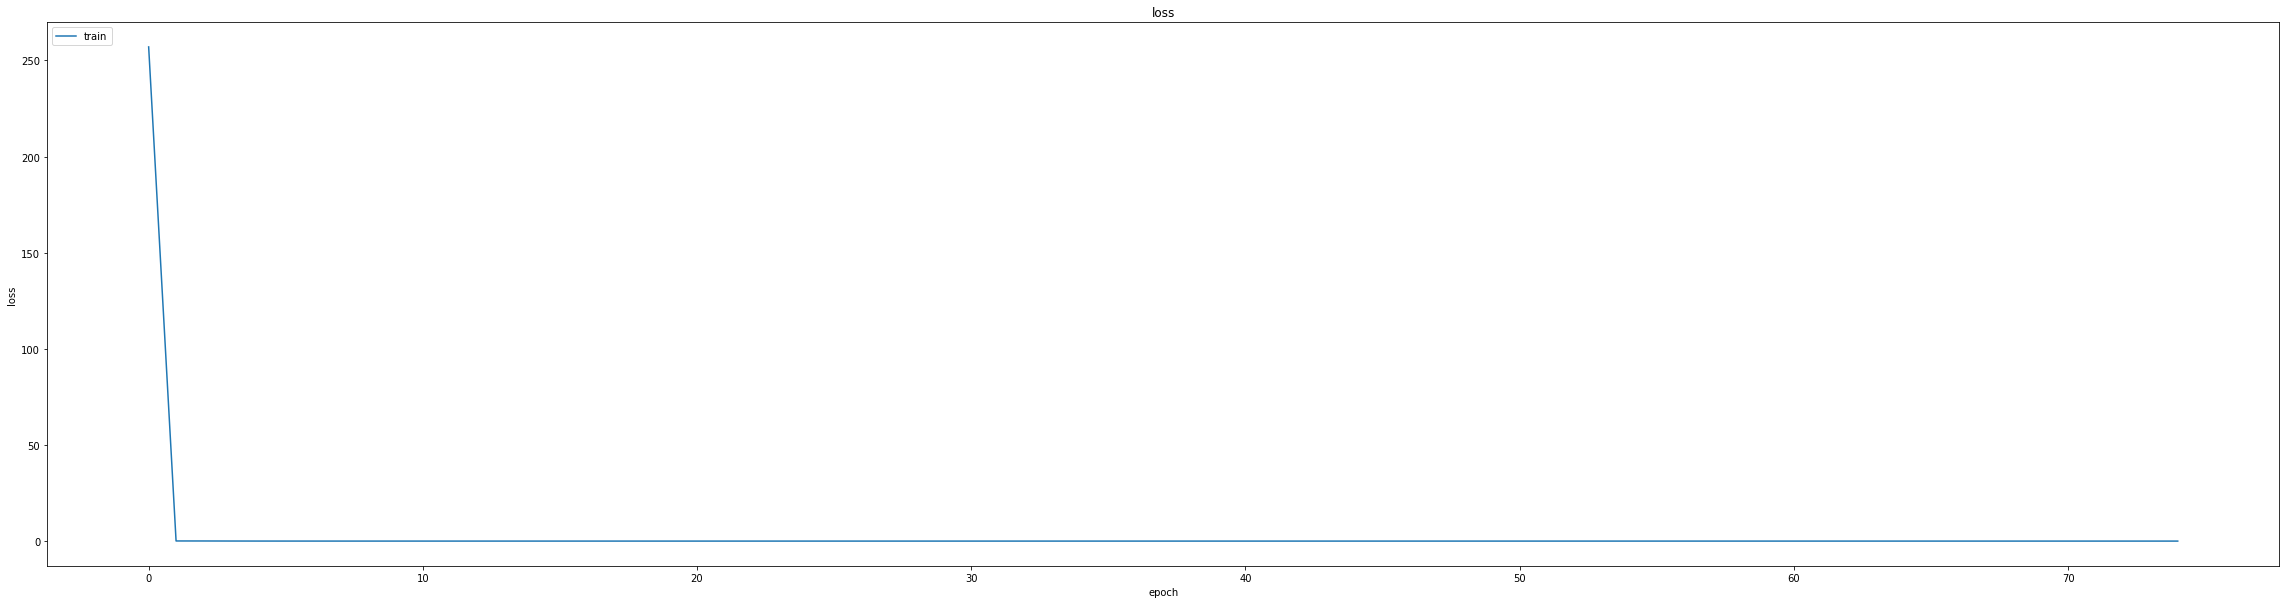

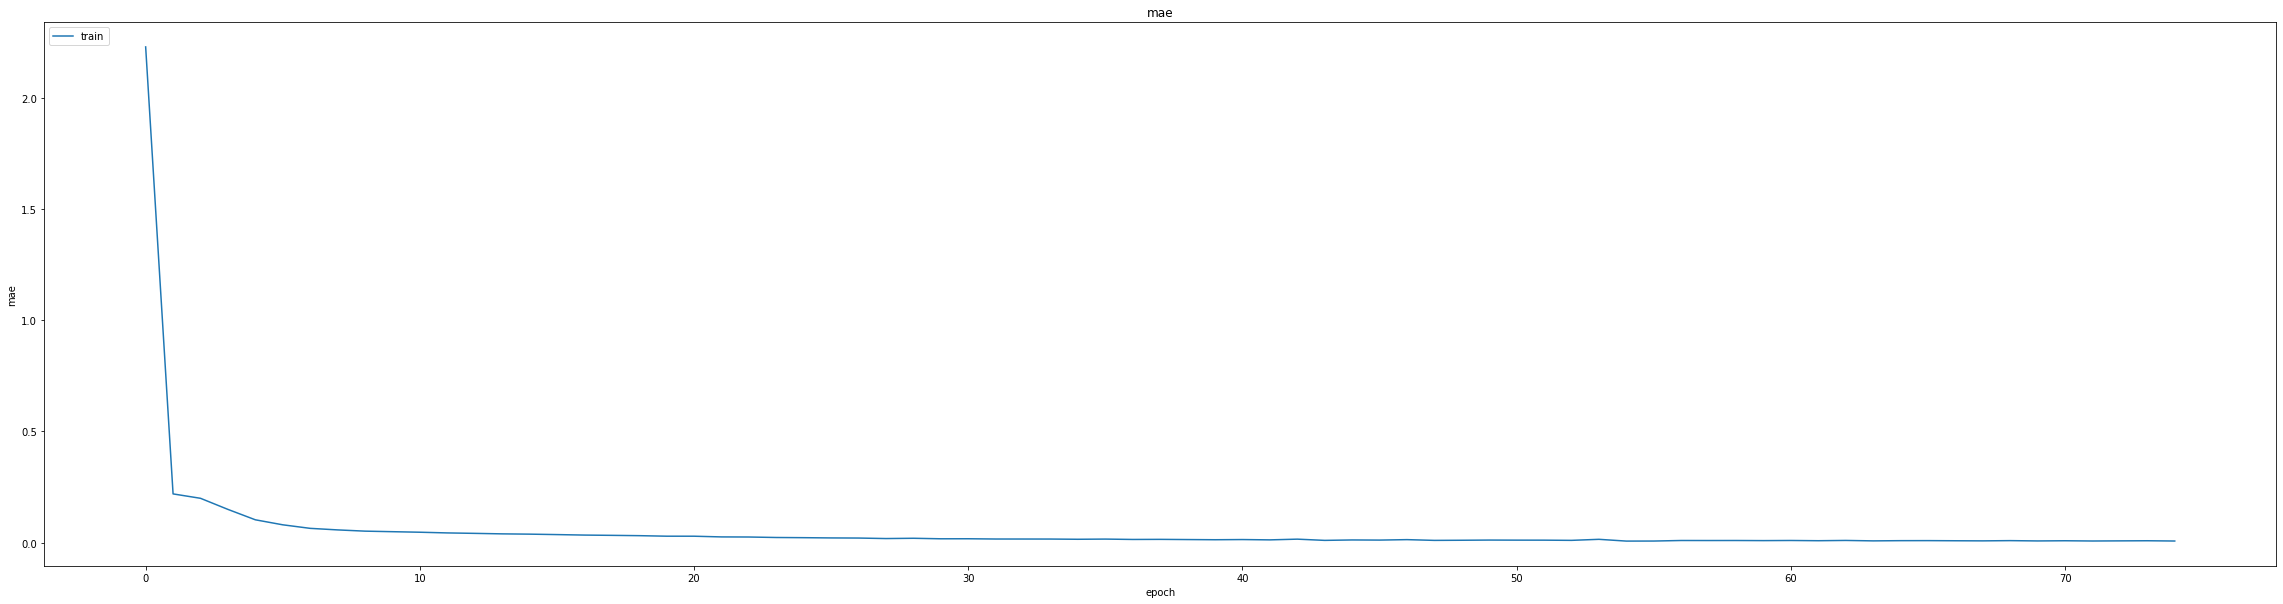

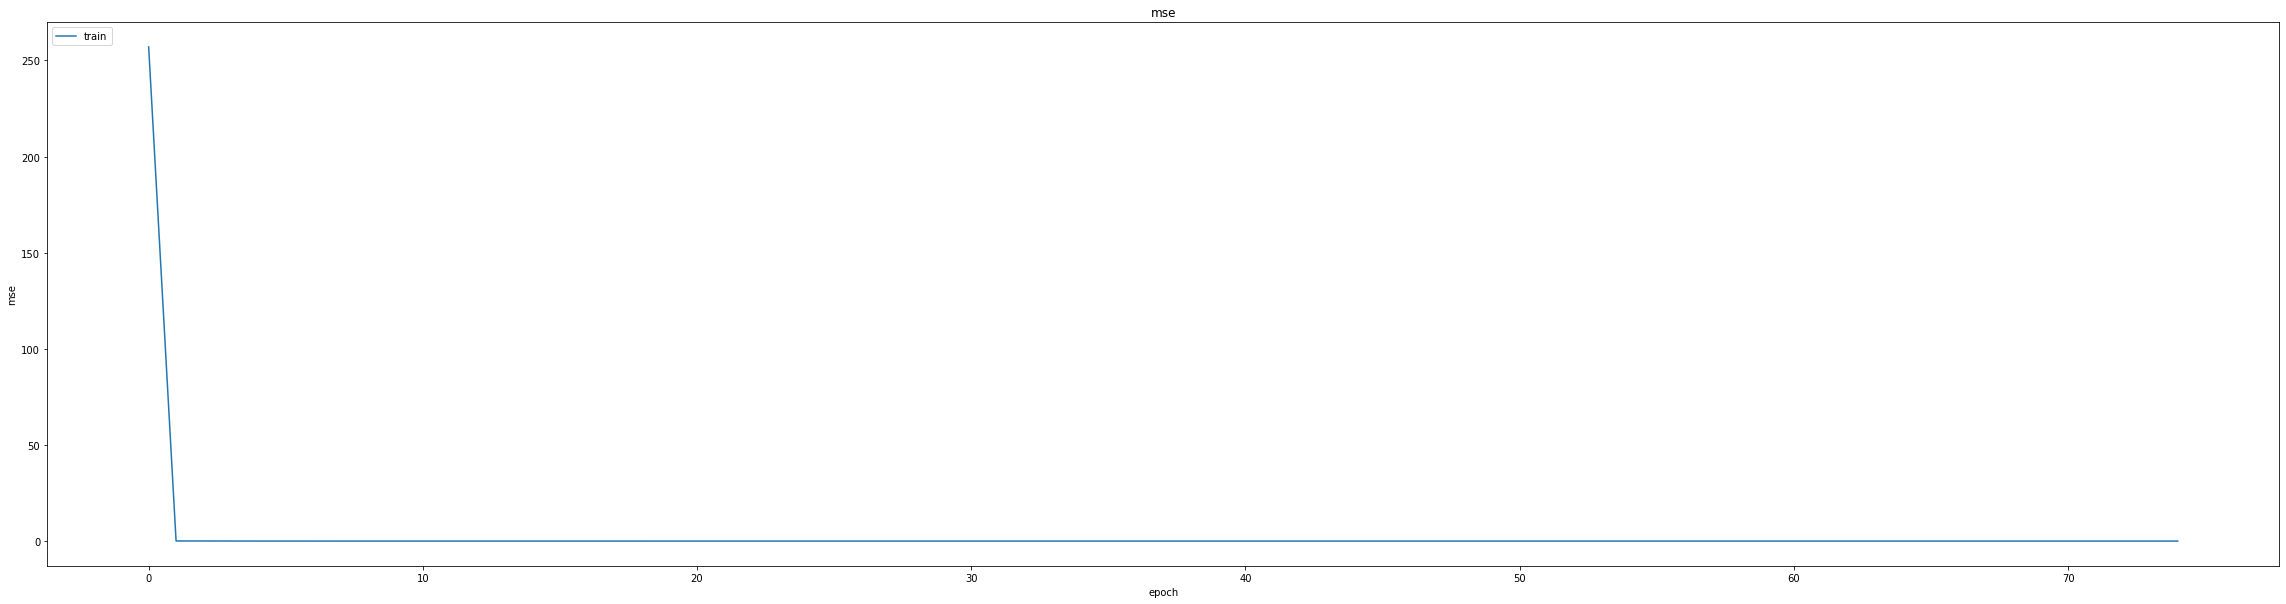

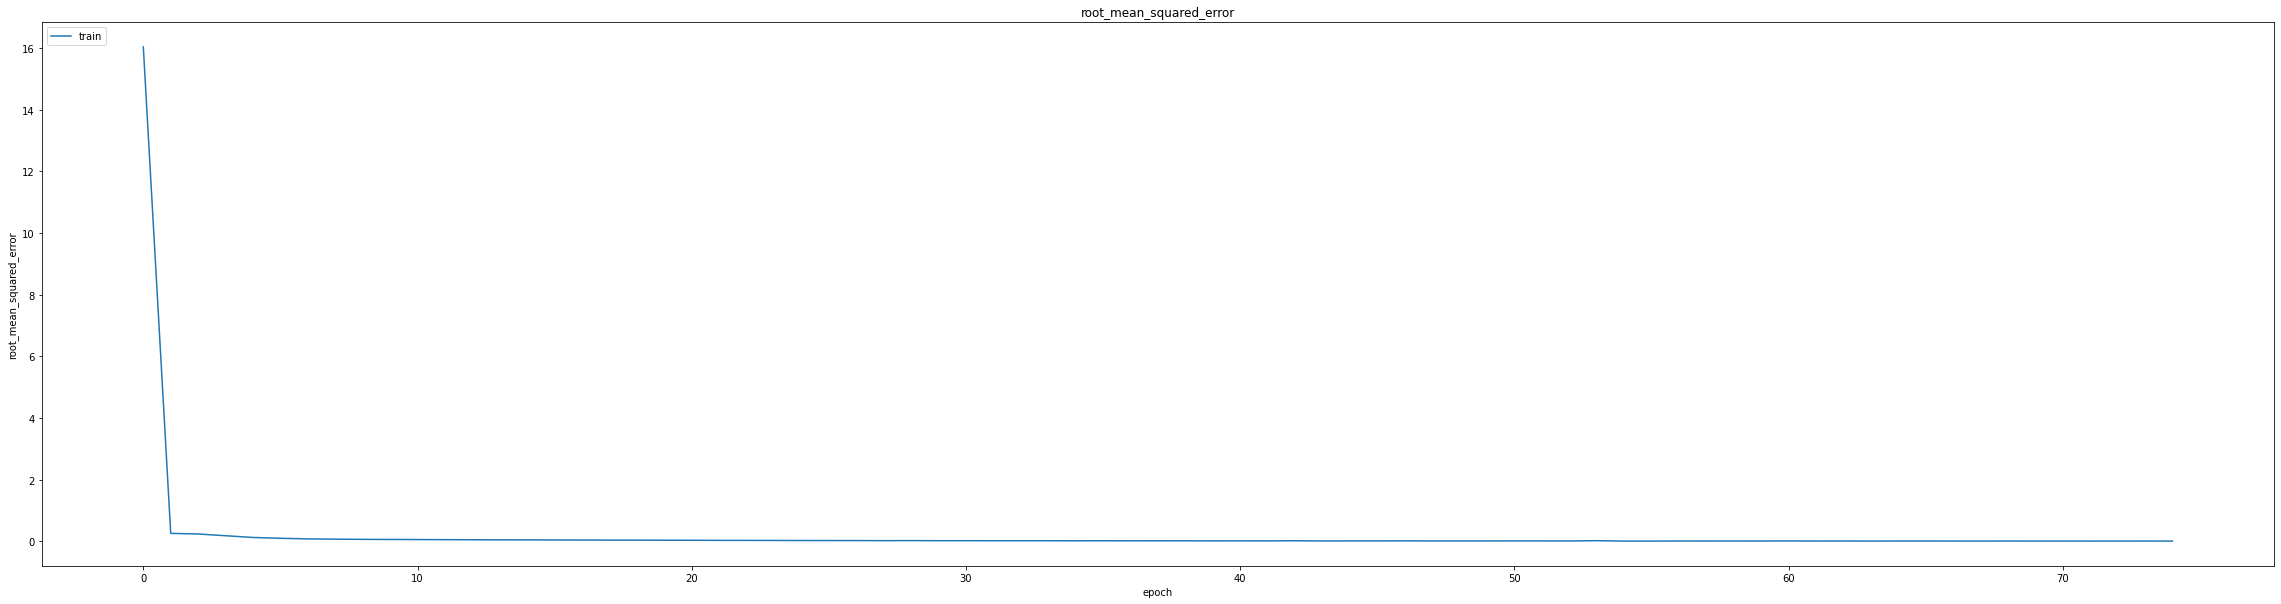

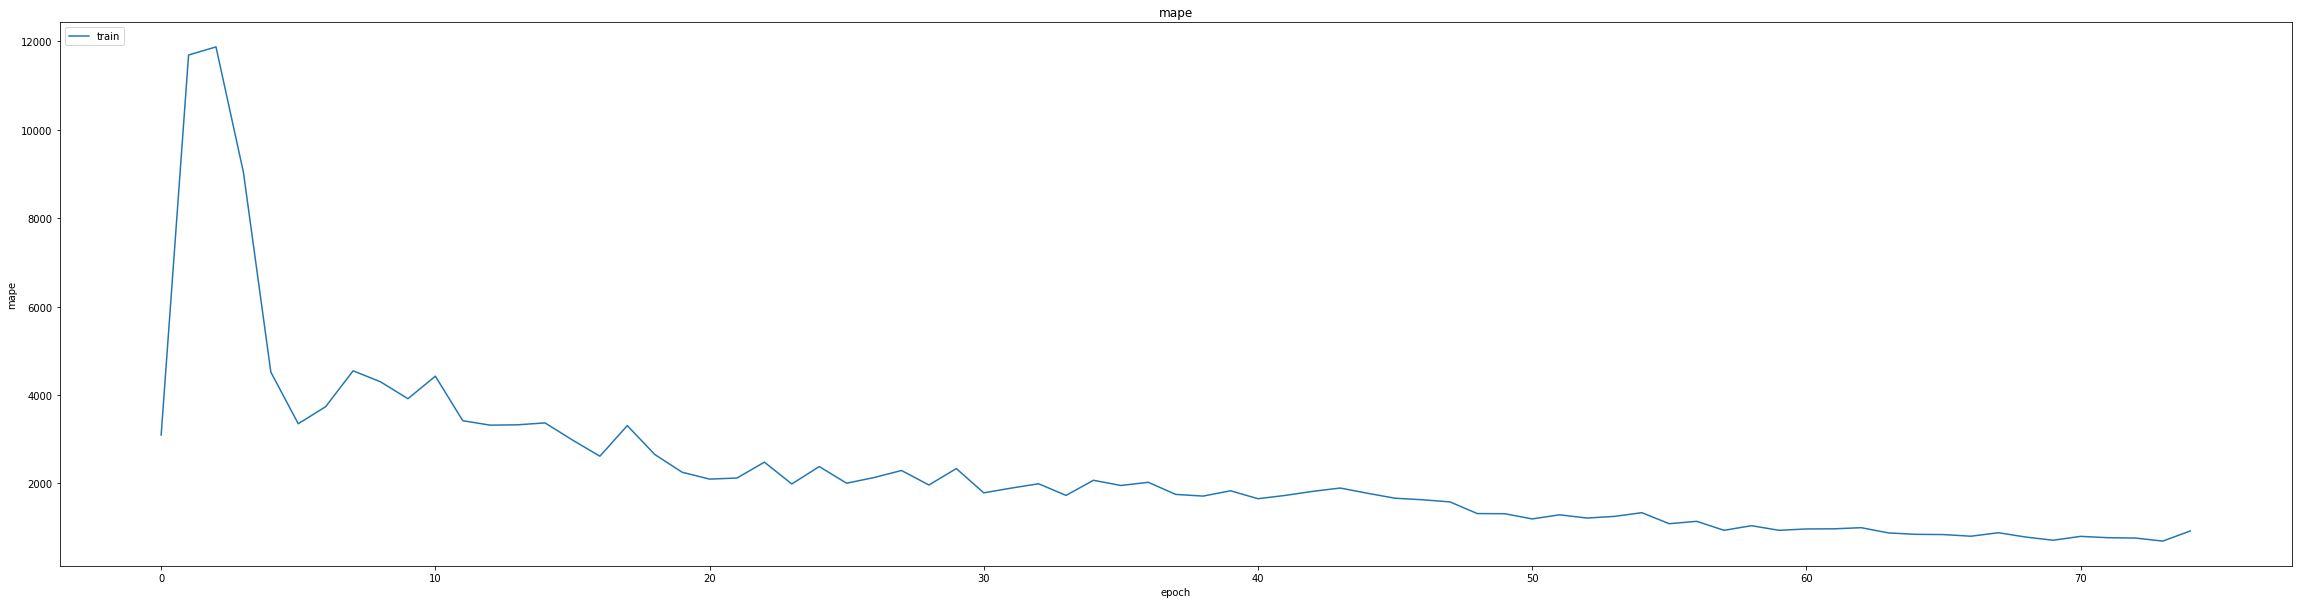

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.004322449676692486
0.006143201142549515
464/464 [==============================] - 6s 9ms/step
0.9986884578331389


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

346/348 [============================>.] - ETA: 0s - loss: 9.5626e-04 - mae: 0.0124 - mse: 9.5626e-04 - root_mean_squared_error: 0.0309 - mape: 984.1135
Epoch 1: val_mse did not improve from 0.00004
348/348 [==============================] - 21s 32ms/step - loss: 9.5113e-04 - mae: 0.0124 - mse: 9.5113e-04 - root_mean_squared_error: 0.0308 - mape: 978.6407 - val_loss: 3.9454e-05 - val_mae: 0.0045 - val_mse: 3.9454e-05 - val_root_mean_squared_error: 0.0063 - val_mape: 2730.2568 - lr: 0.0010
Epoch 2/25
348/348 [==============================] - ETA: 0s - loss: 3.7011e-05 - mae: 0.0047 - mse: 3.7011e-05 - root_mean_squared_error: 0.0061 - mape: 941.5930
Epoch 2: val_mse improved from 0.00004 to 0.00004, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 34s 98ms/step - loss: 3.7011e-05 - mae: 0.0047 - mse: 3.7011e-05 - root_mean_squared_error: 0.0061 - mape: 941.5930 - val_loss: 3.5359e-05 - val_mae: 0.0042 - val_mse: 3.5359e-05 - val_root_mean_squared_error: 0.0059 - val_mape: 2372.5178 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/25
348/348 [==============================] - ETA: 0s - loss: 3.6861e-05 - mae: 0.0047 - mse: 3.6861e-05 - root_mean_squared_error: 0.0061 - mape: 726.8980
Epoch 3: val_mse did not improve from 0.00004
348/348 [==============================] - 11s 30ms/step - loss: 3.6861e-05 - mae: 0.0047 - mse: 3.6861e-05 - root_mean_squared_error: 0.0061 - mape: 726.8980 - val_loss: 6.4527e-05 - val_mae: 0.0066 - val_mse: 6.4527e-05 - val_root_mean_squared_error: 0.0080 - val_mape: 2071.7837 - lr: 9.0000e-04
Epoch 4/25
348/348 [==============================] - ETA: 0s - loss: 5.0389e-05 - mae: 0.0055 - mse: 5.0389e-05 - root_mean_squared_error: 0.0071 - mape: 634.1

348/348 [==============================] - 33s 94ms/step - loss: 3.7429e-05 - mae: 0.0047 - mse: 3.7429e-05 - root_mean_squared_error: 0.0061 - mape: 510.0241 - val_loss: 3.2158e-05 - val_mae: 0.0040 - val_mse: 3.2158e-05 - val_root_mean_squared_error: 0.0057 - val_mape: 1895.1891 - lr: 5.3144e-04
Epoch 14/25
348/348 [==============================] - ETA: 0s - loss: 4.0224e-05 - mae: 0.0049 - mse: 4.0224e-05 - root_mean_squared_error: 0.0063 - mape: 471.4341
Epoch 14: val_mse improved from 0.00003 to 0.00003, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 32s 93ms/step - loss: 4.0224e-05 - mae: 0.0049 - mse: 4.0224e-05 - root_mean_squared_error: 0.0063 - mape: 471.4341 - val_loss: 2.7281e-05 - val_mae: 0.0035 - val_mse: 2.7281e-05 - val_root_mean_squared_error: 0.0052 - val_mape: 2222.2383 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/25
348/348 [==============================] - ETA: 0s - loss: 3.5351e-05 - mae: 0.0045 - mse: 3.5351e-05 - root_mean_squared_error: 0.0059 - mape: 584.2582
Epoch 15: val_mse did not improve from 0.00003
348/348 [==============================] - 7s 19ms/step - loss: 3.5351e-05 - mae: 0.0045 - mse: 3.5351e-05 - root_mean_squared_error: 0.0059 - mape: 584.2582 - val_loss: 7.0330e-05 - val_mae: 0.0071 - val_mse: 7.0330e-05 - val_root_mean_squared_error: 0.0084 - val_mape: 1937.5680 - lr: 4.7830e-04
Epoch 16/25
347/348 [============================>.] - ETA: 0s - loss: 3.2763e-05 - mae: 0.0044 - mse: 3.2763e-05 - root_mean_squared_error: 0.0057 - mape

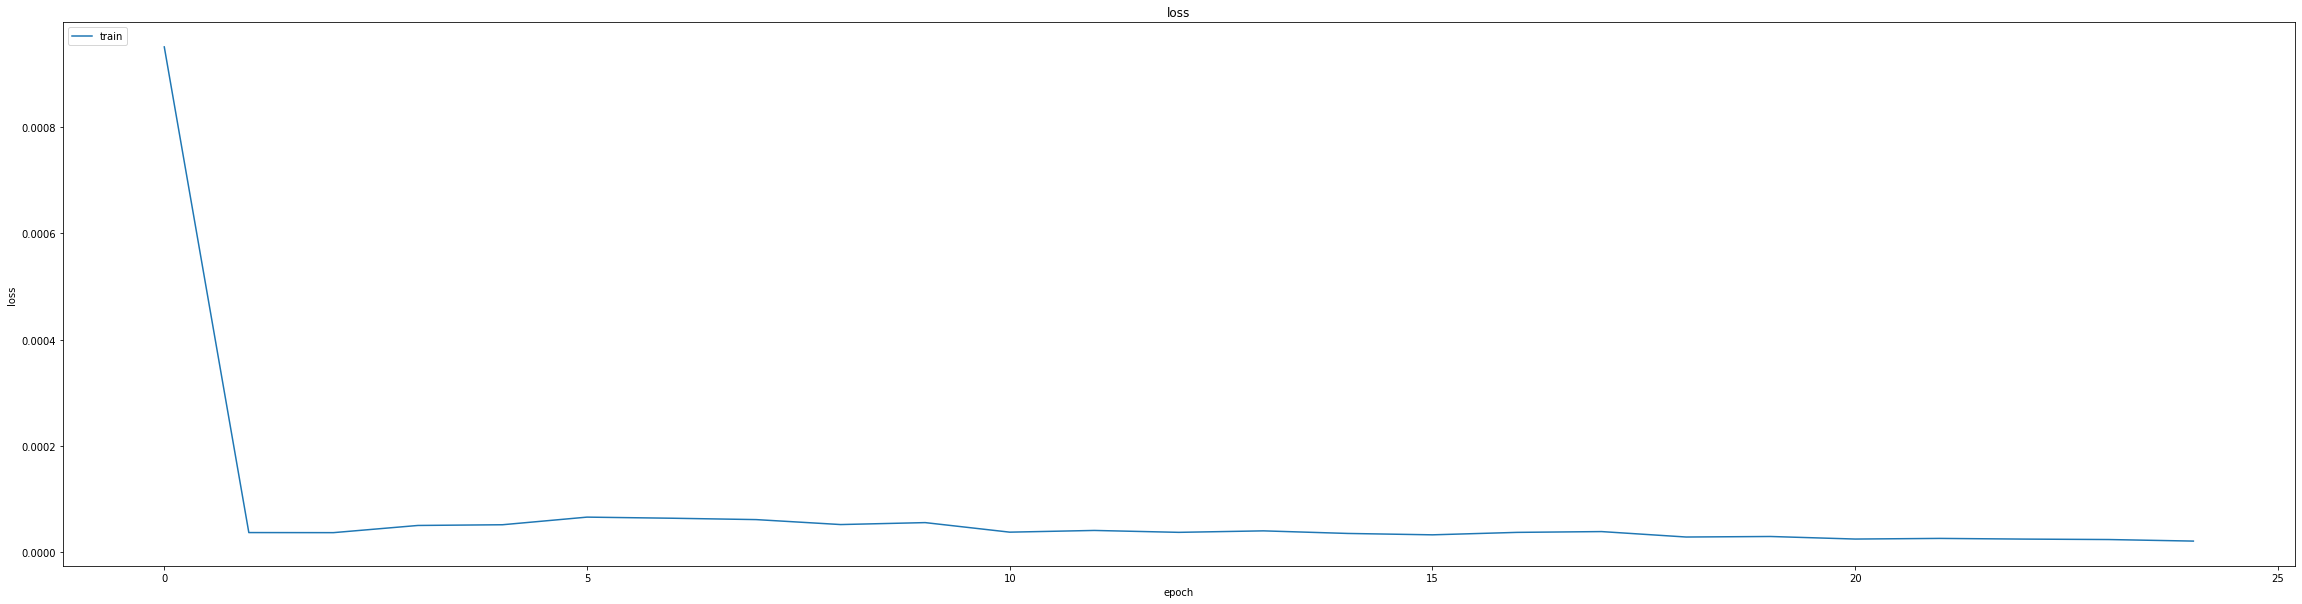

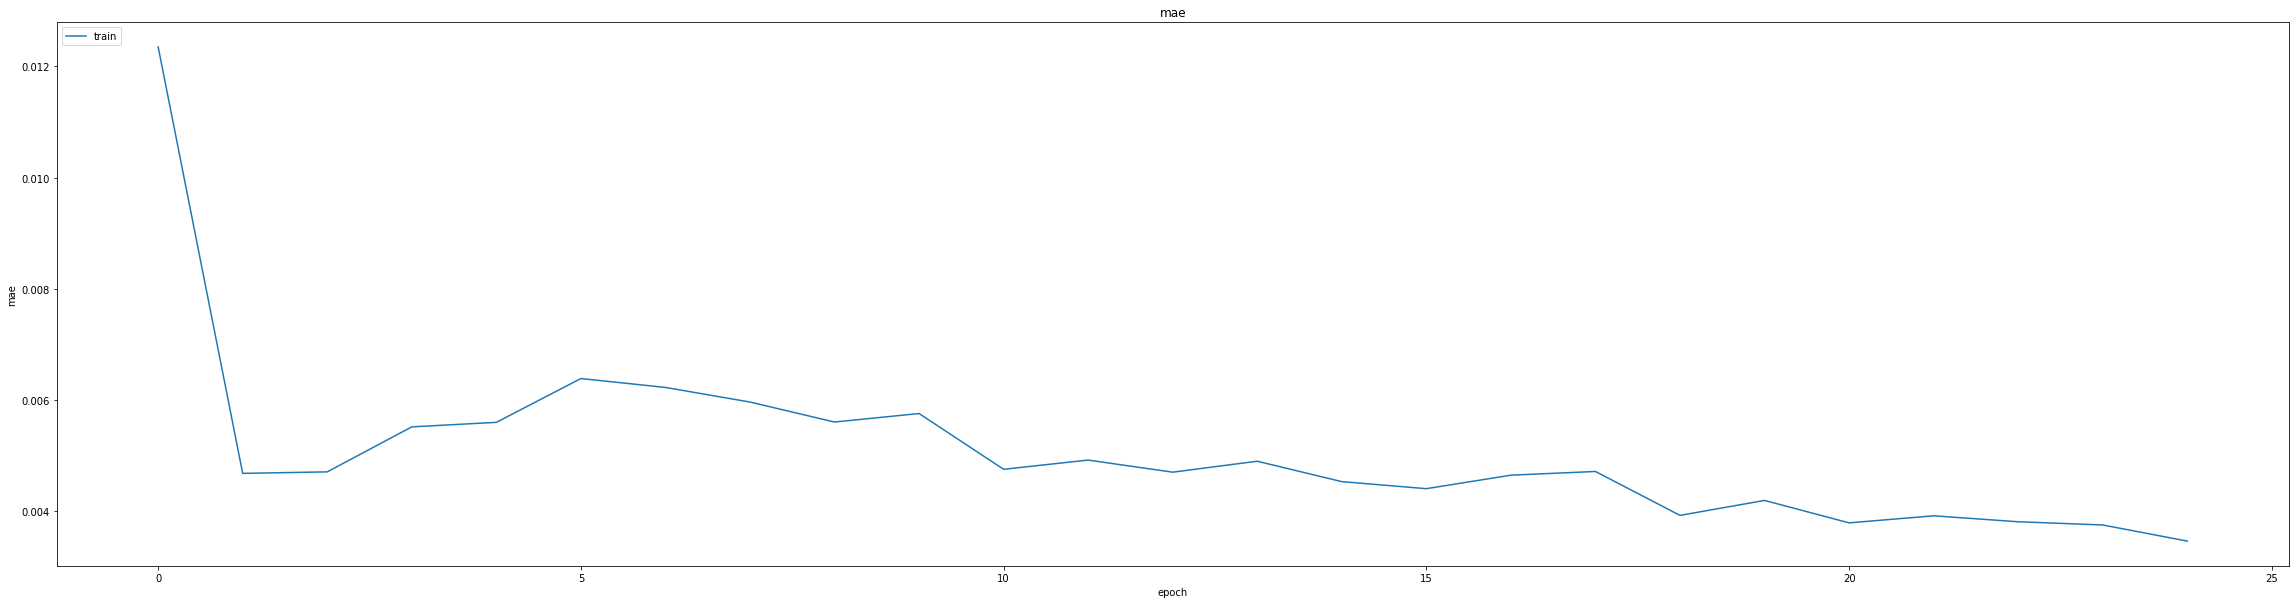

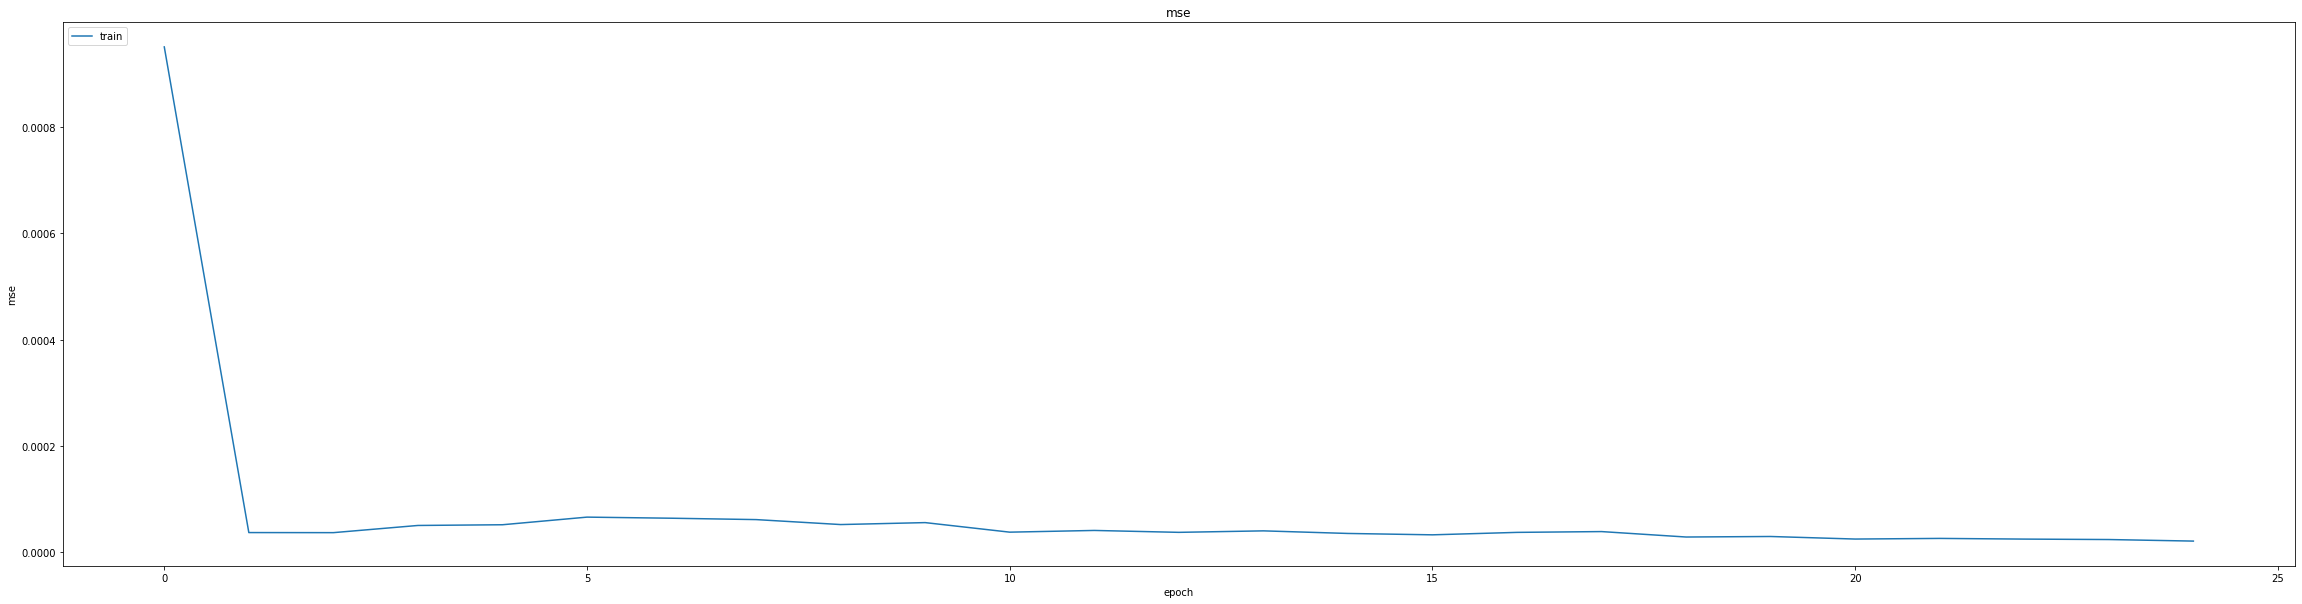

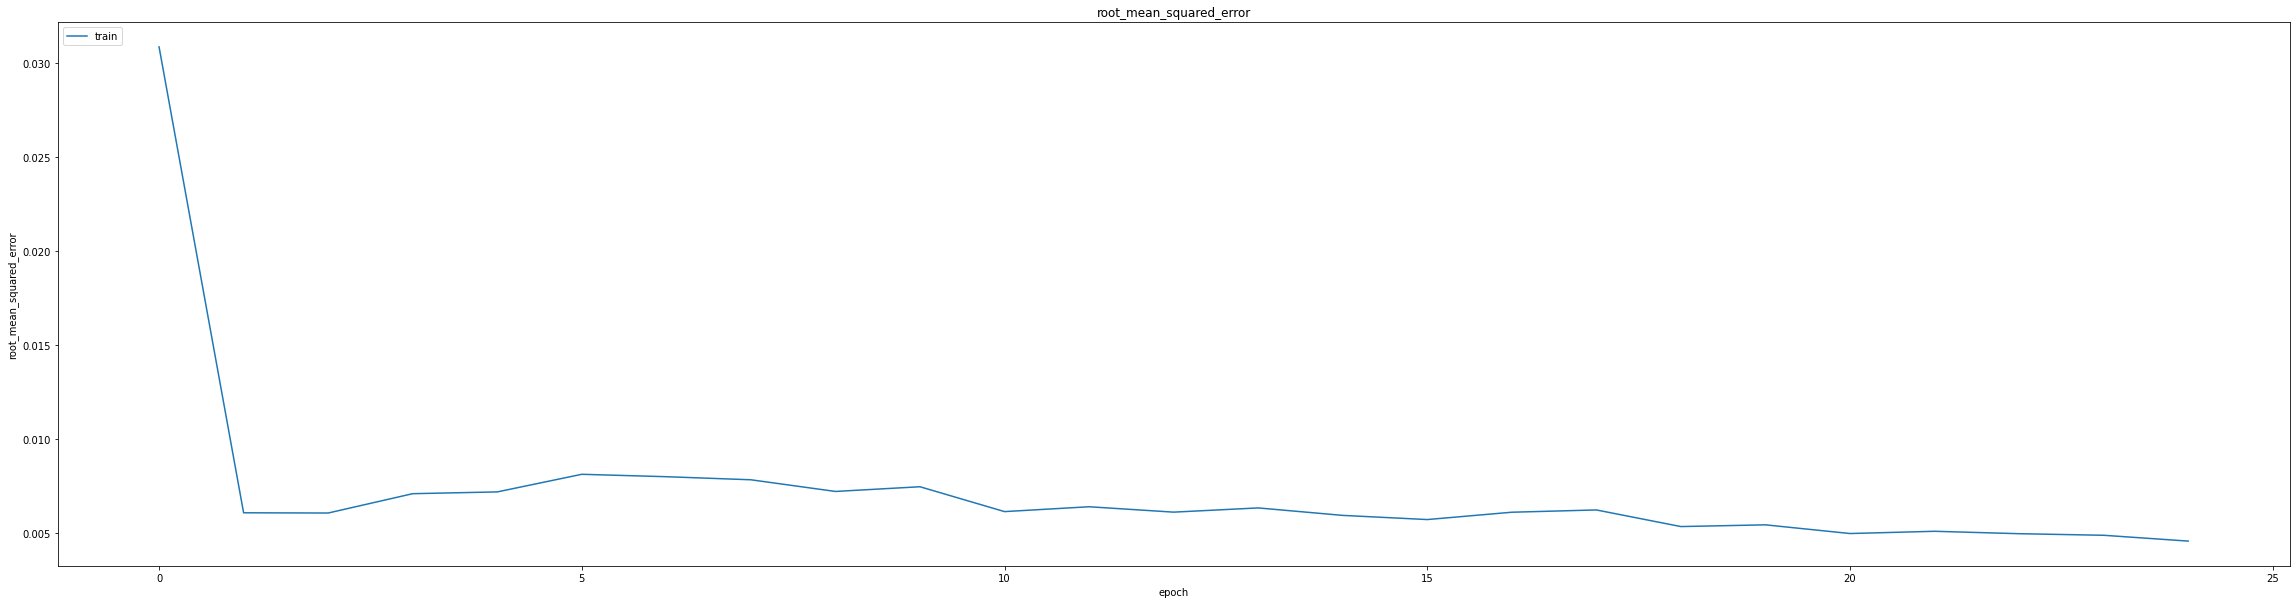

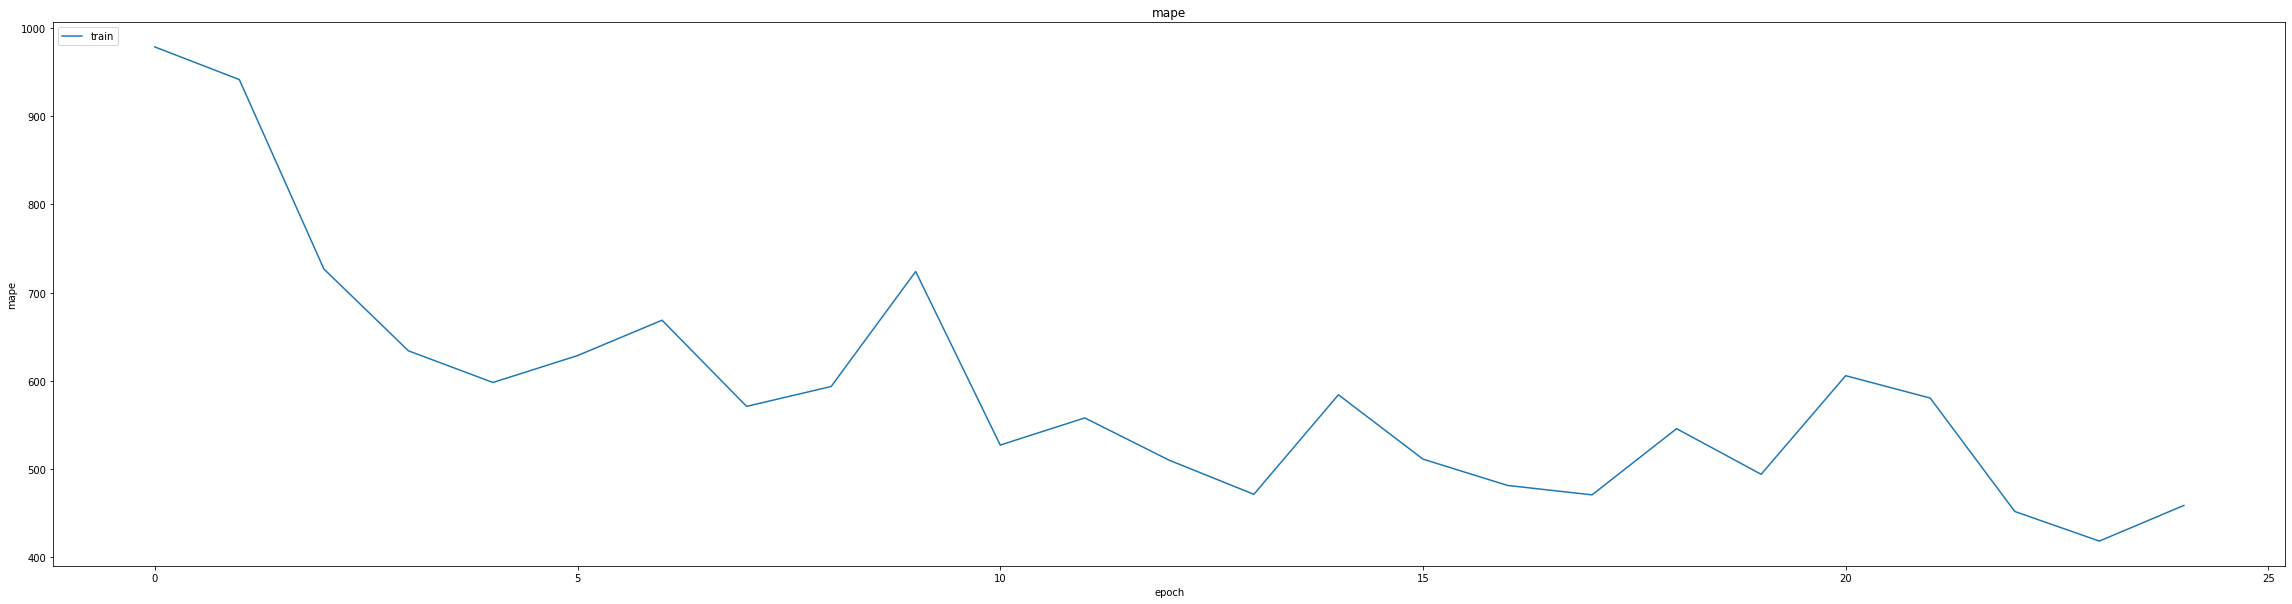

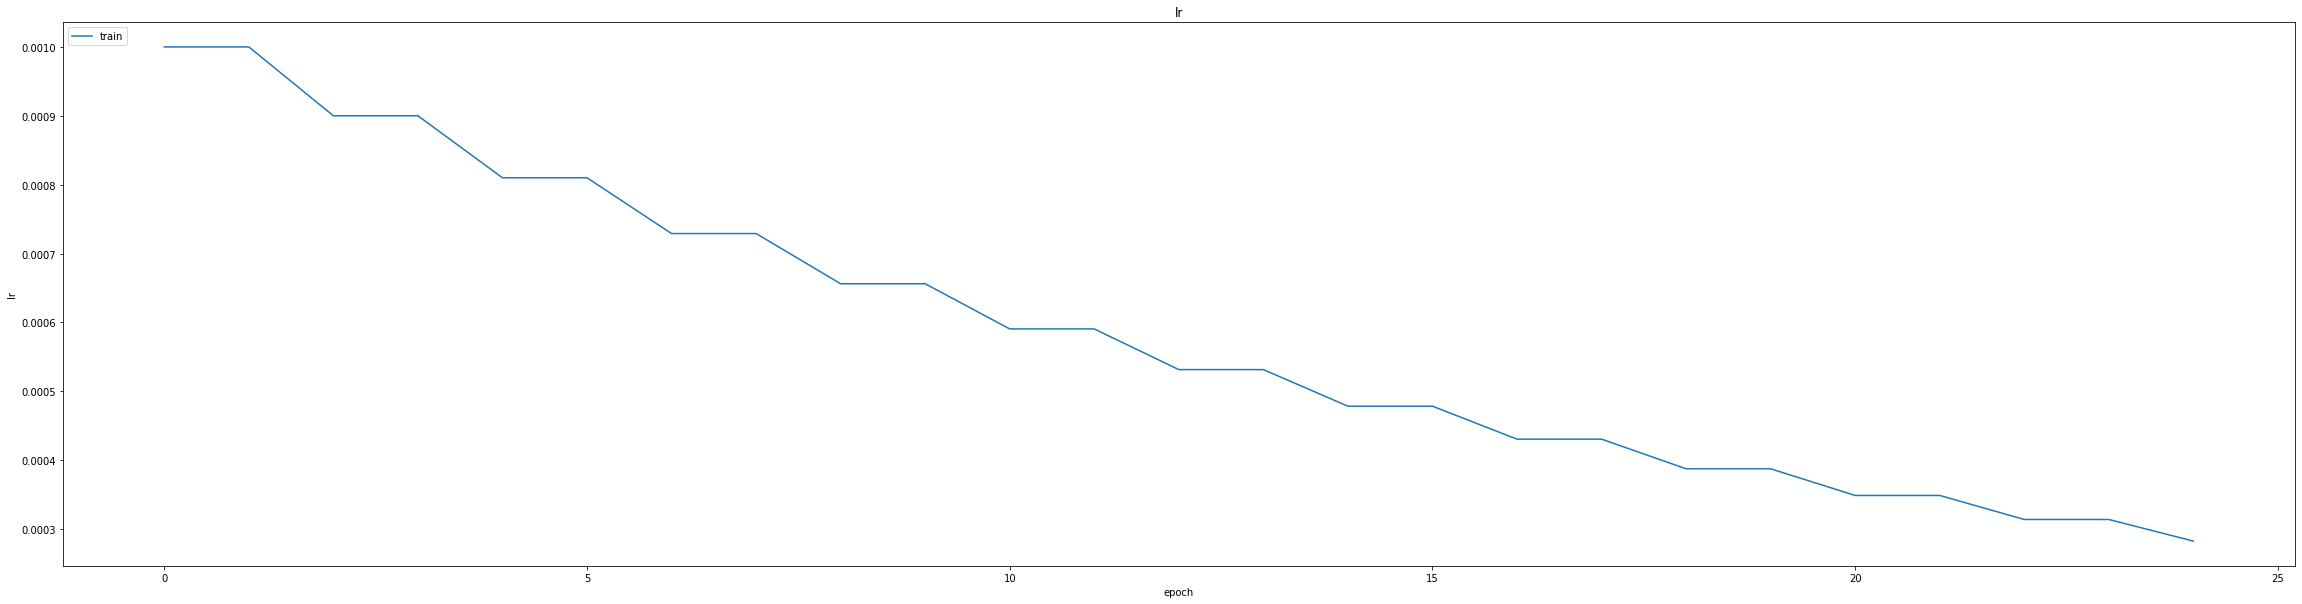

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.0035411412827670574
0.005223073996603489
464/464 [==============================] - 5s 6ms/step
0.998761288361659


464/464 [==============================] - 3s 6ms/step


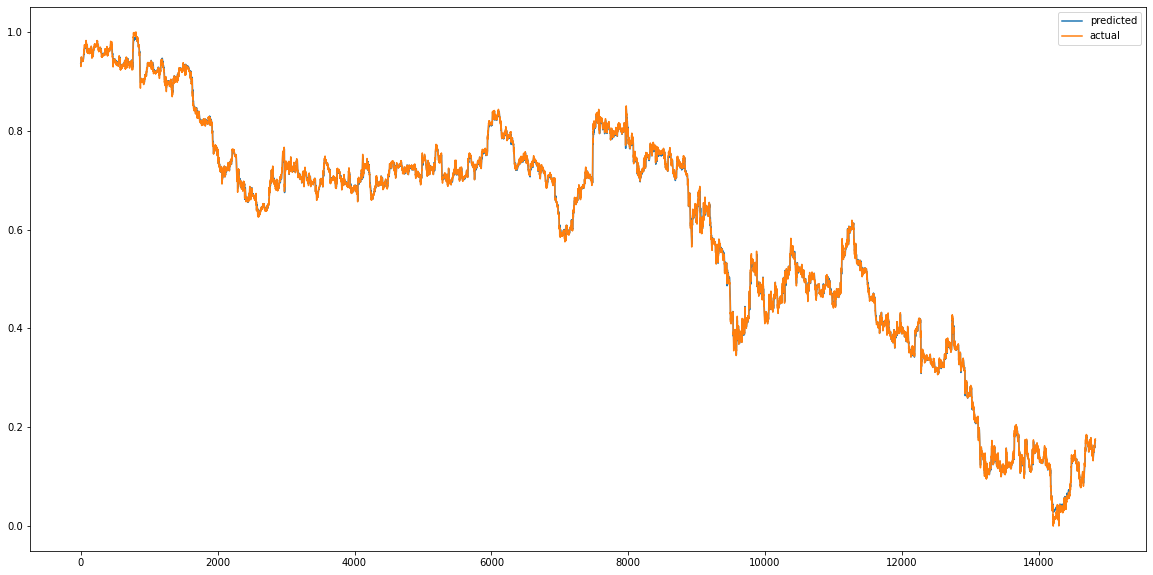

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_BiLSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


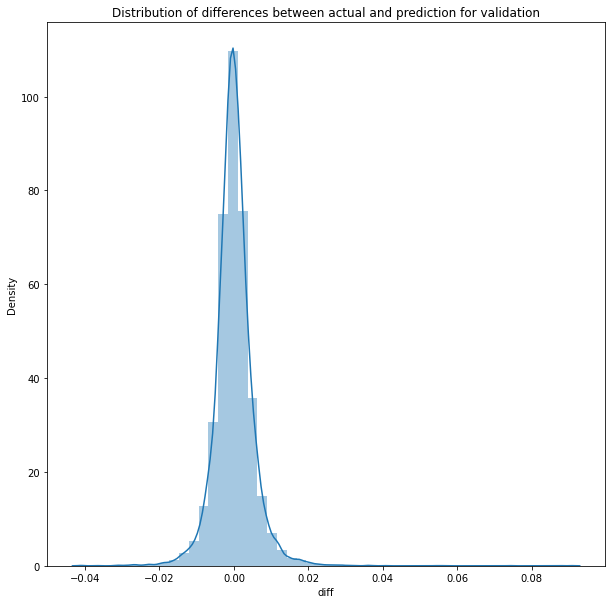

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 3s 6ms/step


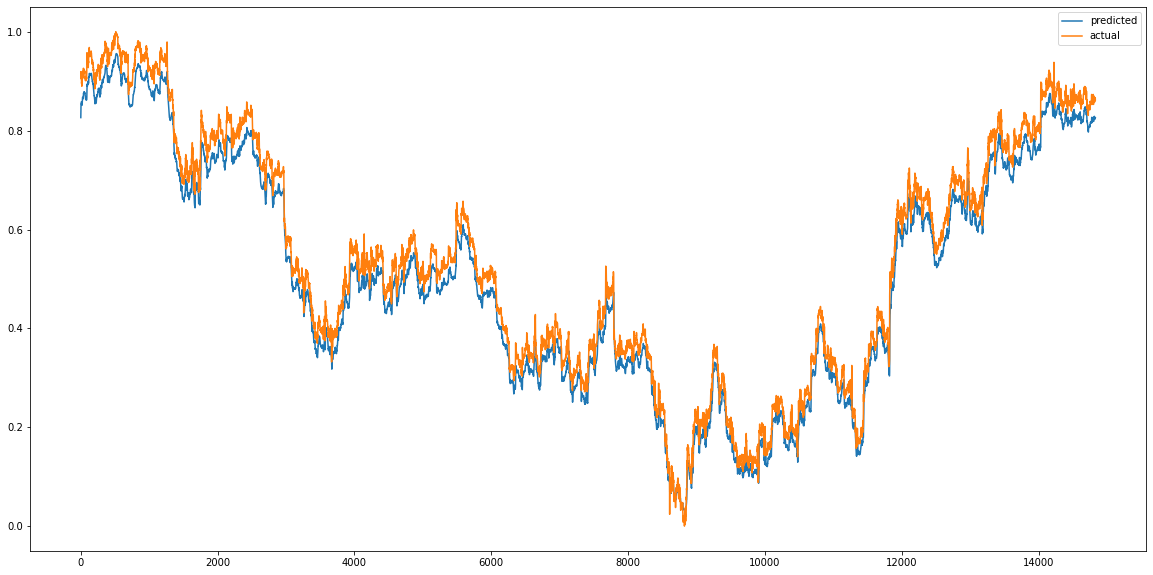

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


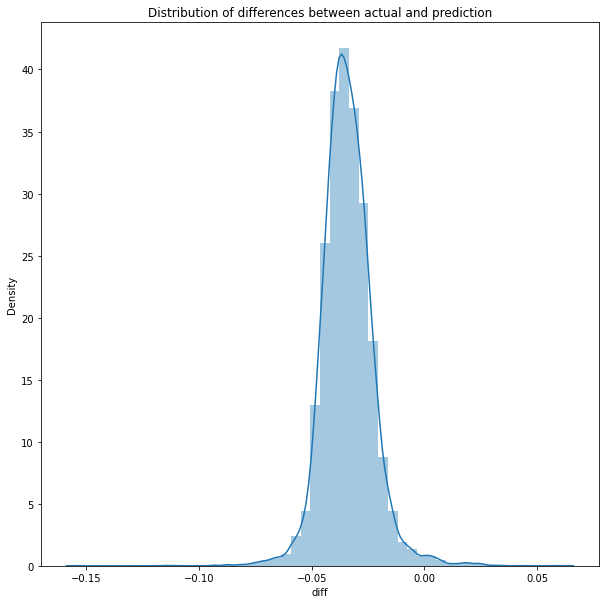

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.001288309817517021
RMSE :  0.03589303299412047
MAE :  0.03432803413330182
464/464 [==============================] - 3s 6ms/step
R2_Score  : 0.9786658147581675


count    14830.000000
mean        -0.034114
std          0.011162
min         -0.153997
25%         -0.040873
50%         -0.034718
75%         -0.027932
max          0.061349
Name: diff, dtype: float64

**GRU_LSTM_MODEL**

In [ ]:
model= thesis.GRU_LSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 24, 32)            4416      
                                                                 
 lstm_2 (LSTM)               (None, 24, 256)           295936    
                                                                 
 dropout_1 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                82176     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_LSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
348/348 [==============================] - ETA: 0s - loss: 403.5669 - mae: 3.4937 - mse: 403.5669 - root_mean_squared_error: 20.0890 - mape: 13823.3896
Epoch 1: val_mse improved from inf to 0.05782, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 20s 45ms/step - loss: 403.5669 - mae: 3.4937 - mse: 403.5669 - root_mean_squared_error: 20.0890 - mape: 13823.3896 - val_loss: 0.0578 - val_mae: 0.2022 - val_mse: 0.0578 - val_root_mean_squared_error: 0.2405 - val_mape: 39540.1367
Epoch 2/75
346/348 [============================>.] - ETA: 0s - loss: 0.0667 - mae: 0.2190 - mse: 0.0667 - root_mean_squared_error: 0.2583 - mape: 13944.9121
Epoch 2: val_mse did not improve from 0.05782
348/348 [==============================] - 4s 12ms/step - loss: 0.0667 - mae: 0.2189 - mse: 0.0667 - root_mean_squared_error: 0.2583 - mape: 13867.7051 - val_loss: 0.0579 - val_mae: 0.2025 - val_mse: 0.0579 - val_root_mean_squared_error: 0.2406 - val_mape: 39443.2773
Epoch 3/75
348/348 [==============================] - ETA: 0s - loss: 0.0667 - mae: 0.2188 - mse: 0.0667 - root_mean_squared_error: 0.2583 - mape: 13187.4961
Epoch 3: val_mse improved from 0.05782 to 0.05775, saving model to /content/drive/MyDrive/modelw

348/348 [==============================] - 15s 43ms/step - loss: 0.0667 - mae: 0.2188 - mse: 0.0667 - root_mean_squared_error: 0.2583 - mape: 13187.4961 - val_loss: 0.0578 - val_mae: 0.2018 - val_mse: 0.0578 - val_root_mean_squared_error: 0.2403 - val_mape: 39639.5938
Epoch 4/75
343/348 [============================>.] - ETA: 0s - loss: 0.0666 - mae: 0.2187 - mse: 0.0666 - root_mean_squared_error: 0.2581 - mape: 13393.7256
Epoch 4: val_mse did not improve from 0.05775
348/348 [==============================] - 4s 12ms/step - loss: 0.0666 - mae: 0.2187 - mse: 0.0666 - root_mean_squared_error: 0.2581 - mape: 13204.8701 - val_loss: 0.0582 - val_mae: 0.2042 - val_mse: 0.0582 - val_root_mean_squared_error: 0.2412 - val_mape: 38983.8047
Epoch 5/75
348/348 [==============================] - ETA: 0s - loss: 0.0667 - mae: 0.2188 - mse: 0.0667 - root_mean_squared_error: 0.2582 - mape: 13034.3740
Epoch 5: val_mse did not improve from 0.05775
348/348 [==============================] - 4s 12ms/step

348/348 [==============================] - 15s 42ms/step - loss: 0.0664 - mae: 0.2183 - mse: 0.0664 - root_mean_squared_error: 0.2576 - mape: 13938.8887 - val_loss: 0.0573 - val_mae: 0.2001 - val_mse: 0.0573 - val_root_mean_squared_error: 0.2395 - val_mape: 39862.5898
Epoch 14/75
344/348 [============================>.] - ETA: 0s - loss: 0.0664 - mae: 0.2183 - mse: 0.0664 - root_mean_squared_error: 0.2577 - mape: 13734.8506
Epoch 14: val_mse improved from 0.05734 to 0.05719, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 0.0663 - mae: 0.2182 - mse: 0.0663 - root_mean_squared_error: 0.2576 - mape: 13580.2764 - val_loss: 0.0572 - val_mae: 0.2001 - val_mse: 0.0572 - val_root_mean_squared_error: 0.2391 - val_mape: 39728.8945
Epoch 15/75
346/348 [============================>.] - ETA: 0s - loss: 0.0659 - mae: 0.2172 - mse: 0.0659 - root_mean_squared_error: 0.2567 - mape: 13281.0986
Epoch 15: val_mse did not improve from 0.05719
348/348 [==============================] - 4s 12ms/step - loss: 0.0659 - mae: 0.2173 - mse: 0.0659 - root_mean_squared_error: 0.2567 - mape: 13207.7256 - val_loss: 0.0572 - val_mae: 0.2029 - val_mse: 0.0572 - val_root_mean_squared_error: 0.2392 - val_mape: 38464.2148
Epoch 16/75
344/348 [============================>.] - ETA: 0s - loss: 0.0639 - mae: 0.2137 - mse: 0.0639 - root_mean_squared_error: 0.2528 - mape: 13116.3066
Epoch 16: val_mse improved from 0.05719 to 0.04928, saving model to /content/drive/MyDrive/modelwe

348/348 [==============================] - 15s 43ms/step - loss: 0.0639 - mae: 0.2134 - mse: 0.0639 - root_mean_squared_error: 0.2527 - mape: 12968.8662 - val_loss: 0.0493 - val_mae: 0.1830 - val_mse: 0.0493 - val_root_mean_squared_error: 0.2220 - val_mape: 37777.5352
Epoch 17/75
343/348 [============================>.] - ETA: 0s - loss: 0.0291 - mae: 0.1346 - mse: 0.0291 - root_mean_squared_error: 0.1707 - mape: 7688.3398
Epoch 17: val_mse improved from 0.04928 to 0.01191, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 0.0289 - mae: 0.1340 - mse: 0.0289 - root_mean_squared_error: 0.1700 - mape: 7579.8765 - val_loss: 0.0119 - val_mae: 0.0932 - val_mse: 0.0119 - val_root_mean_squared_error: 0.1091 - val_mape: 20274.8750
Epoch 18/75
345/348 [============================>.] - ETA: 0s - loss: 0.0060 - mae: 0.0612 - mse: 0.0060 - root_mean_squared_error: 0.0775 - mape: 6513.6289
Epoch 18: val_mse improved from 0.01191 to 0.00287, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 43ms/step - loss: 0.0060 - mae: 0.0611 - mse: 0.0060 - root_mean_squared_error: 0.0774 - mape: 6458.8691 - val_loss: 0.0029 - val_mae: 0.0420 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0535 - val_mape: 14071.3564
Epoch 19/75
348/348 [==============================] - ETA: 0s - loss: 0.0030 - mae: 0.0438 - mse: 0.0030 - root_mean_squared_error: 0.0546 - mape: 4850.8193
Epoch 19: val_mse improved from 0.00287 to 0.00151, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 0.0030 - mae: 0.0438 - mse: 0.0030 - root_mean_squared_error: 0.0546 - mape: 4850.8193 - val_loss: 0.0015 - val_mae: 0.0284 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0388 - val_mape: 12235.7598
Epoch 20/75
345/348 [============================>.] - ETA: 0s - loss: 0.0023 - mae: 0.0384 - mse: 0.0023 - root_mean_squared_error: 0.0480 - mape: 3641.9175
Epoch 20: val_mse did not improve from 0.00151
348/348 [==============================] - 4s 12ms/step - loss: 0.0023 - mae: 0.0383 - mse: 0.0023 - root_mean_squared_error: 0.0479 - mape: 3611.2744 - val_loss: 0.0020 - val_mae: 0.0389 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0448 - val_mape: 11279.8389
Epoch 21/75
344/348 [============================>.] - ETA: 0s - loss: 0.0020 - mae: 0.0357 - mse: 0.0020 - root_mean_squared_error: 0.0445 - mape: 3265.1013
Epoch 21: val_mse improved from 0.00151 to 0.00109, saving model to /content/drive/MyDrive/modelweight

348/348 [==============================] - 14s 41ms/step - loss: 0.0020 - mae: 0.0357 - mse: 0.0020 - root_mean_squared_error: 0.0445 - mape: 3228.2827 - val_loss: 0.0011 - val_mae: 0.0236 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0330 - val_mape: 10222.7695
Epoch 22/75
345/348 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0323 - mse: 0.0016 - root_mean_squared_error: 0.0404 - mape: 3044.2251
Epoch 22: val_mse did not improve from 0.00109
348/348 [==============================] - 4s 12ms/step - loss: 0.0016 - mae: 0.0323 - mse: 0.0016 - root_mean_squared_error: 0.0404 - mape: 3018.5920 - val_loss: 0.0019 - val_mae: 0.0386 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0434 - val_mape: 9072.8613
Epoch 23/75
345/348 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0312 - mse: 0.0015 - root_mean_squared_error: 0.0390 - mape: 3281.0859
Epoch 23: val_mse improved from 0.00109 to 0.00072, saving model to /content/drive/MyDrive/modelweights

348/348 [==============================] - 16s 46ms/step - loss: 0.0015 - mae: 0.0312 - mse: 0.0015 - root_mean_squared_error: 0.0390 - mape: 3253.5225 - val_loss: 7.2074e-04 - val_mae: 0.0190 - val_mse: 7.2074e-04 - val_root_mean_squared_error: 0.0268 - val_mape: 8725.7930
Epoch 24/75
347/348 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0284 - mse: 0.0013 - root_mean_squared_error: 0.0356 - mape: 2892.8638
Epoch 24: val_mse did not improve from 0.00072
348/348 [==============================] - 4s 12ms/step - loss: 0.0013 - mae: 0.0284 - mse: 0.0013 - root_mean_squared_error: 0.0356 - mape: 2885.0989 - val_loss: 0.0014 - val_mae: 0.0330 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0374 - val_mape: 8565.7412
Epoch 25/75
344/348 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0270 - mse: 0.0011 - root_mean_squared_error: 0.0339 - mape: 2595.8313
Epoch 25: val_mse improved from 0.00072 to 0.00069, saving model to /content/drive/MyDrive/model

348/348 [==============================] - 15s 43ms/step - loss: 0.0011 - mae: 0.0270 - mse: 0.0011 - root_mean_squared_error: 0.0339 - mape: 2566.5544 - val_loss: 6.9119e-04 - val_mae: 0.0200 - val_mse: 6.9119e-04 - val_root_mean_squared_error: 0.0263 - val_mape: 8017.5254
Epoch 26/75
345/348 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0266 - mse: 0.0011 - root_mean_squared_error: 0.0335 - mape: 2716.7656
Epoch 26: val_mse did not improve from 0.00069
348/348 [==============================] - 4s 12ms/step - loss: 0.0011 - mae: 0.0266 - mse: 0.0011 - root_mean_squared_error: 0.0335 - mape: 2693.8799 - val_loss: 0.0018 - val_mae: 0.0364 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0427 - val_mape: 7666.3535
Epoch 27/75
344/348 [============================>.] - ETA: 0s - loss: 9.6243e-04 - mae: 0.0245 - mse: 9.6243e-04 - root_mean_squared_error: 0.0310 - mape: 2502.4341
Epoch 27: val_mse did not improve from 0.00069
348/348 [==============================] 

348/348 [==============================] - 15s 44ms/step - loss: 8.9199e-04 - mae: 0.0237 - mse: 8.9199e-04 - root_mean_squared_error: 0.0299 - mape: 2283.5754 - val_loss: 6.3548e-04 - val_mae: 0.0191 - val_mse: 6.3548e-04 - val_root_mean_squared_error: 0.0252 - val_mape: 7298.6885
Epoch 29/75
345/348 [============================>.] - ETA: 0s - loss: 8.1468e-04 - mae: 0.0225 - mse: 8.1468e-04 - root_mean_squared_error: 0.0285 - mape: 2301.9531
Epoch 29: val_mse improved from 0.00064 to 0.00055, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 8.1309e-04 - mae: 0.0225 - mse: 8.1309e-04 - root_mean_squared_error: 0.0285 - mape: 2282.5645 - val_loss: 5.5165e-04 - val_mae: 0.0173 - val_mse: 5.5165e-04 - val_root_mean_squared_error: 0.0235 - val_mape: 7024.0352
Epoch 30/75
346/348 [============================>.] - ETA: 0s - loss: 7.8869e-04 - mae: 0.0222 - mse: 7.8869e-04 - root_mean_squared_error: 0.0281 - mape: 2355.3313
Epoch 30: val_mse did not improve from 0.00055
348/348 [==============================] - 4s 12ms/step - loss: 7.8911e-04 - mae: 0.0222 - mse: 7.8911e-04 - root_mean_squared_error: 0.0281 - mape: 2342.2490 - val_loss: 5.7071e-04 - val_mae: 0.0180 - val_mse: 5.7071e-04 - val_root_mean_squared_error: 0.0239 - val_mape: 6816.6768
Epoch 31/75
346/348 [============================>.] - ETA: 0s - loss: 7.2053e-04 - mae: 0.0212 - mse: 7.2053e-04 - root_mean_squared_error: 0.0268 - mape: 2104.9089
Epoch 31: val_mse improved from 0.00055 to 0.00049, savi

348/348 [==============================] - 15s 44ms/step - loss: 7.1944e-04 - mae: 0.0212 - mse: 7.1944e-04 - root_mean_squared_error: 0.0268 - mape: 2093.2148 - val_loss: 4.9405e-04 - val_mae: 0.0162 - val_mse: 4.9405e-04 - val_root_mean_squared_error: 0.0222 - val_mape: 6695.3916
Epoch 32/75
347/348 [============================>.] - ETA: 0s - loss: 7.0950e-04 - mae: 0.0210 - mse: 7.0950e-04 - root_mean_squared_error: 0.0266 - mape: 2031.0800
Epoch 32: val_mse improved from 0.00049 to 0.00042, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 43ms/step - loss: 7.0879e-04 - mae: 0.0210 - mse: 7.0879e-04 - root_mean_squared_error: 0.0266 - mape: 2025.6205 - val_loss: 4.2240e-04 - val_mae: 0.0149 - val_mse: 4.2240e-04 - val_root_mean_squared_error: 0.0206 - val_mape: 6663.6514
Epoch 33/75
344/348 [============================>.] - ETA: 0s - loss: 6.6921e-04 - mae: 0.0204 - mse: 6.6921e-04 - root_mean_squared_error: 0.0259 - mape: 2071.2698
Epoch 33: val_mse did not improve from 0.00042
348/348 [==============================] - 4s 12ms/step - loss: 6.7017e-04 - mae: 0.0204 - mse: 6.7017e-04 - root_mean_squared_error: 0.0259 - mape: 2047.9224 - val_loss: 7.0868e-04 - val_mae: 0.0214 - val_mse: 7.0868e-04 - val_root_mean_squared_error: 0.0266 - val_mape: 6585.4038
Epoch 34/75
344/348 [============================>.] - ETA: 0s - loss: 5.9774e-04 - mae: 0.0193 - mse: 5.9774e-04 - root_mean_squared_error: 0.0244 - mape: 1721.8821
Epoch 34: val_mse improved from 0.00042 to 0.00036, savi

348/348 [==============================] - 15s 44ms/step - loss: 5.9643e-04 - mae: 0.0193 - mse: 5.9643e-04 - root_mean_squared_error: 0.0244 - mape: 1702.4446 - val_loss: 3.5751e-04 - val_mae: 0.0134 - val_mse: 3.5751e-04 - val_root_mean_squared_error: 0.0189 - val_mape: 6401.2539
Epoch 35/75
348/348 [==============================] - ETA: 0s - loss: 5.6095e-04 - mae: 0.0186 - mse: 5.6095e-04 - root_mean_squared_error: 0.0237 - mape: 2179.4863
Epoch 35: val_mse did not improve from 0.00036
348/348 [==============================] - 5s 15ms/step - loss: 5.6095e-04 - mae: 0.0186 - mse: 5.6095e-04 - root_mean_squared_error: 0.0237 - mape: 2179.4863 - val_loss: 5.9103e-04 - val_mae: 0.0191 - val_mse: 5.9103e-04 - val_root_mean_squared_error: 0.0243 - val_mape: 6306.3799
Epoch 36/75
348/348 [==============================] - ETA: 0s - loss: 5.2783e-04 - mae: 0.0181 - mse: 5.2783e-04 - root_mean_squared_error: 0.0230 - mape: 2038.2576
Epoch 36: val_mse did not improve from 0.00036
348/348 [

348/348 [==============================] - 15s 44ms/step - loss: 4.2918e-04 - mae: 0.0163 - mse: 4.2918e-04 - root_mean_squared_error: 0.0207 - mape: 1668.8549 - val_loss: 2.8639e-04 - val_mae: 0.0119 - val_mse: 2.8639e-04 - val_root_mean_squared_error: 0.0169 - val_mape: 5586.3555
Epoch 40/75
344/348 [============================>.] - ETA: 0s - loss: 4.0624e-04 - mae: 0.0158 - mse: 4.0624e-04 - root_mean_squared_error: 0.0202 - mape: 1813.0815
Epoch 40: val_mse did not improve from 0.00029
348/348 [==============================] - 4s 13ms/step - loss: 4.0576e-04 - mae: 0.0158 - mse: 4.0576e-04 - root_mean_squared_error: 0.0201 - mape: 1792.6240 - val_loss: 3.0462e-04 - val_mae: 0.0125 - val_mse: 3.0462e-04 - val_root_mean_squared_error: 0.0175 - val_mape: 5830.0986
Epoch 41/75
344/348 [============================>.] - ETA: 0s - loss: 3.6629e-04 - mae: 0.0150 - mse: 3.6629e-04 - root_mean_squared_error: 0.0191 - mape: 1911.8347
Epoch 41: val_mse did not improve from 0.00029
348/348 [

348/348 [==============================] - 15s 44ms/step - loss: 2.6078e-04 - mae: 0.0126 - mse: 2.6078e-04 - root_mean_squared_error: 0.0161 - mape: 1672.0631 - val_loss: 2.2974e-04 - val_mae: 0.0109 - val_mse: 2.2974e-04 - val_root_mean_squared_error: 0.0152 - val_mape: 5269.5322
Epoch 47/75
345/348 [============================>.] - ETA: 0s - loss: 2.6001e-04 - mae: 0.0126 - mse: 2.6001e-04 - root_mean_squared_error: 0.0161 - mape: 1646.1863
Epoch 47: val_mse improved from 0.00023 to 0.00021, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 2.5960e-04 - mae: 0.0126 - mse: 2.5960e-04 - root_mean_squared_error: 0.0161 - mape: 1632.3167 - val_loss: 2.0613e-04 - val_mae: 0.0100 - val_mse: 2.0613e-04 - val_root_mean_squared_error: 0.0144 - val_mape: 5173.6484
Epoch 48/75
344/348 [============================>.] - ETA: 0s - loss: 2.5934e-04 - mae: 0.0126 - mse: 2.5934e-04 - root_mean_squared_error: 0.0161 - mape: 1593.4413
Epoch 48: val_mse did not improve from 0.00021
348/348 [==============================] - 4s 13ms/step - loss: 2.5948e-04 - mae: 0.0126 - mse: 2.5948e-04 - root_mean_squared_error: 0.0161 - mape: 1575.4645 - val_loss: 2.9533e-04 - val_mae: 0.0135 - val_mse: 2.9533e-04 - val_root_mean_squared_error: 0.0172 - val_mape: 5163.7510
Epoch 49/75
345/348 [============================>.] - ETA: 0s - loss: 2.5197e-04 - mae: 0.0124 - mse: 2.5197e-04 - root_mean_squared_error: 0.0159 - mape: 1508.5558
Epoch 49: val_mse did not improve from 0.00021
348/348 [

348/348 [==============================] - 15s 42ms/step - loss: 2.4139e-04 - mae: 0.0122 - mse: 2.4139e-04 - root_mean_squared_error: 0.0155 - mape: 1598.7279 - val_loss: 1.8649e-04 - val_mae: 0.0097 - val_mse: 1.8649e-04 - val_root_mean_squared_error: 0.0137 - val_mape: 4880.0928
Epoch 51/75
344/348 [============================>.] - ETA: 0s - loss: 2.0748e-04 - mae: 0.0113 - mse: 2.0748e-04 - root_mean_squared_error: 0.0144 - mape: 1577.7793
Epoch 51: val_mse improved from 0.00019 to 0.00016, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 2.0737e-04 - mae: 0.0113 - mse: 2.0737e-04 - root_mean_squared_error: 0.0144 - mape: 1559.9619 - val_loss: 1.6096e-04 - val_mae: 0.0088 - val_mse: 1.6096e-04 - val_root_mean_squared_error: 0.0127 - val_mape: 4698.1279
Epoch 52/75
347/348 [============================>.] - ETA: 0s - loss: 2.1339e-04 - mae: 0.0114 - mse: 2.1339e-04 - root_mean_squared_error: 0.0146 - mape: 1502.7793
Epoch 52: val_mse did not improve from 0.00016
348/348 [==============================] - 5s 15ms/step - loss: 2.1315e-04 - mae: 0.0114 - mse: 2.1315e-04 - root_mean_squared_error: 0.0146 - mape: 1498.7367 - val_loss: 1.7905e-04 - val_mae: 0.0097 - val_mse: 1.7905e-04 - val_root_mean_squared_error: 0.0134 - val_mape: 4812.9380
Epoch 53/75
348/348 [==============================] - ETA: 0s - loss: 1.8981e-04 - mae: 0.0108 - mse: 1.8981e-04 - root_mean_squared_error: 0.0138 - mape: 1555.0416
Epoch 53: val_mse improved from 0.00016 to 0.00015, savi

348/348 [==============================] - 15s 44ms/step - loss: 1.8981e-04 - mae: 0.0108 - mse: 1.8981e-04 - root_mean_squared_error: 0.0138 - mape: 1555.0416 - val_loss: 1.4864e-04 - val_mae: 0.0084 - val_mse: 1.4864e-04 - val_root_mean_squared_error: 0.0122 - val_mape: 4583.9536
Epoch 54/75
347/348 [============================>.] - ETA: 0s - loss: 2.0147e-04 - mae: 0.0111 - mse: 2.0147e-04 - root_mean_squared_error: 0.0142 - mape: 1394.2295
Epoch 54: val_mse did not improve from 0.00015
348/348 [==============================] - 4s 12ms/step - loss: 2.0142e-04 - mae: 0.0111 - mse: 2.0142e-04 - root_mean_squared_error: 0.0142 - mape: 1390.4833 - val_loss: 1.7585e-04 - val_mae: 0.0098 - val_mse: 1.7585e-04 - val_root_mean_squared_error: 0.0133 - val_mape: 4562.6855
Epoch 55/75
347/348 [============================>.] - ETA: 0s - loss: 2.0785e-04 - mae: 0.0113 - mse: 2.0785e-04 - root_mean_squared_error: 0.0144 - mape: 1435.0198
Epoch 55: val_mse improved from 0.00015 to 0.00014, savi

348/348 [==============================] - 17s 49ms/step - loss: 2.0756e-04 - mae: 0.0113 - mse: 2.0756e-04 - root_mean_squared_error: 0.0144 - mape: 1431.1593 - val_loss: 1.4188e-04 - val_mae: 0.0082 - val_mse: 1.4188e-04 - val_root_mean_squared_error: 0.0119 - val_mape: 4732.8633
Epoch 56/75
346/348 [============================>.] - ETA: 0s - loss: 1.6378e-04 - mae: 0.0100 - mse: 1.6378e-04 - root_mean_squared_error: 0.0128 - mape: 1517.8239
Epoch 56: val_mse did not improve from 0.00014
348/348 [==============================] - 4s 12ms/step - loss: 1.6471e-04 - mae: 0.0100 - mse: 1.6471e-04 - root_mean_squared_error: 0.0128 - mape: 1509.3936 - val_loss: 2.2366e-04 - val_mae: 0.0121 - val_mse: 2.2366e-04 - val_root_mean_squared_error: 0.0150 - val_mape: 4363.4263
Epoch 57/75
347/348 [============================>.] - ETA: 0s - loss: 1.8038e-04 - mae: 0.0105 - mse: 1.8038e-04 - root_mean_squared_error: 0.0134 - mape: 1477.7750
Epoch 57: val_mse improved from 0.00014 to 0.00014, savi

348/348 [==============================] - 15s 44ms/step - loss: 1.8015e-04 - mae: 0.0105 - mse: 1.8015e-04 - root_mean_squared_error: 0.0134 - mape: 1473.7982 - val_loss: 1.3674e-04 - val_mae: 0.0085 - val_mse: 1.3674e-04 - val_root_mean_squared_error: 0.0117 - val_mape: 4307.0063
Epoch 58/75
348/348 [==============================] - ETA: 0s - loss: 1.6363e-04 - mae: 0.0100 - mse: 1.6363e-04 - root_mean_squared_error: 0.0128 - mape: 1280.5900
Epoch 58: val_mse did not improve from 0.00014
348/348 [==============================] - 4s 12ms/step - loss: 1.6363e-04 - mae: 0.0100 - mse: 1.6363e-04 - root_mean_squared_error: 0.0128 - mape: 1280.5900 - val_loss: 1.8644e-04 - val_mae: 0.0108 - val_mse: 1.8644e-04 - val_root_mean_squared_error: 0.0137 - val_mape: 4230.3999
Epoch 59/75
347/348 [============================>.] - ETA: 0s - loss: 1.5506e-04 - mae: 0.0097 - mse: 1.5506e-04 - root_mean_squared_error: 0.0125 - mape: 1407.0223
Epoch 59: val_mse did not improve from 0.00014
348/348 [

348/348 [==============================] - 15s 42ms/step - loss: 1.7831e-04 - mae: 0.0103 - mse: 1.7831e-04 - root_mean_squared_error: 0.0134 - mape: 1353.9386 - val_loss: 1.2051e-04 - val_mae: 0.0081 - val_mse: 1.2051e-04 - val_root_mean_squared_error: 0.0110 - val_mape: 4094.8958
Epoch 61/75
345/348 [============================>.] - ETA: 0s - loss: 1.5880e-04 - mae: 0.0098 - mse: 1.5880e-04 - root_mean_squared_error: 0.0126 - mape: 1315.8184
Epoch 61: val_mse did not improve from 0.00012
348/348 [==============================] - 4s 12ms/step - loss: 1.5852e-04 - mae: 0.0098 - mse: 1.5852e-04 - root_mean_squared_error: 0.0126 - mape: 1304.7319 - val_loss: 2.9671e-04 - val_mae: 0.0151 - val_mse: 2.9671e-04 - val_root_mean_squared_error: 0.0172 - val_mape: 4212.0493
Epoch 62/75
348/348 [==============================] - ETA: 0s - loss: 1.3635e-04 - mae: 0.0091 - mse: 1.3635e-04 - root_mean_squared_error: 0.0117 - mape: 1230.9009
Epoch 62: val_mse did not improve from 0.00012
348/348 [

348/348 [==============================] - 15s 44ms/step - loss: 1.3565e-04 - mae: 0.0090 - mse: 1.3565e-04 - root_mean_squared_error: 0.0116 - mape: 1395.7554 - val_loss: 8.8683e-05 - val_mae: 0.0067 - val_mse: 8.8683e-05 - val_root_mean_squared_error: 0.0094 - val_mape: 4016.6514
Epoch 64/75
347/348 [============================>.] - ETA: 0s - loss: 1.1606e-04 - mae: 0.0084 - mse: 1.1606e-04 - root_mean_squared_error: 0.0108 - mape: 1089.1237
Epoch 64: val_mse did not improve from 0.00009
348/348 [==============================] - 4s 12ms/step - loss: 1.1631e-04 - mae: 0.0084 - mse: 1.1631e-04 - root_mean_squared_error: 0.0108 - mape: 1086.1963 - val_loss: 1.8716e-04 - val_mae: 0.0114 - val_mse: 1.8716e-04 - val_root_mean_squared_error: 0.0137 - val_mape: 3809.8357
Epoch 65/75
345/348 [============================>.] - ETA: 0s - loss: 1.2817e-04 - mae: 0.0087 - mse: 1.2817e-04 - root_mean_squared_error: 0.0113 - mape: 1032.3278
Epoch 65: val_mse did not improve from 0.00009
348/348 [

348/348 [==============================] - 15s 44ms/step - loss: 1.1832e-04 - mae: 0.0085 - mse: 1.1832e-04 - root_mean_squared_error: 0.0109 - mape: 827.3228 - val_loss: 5.3425e-05 - val_mae: 0.0052 - val_mse: 5.3425e-05 - val_root_mean_squared_error: 0.0073 - val_mape: 2894.5647
Epoch 72/75
344/348 [============================>.] - ETA: 0s - loss: 7.5327e-05 - mae: 0.0067 - mse: 7.5327e-05 - root_mean_squared_error: 0.0087 - mape: 681.9904
Epoch 72: val_mse did not improve from 0.00005
348/348 [==============================] - 4s 13ms/step - loss: 7.5133e-05 - mae: 0.0067 - mse: 7.5133e-05 - root_mean_squared_error: 0.0087 - mape: 674.2902 - val_loss: 7.5340e-05 - val_mae: 0.0070 - val_mse: 7.5340e-05 - val_root_mean_squared_error: 0.0087 - val_mape: 2617.5378
Epoch 73/75
344/348 [============================>.] - ETA: 0s - loss: 8.5984e-05 - mae: 0.0072 - mse: 8.5984e-05 - root_mean_squared_error: 0.0093 - mape: 632.0992
Epoch 73: val_mse improved from 0.00005 to 0.00005, saving m

348/348 [==============================] - 15s 44ms/step - loss: 8.5544e-05 - mae: 0.0072 - mse: 8.5544e-05 - root_mean_squared_error: 0.0092 - mape: 624.9659 - val_loss: 5.1877e-05 - val_mae: 0.0052 - val_mse: 5.1877e-05 - val_root_mean_squared_error: 0.0072 - val_mape: 2843.3237
Epoch 74/75
344/348 [============================>.] - ETA: 0s - loss: 7.1967e-05 - mae: 0.0066 - mse: 7.1967e-05 - root_mean_squared_error: 0.0085 - mape: 899.2402
Epoch 74: val_mse did not improve from 0.00005
348/348 [==============================] - 4s 12ms/step - loss: 7.3190e-05 - mae: 0.0067 - mse: 7.3190e-05 - root_mean_squared_error: 0.0086 - mape: 889.1005 - val_loss: 3.2216e-04 - val_mae: 0.0165 - val_mse: 3.2216e-04 - val_root_mean_squared_error: 0.0179 - val_mape: 2734.7651
Epoch 75/75
344/348 [============================>.] - ETA: 0s - loss: 9.1364e-05 - mae: 0.0076 - mse: 9.1364e-05 - root_mean_squared_error: 0.0096 - mape: 673.2615
Epoch 75: val_mse did not improve from 0.00005
348/348 [====

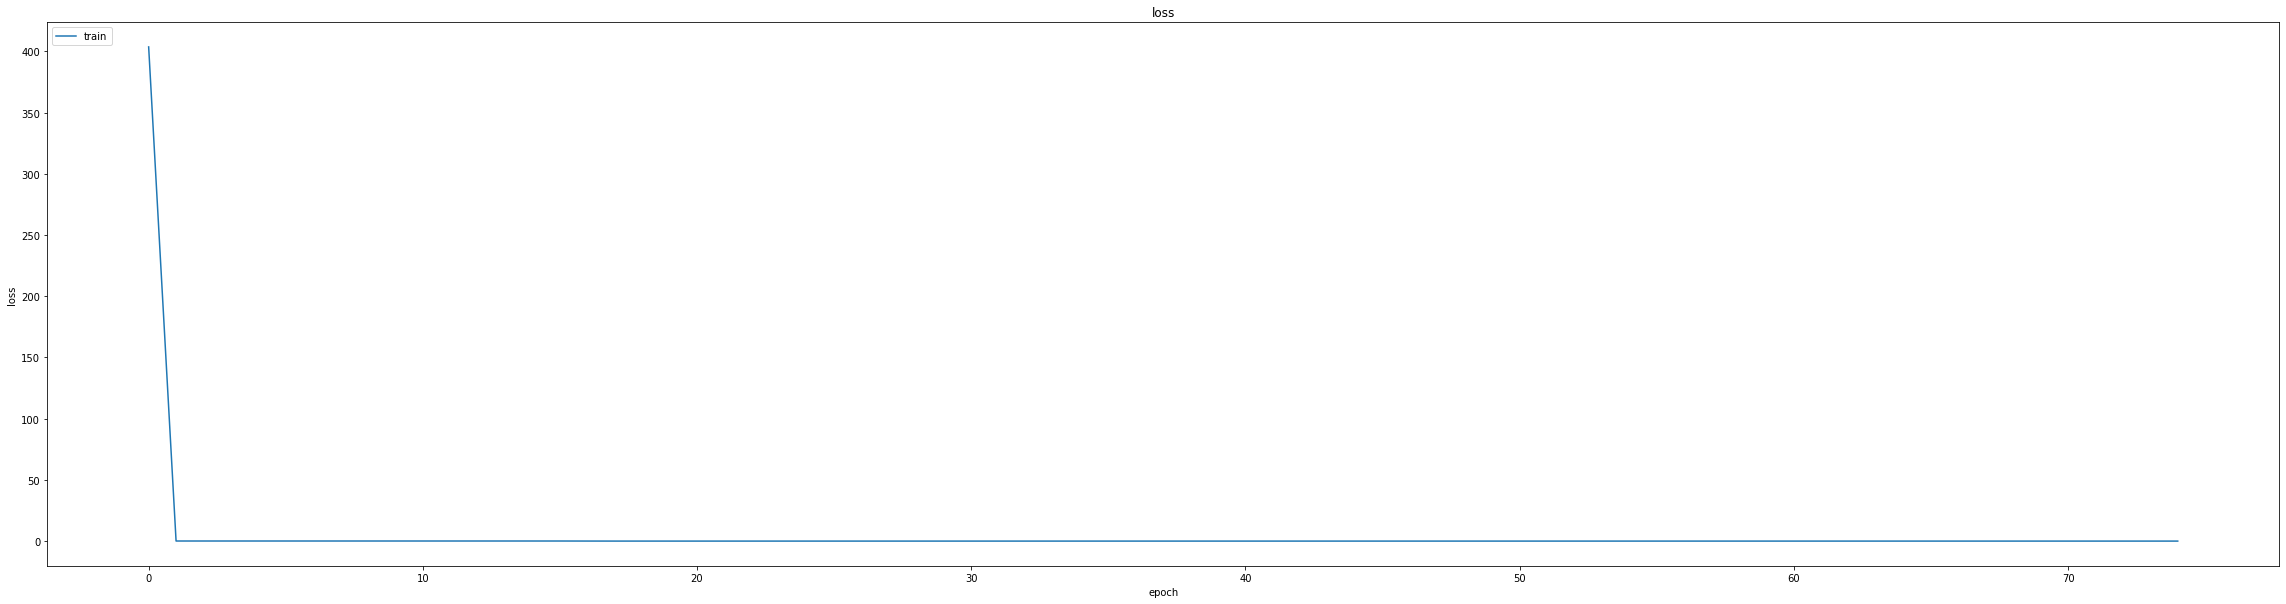

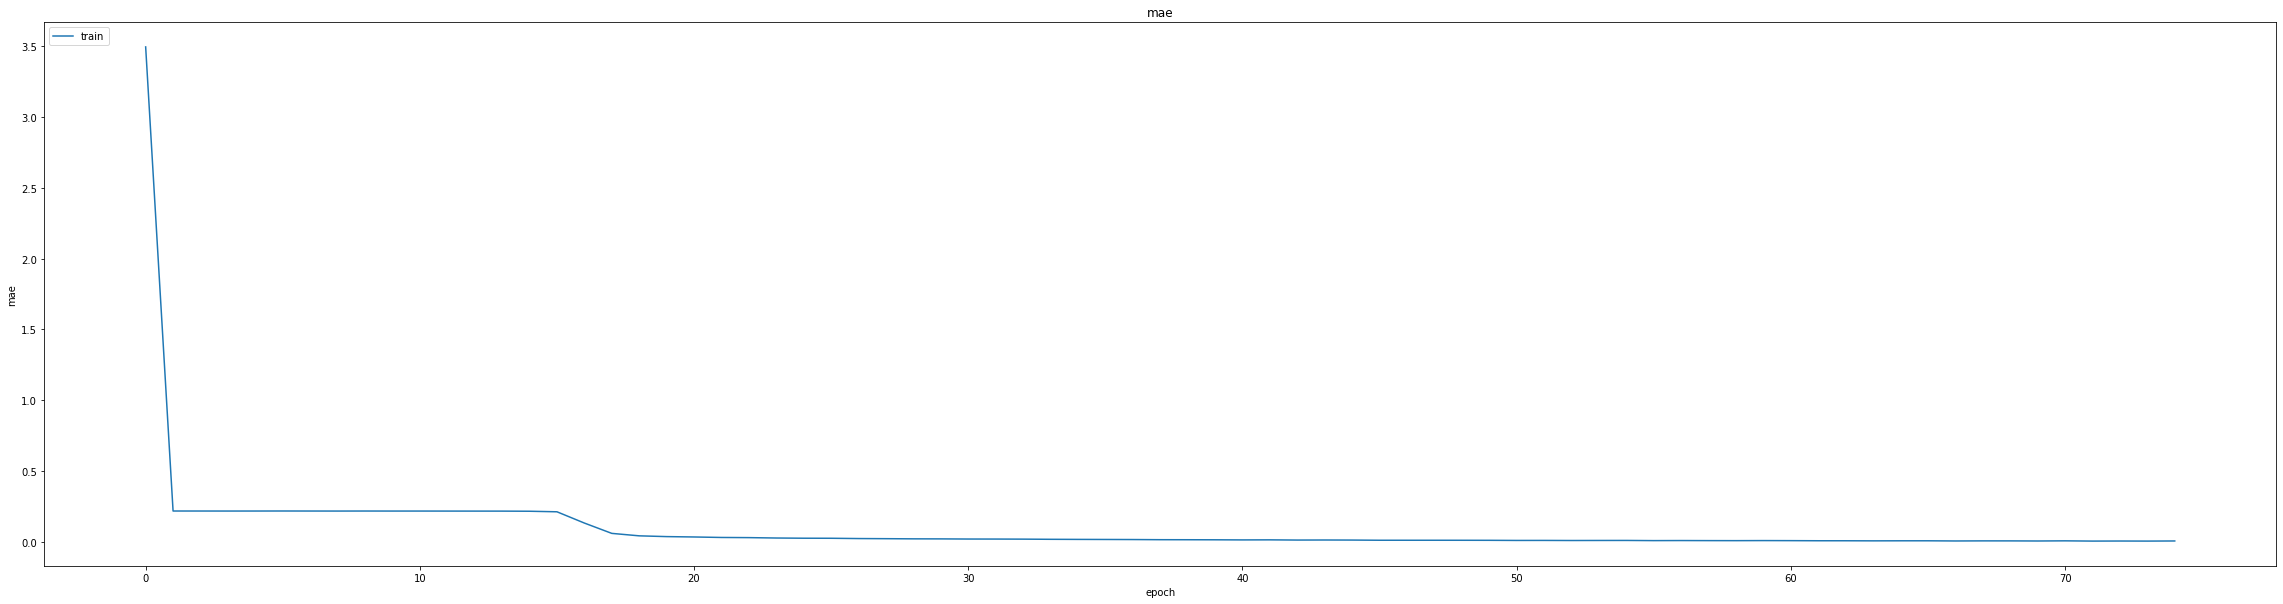

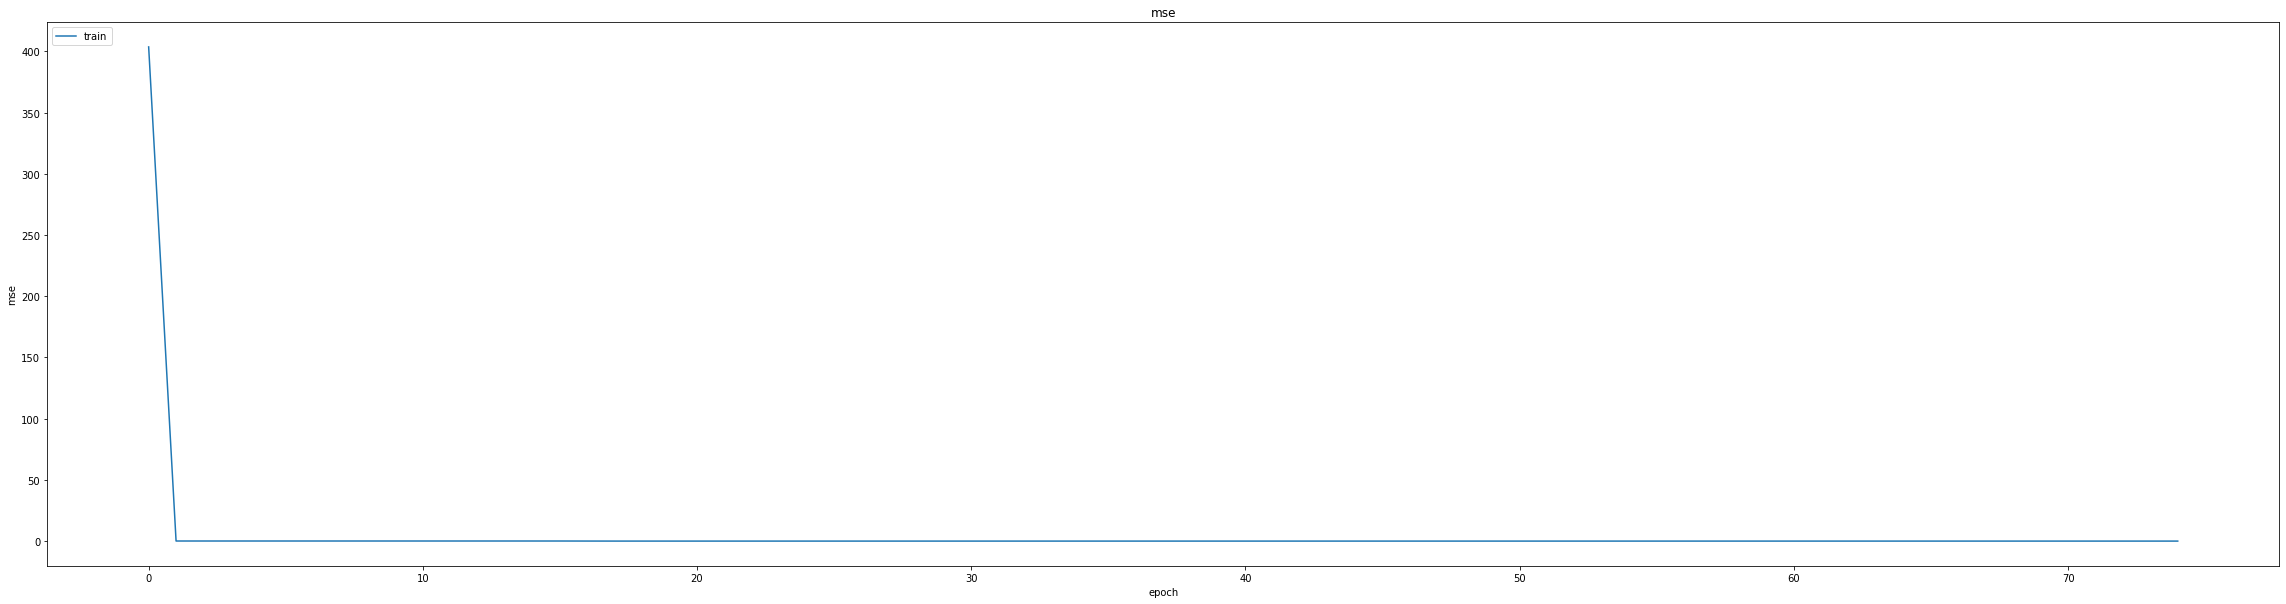

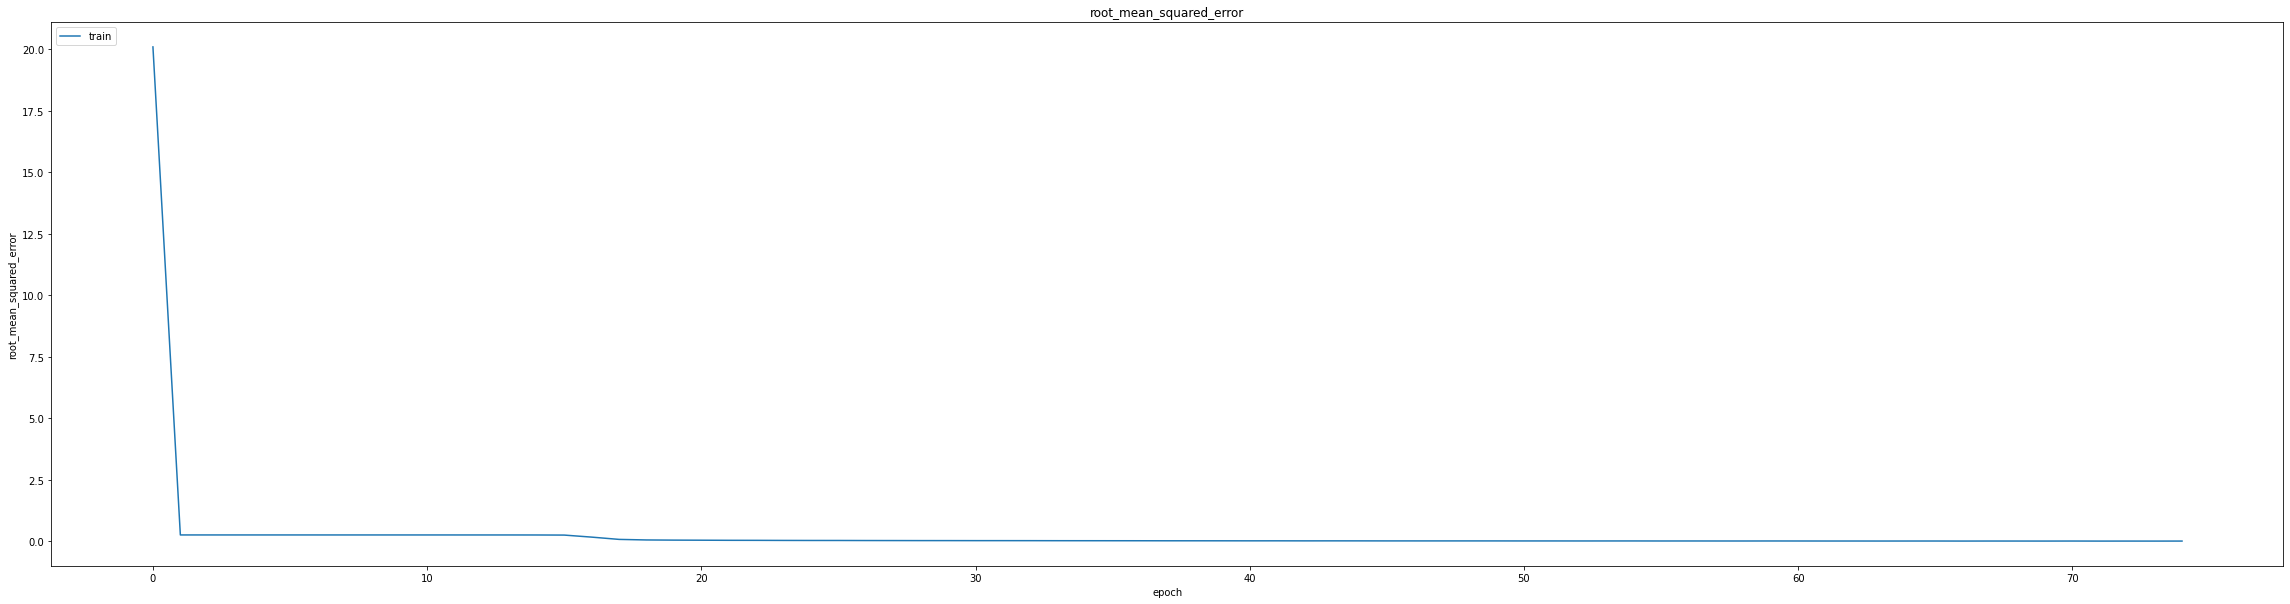

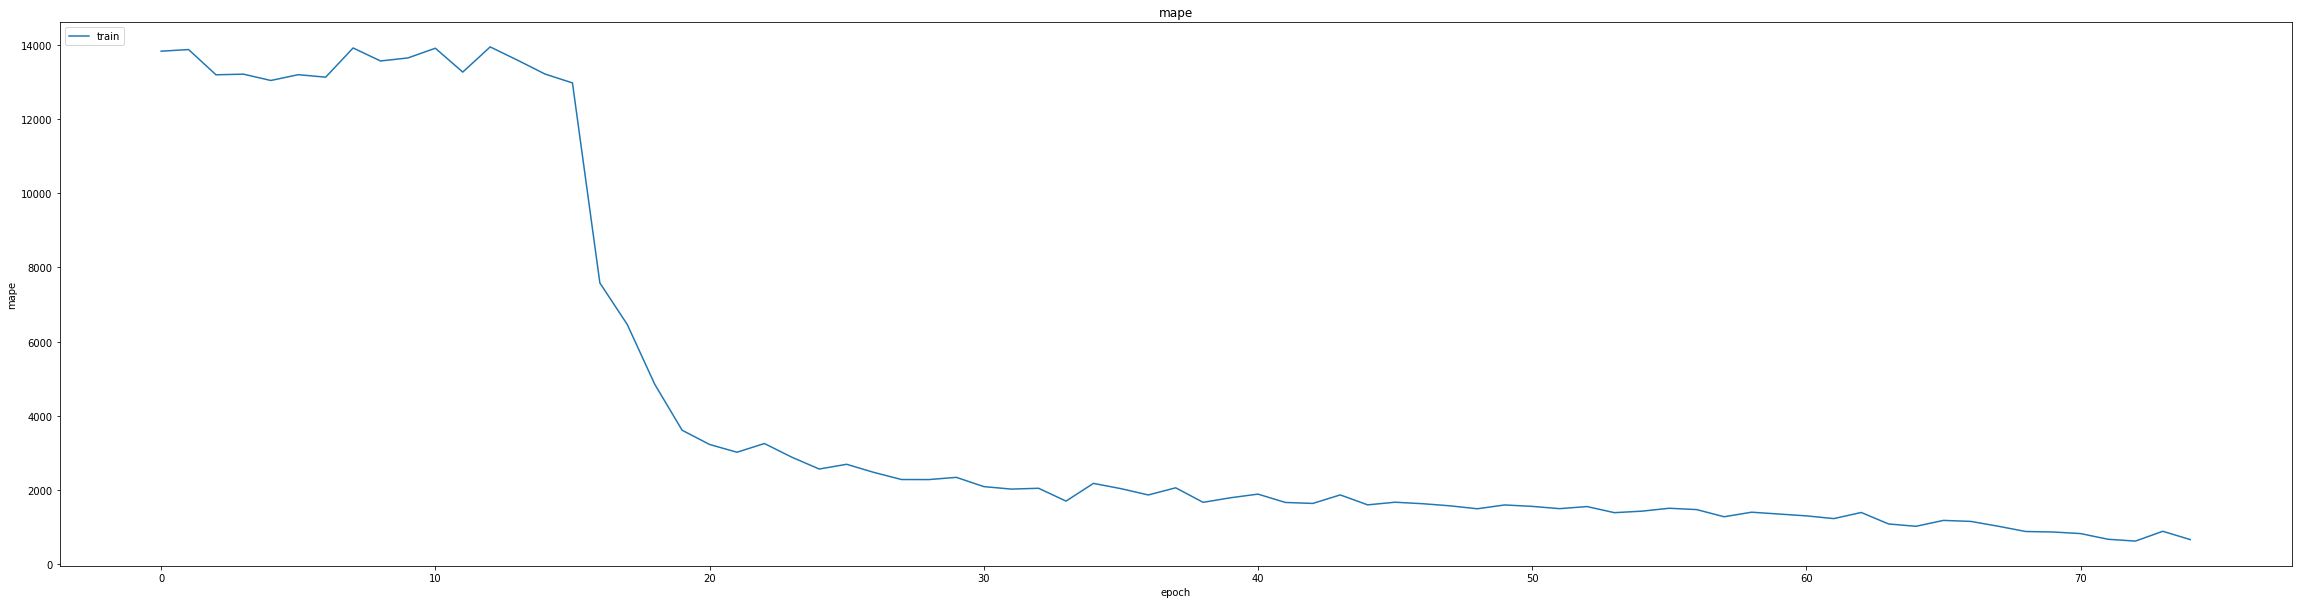

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.005160167347639799
0.00720259640365839
464/464 [==============================] - 3s 4ms/step
0.9987232654802733


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_LSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
348/348 [==============================] - ETA: 0s - loss: 5.0993e-04 - mae: 0.0102 - mse: 5.0993e-04 - root_mean_squared_error: 0.0226 - mape: 910.2559
Epoch 1: val_mse improved from 0.00005 to 0.00005, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 22s 51ms/step - loss: 5.0993e-04 - mae: 0.0102 - mse: 5.0993e-04 - root_mean_squared_error: 0.0226 - mape: 910.2559 - val_loss: 5.0536e-05 - val_mae: 0.0052 - val_mse: 5.0536e-05 - val_root_mean_squared_error: 0.0071 - val_mape: 2674.8601 - lr: 0.0010
Epoch 2/25
345/348 [============================>.] - ETA: 0s - loss: 4.1124e-05 - mae: 0.0049 - mse: 4.1124e-05 - root_mean_squared_error: 0.0064 - mape: 780.7113
Epoch 2: val_mse did not improve from 0.00005
348/348 [==============================] - 4s 12ms/step - loss: 4.1101e-05 - mae: 0.0049 - mse: 4.1101e-05 - root_mean_squared_error: 0.0064 - mape: 774.1337 - val_loss: 7.8150e-05 - val_mae: 0.0072 - val_mse: 7.8150e-05 - val_root_mean_squared_error: 0.0088 - val_mape: 2328.6392 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/25
343/348 [============================>.] - ETA: 0s - loss: 4.2618e-05 - mae: 0.0050 - mse: 4.2618e-05 - root_mean_squared_error: 0.0065 - mape: 627.4230
E

348/348 [==============================] - 15s 44ms/step - loss: 4.5757e-05 - mae: 0.0052 - mse: 4.5757e-05 - root_mean_squared_error: 0.0068 - mape: 687.6418 - val_loss: 3.7200e-05 - val_mae: 0.0044 - val_mse: 3.7200e-05 - val_root_mean_squared_error: 0.0061 - val_mape: 2282.6272 - lr: 7.2900e-04
Epoch 8/25
344/348 [============================>.] - ETA: 0s - loss: 6.3991e-05 - mae: 0.0062 - mse: 6.3991e-05 - root_mean_squared_error: 0.0080 - mape: 618.4871
Epoch 8: val_mse did not improve from 0.00004
348/348 [==============================] - 4s 12ms/step - loss: 6.3585e-05 - mae: 0.0061 - mse: 6.3585e-05 - root_mean_squared_error: 0.0080 - mape: 611.5046 - val_loss: 6.2890e-05 - val_mae: 0.0065 - val_mse: 6.2890e-05 - val_root_mean_squared_error: 0.0079 - val_mape: 2147.8738 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/25
348/348 [==============================] - ETA: 0s - loss: 3.6369e-05 - mae: 0.0046 - mse: 3.6369e-05 - root_mean_squared_error: 0.0060 - mape: 66

348/348 [==============================] - 15s 44ms/step - loss: 3.9550e-05 - mae: 0.0048 - mse: 3.9550e-05 - root_mean_squared_error: 0.0063 - mape: 480.0420 - val_loss: 2.9138e-05 - val_mae: 0.0037 - val_mse: 2.9138e-05 - val_root_mean_squared_error: 0.0054 - val_mape: 1720.1564 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/25
347/348 [============================>.] - ETA: 0s - loss: 3.5030e-05 - mae: 0.0045 - mse: 3.5030e-05 - root_mean_squared_error: 0.0059 - mape: 459.0476
Epoch 13: val_mse did not improve from 0.00003
348/348 [==============================] - 4s 12ms/step - loss: 3.5014e-05 - mae: 0.0045 - mse: 3.5014e-05 - root_mean_squared_error: 0.0059 - mape: 457.8134 - val_loss: 5.3830e-05 - val_mae: 0.0060 - val_mse: 5.3830e-05 - val_root_mean_squared_error: 0.0073 - val_mape: 1614.2157 - lr: 5.3144e-04
Epoch 14/25
344/348 [============================>.] - ETA: 0s - loss: 3.5634e-05 - mae: 0.0046 - mse: 3.5634e-05 - root_mean_squared_error: 0.0060 - mape:

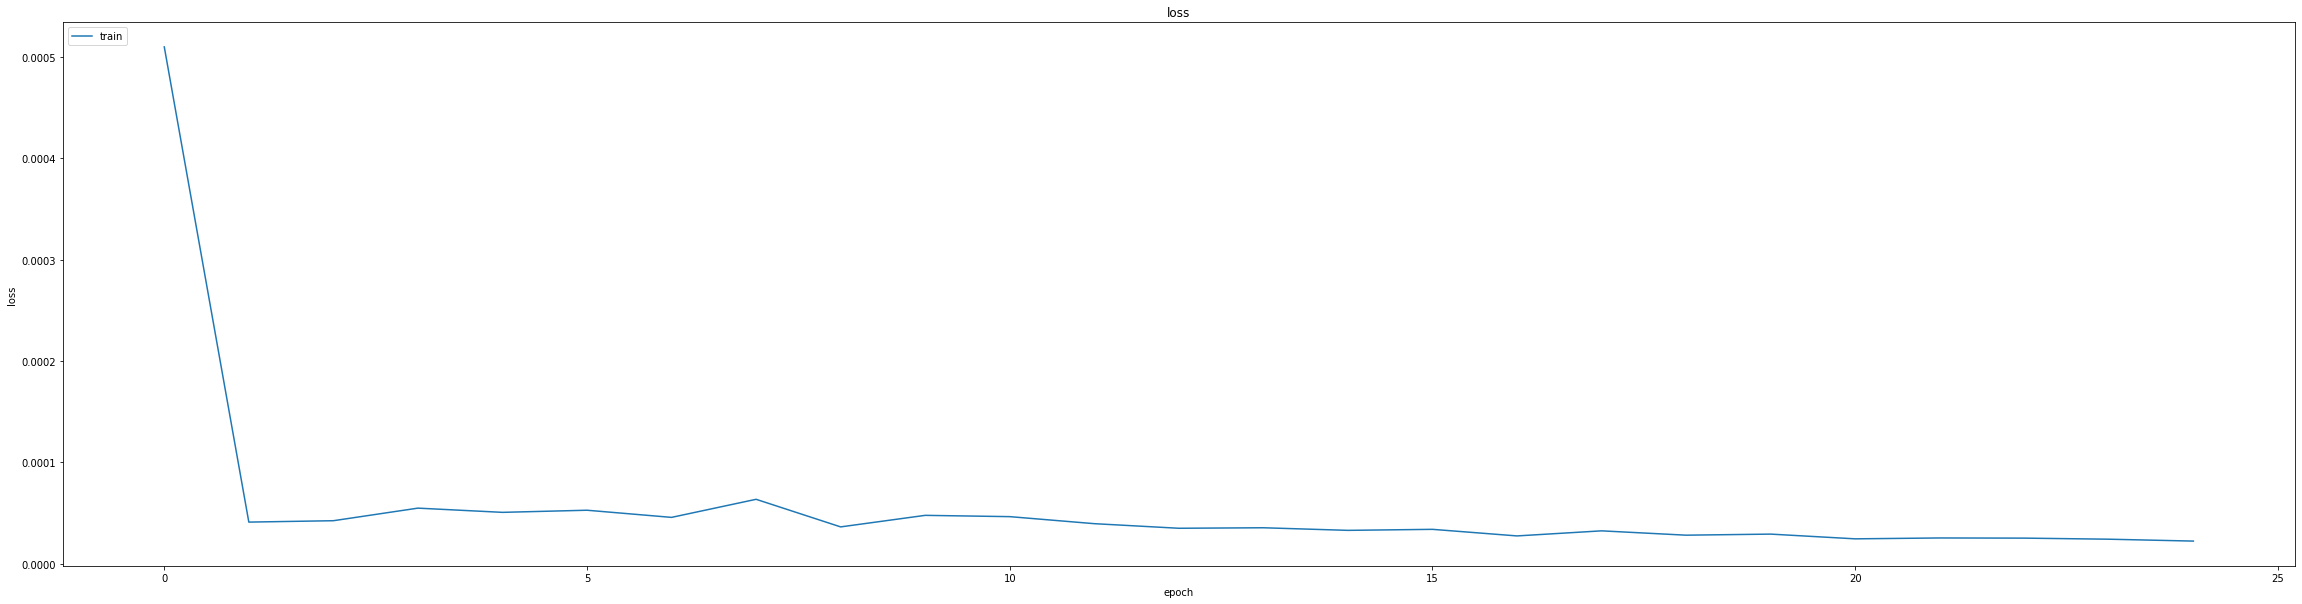

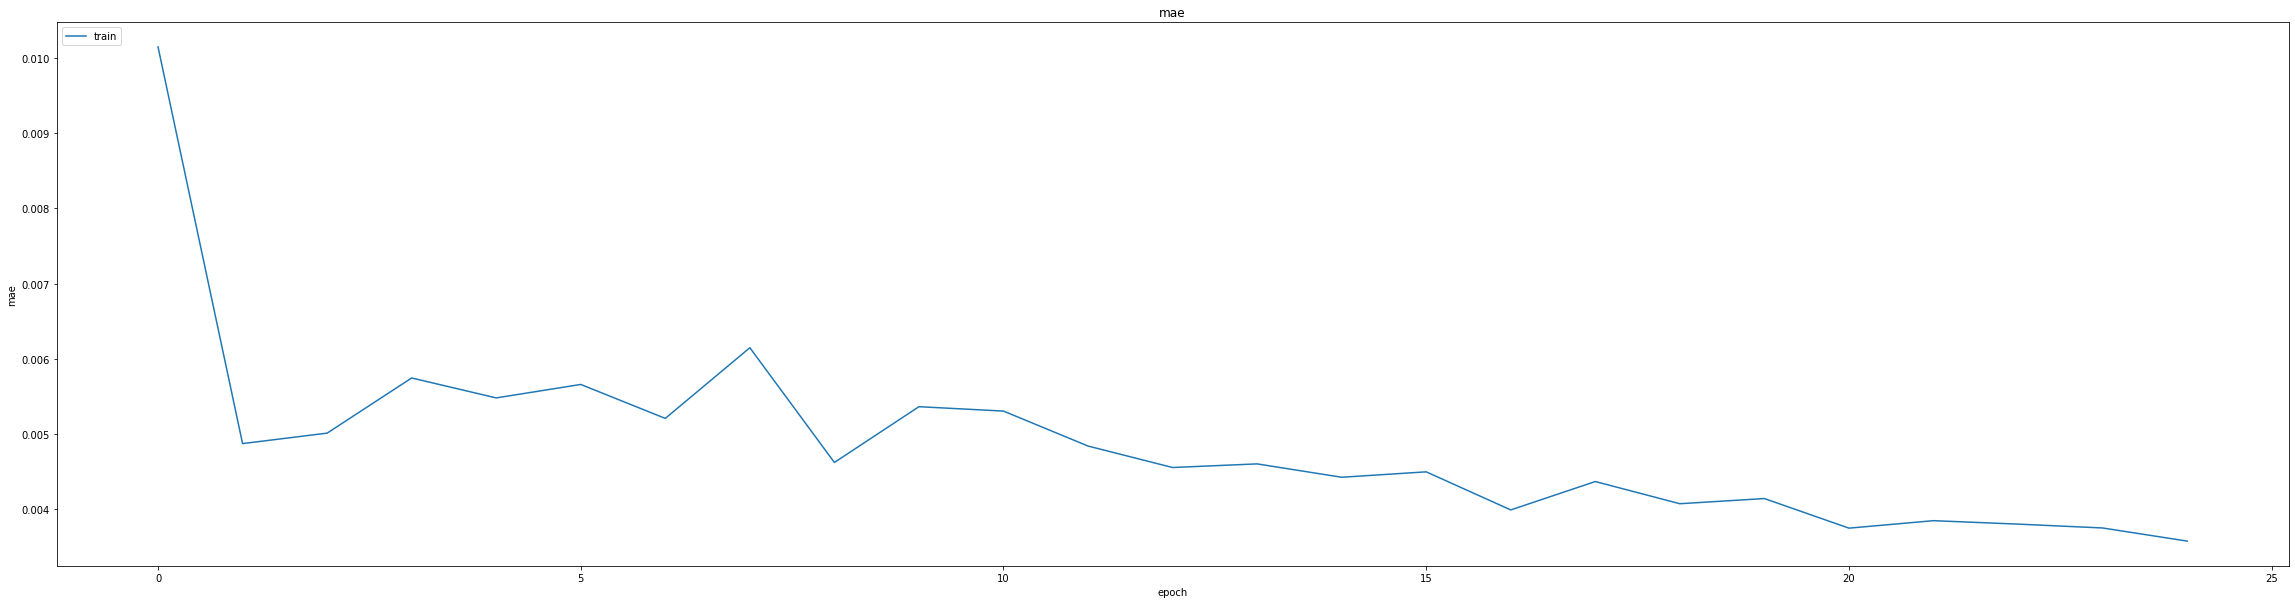

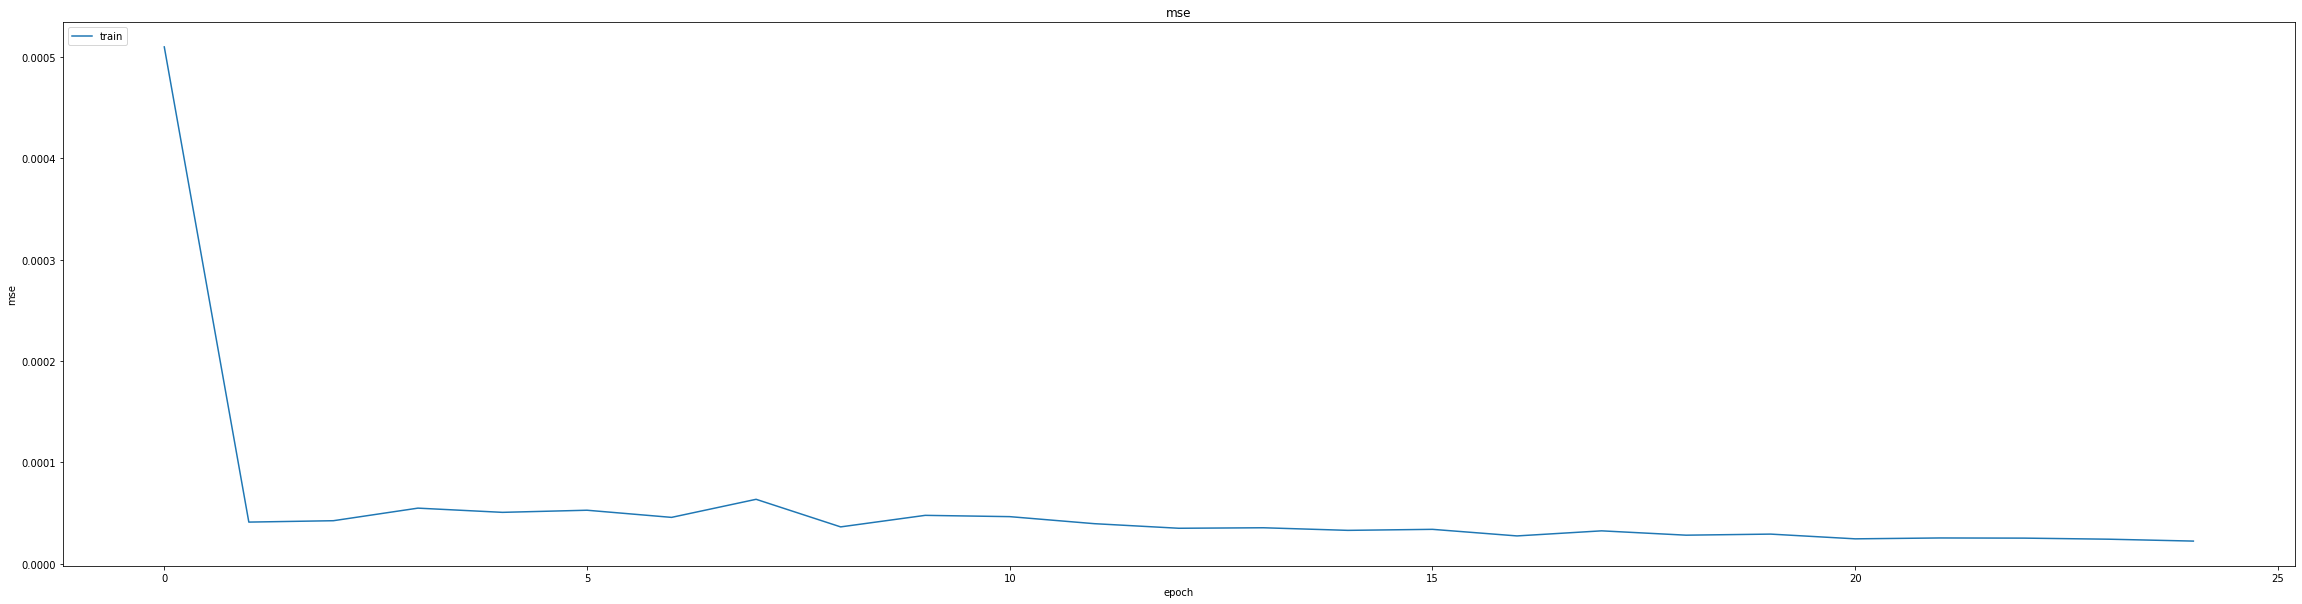

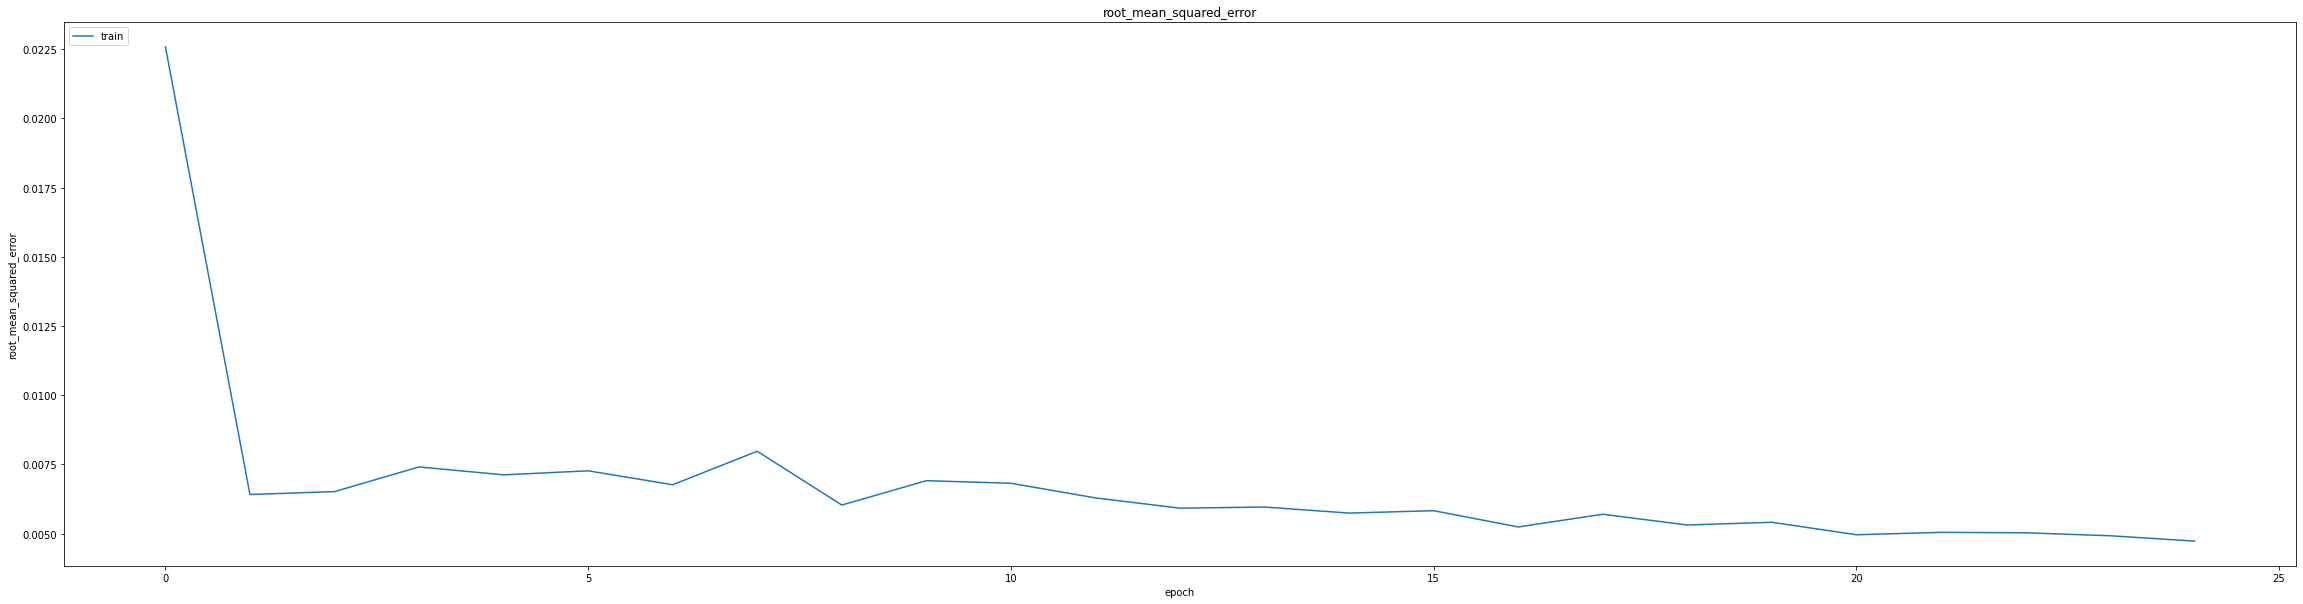

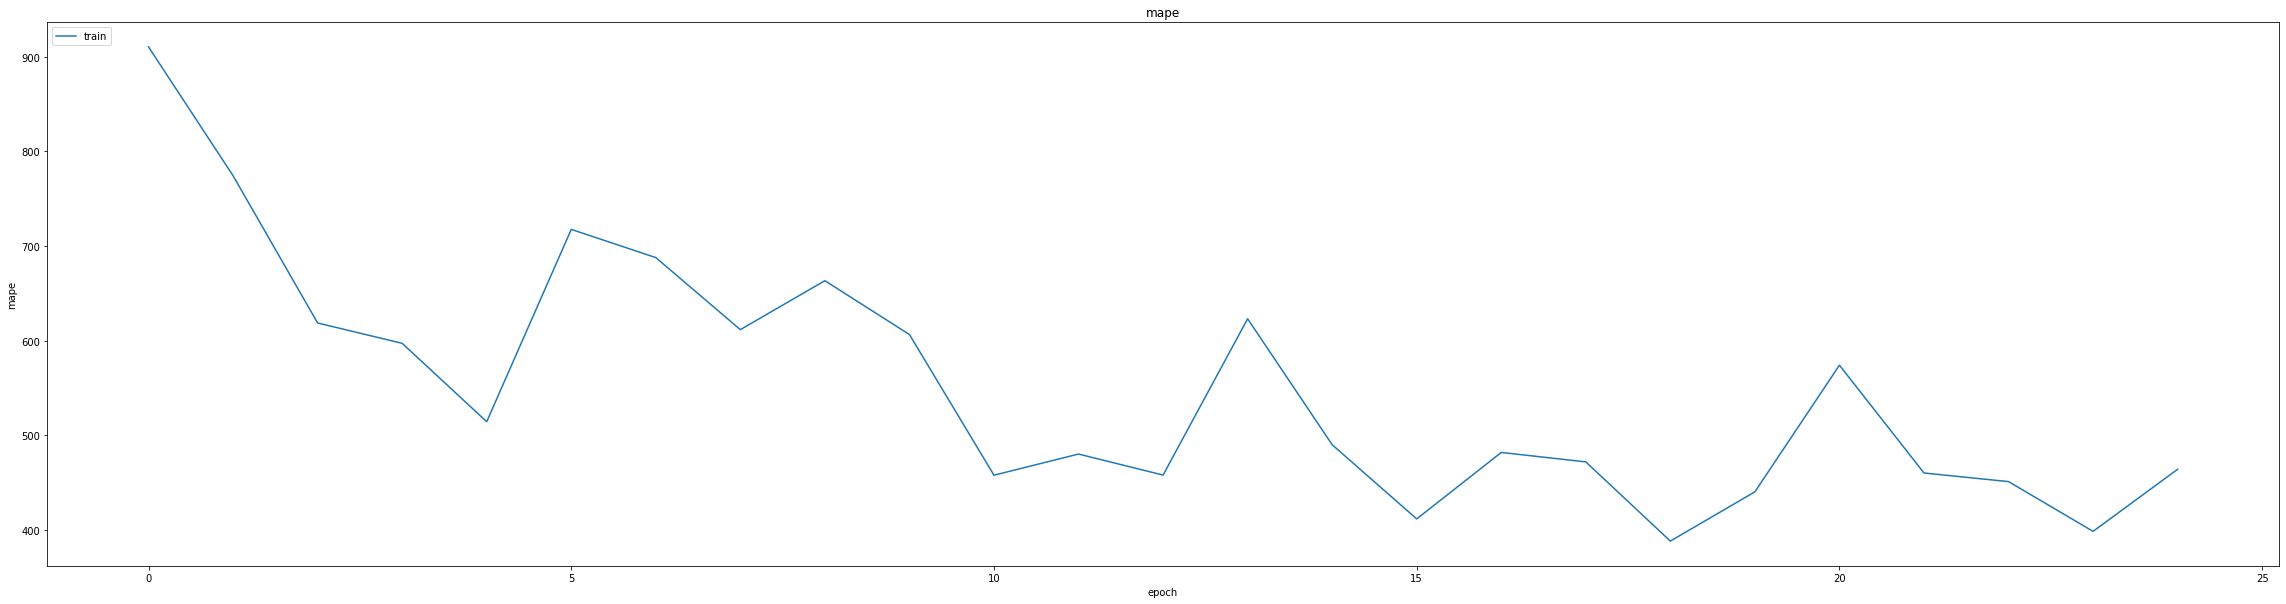

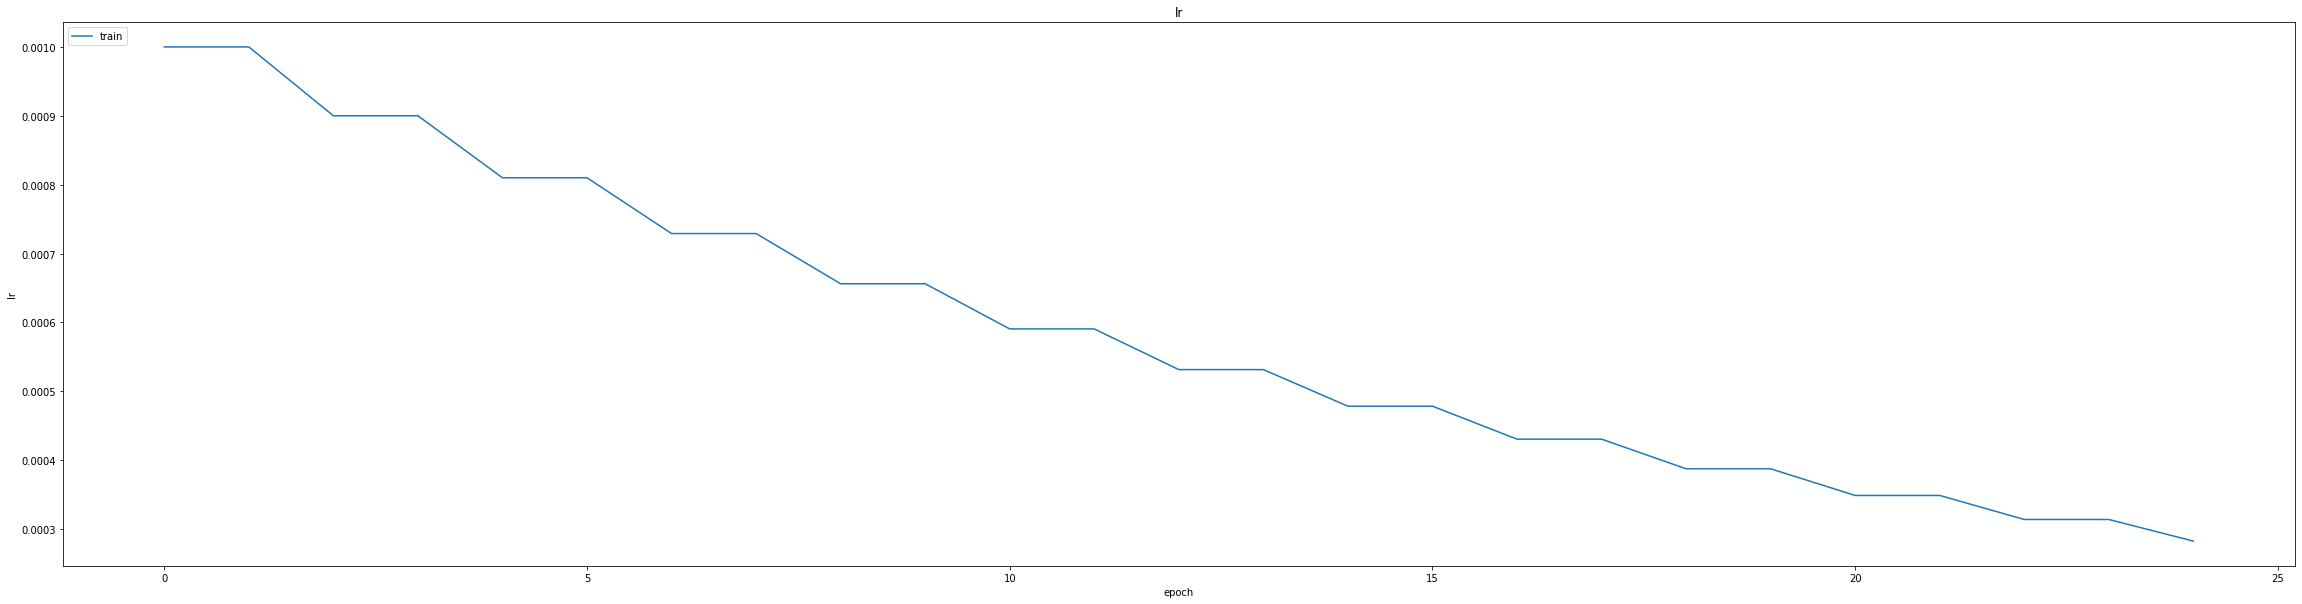

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.0036620162427425385
0.005397959612309933
464/464 [==============================] - 3s 5ms/step
0.9993433988448319


464/464 [==============================] - 2s 5ms/step


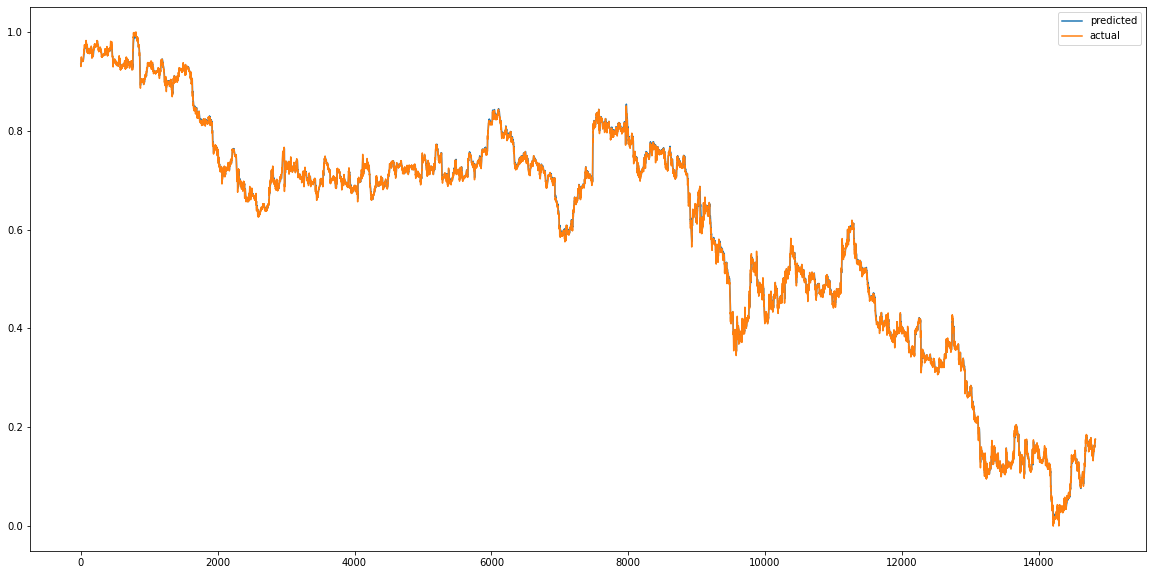

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_15min_GRU_LSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


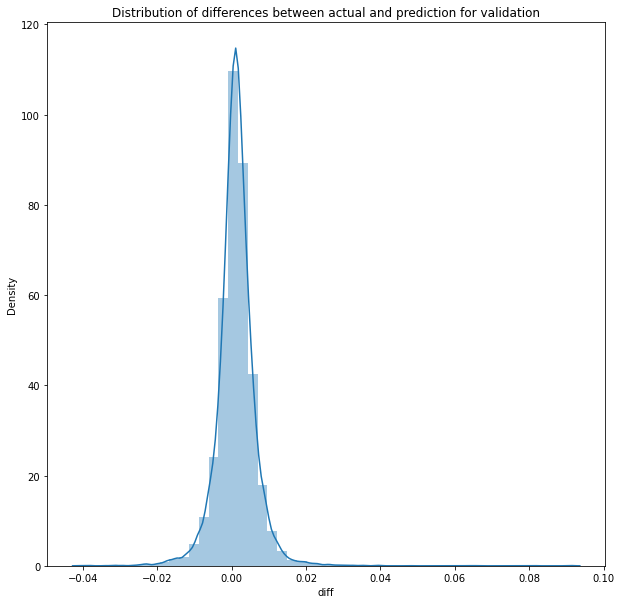

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 2s 4ms/step


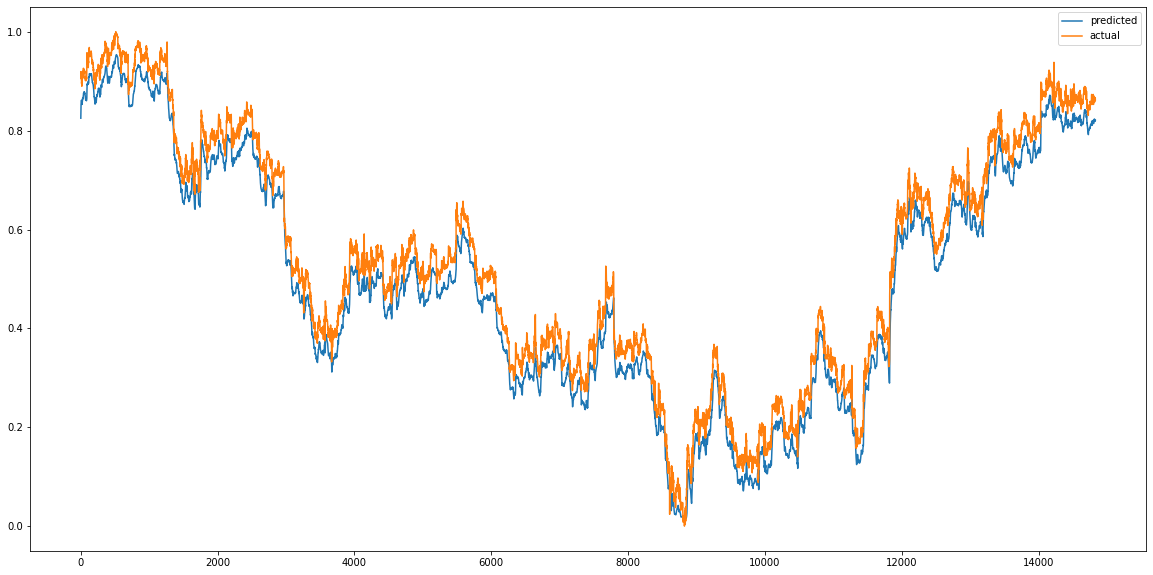

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


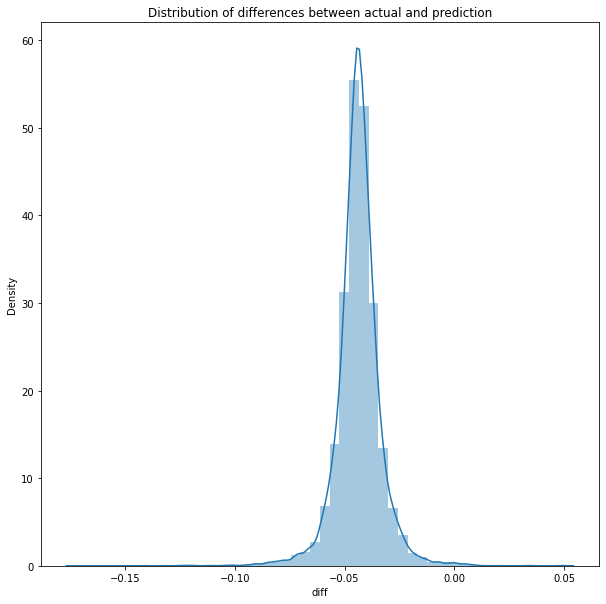

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.002005290190125662
RMSE :  0.04478046661353209
MAE :  0.04366425496764074
464/464 [==============================] - 2s 4ms/step
R2_Score  : 0.9667927452095582


count    14830.000000
mean        -0.043616
std          0.010147
min         -0.172269
25%         -0.048218
50%         -0.043642
75%         -0.038896
max          0.049780
Name: diff, dtype: float64

**CNN_BiLSTM_MODEL**

In [ ]:
model= thesis.CNN_BiLSTM_Model(x_train)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 bidirectional_2 (Bidirectio  (None, 24, 256)          197632    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 24, 256)           0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 16)               

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_BiLSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
348/348 [==============================] - ETA: 0s - loss: 625.4269 - mae: 4.3617 - mse: 625.4269 - root_mean_squared_error: 25.0085 - mape: 10274.3281
Epoch 1: val_mse improved from inf to 0.08561, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 40s 88ms/step - loss: 625.4269 - mae: 4.3617 - mse: 625.4269 - root_mean_squared_error: 25.0085 - mape: 10274.3281 - val_loss: 0.0856 - val_mae: 0.2580 - val_mse: 0.0856 - val_root_mean_squared_error: 0.2926 - val_mape: 31731.4980
Epoch 2/75
345/348 [============================>.] - ETA: 0s - loss: 0.0683 - mae: 0.2275 - mse: 0.0683 - root_mean_squared_error: 0.2613 - mape: 11819.6006
Epoch 2: val_mse improved from 0.08561 to 0.03178, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 83ms/step - loss: 0.0680 - mae: 0.2269 - mse: 0.0680 - root_mean_squared_error: 0.2608 - mape: 11720.4639 - val_loss: 0.0318 - val_mae: 0.1326 - val_mse: 0.0318 - val_root_mean_squared_error: 0.1783 - val_mape: 33870.8906
Epoch 3/75
348/348 [==============================] - ETA: 0s - loss: 0.0240 - mae: 0.1130 - mse: 0.0240 - root_mean_squared_error: 0.1550 - mape: 8175.5317
Epoch 3: val_mse improved from 0.03178 to 0.01037, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 30s 85ms/step - loss: 0.0240 - mae: 0.1130 - mse: 0.0240 - root_mean_squared_error: 0.1550 - mape: 8175.5317 - val_loss: 0.0104 - val_mae: 0.0699 - val_mse: 0.0104 - val_root_mean_squared_error: 0.1019 - val_mape: 23691.1074
Epoch 4/75
348/348 [==============================] - ETA: 0s - loss: 0.0095 - mae: 0.0700 - mse: 0.0095 - root_mean_squared_error: 0.0976 - mape: 6810.3501
Epoch 4: val_mse improved from 0.01037 to 0.00450, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 31s 88ms/step - loss: 0.0095 - mae: 0.0700 - mse: 0.0095 - root_mean_squared_error: 0.0976 - mape: 6810.3501 - val_loss: 0.0045 - val_mae: 0.0413 - val_mse: 0.0045 - val_root_mean_squared_error: 0.0671 - val_mape: 18918.8613
Epoch 5/75
346/348 [============================>.] - ETA: 0s - loss: 0.0051 - mae: 0.0516 - mse: 0.0051 - root_mean_squared_error: 0.0716 - mape: 5550.0693
Epoch 5: val_mse improved from 0.00450 to 0.00278, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 28s 82ms/step - loss: 0.0051 - mae: 0.0516 - mse: 0.0051 - root_mean_squared_error: 0.0716 - mape: 5519.3071 - val_loss: 0.0028 - val_mae: 0.0331 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0527 - val_mape: 16186.3691
Epoch 6/75
348/348 [==============================] - ETA: 0s - loss: 0.0034 - mae: 0.0430 - mse: 0.0034 - root_mean_squared_error: 0.0587 - mape: 4612.7920
Epoch 6: val_mse improved from 0.00278 to 0.00187, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 30s 87ms/step - loss: 0.0034 - mae: 0.0430 - mse: 0.0034 - root_mean_squared_error: 0.0587 - mape: 4612.7920 - val_loss: 0.0019 - val_mae: 0.0271 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0432 - val_mape: 14379.6377
Epoch 7/75
345/348 [============================>.] - ETA: 0s - loss: 0.0026 - mae: 0.0378 - mse: 0.0026 - root_mean_squared_error: 0.0507 - mape: 4310.5190
Epoch 7: val_mse improved from 0.00187 to 0.00143, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 28s 81ms/step - loss: 0.0026 - mae: 0.0378 - mse: 0.0026 - root_mean_squared_error: 0.0506 - mape: 4274.2285 - val_loss: 0.0014 - val_mae: 0.0250 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0379 - val_mape: 13085.4062
Epoch 8/75
346/348 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0343 - mse: 0.0021 - root_mean_squared_error: 0.0454 - mape: 4185.3564
Epoch 8: val_mse improved from 0.00143 to 0.00132, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 83ms/step - loss: 0.0021 - mae: 0.0343 - mse: 0.0021 - root_mean_squared_error: 0.0454 - mape: 4162.1167 - val_loss: 0.0013 - val_mae: 0.0270 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0363 - val_mape: 12113.8633
Epoch 9/75
348/348 [==============================] - ETA: 0s - loss: 0.0017 - mae: 0.0318 - mse: 0.0017 - root_mean_squared_error: 0.0417 - mape: 3855.1533
Epoch 9: val_mse improved from 0.00132 to 0.00101, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 30s 85ms/step - loss: 0.0017 - mae: 0.0318 - mse: 0.0017 - root_mean_squared_error: 0.0417 - mape: 3855.1533 - val_loss: 0.0010 - val_mae: 0.0229 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0318 - val_mape: 11351.1680
Epoch 10/75
346/348 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0297 - mse: 0.0015 - root_mean_squared_error: 0.0385 - mape: 4006.3699
Epoch 10: val_mse improved from 0.00101 to 0.00073, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 28s 80ms/step - loss: 0.0015 - mae: 0.0296 - mse: 0.0015 - root_mean_squared_error: 0.0385 - mape: 3984.1152 - val_loss: 7.3012e-04 - val_mae: 0.0182 - val_mse: 7.3012e-04 - val_root_mean_squared_error: 0.0270 - val_mape: 10722.9717
Epoch 11/75
346/348 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0277 - mse: 0.0013 - root_mean_squared_error: 0.0359 - mape: 3299.8887
Epoch 11: val_mse improved from 0.00073 to 0.00059, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 28s 80ms/step - loss: 0.0013 - mae: 0.0277 - mse: 0.0013 - root_mean_squared_error: 0.0359 - mape: 3281.5688 - val_loss: 5.9327e-04 - val_mae: 0.0160 - val_mse: 5.9327e-04 - val_root_mean_squared_error: 0.0244 - val_mape: 10155.9619
Epoch 12/75
346/348 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0265 - mse: 0.0012 - root_mean_squared_error: 0.0340 - mape: 3394.0400
Epoch 12: val_mse did not improve from 0.00059
348/348 [==============================] - 5s 15ms/step - loss: 0.0012 - mae: 0.0264 - mse: 0.0012 - root_mean_squared_error: 0.0340 - mape: 3375.2197 - val_loss: 6.4169e-04 - val_mae: 0.0186 - val_mse: 6.4169e-04 - val_root_mean_squared_error: 0.0253 - val_mape: 9666.0400
Epoch 13/75
348/348 [==============================] - ETA: 0s - loss: 0.0010 - mae: 0.0247 - mse: 0.0010 - root_mean_squared_error: 0.0317 - mape: 3313.0051
Epoch 13: val_mse improved from 0.00059 to 0.00044, saving model to /content/drive/MyDr

348/348 [==============================] - 28s 81ms/step - loss: 0.0010 - mae: 0.0247 - mse: 0.0010 - root_mean_squared_error: 0.0317 - mape: 3313.0051 - val_loss: 4.3700e-04 - val_mae: 0.0136 - val_mse: 4.3700e-04 - val_root_mean_squared_error: 0.0209 - val_mape: 9250.7676
Epoch 14/75
347/348 [============================>.] - ETA: 0s - loss: 9.0417e-04 - mae: 0.0234 - mse: 9.0417e-04 - root_mean_squared_error: 0.0301 - mape: 3172.0425
Epoch 14: val_mse did not improve from 0.00044
348/348 [==============================] - 6s 16ms/step - loss: 9.0393e-04 - mae: 0.0234 - mse: 9.0393e-04 - root_mean_squared_error: 0.0301 - mape: 3163.5103 - val_loss: 4.3908e-04 - val_mae: 0.0146 - val_mse: 4.3908e-04 - val_root_mean_squared_error: 0.0210 - val_mape: 8881.3701
Epoch 15/75
345/348 [============================>.] - ETA: 0s - loss: 8.1354e-04 - mae: 0.0223 - mse: 8.1354e-04 - root_mean_squared_error: 0.0285 - mape: 2783.1140
Epoch 15: val_mse improved from 0.00044 to 0.00040, saving model

348/348 [==============================] - 29s 84ms/step - loss: 8.1427e-04 - mae: 0.0223 - mse: 8.1427e-04 - root_mean_squared_error: 0.0285 - mape: 2759.7380 - val_loss: 3.9917e-04 - val_mae: 0.0140 - val_mse: 3.9917e-04 - val_root_mean_squared_error: 0.0200 - val_mape: 8560.5879
Epoch 16/75
346/348 [============================>.] - ETA: 0s - loss: 7.4818e-04 - mae: 0.0213 - mse: 7.4818e-04 - root_mean_squared_error: 0.0274 - mape: 2985.9092
Epoch 16: val_mse did not improve from 0.00040
348/348 [==============================] - 6s 16ms/step - loss: 7.4755e-04 - mae: 0.0213 - mse: 7.4755e-04 - root_mean_squared_error: 0.0273 - mape: 2969.3098 - val_loss: 4.4299e-04 - val_mae: 0.0161 - val_mse: 4.4299e-04 - val_root_mean_squared_error: 0.0210 - val_mape: 8261.0996
Epoch 17/75
348/348 [==============================] - ETA: 0s - loss: 6.8946e-04 - mae: 0.0205 - mse: 6.8946e-04 - root_mean_squared_error: 0.0263 - mape: 2752.1765
Epoch 17: val_mse improved from 0.00040 to 0.00033, savi

348/348 [==============================] - 29s 83ms/step - loss: 6.8946e-04 - mae: 0.0205 - mse: 6.8946e-04 - root_mean_squared_error: 0.0263 - mape: 2752.1765 - val_loss: 3.2720e-04 - val_mae: 0.0126 - val_mse: 3.2720e-04 - val_root_mean_squared_error: 0.0181 - val_mape: 8007.8599
Epoch 18/75
346/348 [============================>.] - ETA: 0s - loss: 6.2974e-04 - mae: 0.0195 - mse: 6.2974e-04 - root_mean_squared_error: 0.0251 - mape: 2773.3530
Epoch 18: val_mse did not improve from 0.00033
348/348 [==============================] - 6s 16ms/step - loss: 6.2934e-04 - mae: 0.0195 - mse: 6.2934e-04 - root_mean_squared_error: 0.0251 - mape: 2757.9382 - val_loss: 3.8295e-04 - val_mae: 0.0149 - val_mse: 3.8295e-04 - val_root_mean_squared_error: 0.0196 - val_mape: 7772.9185
Epoch 19/75
346/348 [============================>.] - ETA: 0s - loss: 5.7933e-04 - mae: 0.0187 - mse: 5.7933e-04 - root_mean_squared_error: 0.0241 - mape: 2752.0801
Epoch 19: val_mse did not improve from 0.00033
348/348 [

348/348 [==============================] - 28s 80ms/step - loss: 5.1566e-04 - mae: 0.0176 - mse: 5.1566e-04 - root_mean_squared_error: 0.0227 - mape: 2769.9343 - val_loss: 2.5948e-04 - val_mae: 0.0111 - val_mse: 2.5948e-04 - val_root_mean_squared_error: 0.0161 - val_mape: 7350.5601
Epoch 21/75
346/348 [============================>.] - ETA: 0s - loss: 4.7440e-04 - mae: 0.0170 - mse: 4.7440e-04 - root_mean_squared_error: 0.0218 - mape: 2473.0156
Epoch 21: val_mse improved from 0.00026 to 0.00024, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 27s 78ms/step - loss: 4.7426e-04 - mae: 0.0170 - mse: 4.7426e-04 - root_mean_squared_error: 0.0218 - mape: 2459.2717 - val_loss: 2.3605e-04 - val_mae: 0.0104 - val_mse: 2.3605e-04 - val_root_mean_squared_error: 0.0154 - val_mape: 7181.5957
Epoch 22/75
348/348 [==============================] - ETA: 0s - loss: 4.3397e-04 - mae: 0.0162 - mse: 4.3397e-04 - root_mean_squared_error: 0.0208 - mape: 2359.3857
Epoch 22: val_mse did not improve from 0.00024
348/348 [==============================] - 5s 15ms/step - loss: 4.3397e-04 - mae: 0.0162 - mse: 4.3397e-04 - root_mean_squared_error: 0.0208 - mape: 2359.3857 - val_loss: 3.2292e-04 - val_mae: 0.0139 - val_mse: 3.2292e-04 - val_root_mean_squared_error: 0.0180 - val_mape: 6994.5767
Epoch 23/75
346/348 [============================>.] - ETA: 0s - loss: 3.9634e-04 - mae: 0.0155 - mse: 3.9634e-04 - root_mean_squared_error: 0.0199 - mape: 2643.4927
Epoch 23: val_mse did not improve from 0.00024
348/348 [

348/348 [==============================] - 28s 81ms/step - loss: 2.8936e-04 - mae: 0.0132 - mse: 2.8936e-04 - root_mean_squared_error: 0.0170 - mape: 2530.7612 - val_loss: 2.1882e-04 - val_mae: 0.0109 - val_mse: 2.1882e-04 - val_root_mean_squared_error: 0.0148 - val_mape: 6404.7964
Epoch 27/75
345/348 [============================>.] - ETA: 0s - loss: 2.6448e-04 - mae: 0.0126 - mse: 2.6448e-04 - root_mean_squared_error: 0.0163 - mape: 2201.8003
Epoch 27: val_mse improved from 0.00022 to 0.00017, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 28s 80ms/step - loss: 2.6434e-04 - mae: 0.0126 - mse: 2.6434e-04 - root_mean_squared_error: 0.0163 - mape: 2183.2395 - val_loss: 1.7198e-04 - val_mae: 0.0089 - val_mse: 1.7198e-04 - val_root_mean_squared_error: 0.0131 - val_mape: 6294.0771
Epoch 28/75
344/348 [============================>.] - ETA: 0s - loss: 2.4006e-04 - mae: 0.0119 - mse: 2.4006e-04 - root_mean_squared_error: 0.0155 - mape: 2313.1025
Epoch 28: val_mse improved from 0.00017 to 0.00015, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 28s 80ms/step - loss: 2.3984e-04 - mae: 0.0119 - mse: 2.3984e-04 - root_mean_squared_error: 0.0155 - mape: 2286.9739 - val_loss: 1.4964e-04 - val_mae: 0.0078 - val_mse: 1.4964e-04 - val_root_mean_squared_error: 0.0122 - val_mape: 6150.4424
Epoch 29/75
345/348 [============================>.] - ETA: 0s - loss: 2.1680e-04 - mae: 0.0113 - mse: 2.1680e-04 - root_mean_squared_error: 0.0147 - mape: 2084.5376
Epoch 29: val_mse did not improve from 0.00015
348/348 [==============================] - 5s 15ms/step - loss: 2.1651e-04 - mae: 0.0113 - mse: 2.1651e-04 - root_mean_squared_error: 0.0147 - mape: 2066.9661 - val_loss: 2.2101e-04 - val_mae: 0.0116 - val_mse: 2.2101e-04 - val_root_mean_squared_error: 0.0149 - val_mape: 6024.1641
Epoch 30/75
348/348 [==============================] - ETA: 0s - loss: 1.9833e-04 - mae: 0.0108 - mse: 1.9833e-04 - root_mean_squared_error: 0.0141 - mape: 2086.2268
Epoch 30: val_mse did not improve from 0.00015
348/348 [

348/348 [==============================] - 29s 83ms/step - loss: 1.5657e-04 - mae: 0.0096 - mse: 1.5657e-04 - root_mean_squared_error: 0.0125 - mape: 1893.8978 - val_loss: 1.4701e-04 - val_mae: 0.0089 - val_mse: 1.4701e-04 - val_root_mean_squared_error: 0.0121 - val_mape: 5489.0278
Epoch 34/75
347/348 [============================>.] - ETA: 0s - loss: 1.4192e-04 - mae: 0.0091 - mse: 1.4192e-04 - root_mean_squared_error: 0.0119 - mape: 2022.4143
Epoch 34: val_mse did not improve from 0.00015
348/348 [==============================] - 5s 15ms/step - loss: 1.4201e-04 - mae: 0.0091 - mse: 1.4201e-04 - root_mean_squared_error: 0.0119 - mape: 2016.9799 - val_loss: 1.8706e-04 - val_mae: 0.0108 - val_mse: 1.8706e-04 - val_root_mean_squared_error: 0.0137 - val_mape: 5353.3555
Epoch 35/75
345/348 [============================>.] - ETA: 0s - loss: 1.3316e-04 - mae: 0.0088 - mse: 1.3316e-04 - root_mean_squared_error: 0.0115 - mape: 1758.2952
Epoch 35: val_mse did not improve from 0.00015
348/348 [

348/348 [==============================] - 28s 79ms/step - loss: 1.2416e-04 - mae: 0.0085 - mse: 1.2416e-04 - root_mean_squared_error: 0.0111 - mape: 1800.3254 - val_loss: 1.3917e-04 - val_mae: 0.0089 - val_mse: 1.3917e-04 - val_root_mean_squared_error: 0.0118 - val_mape: 5084.1528
Epoch 37/75
347/348 [============================>.] - ETA: 0s - loss: 1.1460e-04 - mae: 0.0082 - mse: 1.1460e-04 - root_mean_squared_error: 0.0107 - mape: 1664.5110
Epoch 37: val_mse did not improve from 0.00014
348/348 [==============================] - 5s 15ms/step - loss: 1.1461e-04 - mae: 0.0082 - mse: 1.1461e-04 - root_mean_squared_error: 0.0107 - mape: 1660.0352 - val_loss: 1.7022e-04 - val_mae: 0.0102 - val_mse: 1.7022e-04 - val_root_mean_squared_error: 0.0130 - val_mape: 4939.3672
Epoch 38/75
346/348 [============================>.] - ETA: 0s - loss: 1.0910e-04 - mae: 0.0080 - mse: 1.0910e-04 - root_mean_squared_error: 0.0104 - mape: 1839.5851
Epoch 38: val_mse did not improve from 0.00014
348/348 [

348/348 [==============================] - 28s 81ms/step - loss: 9.9164e-05 - mae: 0.0076 - mse: 9.9164e-05 - root_mean_squared_error: 0.0100 - mape: 1647.5759 - val_loss: 1.1768e-04 - val_mae: 0.0082 - val_mse: 1.1768e-04 - val_root_mean_squared_error: 0.0108 - val_mape: 4557.0557
Epoch 41/75
348/348 [==============================] - ETA: 0s - loss: 9.4200e-05 - mae: 0.0074 - mse: 9.4200e-05 - root_mean_squared_error: 0.0097 - mape: 1550.3330
Epoch 41: val_mse did not improve from 0.00012
348/348 [==============================] - 6s 16ms/step - loss: 9.4200e-05 - mae: 0.0074 - mse: 9.4200e-05 - root_mean_squared_error: 0.0097 - mape: 1550.3330 - val_loss: 2.2402e-04 - val_mae: 0.0126 - val_mse: 2.2402e-04 - val_root_mean_squared_error: 0.0150 - val_mape: 4428.6304
Epoch 42/75
346/348 [============================>.] - ETA: 0s - loss: 8.9025e-05 - mae: 0.0072 - mse: 8.9025e-05 - root_mean_squared_error: 0.0094 - mape: 1510.4814
Epoch 42: val_mse did not improve from 0.00012
348/348 [

348/348 [==============================] - 28s 81ms/step - loss: 7.6764e-05 - mae: 0.0068 - mse: 7.6764e-05 - root_mean_squared_error: 0.0088 - mape: 1154.2244 - val_loss: 6.9520e-05 - val_mae: 0.0062 - val_mse: 6.9520e-05 - val_root_mean_squared_error: 0.0083 - val_mape: 3558.4988
Epoch 52/75
347/348 [============================>.] - ETA: 0s - loss: 8.4011e-05 - mae: 0.0071 - mse: 8.4011e-05 - root_mean_squared_error: 0.0092 - mape: 1130.6194
Epoch 52: val_mse did not improve from 0.00007
348/348 [==============================] - 6s 16ms/step - loss: 8.4126e-05 - mae: 0.0071 - mse: 8.4126e-05 - root_mean_squared_error: 0.0092 - mape: 1127.5793 - val_loss: 1.2042e-04 - val_mae: 0.0087 - val_mse: 1.2042e-04 - val_root_mean_squared_error: 0.0110 - val_mape: 3579.1741
Epoch 53/75
345/348 [============================>.] - ETA: 0s - loss: 7.8819e-05 - mae: 0.0069 - mse: 7.8819e-05 - root_mean_squared_error: 0.0089 - mape: 1297.0901
Epoch 53: val_mse improved from 0.00007 to 0.00006, savi

348/348 [==============================] - 29s 83ms/step - loss: 7.8923e-05 - mae: 0.0069 - mse: 7.8923e-05 - root_mean_squared_error: 0.0089 - mape: 1286.1582 - val_loss: 5.6690e-05 - val_mae: 0.0052 - val_mse: 5.6690e-05 - val_root_mean_squared_error: 0.0075 - val_mape: 3462.1057
Epoch 54/75
346/348 [============================>.] - ETA: 0s - loss: 8.5821e-05 - mae: 0.0072 - mse: 8.5821e-05 - root_mean_squared_error: 0.0093 - mape: 1178.0123
Epoch 54: val_mse did not improve from 0.00006
348/348 [==============================] - 6s 16ms/step - loss: 8.5664e-05 - mae: 0.0072 - mse: 8.5664e-05 - root_mean_squared_error: 0.0093 - mape: 1171.4645 - val_loss: 9.8919e-05 - val_mae: 0.0082 - val_mse: 9.8919e-05 - val_root_mean_squared_error: 0.0099 - val_mape: 3397.9944
Epoch 55/75
346/348 [============================>.] - ETA: 0s - loss: 8.5084e-05 - mae: 0.0072 - mse: 8.5084e-05 - root_mean_squared_error: 0.0092 - mape: 1128.4431
Epoch 55: val_mse did not improve from 0.00006
348/348 [

348/348 [==============================] - 29s 84ms/step - loss: 9.6968e-05 - mae: 0.0074 - mse: 9.6968e-05 - root_mean_squared_error: 0.0098 - mape: 1065.4883 - val_loss: 4.5774e-05 - val_mae: 0.0045 - val_mse: 4.5774e-05 - val_root_mean_squared_error: 0.0068 - val_mape: 3101.4807
Epoch 61/75
347/348 [============================>.] - ETA: 0s - loss: 9.4093e-05 - mae: 0.0076 - mse: 9.4093e-05 - root_mean_squared_error: 0.0097 - mape: 1012.8625
Epoch 61: val_mse did not improve from 0.00005
348/348 [==============================] - 6s 17ms/step - loss: 9.3945e-05 - mae: 0.0076 - mse: 9.3945e-05 - root_mean_squared_error: 0.0097 - mape: 1010.1369 - val_loss: 1.9107e-04 - val_mae: 0.0121 - val_mse: 1.9107e-04 - val_root_mean_squared_error: 0.0138 - val_mape: 2994.2231
Epoch 62/75
345/348 [============================>.] - ETA: 0s - loss: 6.8874e-05 - mae: 0.0065 - mse: 6.8874e-05 - root_mean_squared_error: 0.0083 - mape: 996.8173 
Epoch 62: val_mse improved from 0.00005 to 0.00004, savi

348/348 [==============================] - 29s 82ms/step - loss: 7.0358e-05 - mae: 0.0066 - mse: 7.0358e-05 - root_mean_squared_error: 0.0084 - mape: 988.4244 - val_loss: 4.1413e-05 - val_mae: 0.0043 - val_mse: 4.1413e-05 - val_root_mean_squared_error: 0.0064 - val_mape: 2992.0508
Epoch 63/75
348/348 [==============================] - ETA: 0s - loss: 8.8422e-05 - mae: 0.0072 - mse: 8.8422e-05 - root_mean_squared_error: 0.0094 - mape: 978.2953
Epoch 63: val_mse did not improve from 0.00004
348/348 [==============================] - 6s 16ms/step - loss: 8.8422e-05 - mae: 0.0072 - mse: 8.8422e-05 - root_mean_squared_error: 0.0094 - mape: 978.2953 - val_loss: 2.2560e-04 - val_mae: 0.0132 - val_mse: 2.2560e-04 - val_root_mean_squared_error: 0.0150 - val_mape: 2912.9534
Epoch 64/75
348/348 [==============================] - ETA: 0s - loss: 7.3666e-05 - mae: 0.0067 - mse: 7.3666e-05 - root_mean_squared_error: 0.0086 - mape: 963.2880
Epoch 64: val_mse did not improve from 0.00004
348/348 [====

348/348 [==============================] - 28s 81ms/step - loss: 6.7676e-05 - mae: 0.0063 - mse: 6.7676e-05 - root_mean_squared_error: 0.0082 - mape: 829.5446 - val_loss: 4.0889e-05 - val_mae: 0.0048 - val_mse: 4.0889e-05 - val_root_mean_squared_error: 0.0064 - val_mape: 2501.9739
Epoch 72/75
348/348 [==============================] - ETA: 0s - loss: 7.7446e-05 - mae: 0.0068 - mse: 7.7446e-05 - root_mean_squared_error: 0.0088 - mape: 806.6920
Epoch 72: val_mse did not improve from 0.00004
348/348 [==============================] - 7s 19ms/step - loss: 7.7446e-05 - mae: 0.0068 - mse: 7.7446e-05 - root_mean_squared_error: 0.0088 - mape: 806.6920 - val_loss: 9.8145e-05 - val_mae: 0.0085 - val_mse: 9.8145e-05 - val_root_mean_squared_error: 0.0099 - val_mape: 2424.6443
Epoch 73/75
346/348 [============================>.] - ETA: 0s - loss: 6.3995e-05 - mae: 0.0061 - mse: 6.3995e-05 - root_mean_squared_error: 0.0080 - mape: 883.7679
Epoch 73: val_mse did not improve from 0.00004
348/348 [====

348/348 [==============================] - 29s 82ms/step - loss: 7.5668e-05 - mae: 0.0065 - mse: 7.5668e-05 - root_mean_squared_error: 0.0087 - mape: 784.1061 - val_loss: 3.7035e-05 - val_mae: 0.0043 - val_mse: 3.7035e-05 - val_root_mean_squared_error: 0.0061 - val_mape: 2280.7202


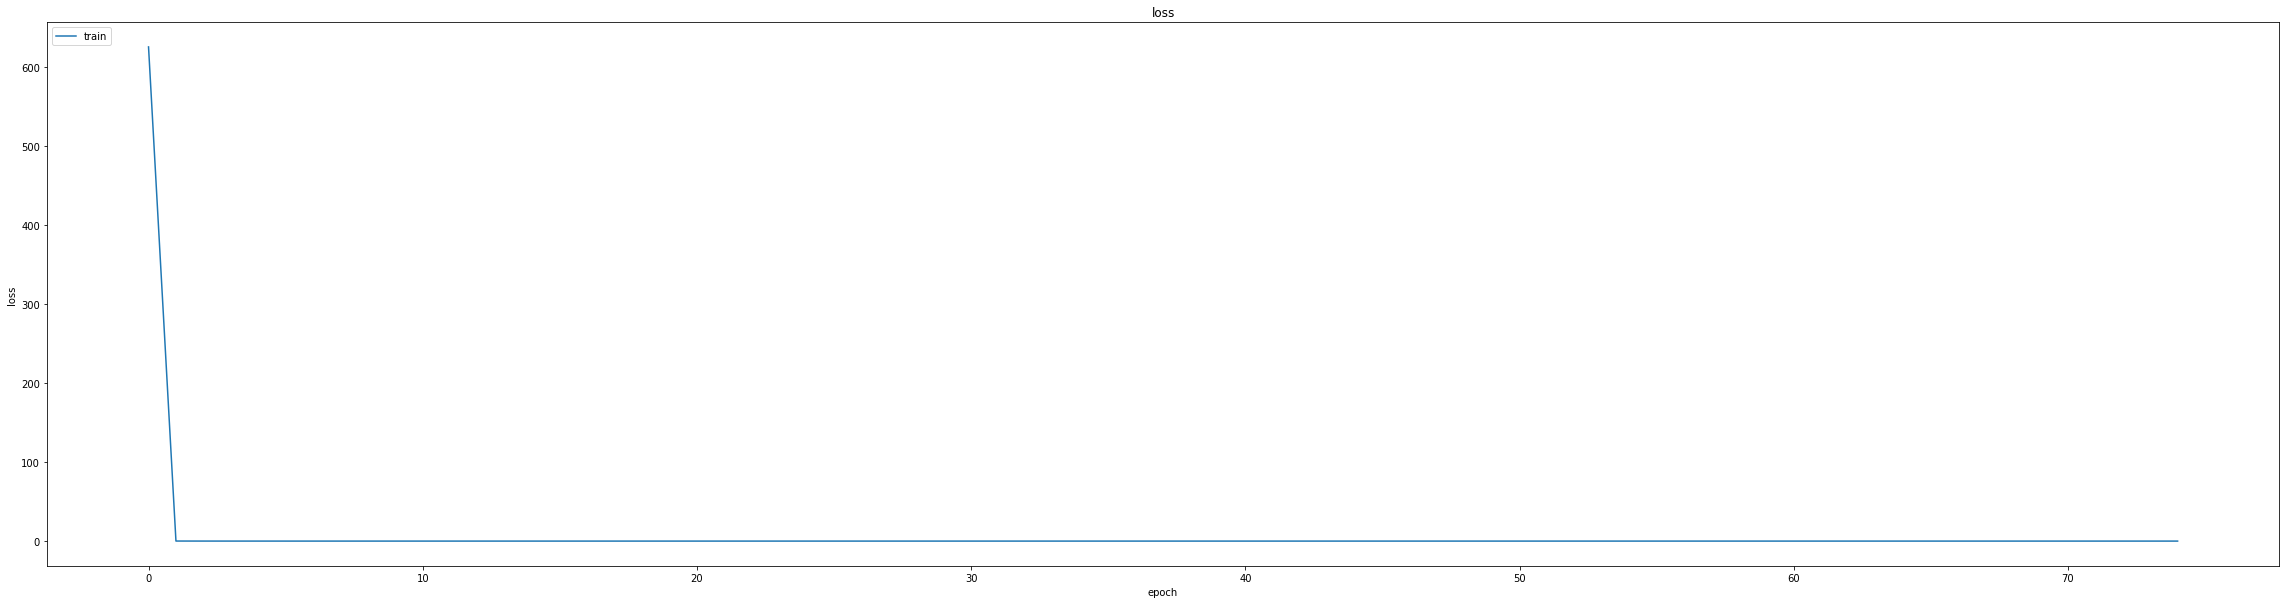

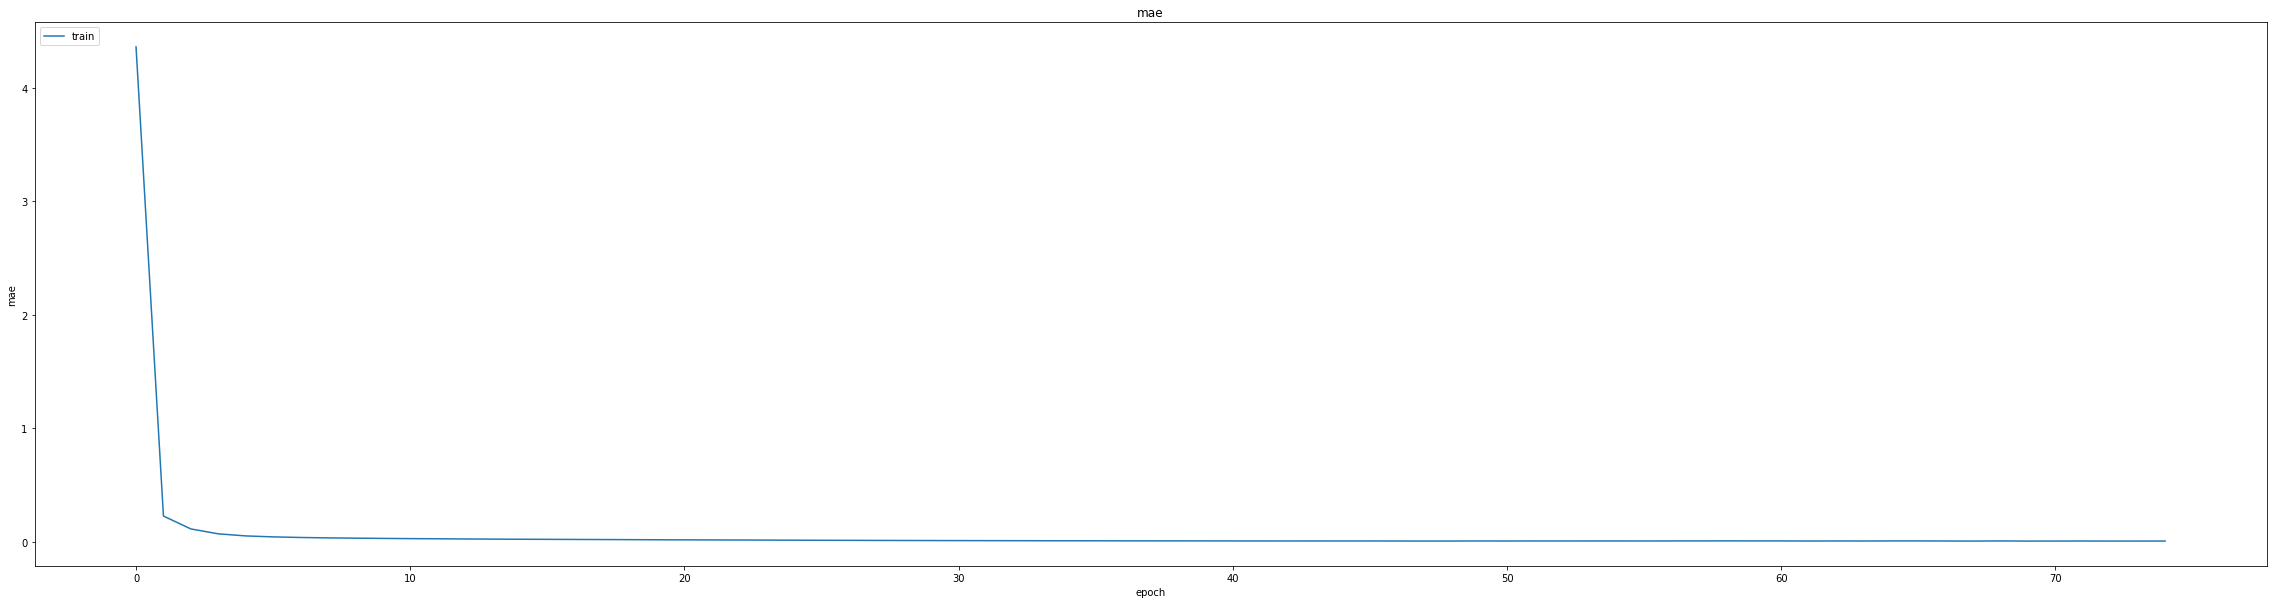

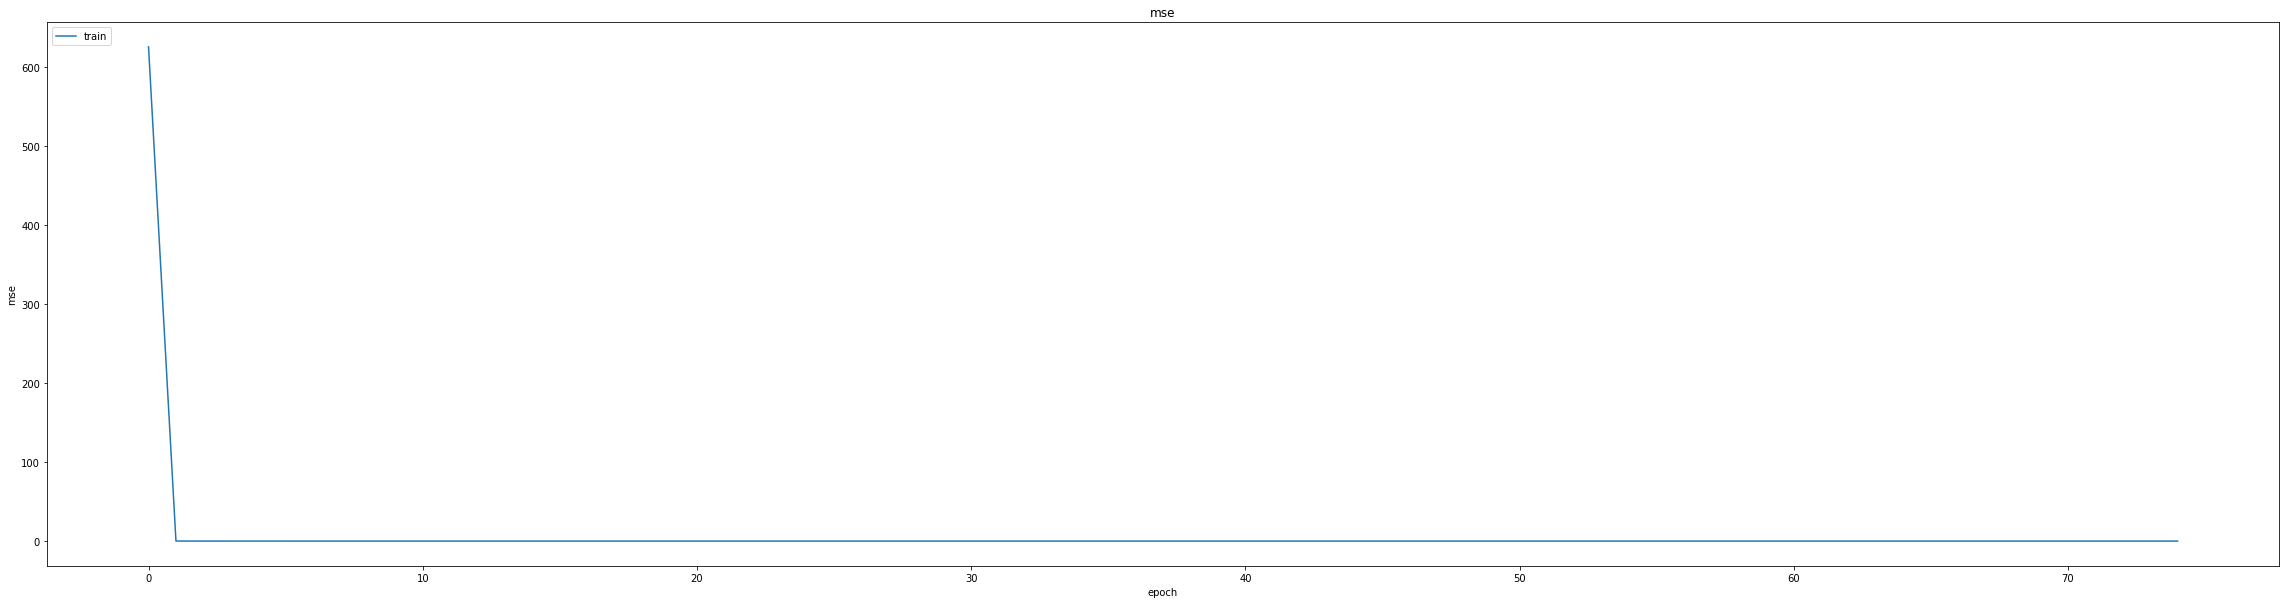

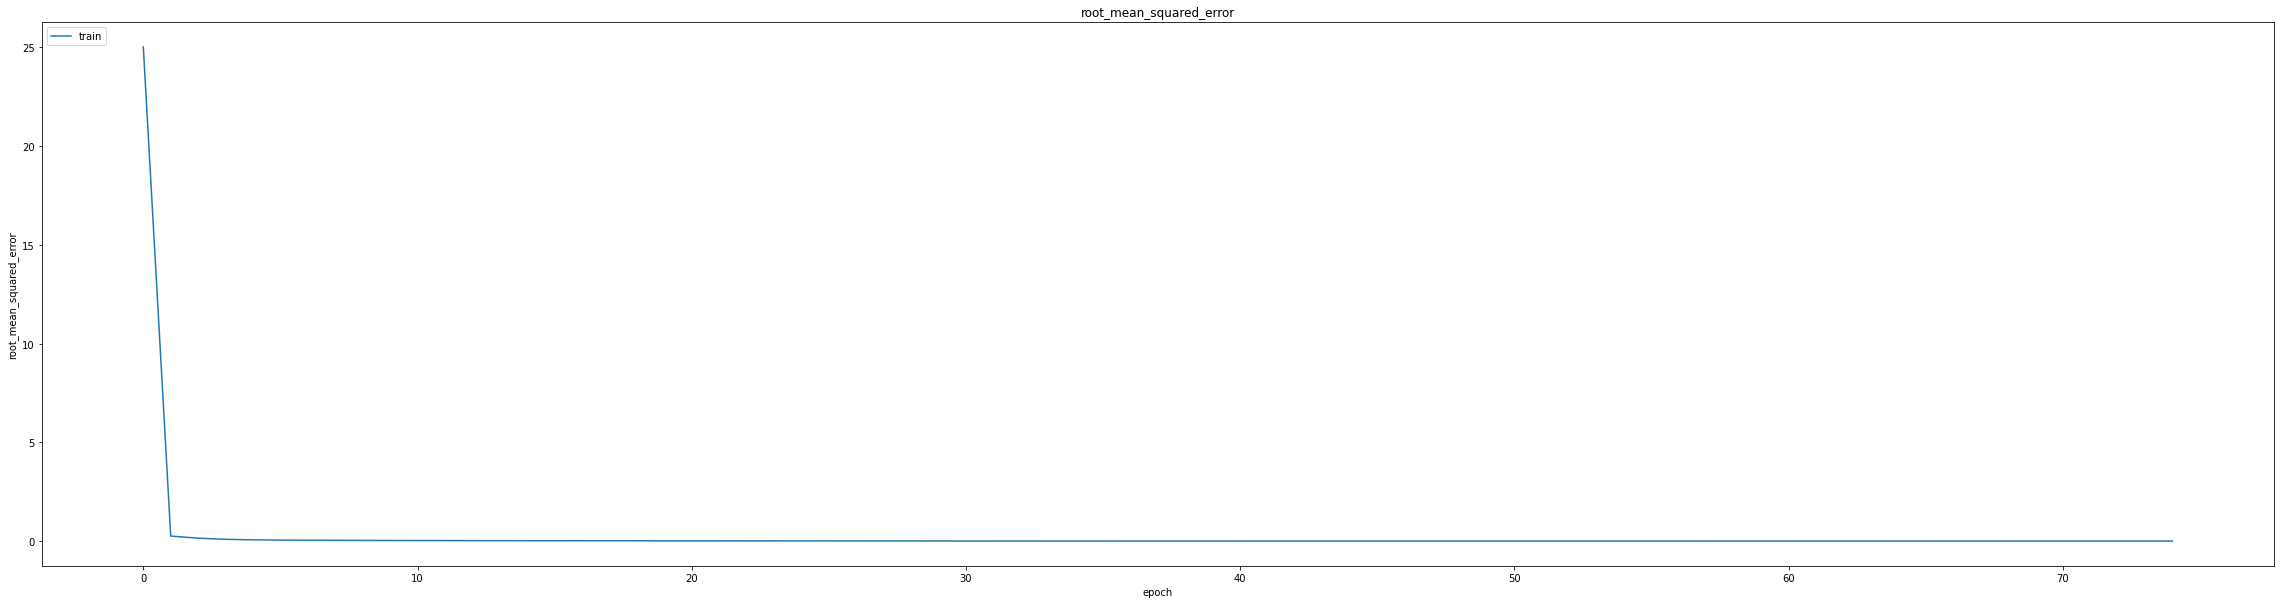

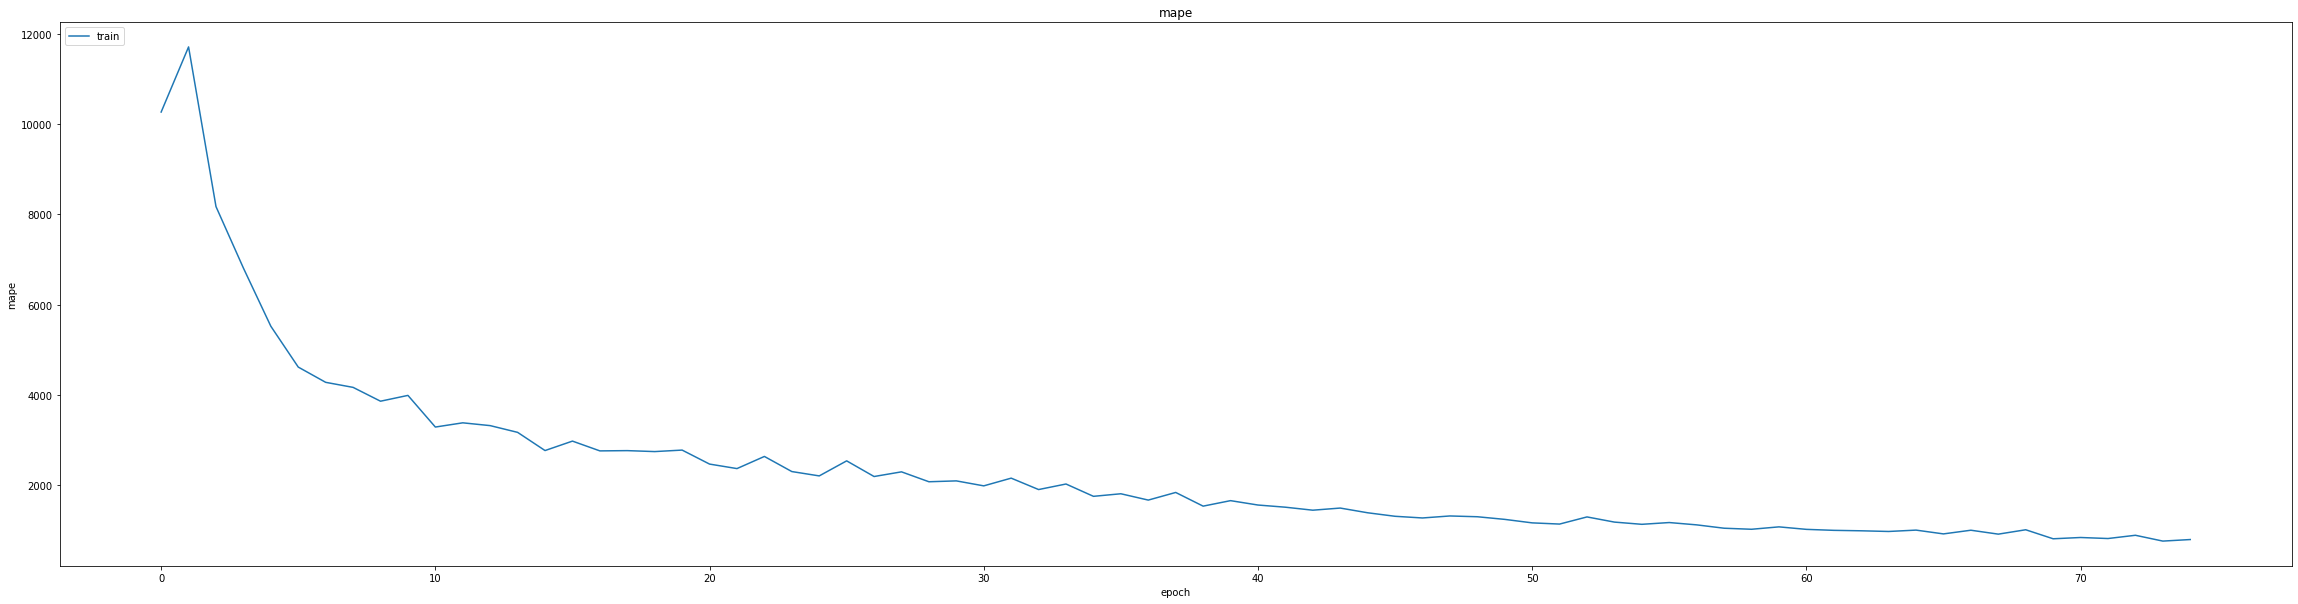

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.00426117517054081
0.006085601169615984
464/464 [==============================] - 4s 5ms/step
0.9993536376492095


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_BiLSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25


348/348 [==============================] - ETA: 0s - loss: 4.5097e-04 - mae: 0.0088 - mse: 4.5097e-04 - root_mean_squared_error: 0.0212 - mape: 1161.1898
Epoch 1: val_mse did not improve from 0.00004
348/348 [==============================] - 14s 20ms/step - loss: 4.5097e-04 - mae: 0.0088 - mse: 4.5097e-04 - root_mean_squared_error: 0.0212 - mape: 1161.1898 - val_loss: 4.1584e-05 - val_mae: 0.0048 - val_mse: 4.1584e-05 - val_root_mean_squared_error: 0.0064 - val_mape: 2383.4702 - lr: 0.0010
Epoch 2/25
345/348 [============================>.] - ETA: 0s - loss: 2.9184e-05 - mae: 0.0041 - mse: 2.9184e-05 - root_mean_squared_error: 0.0054 - mape: 648.8727
Epoch 2: val_mse did not improve from 0.00004
348/348 [==============================] - 6s 16ms/step - loss: 2.9251e-05 - mae: 0.0041 - mse: 2.9251e-05 - root_mean_squared_error: 0.0054 - mape: 643.4091 - val_loss: 7.0754e-05 - val_mae: 0.0070 - val_mse: 7.0754e-05 - val_root_mean_squared_error: 0.0084 - val_mape: 2942.7385 - lr: 0.0010


348/348 [==============================] - 28s 80ms/step - loss: 4.1036e-05 - mae: 0.0049 - mse: 4.1036e-05 - root_mean_squared_error: 0.0064 - mape: 602.3176 - val_loss: 3.1249e-05 - val_mae: 0.0038 - val_mse: 3.1249e-05 - val_root_mean_squared_error: 0.0056 - val_mape: 2030.5858 - lr: 8.1000e-04
Epoch 6/25
345/348 [============================>.] - ETA: 0s - loss: 4.2885e-05 - mae: 0.0050 - mse: 4.2885e-05 - root_mean_squared_error: 0.0065 - mape: 567.0579
Epoch 6: val_mse improved from 0.00003 to 0.00003, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 85ms/step - loss: 4.2751e-05 - mae: 0.0050 - mse: 4.2751e-05 - root_mean_squared_error: 0.0065 - mape: 562.2800 - val_loss: 2.8966e-05 - val_mae: 0.0036 - val_mse: 2.8966e-05 - val_root_mean_squared_error: 0.0054 - val_mape: 1904.1190 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/25
345/348 [============================>.] - ETA: 0s - loss: 3.9965e-05 - mae: 0.0048 - mse: 3.9965e-05 - root_mean_squared_error: 0.0063 - mape: 611.0054
Epoch 7: val_mse did not improve from 0.00003
348/348 [==============================] - 6s 16ms/step - loss: 4.0652e-05 - mae: 0.0049 - mse: 4.0652e-05 - root_mean_squared_error: 0.0064 - mape: 605.8677 - val_loss: 2.2495e-04 - val_mae: 0.0132 - val_mse: 2.2495e-04 - val_root_mean_squared_error: 0.0150 - val_mape: 1750.1173 - lr: 7.2900e-04
Epoch 8/25
346/348 [============================>.] - ETA: 0s - loss: 4.9490e-05 - mae: 0.0053 - mse: 4.9490e-05 - root_mean_squared_error: 0.0070 - mape: 57

348/348 [==============================] - 29s 82ms/step - loss: 3.2633e-05 - mae: 0.0044 - mse: 3.2633e-05 - root_mean_squared_error: 0.0057 - mape: 550.2472 - val_loss: 2.7464e-05 - val_mae: 0.0035 - val_mse: 2.7464e-05 - val_root_mean_squared_error: 0.0052 - val_mape: 1662.4979 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/25
345/348 [============================>.] - ETA: 0s - loss: 2.8484e-05 - mae: 0.0041 - mse: 2.8484e-05 - root_mean_squared_error: 0.0053 - mape: 570.1504
Epoch 13: val_mse improved from 0.00003 to 0.00003, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 83ms/step - loss: 2.8472e-05 - mae: 0.0041 - mse: 2.8472e-05 - root_mean_squared_error: 0.0053 - mape: 565.3469 - val_loss: 2.5491e-05 - val_mae: 0.0034 - val_mse: 2.5491e-05 - val_root_mean_squared_error: 0.0050 - val_mape: 1842.8826 - lr: 5.3144e-04
Epoch 14/25
347/348 [============================>.] - ETA: 0s - loss: 2.8972e-05 - mae: 0.0041 - mse: 2.8972e-05 - root_mean_squared_error: 0.0054 - mape: 511.7772
Epoch 14: val_mse did not improve from 0.00003
348/348 [==============================] - 6s 16ms/step - loss: 2.8943e-05 - mae: 0.0041 - mse: 2.8943e-05 - root_mean_squared_error: 0.0054 - mape: 510.4003 - val_loss: 1.0390e-04 - val_mae: 0.0092 - val_mse: 1.0390e-04 - val_root_mean_squared_error: 0.0102 - val_mape: 1523.1193 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/25
348/348 [==============================] - ETA: 0s - loss: 2.8273e-05 - mae: 0.0041 - mse: 2.8273e-05 - root_mean_squared_error: 0.0053 - mape

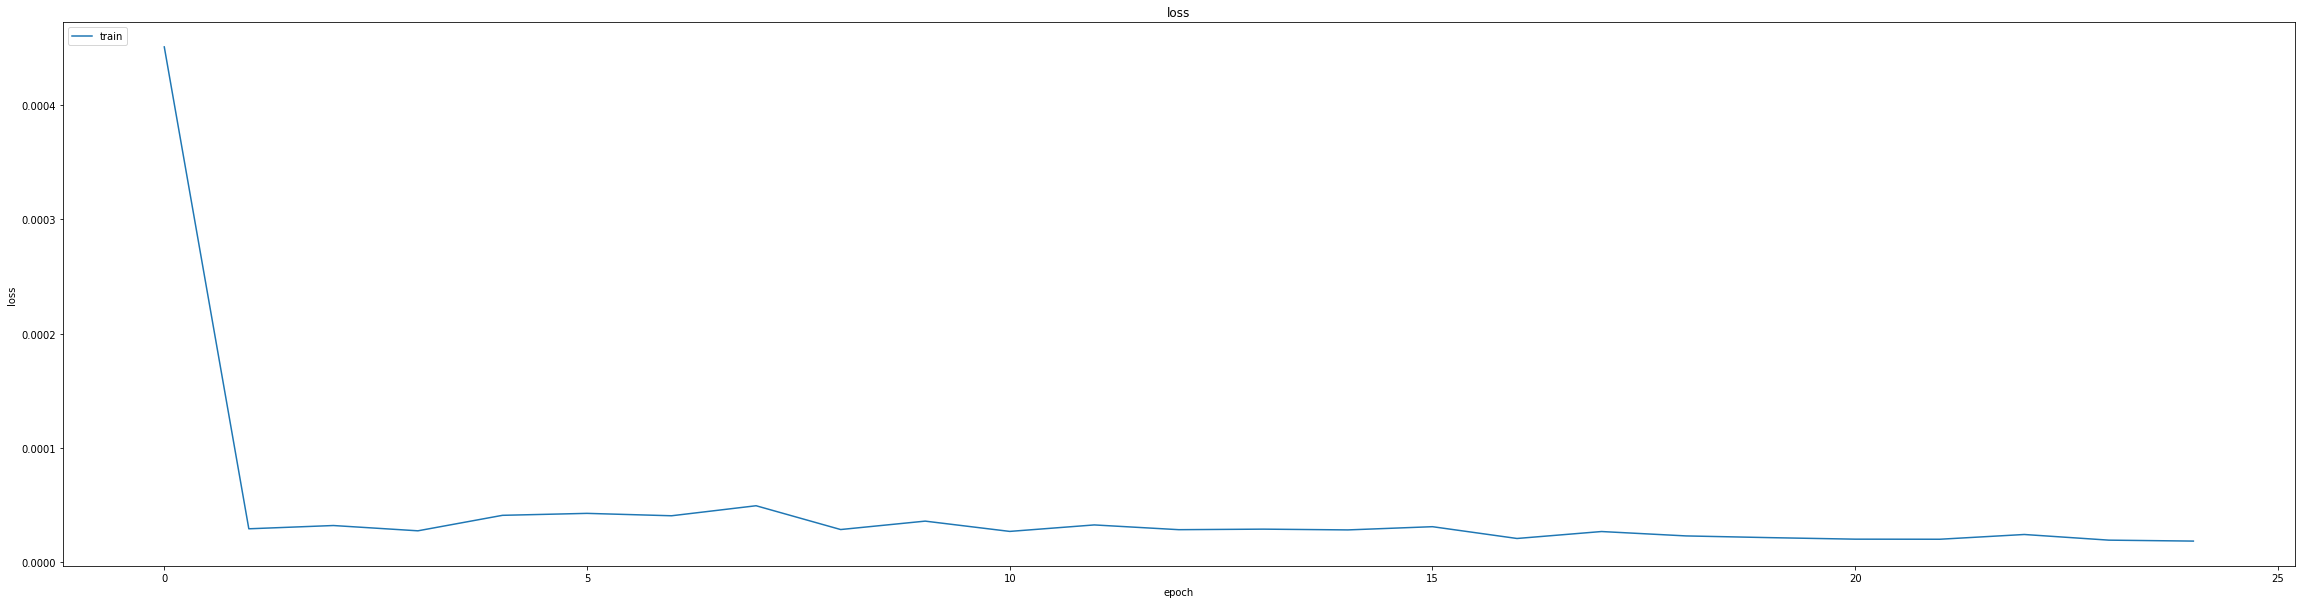

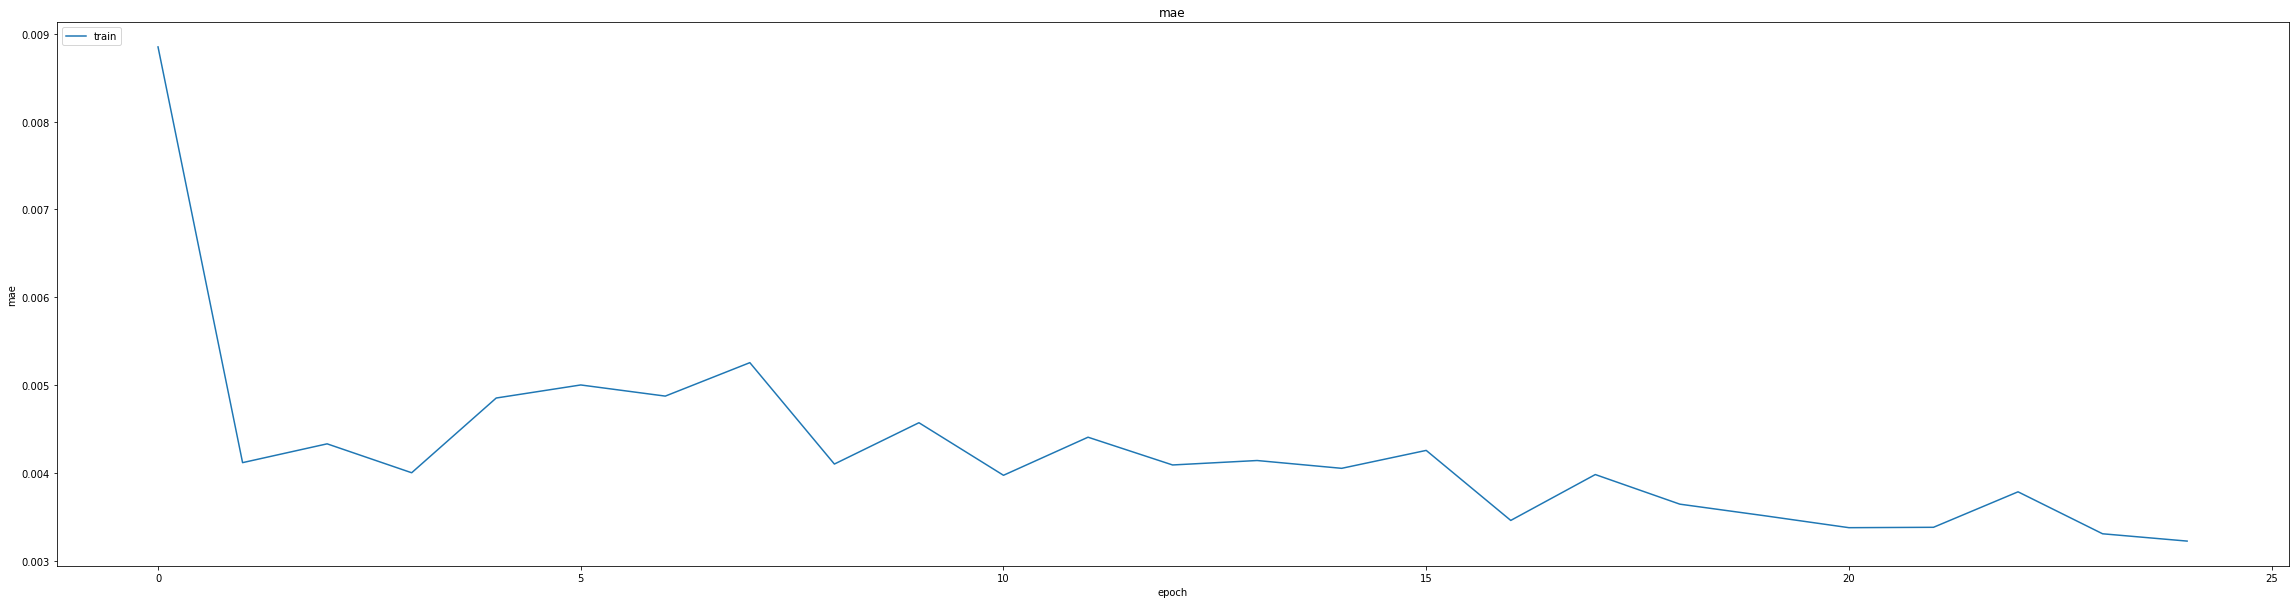

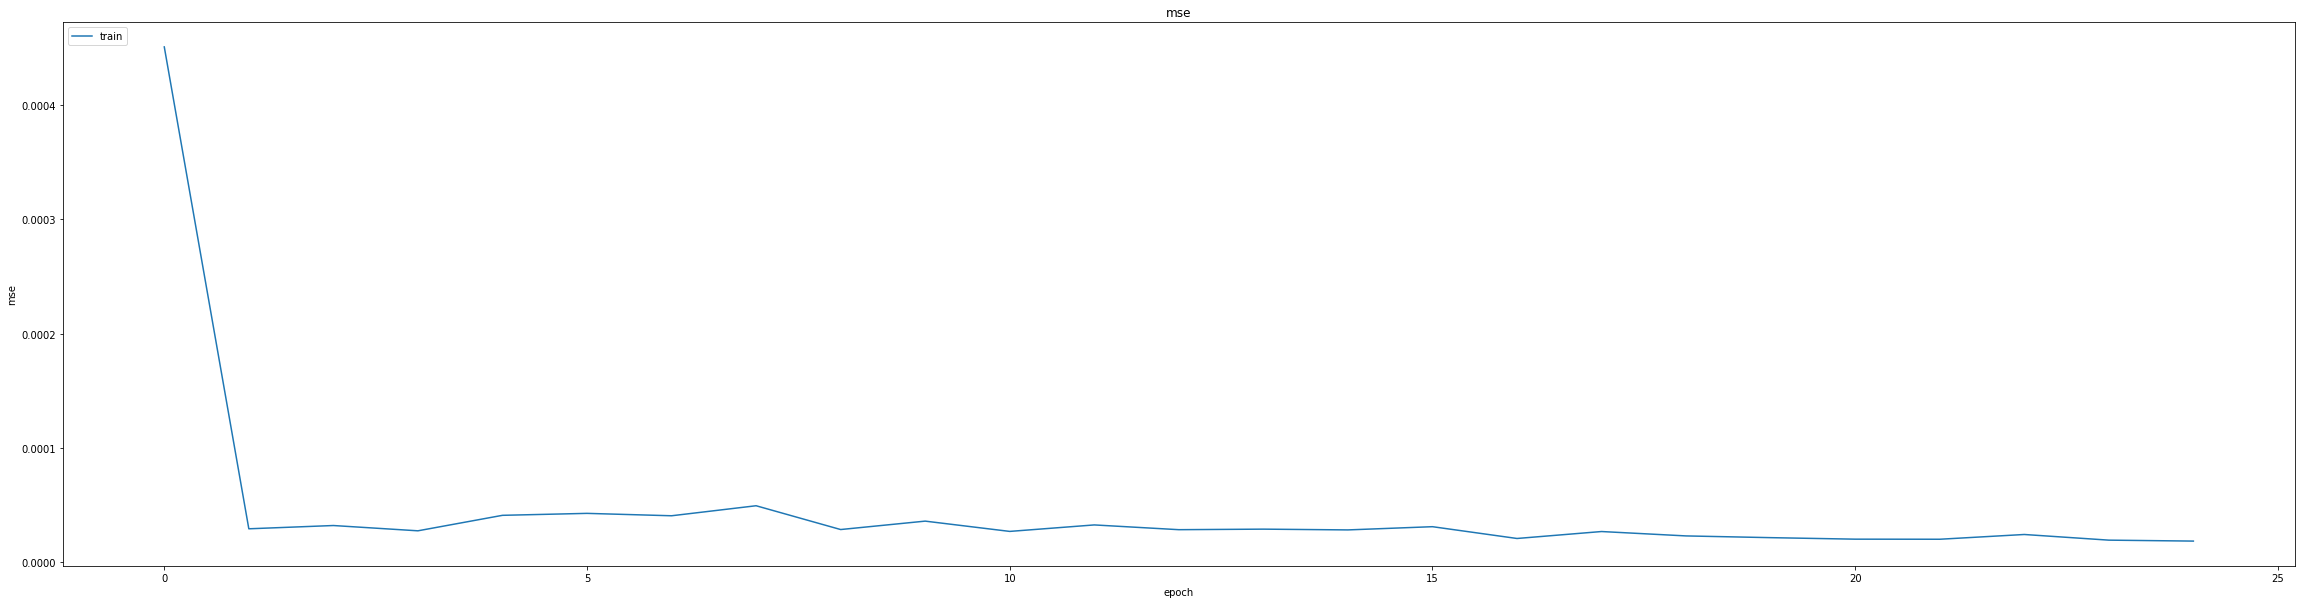

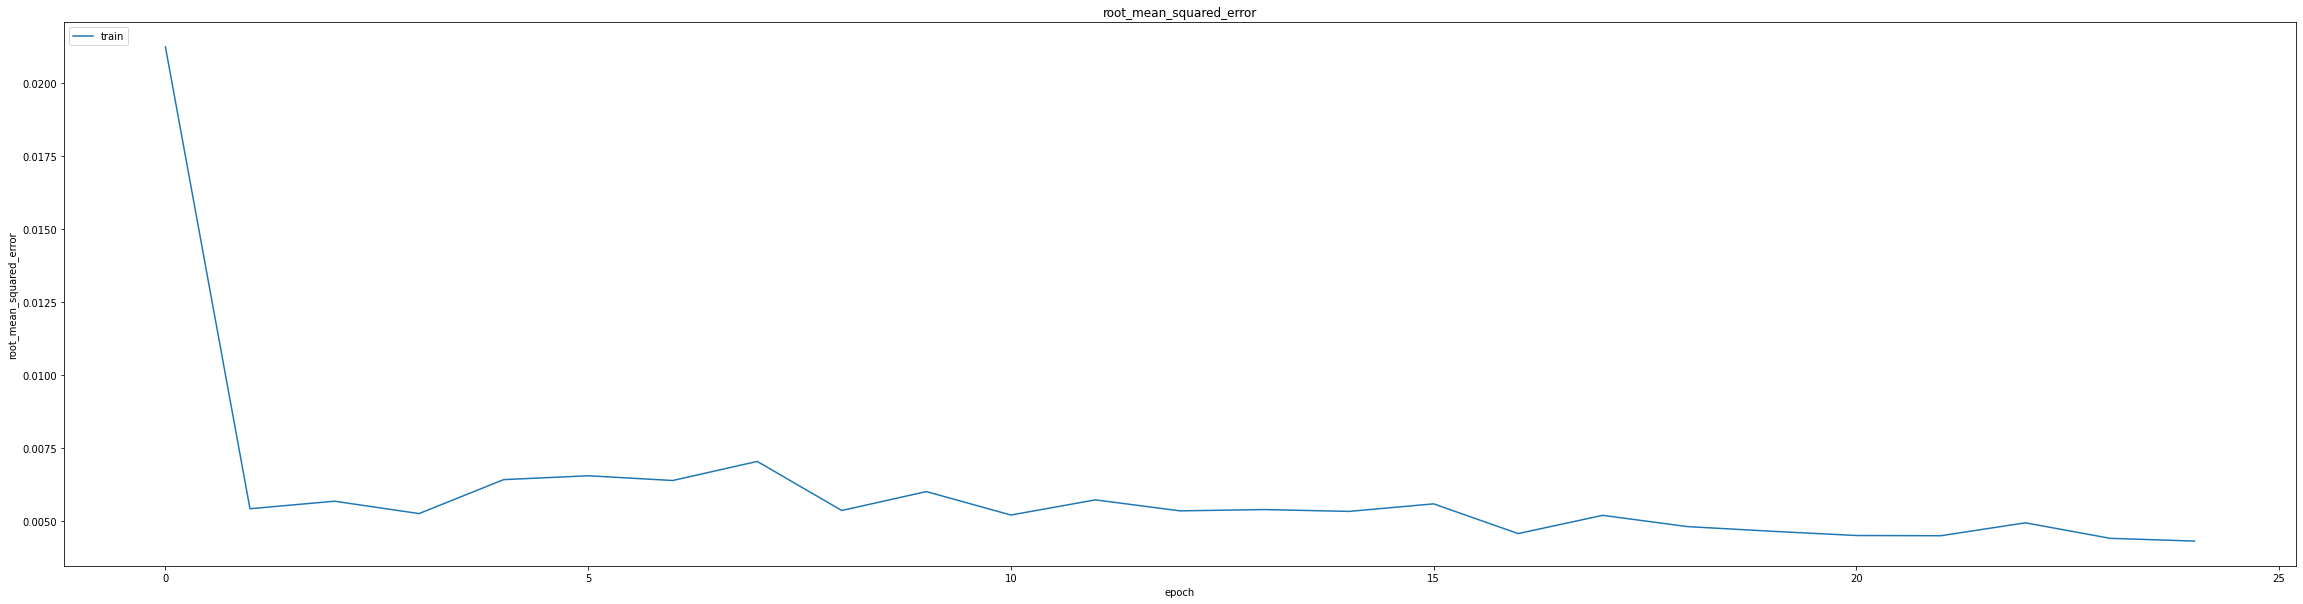

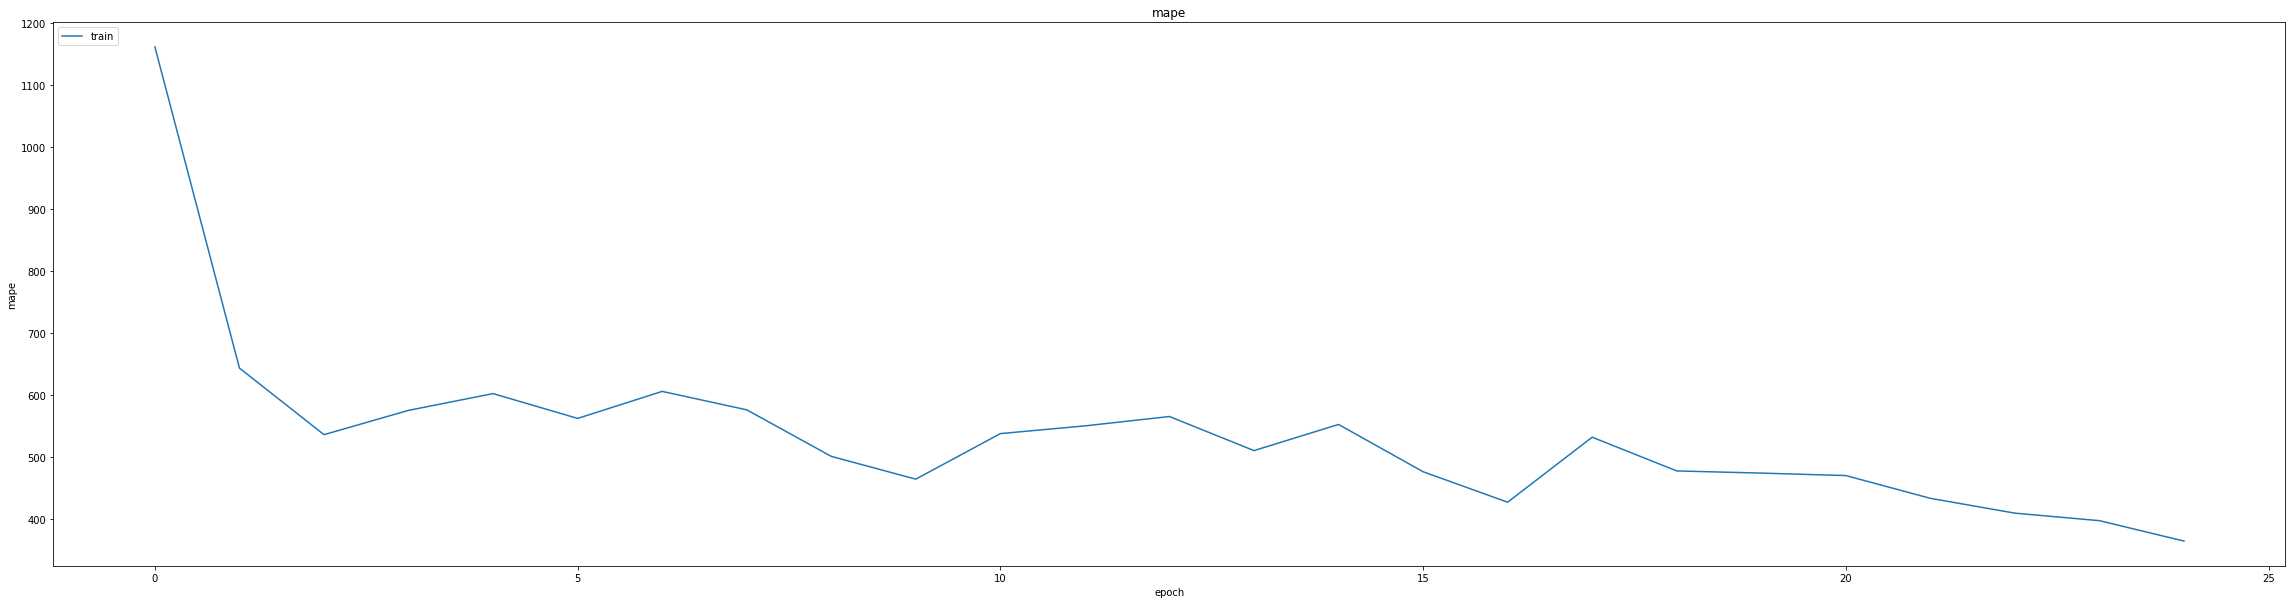

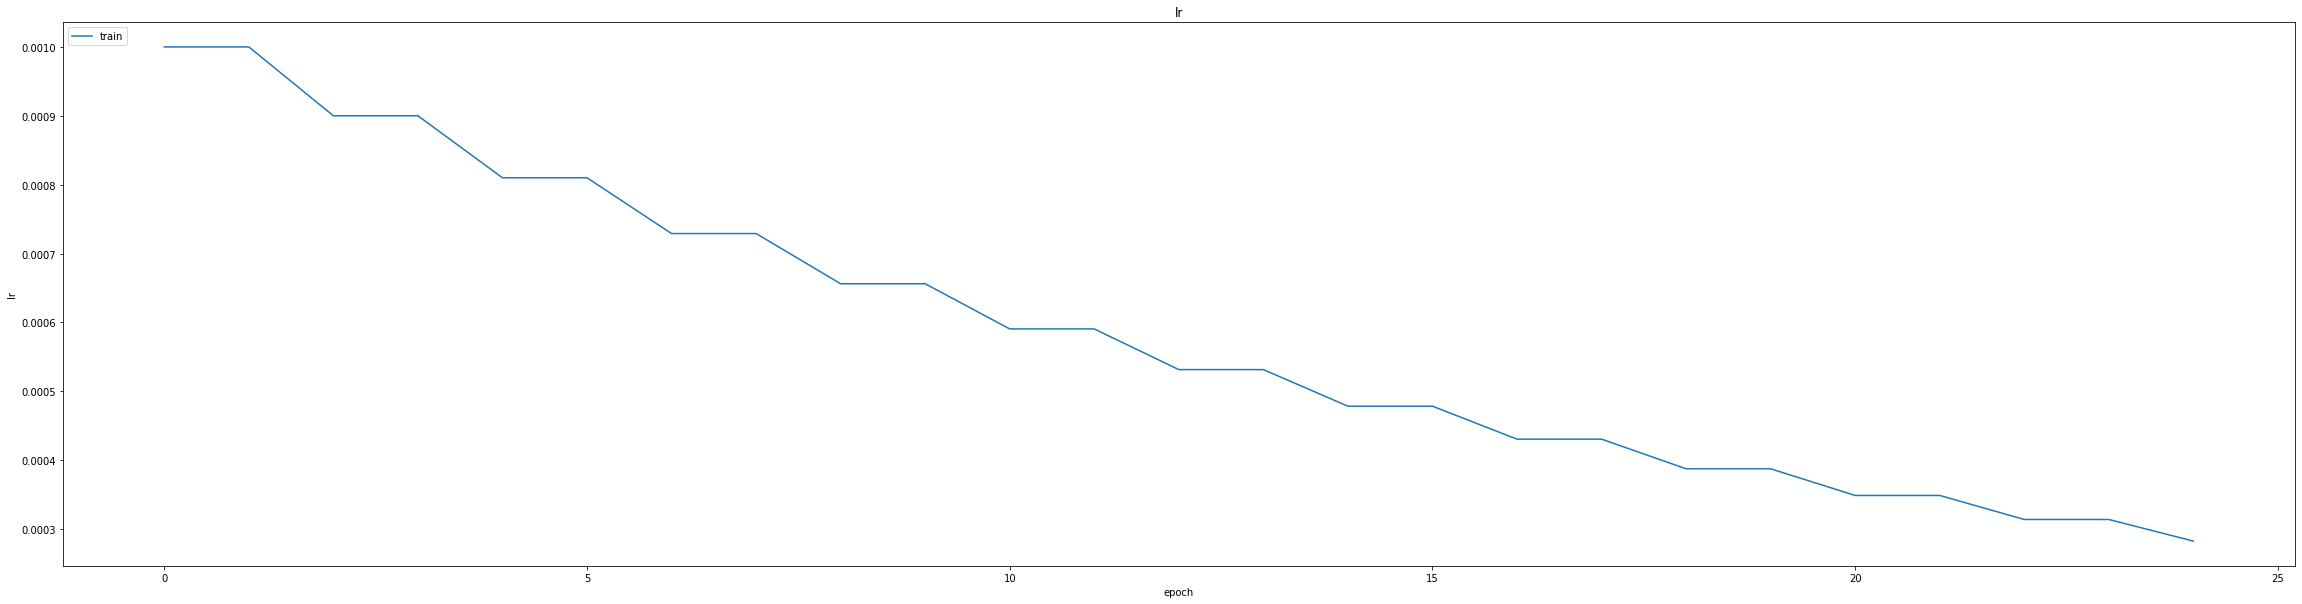

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.0033613964915275574
0.005048894323408604
464/464 [==============================] - 4s 5ms/step
0.9995320100852564


464/464 [==============================] - 2s 5ms/step


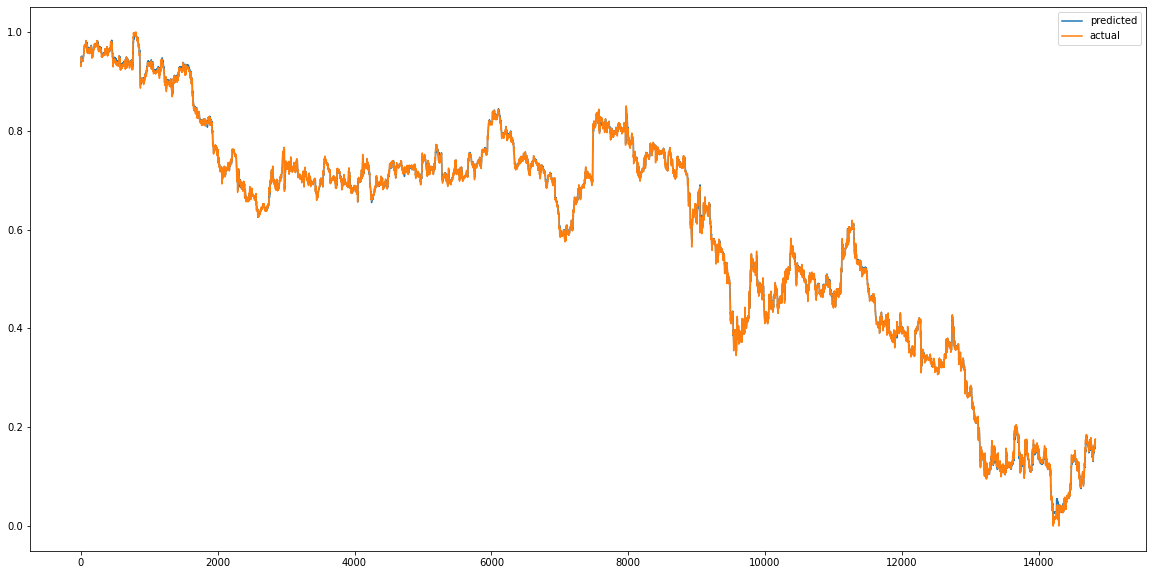

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_BiLSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


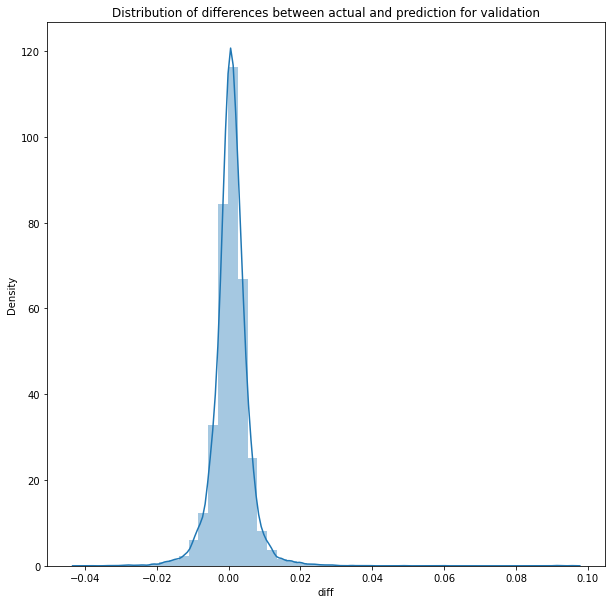

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 2s 5ms/step


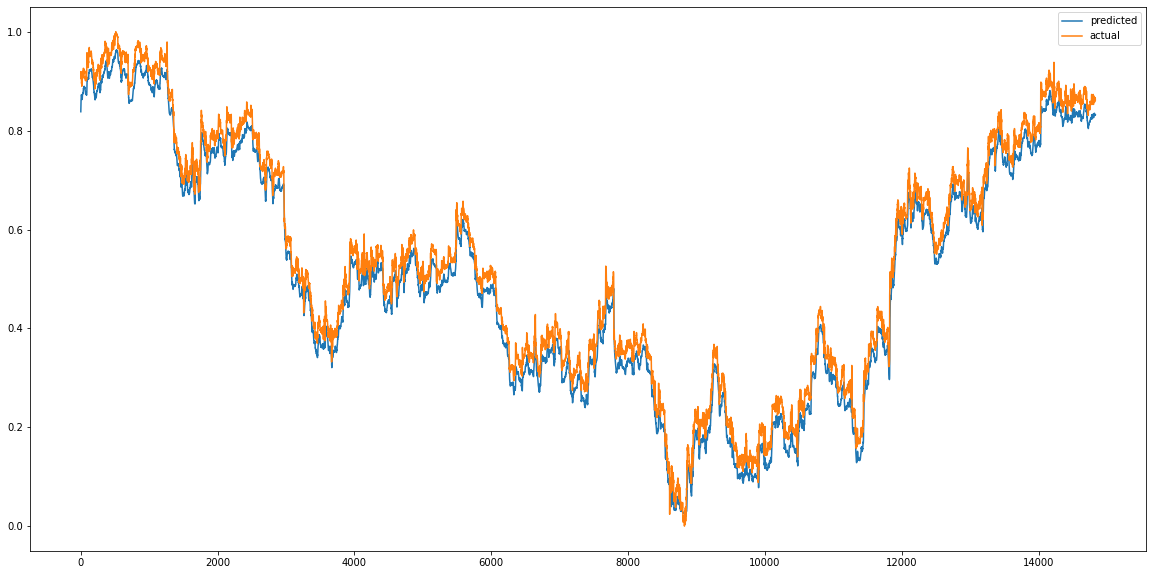

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


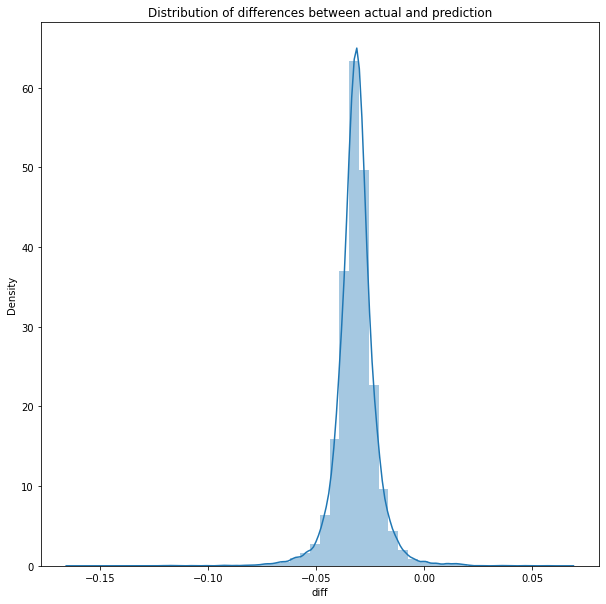

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0010774578090067687
RMSE :  0.0328246524582785
MAE :  0.031627154485551756
464/464 [==============================] - 2s 5ms/step
R2_Score  : 0.982157487145022


count    14830.000000
mean        -0.031485
std          0.009281
min         -0.161634
25%         -0.035704
50%         -0.031471
75%         -0.027318
max          0.065020
Name: diff, dtype: float64

**CNN_LSTM_MODEL**

In [ ]:
model= thesis.CNN_LSTM_Model(x_train)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 lstm_6 (LSTM)               (None, 24, 256)           328704    
                                                                 
 dropout_3 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_7 (LSTM)               (None, 64)                82176     
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
345/348 [============================>.] - ETA: 0s - loss: 445.8615 - mae: 3.9219 - mse: 445.8615 - root_mean_squared_error: 21.1154 - mape: 3878307.2500
Epoch 1: val_mse improved from inf to 0.10292, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 16s 37ms/step - loss: 442.0984 - mae: 3.8910 - mse: 442.0984 - root_mean_squared_error: 21.0261 - mape: 3845565.2500 - val_loss: 0.1029 - val_mae: 0.2407 - val_mse: 0.1029 - val_root_mean_squared_error: 0.3208 - val_mape: 55206.1328
Epoch 2/75
347/348 [============================>.] - ETA: 0s - loss: 0.0817 - mae: 0.2149 - mse: 0.0817 - root_mean_squared_error: 0.2858 - mape: 15132.1338
Epoch 2: val_mse improved from 0.10292 to 0.05755, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 37ms/step - loss: 0.0817 - mae: 0.2149 - mse: 0.0817 - root_mean_squared_error: 0.2858 - mape: 15091.5752 - val_loss: 0.0575 - val_mae: 0.1966 - val_mse: 0.0575 - val_root_mean_squared_error: 0.2399 - val_mape: 41190.8672
Epoch 3/75
346/348 [============================>.] - ETA: 0s - loss: 0.0669 - mae: 0.2152 - mse: 0.0669 - root_mean_squared_error: 0.2586 - mape: 13097.3232
Epoch 3: val_mse improved from 0.05755 to 0.05665, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 19s 55ms/step - loss: 0.0669 - mae: 0.2152 - mse: 0.0669 - root_mean_squared_error: 0.2586 - mape: 13024.7773 - val_loss: 0.0567 - val_mae: 0.2021 - val_mse: 0.0567 - val_root_mean_squared_error: 0.2380 - val_mape: 38130.5859
Epoch 4/75
345/348 [============================>.] - ETA: 0s - loss: 0.0579 - mae: 0.2042 - mse: 0.0579 - root_mean_squared_error: 0.2406 - mape: 11870.9043
Epoch 4: val_mse improved from 0.05665 to 0.04527, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 0.0579 - mae: 0.2041 - mse: 0.0579 - root_mean_squared_error: 0.2405 - mape: 11771.3086 - val_loss: 0.0453 - val_mae: 0.1808 - val_mse: 0.0453 - val_root_mean_squared_error: 0.2128 - val_mape: 33389.7109
Epoch 5/75
345/348 [============================>.] - ETA: 0s - loss: 0.0474 - mae: 0.1803 - mse: 0.0474 - root_mean_squared_error: 0.2176 - mape: 11296.4277
Epoch 5: val_mse improved from 0.04527 to 0.03816, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 0.0473 - mae: 0.1801 - mse: 0.0473 - root_mean_squared_error: 0.2175 - mape: 11201.5762 - val_loss: 0.0382 - val_mae: 0.1631 - val_mse: 0.0382 - val_root_mean_squared_error: 0.1953 - val_mape: 31734.0547
Epoch 6/75
347/348 [============================>.] - ETA: 0s - loss: 0.0394 - mae: 0.1617 - mse: 0.0394 - root_mean_squared_error: 0.1985 - mape: 10312.1865
Epoch 6: val_mse improved from 0.03816 to 0.03144, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 0.0394 - mae: 0.1616 - mse: 0.0394 - root_mean_squared_error: 0.1984 - mape: 10284.5664 - val_loss: 0.0314 - val_mae: 0.1448 - val_mse: 0.0314 - val_root_mean_squared_error: 0.1773 - val_mape: 29731.2969
Epoch 7/75
348/348 [==============================] - ETA: 0s - loss: 0.0302 - mae: 0.1398 - mse: 0.0302 - root_mean_squared_error: 0.1737 - mape: 9743.5781
Epoch 7: val_mse improved from 0.03144 to 0.02393, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 0.0302 - mae: 0.1398 - mse: 0.0302 - root_mean_squared_error: 0.1737 - mape: 9743.5781 - val_loss: 0.0239 - val_mae: 0.1210 - val_mse: 0.0239 - val_root_mean_squared_error: 0.1547 - val_mape: 27004.1348
Epoch 8/75
346/348 [============================>.] - ETA: 0s - loss: 0.0216 - mae: 0.1175 - mse: 0.0216 - root_mean_squared_error: 0.1471 - mape: 8950.9238
Epoch 8: val_mse improved from 0.02393 to 0.01724, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 34ms/step - loss: 0.0216 - mae: 0.1174 - mse: 0.0216 - root_mean_squared_error: 0.1470 - mape: 8901.3379 - val_loss: 0.0172 - val_mae: 0.0978 - val_mse: 0.0172 - val_root_mean_squared_error: 0.1313 - val_mape: 24384.4297
Epoch 9/75
346/348 [============================>.] - ETA: 0s - loss: 0.0151 - mae: 0.0977 - mse: 0.0151 - root_mean_squared_error: 0.1230 - mape: 8074.8540
Epoch 9: val_mse improved from 0.01724 to 0.01265, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 32ms/step - loss: 0.0151 - mae: 0.0977 - mse: 0.0151 - root_mean_squared_error: 0.1230 - mape: 8030.1318 - val_loss: 0.0127 - val_mae: 0.0844 - val_mse: 0.0127 - val_root_mean_squared_error: 0.1125 - val_mape: 21999.8379
Epoch 10/75
344/348 [============================>.] - ETA: 0s - loss: 0.0105 - mae: 0.0793 - mse: 0.0105 - root_mean_squared_error: 0.1023 - mape: 7311.6401
Epoch 10: val_mse improved from 0.01265 to 0.01030, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 35ms/step - loss: 0.0104 - mae: 0.0792 - mse: 0.0104 - root_mean_squared_error: 0.1021 - mape: 7229.4229 - val_loss: 0.0103 - val_mae: 0.0791 - val_mse: 0.0103 - val_root_mean_squared_error: 0.1015 - val_mape: 20184.1641
Epoch 11/75
343/348 [============================>.] - ETA: 0s - loss: 0.0071 - mae: 0.0632 - mse: 0.0071 - root_mean_squared_error: 0.0842 - mape: 6460.2681
Epoch 11: val_mse improved from 0.01030 to 0.00769, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 33ms/step - loss: 0.0071 - mae: 0.0631 - mse: 0.0071 - root_mean_squared_error: 0.0841 - mape: 6368.9341 - val_loss: 0.0077 - val_mae: 0.0689 - val_mse: 0.0077 - val_root_mean_squared_error: 0.0877 - val_mape: 18042.7383
Epoch 12/75
344/348 [============================>.] - ETA: 0s - loss: 0.0050 - mae: 0.0532 - mse: 0.0050 - root_mean_squared_error: 0.0710 - mape: 5923.9805
Epoch 12: val_mse improved from 0.00769 to 0.00579, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 35ms/step - loss: 0.0050 - mae: 0.0531 - mse: 0.0050 - root_mean_squared_error: 0.0709 - mape: 5857.1558 - val_loss: 0.0058 - val_mae: 0.0616 - val_mse: 0.0058 - val_root_mean_squared_error: 0.0761 - val_mape: 15978.1660
Epoch 13/75
344/348 [============================>.] - ETA: 0s - loss: 0.0037 - mae: 0.0457 - mse: 0.0037 - root_mean_squared_error: 0.0606 - mape: 5426.1089
Epoch 13: val_mse improved from 0.00579 to 0.00453, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 35ms/step - loss: 0.0037 - mae: 0.0456 - mse: 0.0037 - root_mean_squared_error: 0.0605 - mape: 5364.8965 - val_loss: 0.0045 - val_mae: 0.0561 - val_mse: 0.0045 - val_root_mean_squared_error: 0.0673 - val_mape: 14389.7578
Epoch 14/75
347/348 [============================>.] - ETA: 0s - loss: 0.0028 - mae: 0.0406 - mse: 0.0028 - root_mean_squared_error: 0.0533 - mape: 4726.4624
Epoch 14: val_mse improved from 0.00453 to 0.00346, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 0.0028 - mae: 0.0406 - mse: 0.0028 - root_mean_squared_error: 0.0533 - mape: 4713.7549 - val_loss: 0.0035 - val_mae: 0.0488 - val_mse: 0.0035 - val_root_mean_squared_error: 0.0588 - val_mape: 13074.3057
Epoch 15/75
344/348 [============================>.] - ETA: 0s - loss: 0.0023 - mae: 0.0371 - mse: 0.0023 - root_mean_squared_error: 0.0483 - mape: 4069.1211
Epoch 15: val_mse improved from 0.00346 to 0.00298, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 33ms/step - loss: 0.0023 - mae: 0.0371 - mse: 0.0023 - root_mean_squared_error: 0.0483 - mape: 4023.2146 - val_loss: 0.0030 - val_mae: 0.0461 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0546 - val_mape: 12066.7354
Epoch 16/75
347/348 [============================>.] - ETA: 0s - loss: 0.0020 - mae: 0.0342 - mse: 0.0020 - root_mean_squared_error: 0.0445 - mape: 4020.4644
Epoch 16: val_mse improved from 0.00298 to 0.00273, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 35ms/step - loss: 0.0020 - mae: 0.0342 - mse: 0.0020 - root_mean_squared_error: 0.0445 - mape: 4009.6584 - val_loss: 0.0027 - val_mae: 0.0449 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0523 - val_mape: 11281.7305
Epoch 17/75
347/348 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0317 - mse: 0.0017 - root_mean_squared_error: 0.0410 - mape: 4021.9233
Epoch 17: val_mse improved from 0.00273 to 0.00217, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 33ms/step - loss: 0.0017 - mae: 0.0317 - mse: 0.0017 - root_mean_squared_error: 0.0410 - mape: 4011.1072 - val_loss: 0.0022 - val_mae: 0.0400 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0466 - val_mape: 10542.2969
Epoch 18/75
345/348 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0283 - mse: 0.0013 - root_mean_squared_error: 0.0365 - mape: 3531.5391
Epoch 18: val_mse improved from 0.00217 to 0.00139, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 35ms/step - loss: 0.0013 - mae: 0.0282 - mse: 0.0013 - root_mean_squared_error: 0.0365 - mape: 3501.7805 - val_loss: 0.0014 - val_mae: 0.0310 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0373 - val_mape: 9723.9600
Epoch 19/75
345/348 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0245 - mse: 0.0010 - root_mean_squared_error: 0.0317 - mape: 3233.4304
Epoch 19: val_mse did not improve from 0.00139
348/348 [==============================] - 4s 11ms/step - loss: 0.0010 - mae: 0.0245 - mse: 0.0010 - root_mean_squared_error: 0.0317 - mape: 3206.1846 - val_loss: 0.0015 - val_mae: 0.0333 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0382 - val_mape: 8975.1660
Epoch 20/75
348/348 [==============================] - ETA: 0s - loss: 8.1971e-04 - mae: 0.0222 - mse: 8.1971e-04 - root_mean_squared_error: 0.0286 - mape: 3150.8245
Epoch 20: val_mse improved from 0.00139 to 0.00119, saving model to /content/drive/MyDrive/model

348/348 [==============================] - 12s 34ms/step - loss: 8.1971e-04 - mae: 0.0222 - mse: 8.1971e-04 - root_mean_squared_error: 0.0286 - mape: 3150.8245 - val_loss: 0.0012 - val_mae: 0.0301 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0345 - val_mape: 8364.9268
Epoch 21/75
344/348 [============================>.] - ETA: 0s - loss: 6.8290e-04 - mae: 0.0202 - mse: 6.8290e-04 - root_mean_squared_error: 0.0261 - mape: 2760.2949
Epoch 21: val_mse improved from 0.00119 to 0.00087, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 34ms/step - loss: 6.8267e-04 - mae: 0.0202 - mse: 6.8267e-04 - root_mean_squared_error: 0.0261 - mape: 2729.1375 - val_loss: 8.7497e-04 - val_mae: 0.0257 - val_mse: 8.7497e-04 - val_root_mean_squared_error: 0.0296 - val_mape: 7900.8320
Epoch 22/75
348/348 [==============================] - ETA: 0s - loss: 5.9152e-04 - mae: 0.0188 - mse: 5.9152e-04 - root_mean_squared_error: 0.0243 - mape: 2701.8235
Epoch 22: val_mse improved from 0.00087 to 0.00084, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 33ms/step - loss: 5.9152e-04 - mae: 0.0188 - mse: 5.9152e-04 - root_mean_squared_error: 0.0243 - mape: 2701.8235 - val_loss: 8.3806e-04 - val_mae: 0.0256 - val_mse: 8.3806e-04 - val_root_mean_squared_error: 0.0289 - val_mape: 7550.2998
Epoch 23/75
346/348 [============================>.] - ETA: 0s - loss: 5.4588e-04 - mae: 0.0180 - mse: 5.4588e-04 - root_mean_squared_error: 0.0234 - mape: 2791.3411
Epoch 23: val_mse improved from 0.00084 to 0.00066, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 35ms/step - loss: 5.4558e-04 - mae: 0.0180 - mse: 5.4558e-04 - root_mean_squared_error: 0.0234 - mape: 2775.8237 - val_loss: 6.6118e-04 - val_mae: 0.0224 - val_mse: 6.6118e-04 - val_root_mean_squared_error: 0.0257 - val_mape: 7290.3975
Epoch 24/75
346/348 [============================>.] - ETA: 0s - loss: 4.9444e-04 - mae: 0.0172 - mse: 4.9444e-04 - root_mean_squared_error: 0.0222 - mape: 2381.1316
Epoch 24: val_mse improved from 0.00066 to 0.00061, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 34ms/step - loss: 4.9421e-04 - mae: 0.0172 - mse: 4.9421e-04 - root_mean_squared_error: 0.0222 - mape: 2367.8955 - val_loss: 6.0986e-04 - val_mae: 0.0215 - val_mse: 6.0986e-04 - val_root_mean_squared_error: 0.0247 - val_mape: 7060.2778
Epoch 25/75
345/348 [============================>.] - ETA: 0s - loss: 4.5633e-04 - mae: 0.0165 - mse: 4.5633e-04 - root_mean_squared_error: 0.0214 - mape: 2271.8438
Epoch 25: val_mse improved from 0.00061 to 0.00049, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 33ms/step - loss: 4.5616e-04 - mae: 0.0165 - mse: 4.5616e-04 - root_mean_squared_error: 0.0214 - mape: 2252.7012 - val_loss: 4.9140e-04 - val_mae: 0.0188 - val_mse: 4.9140e-04 - val_root_mean_squared_error: 0.0222 - val_mape: 6849.3418
Epoch 26/75
345/348 [============================>.] - ETA: 0s - loss: 4.1550e-04 - mae: 0.0157 - mse: 4.1550e-04 - root_mean_squared_error: 0.0204 - mape: 2446.7686
Epoch 26: val_mse did not improve from 0.00049
348/348 [==============================] - 4s 12ms/step - loss: 4.1516e-04 - mae: 0.0157 - mse: 4.1516e-04 - root_mean_squared_error: 0.0204 - mape: 2426.1511 - val_loss: 5.3563e-04 - val_mae: 0.0201 - val_mse: 5.3563e-04 - val_root_mean_squared_error: 0.0231 - val_mape: 6691.5059
Epoch 27/75
346/348 [============================>.] - ETA: 0s - loss: 3.8844e-04 - mae: 0.0152 - mse: 3.8844e-04 - root_mean_squared_error: 0.0197 - mape: 2207.2512
Epoch 27: val_mse improved from 0.00049 to 0.00047, savi

348/348 [==============================] - 13s 36ms/step - loss: 3.8844e-04 - mae: 0.0152 - mse: 3.8844e-04 - root_mean_squared_error: 0.0197 - mape: 2194.9783 - val_loss: 4.6942e-04 - val_mae: 0.0190 - val_mse: 4.6942e-04 - val_root_mean_squared_error: 0.0217 - val_mape: 6479.3706
Epoch 28/75
346/348 [============================>.] - ETA: 0s - loss: 3.4804e-04 - mae: 0.0144 - mse: 3.4804e-04 - root_mean_squared_error: 0.0187 - mape: 2185.7468
Epoch 28: val_mse did not improve from 0.00047
348/348 [==============================] - 4s 11ms/step - loss: 3.4854e-04 - mae: 0.0144 - mse: 3.4854e-04 - root_mean_squared_error: 0.0187 - mape: 2173.5962 - val_loss: 5.4796e-04 - val_mae: 0.0211 - val_mse: 5.4796e-04 - val_root_mean_squared_error: 0.0234 - val_mape: 6294.3750
Epoch 29/75
345/348 [============================>.] - ETA: 0s - loss: 3.2085e-04 - mae: 0.0138 - mse: 3.2085e-04 - root_mean_squared_error: 0.0179 - mape: 2165.5344
Epoch 29: val_mse improved from 0.00047 to 0.00033, savi

348/348 [==============================] - 11s 33ms/step - loss: 3.2063e-04 - mae: 0.0138 - mse: 3.2063e-04 - root_mean_squared_error: 0.0179 - mape: 2147.2788 - val_loss: 3.3489e-04 - val_mae: 0.0153 - val_mse: 3.3489e-04 - val_root_mean_squared_error: 0.0183 - val_mape: 6124.0054
Epoch 30/75
343/348 [============================>.] - ETA: 0s - loss: 2.9083e-04 - mae: 0.0132 - mse: 2.9083e-04 - root_mean_squared_error: 0.0171 - mape: 2101.2578
Epoch 30: val_mse did not improve from 0.00033
348/348 [==============================] - 4s 11ms/step - loss: 2.9036e-04 - mae: 0.0131 - mse: 2.9036e-04 - root_mean_squared_error: 0.0170 - mape: 2071.5020 - val_loss: 3.4920e-04 - val_mae: 0.0159 - val_mse: 3.4920e-04 - val_root_mean_squared_error: 0.0187 - val_mape: 5955.5225
Epoch 31/75
342/348 [============================>.] - ETA: 0s - loss: 2.6797e-04 - mae: 0.0127 - mse: 2.6797e-04 - root_mean_squared_error: 0.0164 - mape: 2018.8508
Epoch 31: val_mse did not improve from 0.00033
348/348 [

348/348 [==============================] - 12s 34ms/step - loss: 2.4293e-04 - mae: 0.0121 - mse: 2.4293e-04 - root_mean_squared_error: 0.0156 - mape: 1923.0988 - val_loss: 3.0373e-04 - val_mae: 0.0148 - val_mse: 3.0373e-04 - val_root_mean_squared_error: 0.0174 - val_mape: 5573.1279
Epoch 33/75
345/348 [============================>.] - ETA: 0s - loss: 2.2475e-04 - mae: 0.0116 - mse: 2.2475e-04 - root_mean_squared_error: 0.0150 - mape: 1958.3275
Epoch 33: val_mse improved from 0.00030 to 0.00025, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 34ms/step - loss: 2.2460e-04 - mae: 0.0116 - mse: 2.2460e-04 - root_mean_squared_error: 0.0150 - mape: 1941.8464 - val_loss: 2.5196e-04 - val_mae: 0.0134 - val_mse: 2.5196e-04 - val_root_mean_squared_error: 0.0159 - val_mape: 5384.3149
Epoch 34/75
344/348 [============================>.] - ETA: 0s - loss: 2.0590e-04 - mae: 0.0111 - mse: 2.0590e-04 - root_mean_squared_error: 0.0143 - mape: 1921.4706
Epoch 34: val_mse did not improve from 0.00025
348/348 [==============================] - 4s 11ms/step - loss: 2.0555e-04 - mae: 0.0111 - mse: 2.0555e-04 - root_mean_squared_error: 0.0143 - mape: 1899.7600 - val_loss: 3.0130e-04 - val_mae: 0.0150 - val_mse: 3.0130e-04 - val_root_mean_squared_error: 0.0174 - val_mape: 5185.8374
Epoch 35/75
348/348 [==============================] - ETA: 0s - loss: 1.8532e-04 - mae: 0.0105 - mse: 1.8532e-04 - root_mean_squared_error: 0.0136 - mape: 1754.5967
Epoch 35: val_mse improved from 0.00025 to 0.00025, savi

348/348 [==============================] - 11s 32ms/step - loss: 1.8532e-04 - mae: 0.0105 - mse: 1.8532e-04 - root_mean_squared_error: 0.0136 - mape: 1754.5967 - val_loss: 2.4663e-04 - val_mae: 0.0134 - val_mse: 2.4663e-04 - val_root_mean_squared_error: 0.0157 - val_mape: 5057.3833
Epoch 36/75
343/348 [============================>.] - ETA: 0s - loss: 1.7102e-04 - mae: 0.0101 - mse: 1.7102e-04 - root_mean_squared_error: 0.0131 - mape: 1759.7190
Epoch 36: val_mse did not improve from 0.00025
348/348 [==============================] - 4s 11ms/step - loss: 1.7091e-04 - mae: 0.0101 - mse: 1.7091e-04 - root_mean_squared_error: 0.0131 - mape: 1734.7936 - val_loss: 3.3830e-04 - val_mae: 0.0165 - val_mse: 3.3830e-04 - val_root_mean_squared_error: 0.0184 - val_mape: 4851.8472
Epoch 37/75
343/348 [============================>.] - ETA: 0s - loss: 1.5777e-04 - mae: 0.0097 - mse: 1.5777e-04 - root_mean_squared_error: 0.0126 - mape: 1728.5884
Epoch 37: val_mse improved from 0.00025 to 0.00018, savi

348/348 [==============================] - 12s 34ms/step - loss: 1.5767e-04 - mae: 0.0097 - mse: 1.5767e-04 - root_mean_squared_error: 0.0126 - mape: 1704.0907 - val_loss: 1.8176e-04 - val_mae: 0.0110 - val_mse: 1.8176e-04 - val_root_mean_squared_error: 0.0135 - val_mape: 4752.6226
Epoch 38/75
343/348 [============================>.] - ETA: 0s - loss: 1.4136e-04 - mae: 0.0092 - mse: 1.4136e-04 - root_mean_squared_error: 0.0119 - mape: 1605.7578
Epoch 38: val_mse did not improve from 0.00018
348/348 [==============================] - 4s 11ms/step - loss: 1.4145e-04 - mae: 0.0092 - mse: 1.4145e-04 - root_mean_squared_error: 0.0119 - mape: 1583.0090 - val_loss: 1.9741e-04 - val_mae: 0.0118 - val_mse: 1.9741e-04 - val_root_mean_squared_error: 0.0141 - val_mape: 4587.3179
Epoch 39/75
344/348 [============================>.] - ETA: 0s - loss: 1.2622e-04 - mae: 0.0087 - mse: 1.2622e-04 - root_mean_squared_error: 0.0112 - mape: 1459.1987
Epoch 39: val_mse did not improve from 0.00018
348/348 [

348/348 [==============================] - 12s 34ms/step - loss: 1.1088e-04 - mae: 0.0081 - mse: 1.1088e-04 - root_mean_squared_error: 0.0105 - mape: 1436.1354 - val_loss: 1.5658e-04 - val_mae: 0.0100 - val_mse: 1.5658e-04 - val_root_mean_squared_error: 0.0125 - val_mape: 4218.1270
Epoch 42/75
347/348 [============================>.] - ETA: 0s - loss: 1.0230e-04 - mae: 0.0078 - mse: 1.0230e-04 - root_mean_squared_error: 0.0101 - mape: 2.5562
Epoch 42: val_mse improved from 0.00016 to 0.00016, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 32ms/step - loss: 1.0241e-04 - mae: 0.0078 - mse: 1.0241e-04 - root_mean_squared_error: 0.0101 - mape: 1309.3068 - val_loss: 1.5520e-04 - val_mae: 0.0099 - val_mse: 1.5520e-04 - val_root_mean_squared_error: 0.0125 - val_mape: 4074.8818
Epoch 43/75
344/348 [============================>.] - ETA: 0s - loss: 9.4081e-05 - mae: 0.0075 - mse: 9.4081e-05 - root_mean_squared_error: 0.0097 - mape: 1524.0983
Epoch 43: val_mse did not improve from 0.00016
348/348 [==============================] - 4s 11ms/step - loss: 9.3969e-05 - mae: 0.0075 - mse: 9.3969e-05 - root_mean_squared_error: 0.0097 - mape: 1506.8744 - val_loss: 2.1598e-04 - val_mae: 0.0128 - val_mse: 2.1598e-04 - val_root_mean_squared_error: 0.0147 - val_mape: 3940.9470
Epoch 44/75
346/348 [============================>.] - ETA: 0s - loss: 8.9321e-05 - mae: 0.0073 - mse: 8.9321e-05 - root_mean_squared_error: 0.0095 - mape: 1325.1929
Epoch 44: val_mse did not improve from 0.00016
348/348 [

348/348 [==============================] - 13s 37ms/step - loss: 7.8982e-05 - mae: 0.0069 - mse: 7.8982e-05 - root_mean_squared_error: 0.0089 - mape: 1218.9199 - val_loss: 1.5054e-04 - val_mae: 0.0103 - val_mse: 1.5054e-04 - val_root_mean_squared_error: 0.0123 - val_mape: 3624.4763
Epoch 47/75
345/348 [============================>.] - ETA: 0s - loss: 7.3474e-05 - mae: 0.0066 - mse: 7.3474e-05 - root_mean_squared_error: 0.0086 - mape: 1195.0790
Epoch 47: val_mse improved from 0.00015 to 0.00011, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 34ms/step - loss: 7.3554e-05 - mae: 0.0066 - mse: 7.3554e-05 - root_mean_squared_error: 0.0086 - mape: 1185.0052 - val_loss: 1.1393e-04 - val_mae: 0.0084 - val_mse: 1.1393e-04 - val_root_mean_squared_error: 0.0107 - val_mape: 3508.0144
Epoch 48/75
346/348 [============================>.] - ETA: 0s - loss: 6.9201e-05 - mae: 0.0064 - mse: 6.9201e-05 - root_mean_squared_error: 0.0083 - mape: 1182.2955
Epoch 48: val_mse did not improve from 0.00011
348/348 [==============================] - 4s 11ms/step - loss: 6.9222e-05 - mae: 0.0064 - mse: 6.9222e-05 - root_mean_squared_error: 0.0083 - mape: 1175.7249 - val_loss: 1.7604e-04 - val_mae: 0.0111 - val_mse: 1.7604e-04 - val_root_mean_squared_error: 0.0133 - val_mape: 3388.5486
Epoch 49/75
347/348 [============================>.] - ETA: 0s - loss: 6.5539e-05 - mae: 0.0062 - mse: 6.5539e-05 - root_mean_squared_error: 0.0081 - mape: 1111.7354
Epoch 49: val_mse did not improve from 0.00011
348/348 [

348/348 [==============================] - 11s 32ms/step - loss: 6.4412e-05 - mae: 0.0062 - mse: 6.4412e-05 - root_mean_squared_error: 0.0080 - mape: 1096.0801 - val_loss: 1.0906e-04 - val_mae: 0.0083 - val_mse: 1.0906e-04 - val_root_mean_squared_error: 0.0104 - val_mape: 3274.7271
Epoch 51/75
344/348 [============================>.] - ETA: 0s - loss: 6.0565e-05 - mae: 0.0060 - mse: 6.0565e-05 - root_mean_squared_error: 0.0078 - mape: 1043.7705
Epoch 51: val_mse did not improve from 0.00011
348/348 [==============================] - 4s 11ms/step - loss: 6.0555e-05 - mae: 0.0060 - mse: 6.0555e-05 - root_mean_squared_error: 0.0078 - mape: 1031.9774 - val_loss: 1.9272e-04 - val_mae: 0.0121 - val_mse: 1.9272e-04 - val_root_mean_squared_error: 0.0139 - val_mape: 3098.4810
Epoch 52/75
343/348 [============================>.] - ETA: 0s - loss: 6.9036e-05 - mae: 0.0064 - mse: 6.9036e-05 - root_mean_squared_error: 0.0083 - mape: 1058.5720
Epoch 52: val_mse did not improve from 0.00011
348/348 [

348/348 [==============================] - 12s 34ms/step - loss: 5.7661e-05 - mae: 0.0058 - mse: 5.7661e-05 - root_mean_squared_error: 0.0076 - mape: 956.5641 - val_loss: 7.0207e-05 - val_mae: 0.0060 - val_mse: 7.0207e-05 - val_root_mean_squared_error: 0.0084 - val_mape: 2961.2434
Epoch 55/75
343/348 [============================>.] - ETA: 0s - loss: 6.0787e-05 - mae: 0.0060 - mse: 6.0787e-05 - root_mean_squared_error: 0.0078 - mape: 988.8447 
Epoch 55: val_mse did not improve from 0.00007
348/348 [==============================] - 4s 11ms/step - loss: 6.0584e-05 - mae: 0.0060 - mse: 6.0584e-05 - root_mean_squared_error: 0.0078 - mape: 974.8341 - val_loss: 8.3777e-05 - val_mae: 0.0071 - val_mse: 8.3777e-05 - val_root_mean_squared_error: 0.0092 - val_mape: 2950.6409
Epoch 56/75
345/348 [============================>.] - ETA: 0s - loss: 5.2564e-05 - mae: 0.0056 - mse: 5.2564e-05 - root_mean_squared_error: 0.0073 - mape: 1010.2079
Epoch 56: val_mse did not improve from 0.00007
348/348 [==

348/348 [==============================] - 12s 34ms/step - loss: 5.0604e-05 - mae: 0.0055 - mse: 5.0604e-05 - root_mean_squared_error: 0.0071 - mape: 726.3186 - val_loss: 5.3942e-05 - val_mae: 0.0052 - val_mse: 5.3942e-05 - val_root_mean_squared_error: 0.0073 - val_mape: 2284.6021
Epoch 69/75
344/348 [============================>.] - ETA: 0s - loss: 5.1113e-05 - mae: 0.0054 - mse: 5.1113e-05 - root_mean_squared_error: 0.0071 - mape: 706.0504
Epoch 69: val_mse did not improve from 0.00005
348/348 [==============================] - 4s 11ms/step - loss: 5.1897e-05 - mae: 0.0055 - mse: 5.1897e-05 - root_mean_squared_error: 0.0072 - mape: 698.0853 - val_loss: 1.8996e-04 - val_mae: 0.0122 - val_mse: 1.8996e-04 - val_root_mean_squared_error: 0.0138 - val_mape: 2035.0310
Epoch 70/75
343/348 [============================>.] - ETA: 0s - loss: 6.1463e-05 - mae: 0.0060 - mse: 6.1463e-05 - root_mean_squared_error: 0.0078 - mape: 716.4584
Epoch 70: val_mse did not improve from 0.00005
348/348 [====

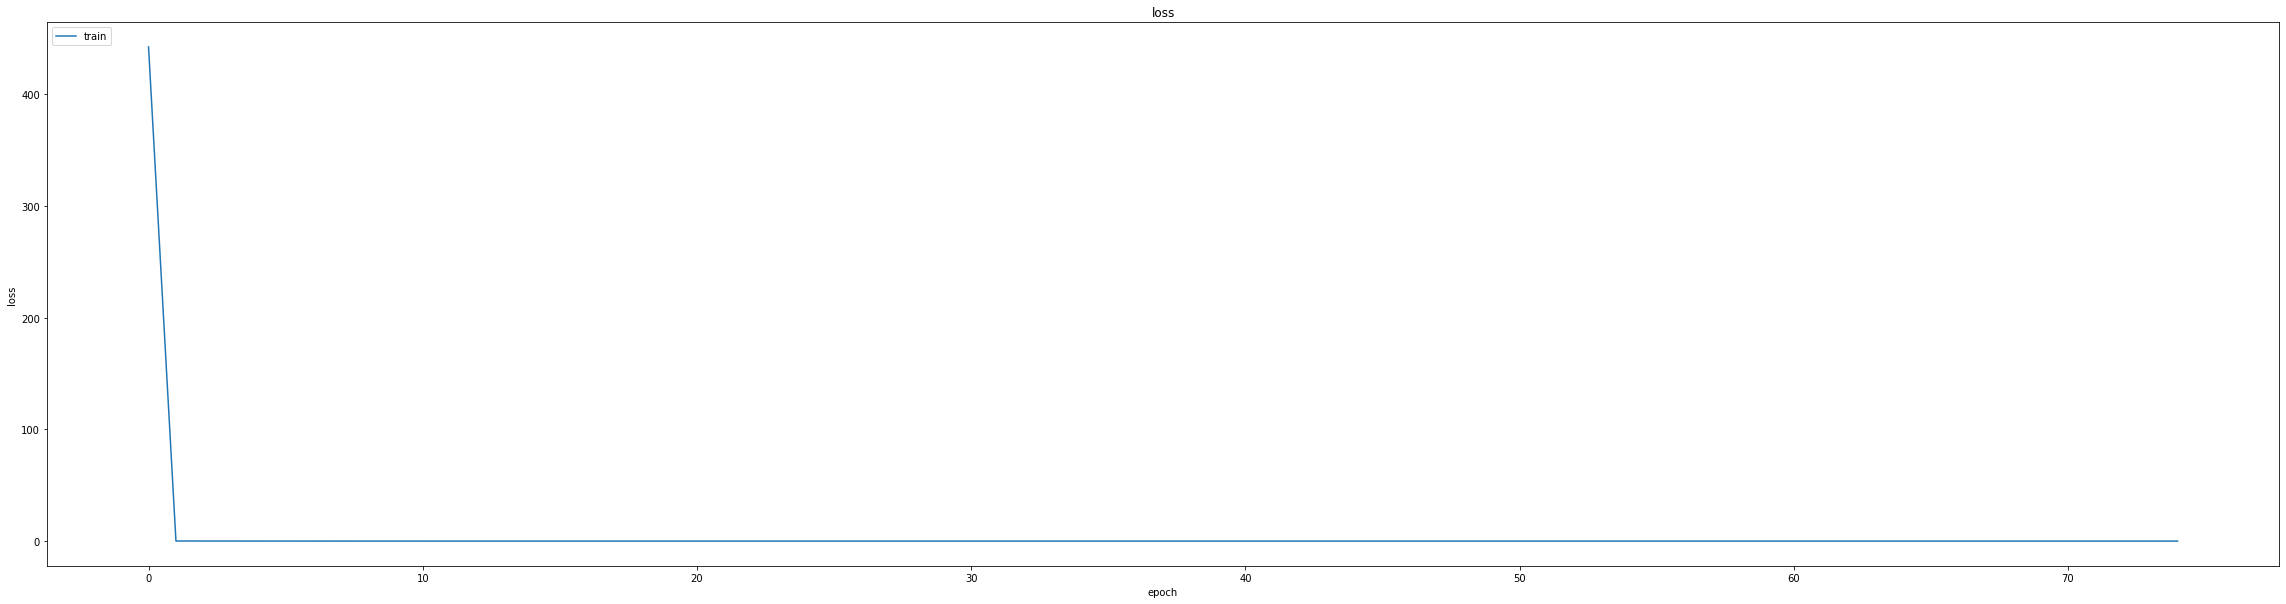

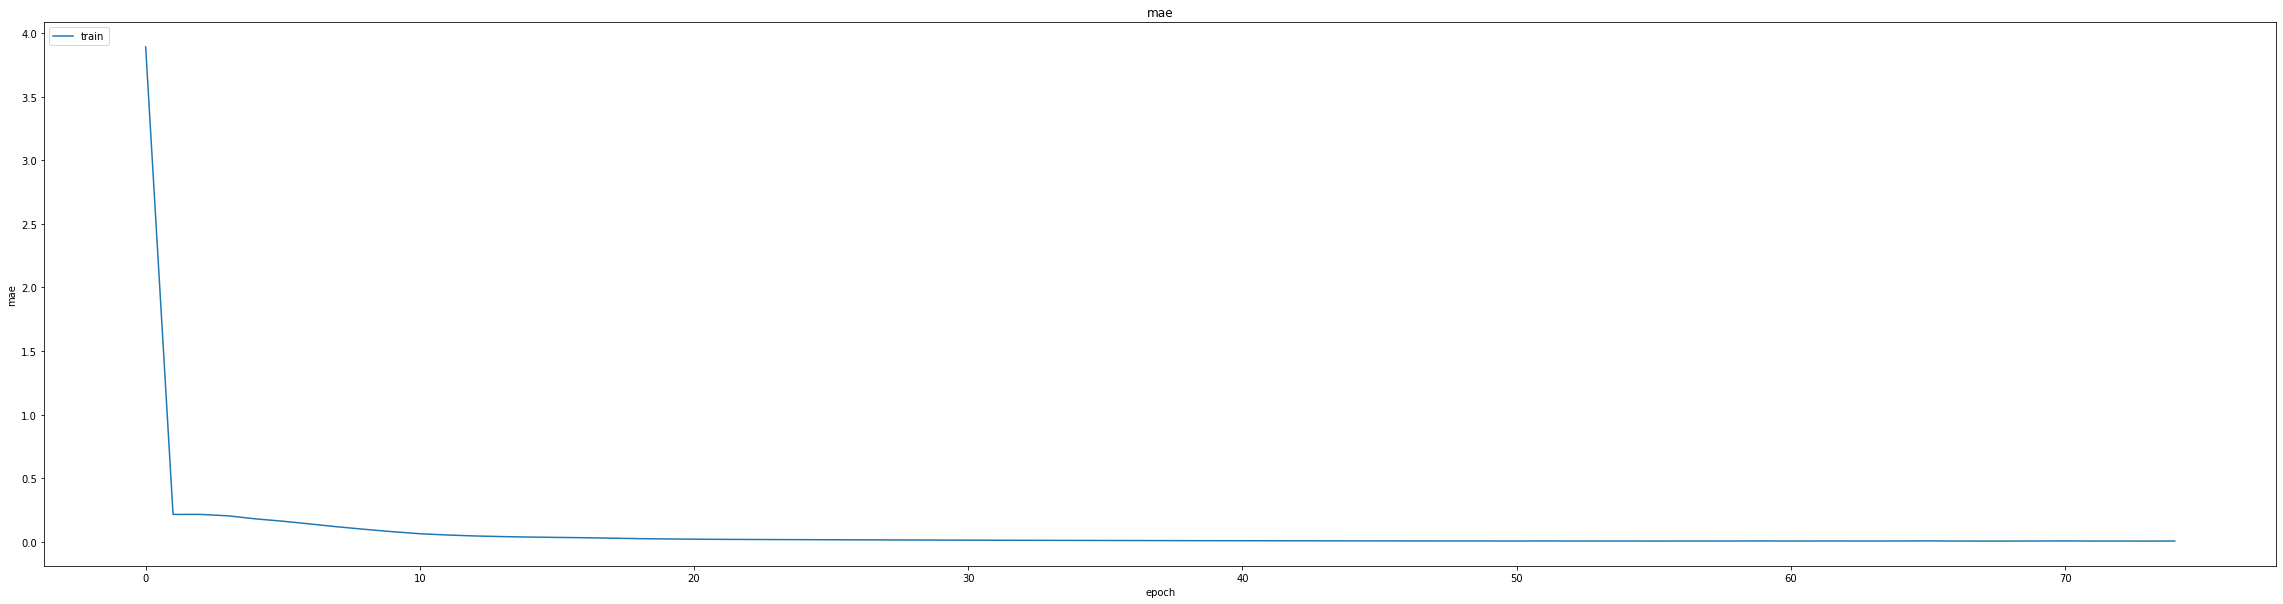

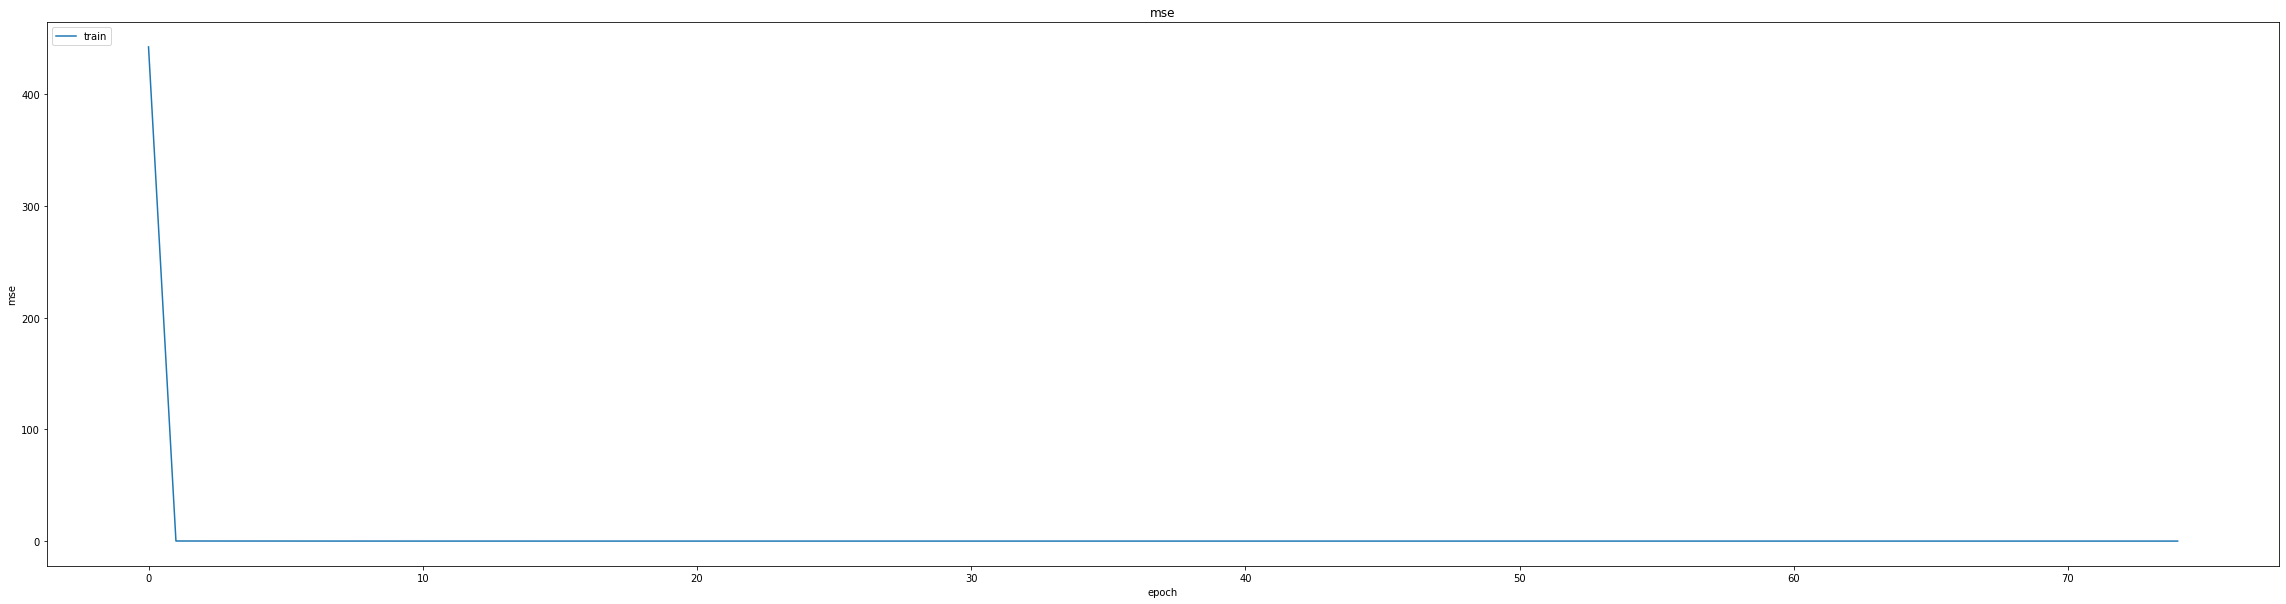

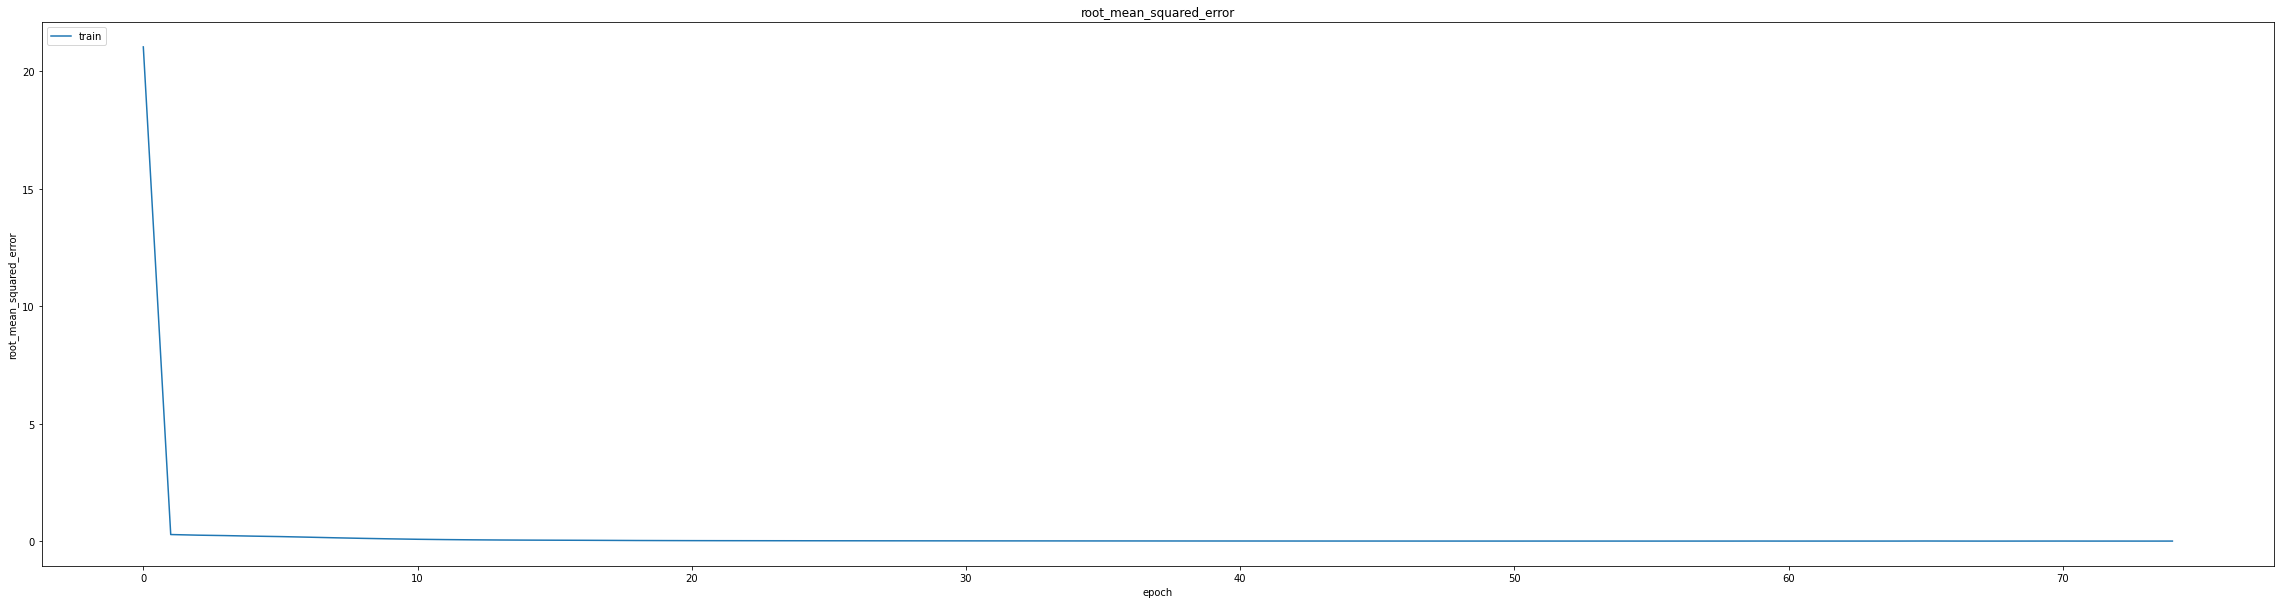

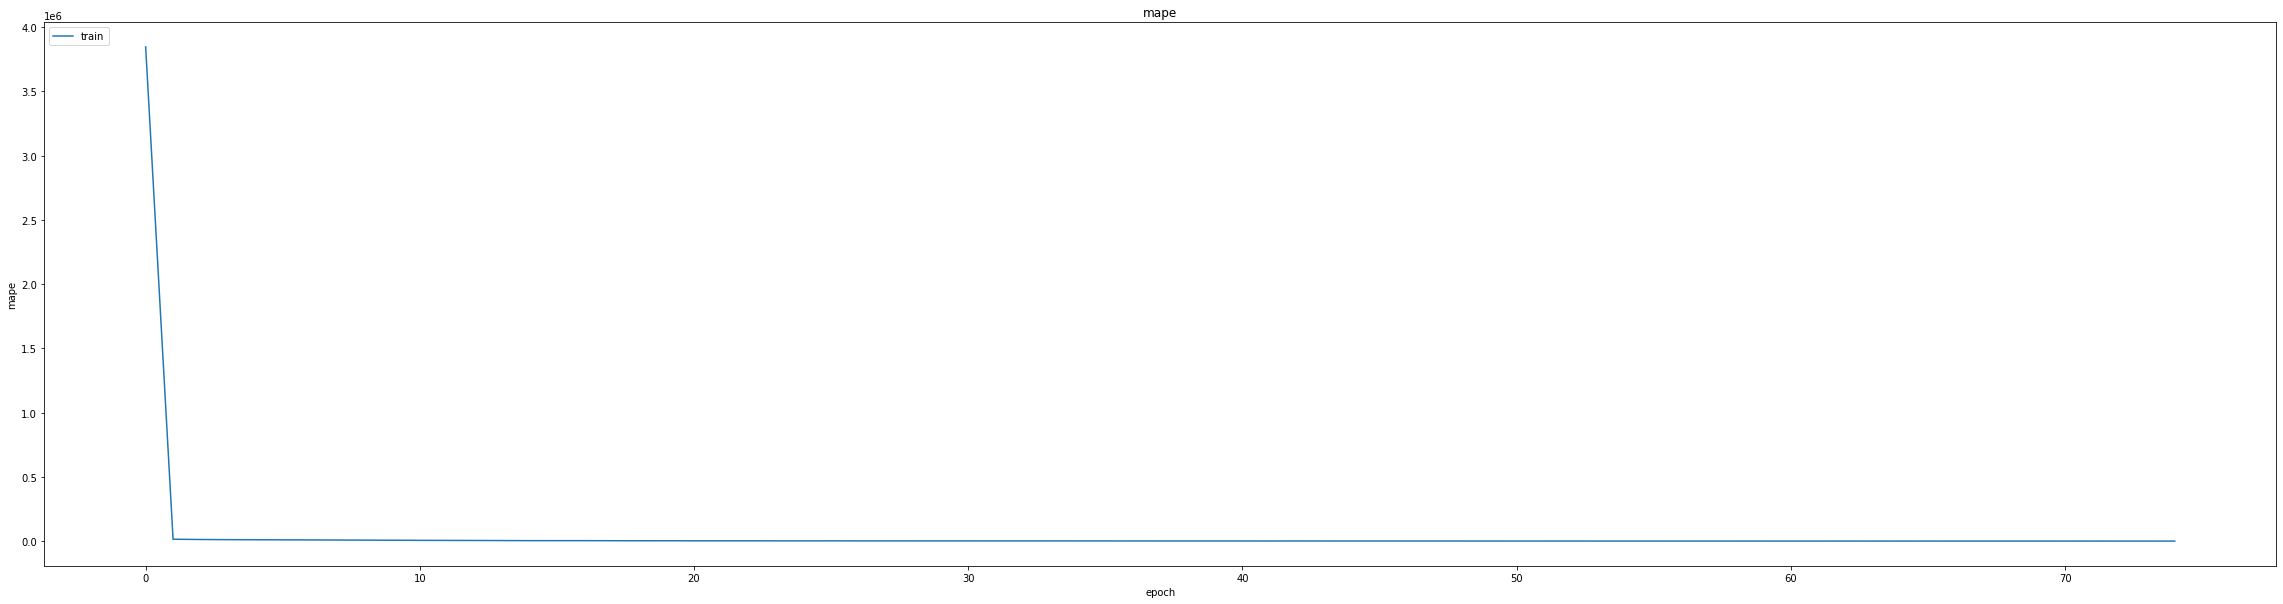

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.005177020560950041
0.007344523444771767
464/464 [==============================] - 2s 3ms/step
0.9950146463295767


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
346/348 [============================>.] - ETA: 0s - loss: 3.1253e-04 - mae: 0.0083 - mse: 3.1253e-04 - root_mean_squared_error: 0.0177 - mape: 752.5848
Epoch 1: val_mse did not improve from 0.00005
348/348 [==============================] - 8s 13ms/step - loss: 3.1101e-04 - mae: 0.0083 - mse: 3.1101e-04 - root_mean_squared_error: 0.0176 - mape: 748.4024 - val_loss: 1.5206e-04 - val_mae: 0.0107 - val_mse: 1.5206e-04 - val_root_mean_squared_error: 0.0123 - val_mape: 2356.1572 - lr: 0.0010
Epoch 2/25
348/348 [==============================] - ETA: 0s - loss: 3.6842e-05 - mae: 0.0046 - mse: 3.6842e-05 - root_mean_squared_error: 0.0061 - mape: 675.5810
Epoch 2: val_mse did not improve from 0.00005
348/348 [==============================] - 4s 10ms/step - loss: 3.6842e-05 - mae: 0.0046 - mse: 3.6842e-05 - root_mean_squared_error: 0.0061 - mape: 675.5810 - val_loss: 2.3630e-04 - val_mae: 0.0140 - val_mse: 2.3630e-04 - val_root_mean_squared_error: 0.0154 - val_mape: 2139.9724 - lr:

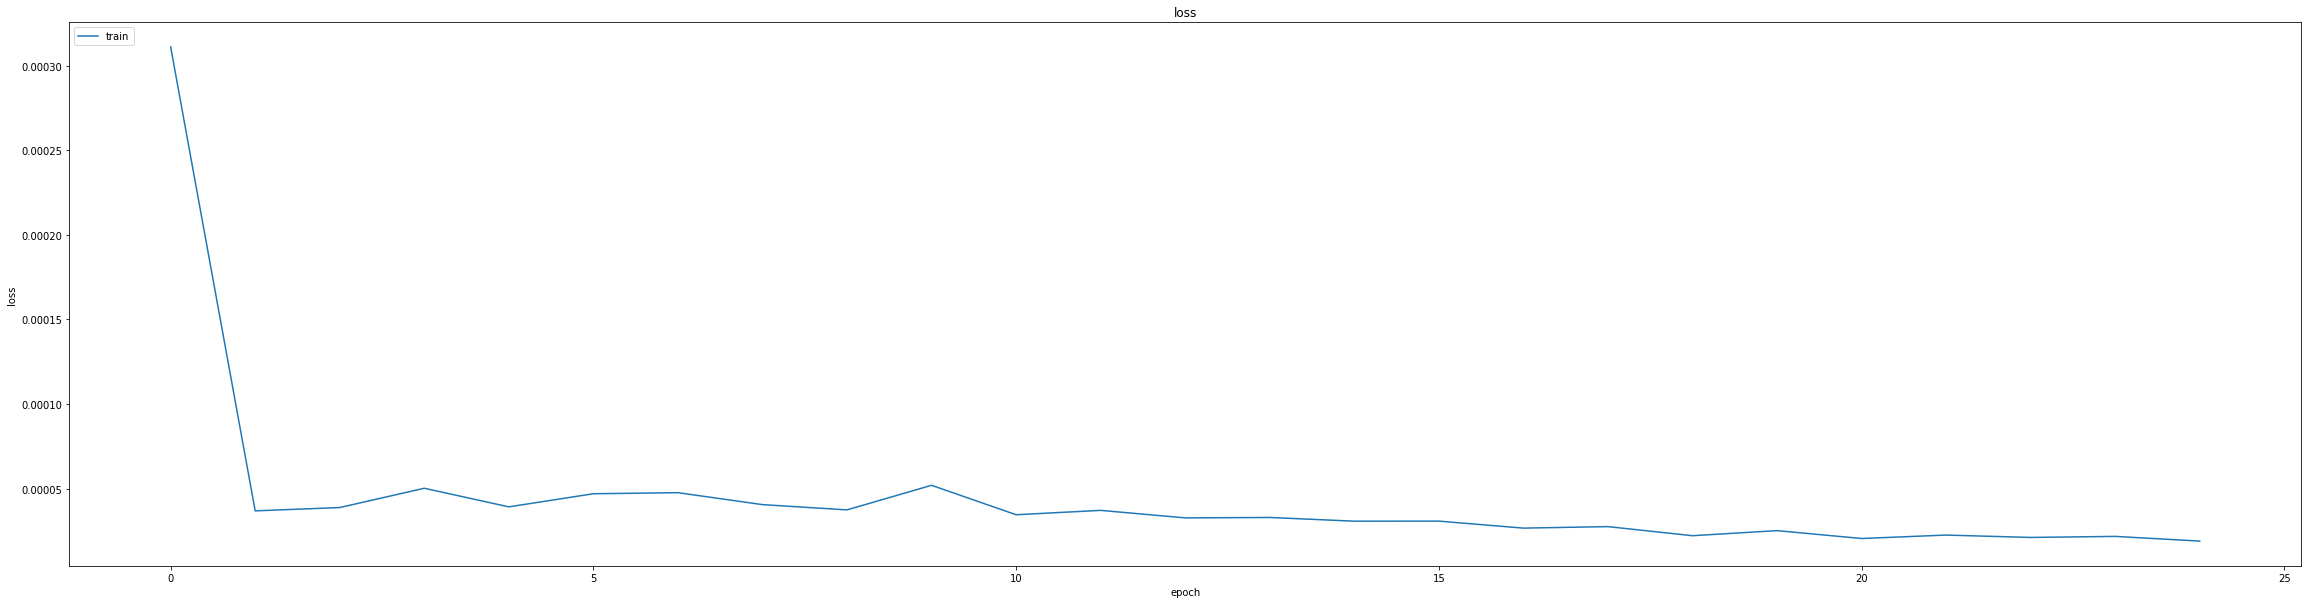

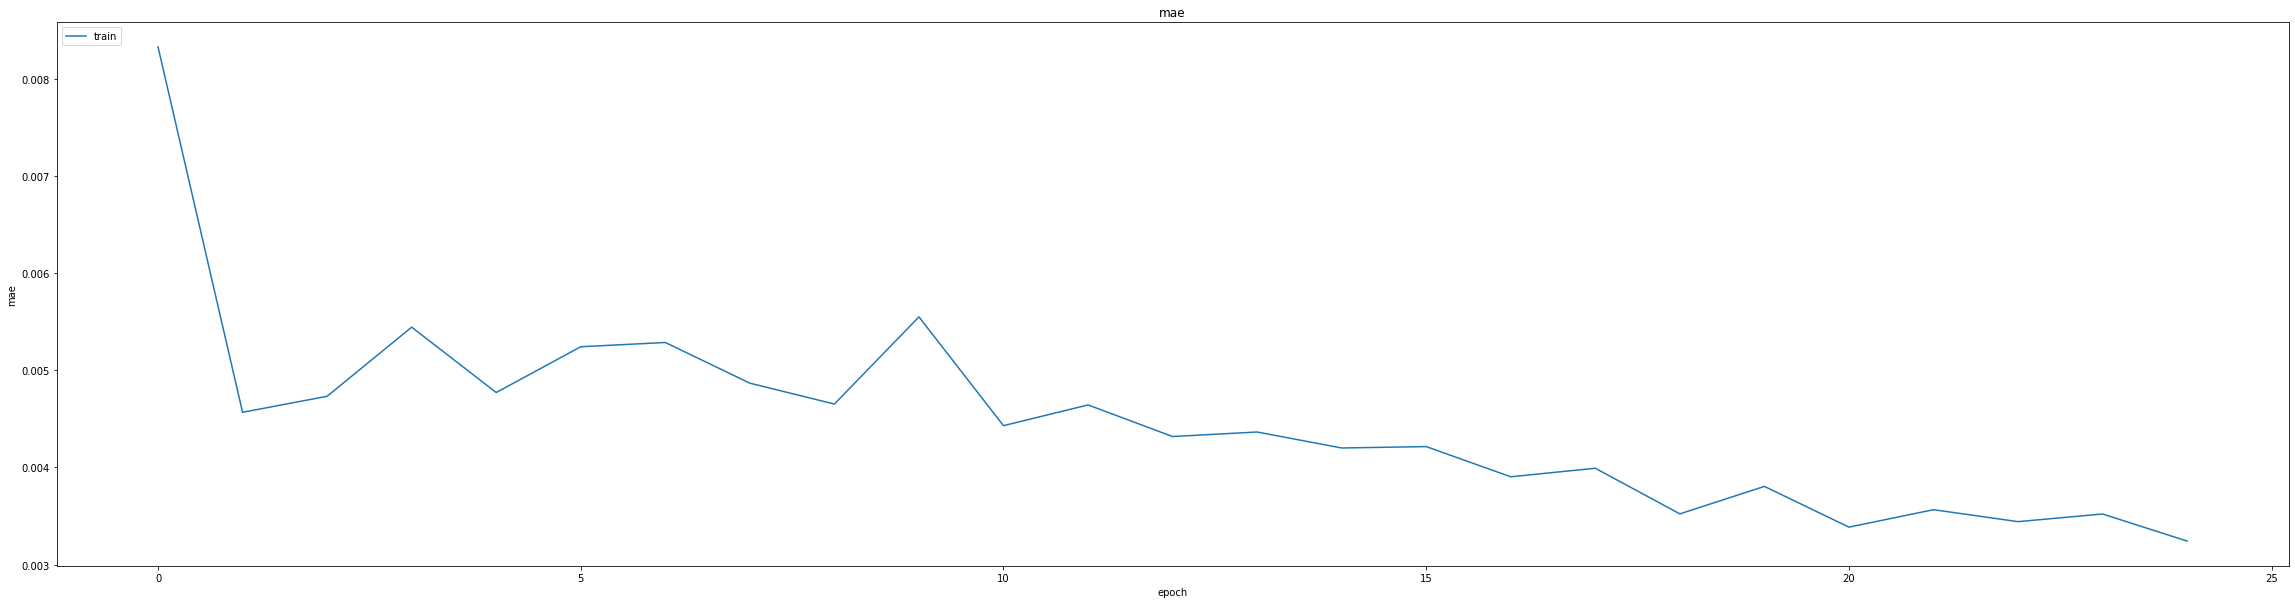

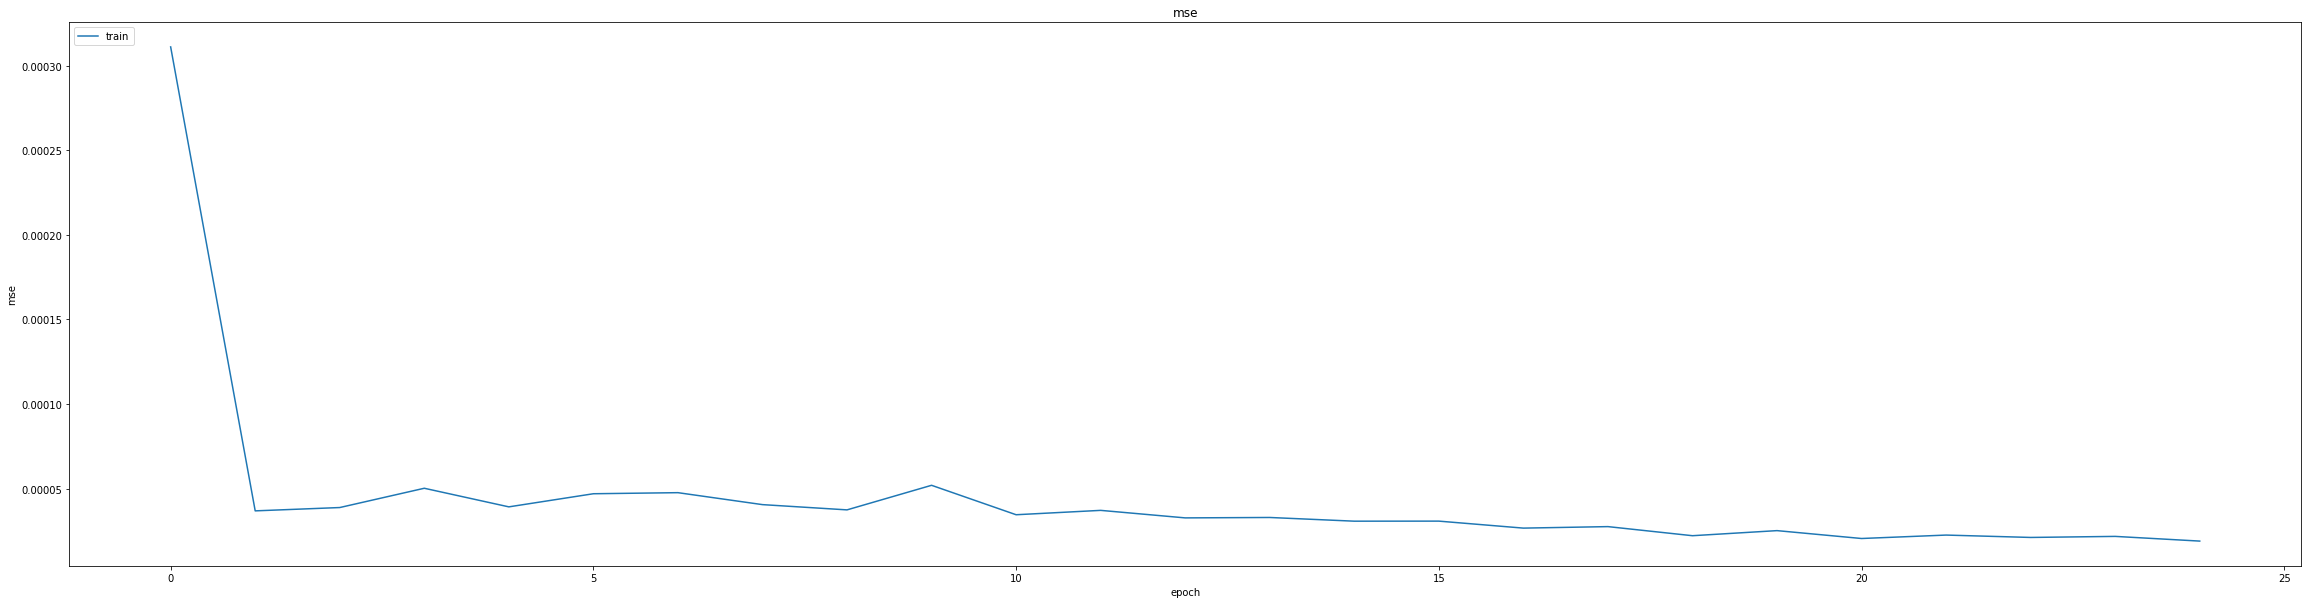

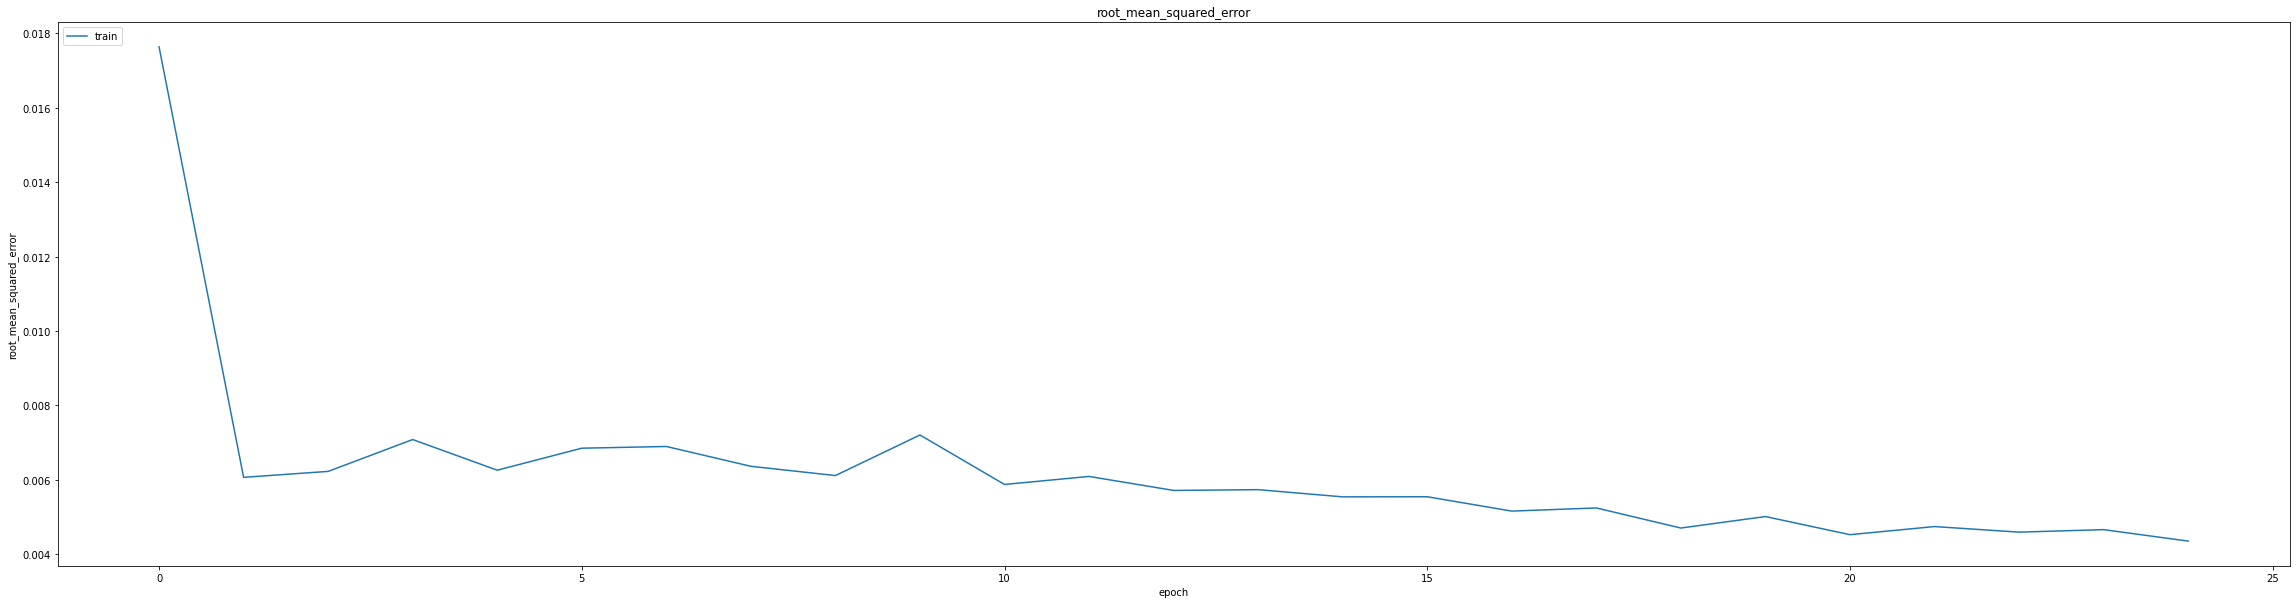

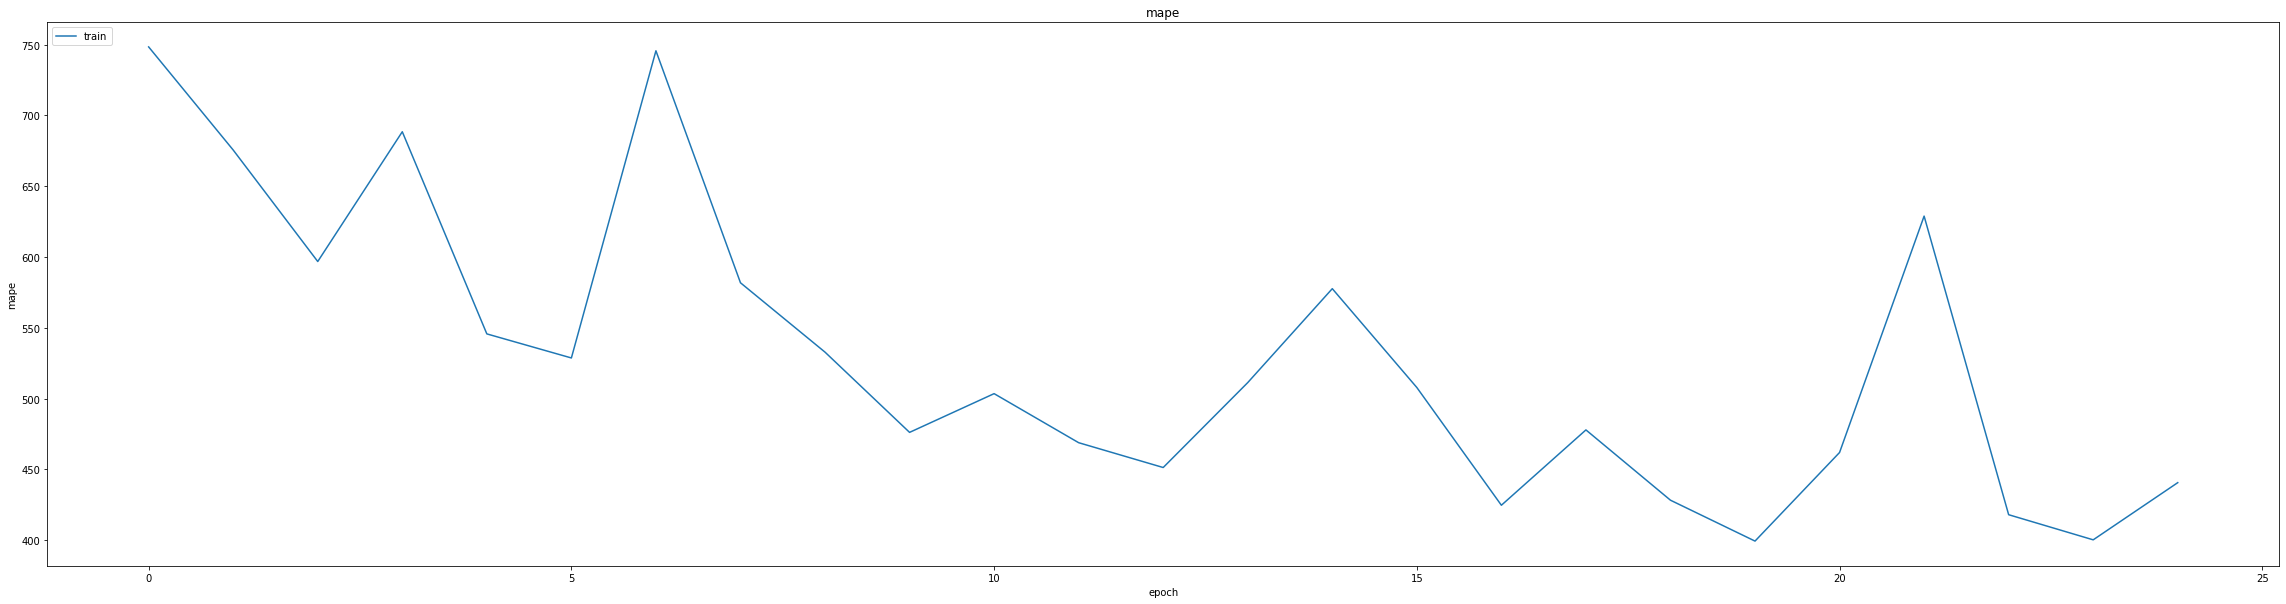

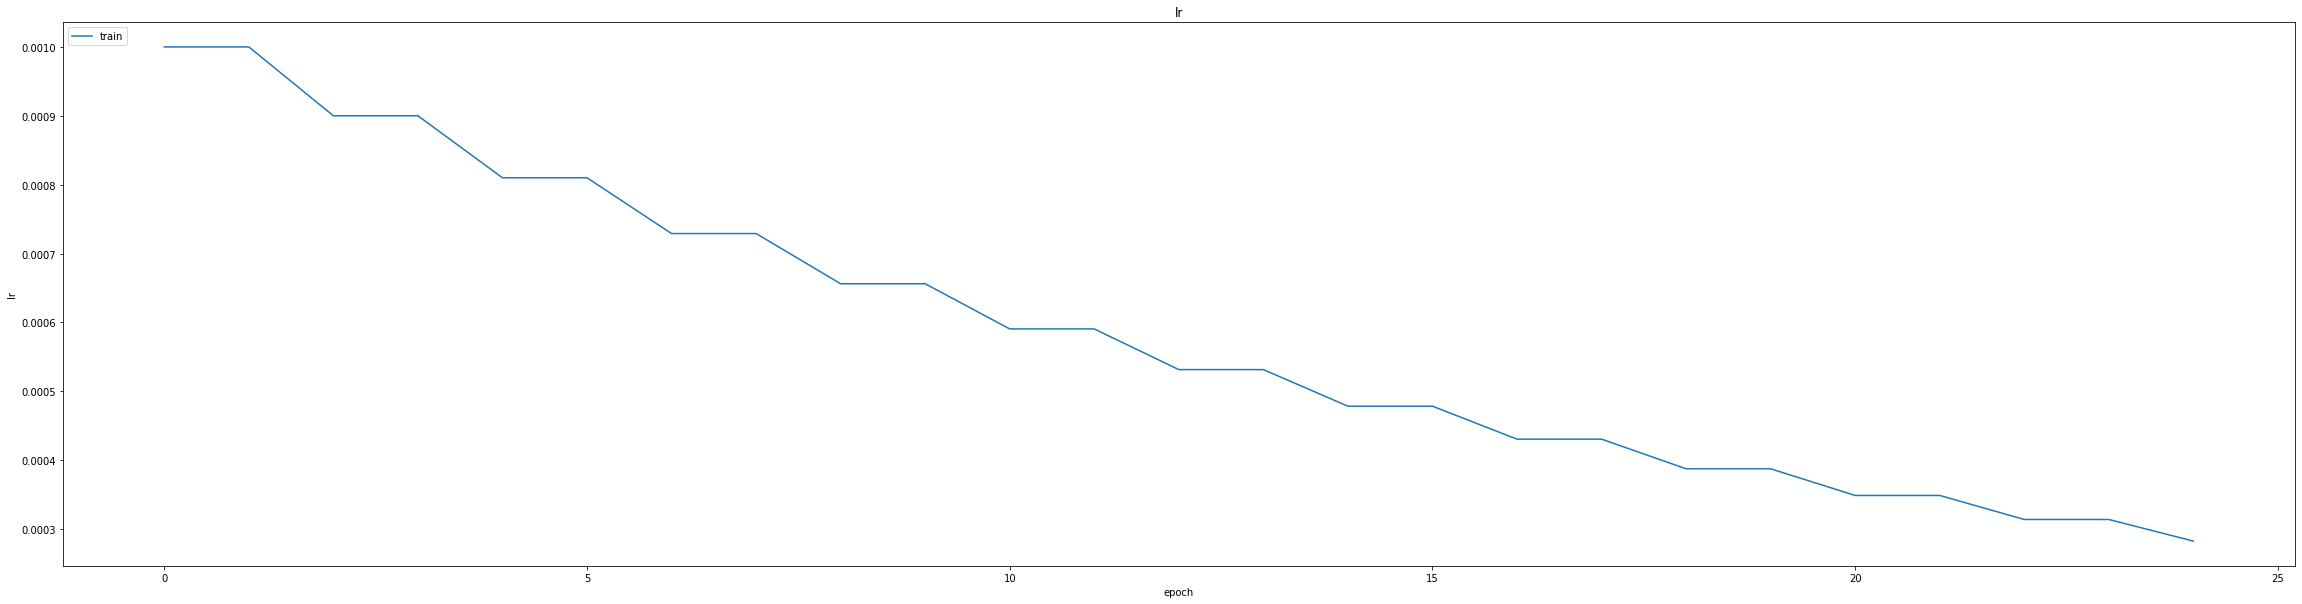

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.005846413783729076
0.007778703235089779
464/464 [==============================] - 2s 3ms/step
0.9987451666094268


464/464 [==============================] - 2s 3ms/step


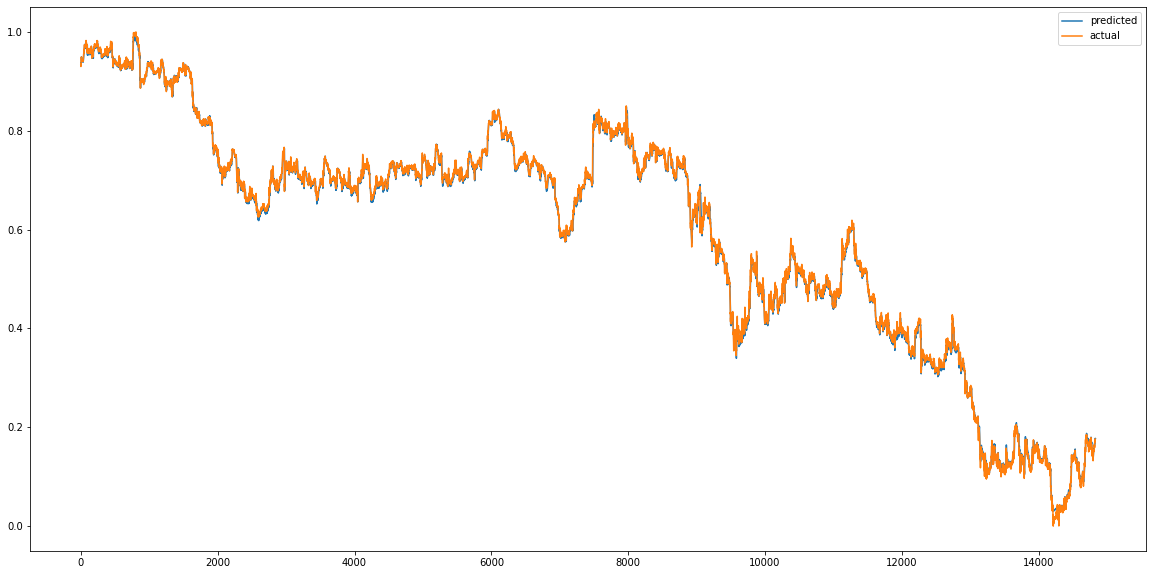

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_LSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


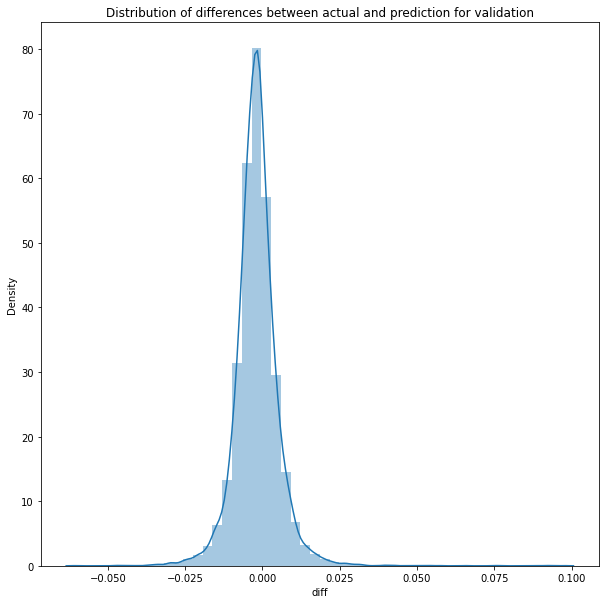

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 2s 3ms/step


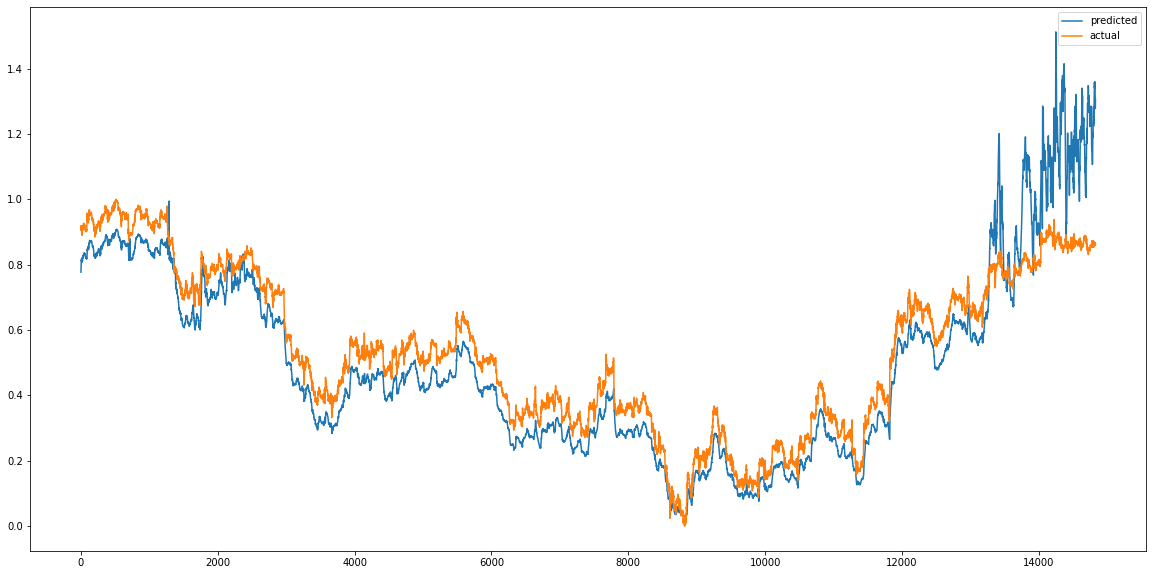

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


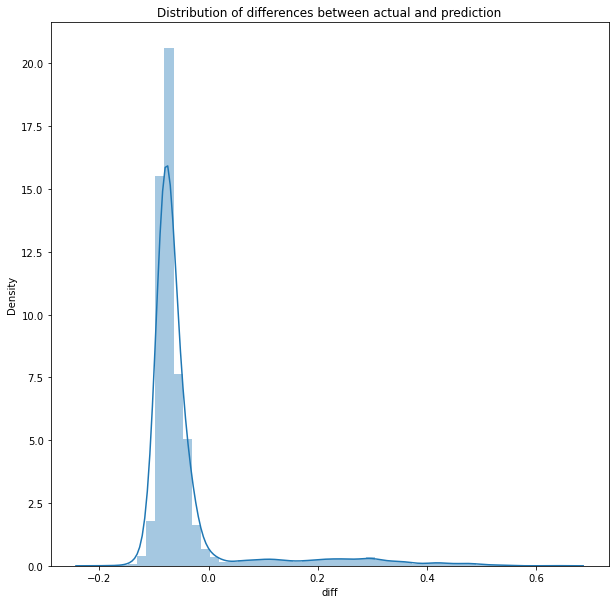

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.011856985508899081
RMSE :  0.10888978606324416
MAE :  0.08668400397749061
464/464 [==============================] - 2s 3ms/step
R2_Score  : 0.8036503938577262


count    14830.000000
mean        -0.041287
std          0.100762
min         -0.198917
25%         -0.082826
50%         -0.073191
75%         -0.051901
max          0.642572
Name: diff, dtype: float64

**CNN_GRU_MODEL**

In [ ]:
model= thesis.CNN_GRU_Model(x_train)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 gru_2 (GRU)                 (None, 24, 256)           247296    
                                                                 
 dropout_4 (Dropout)         (None, 24, 256)           0         
                                                                 
 gru_3 (GRU)                 (None, 64)                61824     
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75


347/348 [============================>.] - ETA: 0s - loss: 415.0114 - mae: 3.3282 - mse: 415.0114 - root_mean_squared_error: 20.3718 - mape: 14446.9189
Epoch 1: val_mse improved from inf to 0.05861, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 17s 36ms/step - loss: 413.8933 - mae: 3.3198 - mse: 413.8933 - root_mean_squared_error: 20.3444 - mape: 14408.2246 - val_loss: 0.0586 - val_mae: 0.2058 - val_mse: 0.0586 - val_root_mean_squared_error: 0.2421 - val_mape: 38707.1797
Epoch 2/75
348/348 [==============================] - ETA: 0s - loss: 0.0605 - mae: 0.2042 - mse: 0.0605 - root_mean_squared_error: 0.2459 - mape: 13097.7588
Epoch 2: val_mse improved from 0.05861 to 0.02303, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 0.0605 - mae: 0.2042 - mse: 0.0605 - root_mean_squared_error: 0.2459 - mape: 13097.7588 - val_loss: 0.0230 - val_mae: 0.1135 - val_mse: 0.0230 - val_root_mean_squared_error: 0.1518 - val_mape: 29394.9766
Epoch 3/75
345/348 [============================>.] - ETA: 0s - loss: 0.0086 - mae: 0.0684 - mse: 0.0086 - root_mean_squared_error: 0.0928 - mape: 5785.6792
Epoch 3: val_mse improved from 0.02303 to 0.00232, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 0.0086 - mae: 0.0682 - mse: 0.0086 - root_mean_squared_error: 0.0925 - mape: 5736.9604 - val_loss: 0.0023 - val_mae: 0.0402 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0482 - val_mape: 13495.8984
Epoch 4/75
345/348 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0340 - mse: 0.0019 - root_mean_squared_error: 0.0435 - mape: 4249.3545
Epoch 4: val_mse improved from 0.00232 to 0.00091, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 33ms/step - loss: 0.0019 - mae: 0.0339 - mse: 0.0019 - root_mean_squared_error: 0.0435 - mape: 4213.5806 - val_loss: 9.0897e-04 - val_mae: 0.0226 - val_mse: 9.0897e-04 - val_root_mean_squared_error: 0.0301 - val_mape: 10840.2852
Epoch 5/75
348/348 [==============================] - ETA: 0s - loss: 9.3146e-04 - mae: 0.0234 - mse: 9.3146e-04 - root_mean_squared_error: 0.0305 - mape: 3366.8303
Epoch 5: val_mse improved from 0.00091 to 0.00062, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 32ms/step - loss: 9.3146e-04 - mae: 0.0234 - mse: 9.3146e-04 - root_mean_squared_error: 0.0305 - mape: 3366.8303 - val_loss: 6.2412e-04 - val_mae: 0.0179 - val_mse: 6.2412e-04 - val_root_mean_squared_error: 0.0250 - val_mape: 9264.9531
Epoch 6/75
345/348 [============================>.] - ETA: 0s - loss: 6.4543e-04 - mae: 0.0196 - mse: 6.4543e-04 - root_mean_squared_error: 0.0254 - mape: 3071.0081
Epoch 6: val_mse improved from 0.00062 to 0.00060, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 12s 34ms/step - loss: 6.4440e-04 - mae: 0.0196 - mse: 6.4440e-04 - root_mean_squared_error: 0.0254 - mape: 3045.1362 - val_loss: 5.9641e-04 - val_mae: 0.0178 - val_mse: 5.9641e-04 - val_root_mean_squared_error: 0.0244 - val_mape: 8375.6650
Epoch 7/75
344/348 [============================>.] - ETA: 0s - loss: 5.2157e-04 - mae: 0.0177 - mse: 5.2157e-04 - root_mean_squared_error: 0.0228 - mape: 2844.0125
Epoch 7: val_mse improved from 0.00060 to 0.00054, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 5.2129e-04 - mae: 0.0177 - mse: 5.2129e-04 - root_mean_squared_error: 0.0228 - mape: 2811.9197 - val_loss: 5.3828e-04 - val_mae: 0.0169 - val_mse: 5.3828e-04 - val_root_mean_squared_error: 0.0232 - val_mape: 7809.4609
Epoch 8/75
343/348 [============================>.] - ETA: 0s - loss: 4.4456e-04 - mae: 0.0163 - mse: 4.4456e-04 - root_mean_squared_error: 0.0211 - mape: 2715.6299
Epoch 8: val_mse did not improve from 0.00054
348/348 [==============================] - 3s 10ms/step - loss: 4.4367e-04 - mae: 0.0163 - mse: 4.4367e-04 - root_mean_squared_error: 0.0211 - mape: 2677.1685 - val_loss: 5.5627e-04 - val_mae: 0.0173 - val_mse: 5.5627e-04 - val_root_mean_squared_error: 0.0236 - val_mape: 7387.8970
Epoch 9/75
346/348 [============================>.] - ETA: 0s - loss: 3.8422e-04 - mae: 0.0152 - mse: 3.8422e-04 - root_mean_squared_error: 0.0196 - mape: 2688.7903
Epoch 9: val_mse improved from 0.00054 to 0.00049, saving m

348/348 [==============================] - 10s 29ms/step - loss: 3.8379e-04 - mae: 0.0152 - mse: 3.8379e-04 - root_mean_squared_error: 0.0196 - mape: 2673.8369 - val_loss: 4.9339e-04 - val_mae: 0.0164 - val_mse: 4.9339e-04 - val_root_mean_squared_error: 0.0222 - val_mape: 7059.9326
Epoch 10/75
345/348 [============================>.] - ETA: 0s - loss: 3.3853e-04 - mae: 0.0143 - mse: 3.3853e-04 - root_mean_squared_error: 0.0184 - mape: 2403.4753
Epoch 10: val_mse improved from 0.00049 to 0.00047, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 3.3867e-04 - mae: 0.0143 - mse: 3.3867e-04 - root_mean_squared_error: 0.0184 - mape: 2383.2354 - val_loss: 4.7281e-04 - val_mae: 0.0160 - val_mse: 4.7281e-04 - val_root_mean_squared_error: 0.0217 - val_mape: 6772.0186
Epoch 11/75
343/348 [============================>.] - ETA: 0s - loss: 3.0279e-04 - mae: 0.0135 - mse: 3.0279e-04 - root_mean_squared_error: 0.0174 - mape: 2360.7209
Epoch 11: val_mse improved from 0.00047 to 0.00042, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 3.0261e-04 - mae: 0.0135 - mse: 3.0261e-04 - root_mean_squared_error: 0.0174 - mape: 2327.2832 - val_loss: 4.1942e-04 - val_mae: 0.0152 - val_mse: 4.1942e-04 - val_root_mean_squared_error: 0.0205 - val_mape: 6541.9243
Epoch 12/75
347/348 [============================>.] - ETA: 0s - loss: 2.7517e-04 - mae: 0.0128 - mse: 2.7517e-04 - root_mean_squared_error: 0.0166 - mape: 2204.5798
Epoch 12: val_mse improved from 0.00042 to 0.00041, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 2.7523e-04 - mae: 0.0128 - mse: 2.7523e-04 - root_mean_squared_error: 0.0166 - mape: 2198.6741 - val_loss: 4.0923e-04 - val_mae: 0.0149 - val_mse: 4.0923e-04 - val_root_mean_squared_error: 0.0202 - val_mape: 6377.7905
Epoch 13/75
348/348 [==============================] - ETA: 0s - loss: 2.4775e-04 - mae: 0.0122 - mse: 2.4775e-04 - root_mean_squared_error: 0.0157 - mape: 2263.5784
Epoch 13: val_mse improved from 0.00041 to 0.00039, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 30ms/step - loss: 2.4775e-04 - mae: 0.0122 - mse: 2.4775e-04 - root_mean_squared_error: 0.0157 - mape: 2263.5784 - val_loss: 3.9340e-04 - val_mae: 0.0147 - val_mse: 3.9340e-04 - val_root_mean_squared_error: 0.0198 - val_mape: 6194.4409
Epoch 14/75
347/348 [============================>.] - ETA: 0s - loss: 2.2729e-04 - mae: 0.0116 - mse: 2.2729e-04 - root_mean_squared_error: 0.0151 - mape: 2169.5684
Epoch 14: val_mse improved from 0.00039 to 0.00037, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 2.2729e-04 - mae: 0.0116 - mse: 2.2729e-04 - root_mean_squared_error: 0.0151 - mape: 2163.7312 - val_loss: 3.6654e-04 - val_mae: 0.0144 - val_mse: 3.6654e-04 - val_root_mean_squared_error: 0.0191 - val_mape: 6031.0405
Epoch 15/75
347/348 [============================>.] - ETA: 0s - loss: 2.0691e-04 - mae: 0.0110 - mse: 2.0691e-04 - root_mean_squared_error: 0.0144 - mape: 2171.1355
Epoch 15: val_mse improved from 0.00037 to 0.00034, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 2.0682e-04 - mae: 0.0110 - mse: 2.0682e-04 - root_mean_squared_error: 0.0144 - mape: 2165.2917 - val_loss: 3.4028e-04 - val_mae: 0.0138 - val_mse: 3.4028e-04 - val_root_mean_squared_error: 0.0184 - val_mape: 5860.4082
Epoch 16/75
348/348 [==============================] - ETA: 0s - loss: 1.9403e-04 - mae: 0.0107 - mse: 1.9403e-04 - root_mean_squared_error: 0.0139 - mape: 2052.2366
Epoch 16: val_mse improved from 0.00034 to 0.00032, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 29ms/step - loss: 1.9403e-04 - mae: 0.0107 - mse: 1.9403e-04 - root_mean_squared_error: 0.0139 - mape: 2052.2366 - val_loss: 3.1681e-04 - val_mae: 0.0132 - val_mse: 3.1681e-04 - val_root_mean_squared_error: 0.0178 - val_mape: 5745.5430
Epoch 17/75
344/348 [============================>.] - ETA: 0s - loss: 1.8179e-04 - mae: 0.0102 - mse: 1.8179e-04 - root_mean_squared_error: 0.0135 - mape: 2270.4685
Epoch 17: val_mse improved from 0.00032 to 0.00030, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 1.8196e-04 - mae: 0.0102 - mse: 1.8196e-04 - root_mean_squared_error: 0.0135 - mape: 2244.8113 - val_loss: 2.9963e-04 - val_mae: 0.0129 - val_mse: 2.9963e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 5662.4092
Epoch 18/75
347/348 [============================>.] - ETA: 0s - loss: 1.7043e-04 - mae: 0.0100 - mse: 1.7043e-04 - root_mean_squared_error: 0.0131 - mape: 1946.4009
Epoch 18: val_mse did not improve from 0.00030
348/348 [==============================] - 3s 10ms/step - loss: 1.7051e-04 - mae: 0.0100 - mse: 1.7051e-04 - root_mean_squared_error: 0.0131 - mape: 1941.1707 - val_loss: 3.2694e-04 - val_mae: 0.0136 - val_mse: 3.2694e-04 - val_root_mean_squared_error: 0.0181 - val_mape: 5564.1255
Epoch 19/75
342/348 [============================>.] - ETA: 0s - loss: 1.7004e-04 - mae: 0.0099 - mse: 1.7004e-04 - root_mean_squared_error: 0.0130 - mape: 1927.3137
Epoch 19: val_mse improved from 0.00030 to 0.00030, savi

348/348 [==============================] - 11s 31ms/step - loss: 1.6976e-04 - mae: 0.0099 - mse: 1.6976e-04 - root_mean_squared_error: 0.0130 - mape: 1894.4716 - val_loss: 2.9847e-04 - val_mae: 0.0128 - val_mse: 2.9847e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 5506.1636
Epoch 20/75
347/348 [============================>.] - ETA: 0s - loss: 1.5801e-04 - mae: 0.0095 - mse: 1.5801e-04 - root_mean_squared_error: 0.0126 - mape: 1970.7203
Epoch 20: val_mse improved from 0.00030 to 0.00029, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 33ms/step - loss: 1.5801e-04 - mae: 0.0095 - mse: 1.5801e-04 - root_mean_squared_error: 0.0126 - mape: 1965.4207 - val_loss: 2.9341e-04 - val_mae: 0.0127 - val_mse: 2.9341e-04 - val_root_mean_squared_error: 0.0171 - val_mape: 5395.7417
Epoch 21/75
345/348 [============================>.] - ETA: 0s - loss: 1.5457e-04 - mae: 0.0094 - mse: 1.5457e-04 - root_mean_squared_error: 0.0124 - mape: 1875.0430
Epoch 21: val_mse did not improve from 0.00029
348/348 [==============================] - 4s 10ms/step - loss: 1.5488e-04 - mae: 0.0094 - mse: 1.5488e-04 - root_mean_squared_error: 0.0124 - mape: 1859.2429 - val_loss: 3.2673e-04 - val_mae: 0.0138 - val_mse: 3.2673e-04 - val_root_mean_squared_error: 0.0181 - val_mape: 5331.2998
Epoch 22/75
348/348 [==============================] - ETA: 0s - loss: 1.4592e-04 - mae: 0.0091 - mse: 1.4592e-04 - root_mean_squared_error: 0.0121 - mape: 1842.7104
Epoch 22: val_mse improved from 0.00029 to 0.00026, savi

348/348 [==============================] - 11s 32ms/step - loss: 1.4592e-04 - mae: 0.0091 - mse: 1.4592e-04 - root_mean_squared_error: 0.0121 - mape: 1842.7104 - val_loss: 2.5929e-04 - val_mae: 0.0119 - val_mse: 2.5929e-04 - val_root_mean_squared_error: 0.0161 - val_mape: 5265.2319
Epoch 23/75
348/348 [==============================] - ETA: 0s - loss: 1.3986e-04 - mae: 0.0089 - mse: 1.3986e-04 - root_mean_squared_error: 0.0118 - mape: 1879.1877
Epoch 23: val_mse improved from 0.00026 to 0.00025, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 1.3986e-04 - mae: 0.0089 - mse: 1.3986e-04 - root_mean_squared_error: 0.0118 - mape: 1879.1877 - val_loss: 2.5184e-04 - val_mae: 0.0117 - val_mse: 2.5184e-04 - val_root_mean_squared_error: 0.0159 - val_mape: 5199.9541
Epoch 24/75
344/348 [============================>.] - ETA: 0s - loss: 1.3557e-04 - mae: 0.0088 - mse: 1.3557e-04 - root_mean_squared_error: 0.0116 - mape: 1854.8999
Epoch 24: val_mse improved from 0.00025 to 0.00024, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 29ms/step - loss: 1.3544e-04 - mae: 0.0088 - mse: 1.3544e-04 - root_mean_squared_error: 0.0116 - mape: 1833.9447 - val_loss: 2.4219e-04 - val_mae: 0.0115 - val_mse: 2.4219e-04 - val_root_mean_squared_error: 0.0156 - val_mape: 5128.1201
Epoch 25/75
346/348 [============================>.] - ETA: 0s - loss: 1.2983e-04 - mae: 0.0086 - mse: 1.2983e-04 - root_mean_squared_error: 0.0114 - mape: 1880.4224
Epoch 25: val_mse did not improve from 0.00024
348/348 [==============================] - 3s 10ms/step - loss: 1.2974e-04 - mae: 0.0086 - mse: 1.2974e-04 - root_mean_squared_error: 0.0114 - mape: 1869.9648 - val_loss: 2.4961e-04 - val_mae: 0.0116 - val_mse: 2.4961e-04 - val_root_mean_squared_error: 0.0158 - val_mape: 5063.0732
Epoch 26/75
347/348 [============================>.] - ETA: 0s - loss: 1.3069e-04 - mae: 0.0086 - mse: 1.3069e-04 - root_mean_squared_error: 0.0114 - mape: 1582.8340
Epoch 26: val_mse improved from 0.00024 to 0.00022, savi

348/348 [==============================] - 11s 31ms/step - loss: 1.3071e-04 - mae: 0.0086 - mse: 1.3071e-04 - root_mean_squared_error: 0.0114 - mape: 1578.5797 - val_loss: 2.1685e-04 - val_mae: 0.0107 - val_mse: 2.1685e-04 - val_root_mean_squared_error: 0.0147 - val_mape: 4978.6045
Epoch 27/75
348/348 [==============================] - ETA: 0s - loss: 1.2728e-04 - mae: 0.0085 - mse: 1.2728e-04 - root_mean_squared_error: 0.0113 - mape: 1673.8906
Epoch 27: val_mse did not improve from 0.00022
348/348 [==============================] - 3s 10ms/step - loss: 1.2728e-04 - mae: 0.0085 - mse: 1.2728e-04 - root_mean_squared_error: 0.0113 - mape: 1673.8906 - val_loss: 2.1941e-04 - val_mae: 0.0108 - val_mse: 2.1941e-04 - val_root_mean_squared_error: 0.0148 - val_mape: 4954.9199
Epoch 28/75
346/348 [============================>.] - ETA: 0s - loss: 1.1900e-04 - mae: 0.0082 - mse: 1.1900e-04 - root_mean_squared_error: 0.0109 - mape: 1725.8405
Epoch 28: val_mse did not improve from 0.00022
348/348 [

348/348 [==============================] - 11s 31ms/step - loss: 1.2021e-04 - mae: 0.0083 - mse: 1.2021e-04 - root_mean_squared_error: 0.0110 - mape: 1640.7029 - val_loss: 2.0541e-04 - val_mae: 0.0104 - val_mse: 2.0541e-04 - val_root_mean_squared_error: 0.0143 - val_mape: 4810.9048
Epoch 31/75
344/348 [============================>.] - ETA: 0s - loss: 1.0881e-04 - mae: 0.0078 - mse: 1.0881e-04 - root_mean_squared_error: 0.0104 - mape: 1682.8854
Epoch 31: val_mse did not improve from 0.00021
348/348 [==============================] - 4s 10ms/step - loss: 1.0893e-04 - mae: 0.0078 - mse: 1.0893e-04 - root_mean_squared_error: 0.0104 - mape: 1663.9299 - val_loss: 2.1995e-04 - val_mae: 0.0110 - val_mse: 2.1995e-04 - val_root_mean_squared_error: 0.0148 - val_mape: 4771.6230
Epoch 32/75
347/348 [============================>.] - ETA: 0s - loss: 1.1306e-04 - mae: 0.0080 - mse: 1.1306e-04 - root_mean_squared_error: 0.0106 - mape: 1556.0746
Epoch 32: val_mse did not improve from 0.00021
348/348 [

348/348 [==============================] - 10s 29ms/step - loss: 1.0572e-04 - mae: 0.0077 - mse: 1.0572e-04 - root_mean_squared_error: 0.0103 - mape: 1580.4386 - val_loss: 1.9359e-04 - val_mae: 0.0103 - val_mse: 1.9359e-04 - val_root_mean_squared_error: 0.0139 - val_mape: 4644.2983
Epoch 34/75
343/348 [============================>.] - ETA: 0s - loss: 1.0092e-04 - mae: 0.0075 - mse: 1.0092e-04 - root_mean_squared_error: 0.0100 - mape: 1515.7737
Epoch 34: val_mse did not improve from 0.00019
348/348 [==============================] - 4s 10ms/step - loss: 1.0108e-04 - mae: 0.0075 - mse: 1.0108e-04 - root_mean_squared_error: 0.0101 - mape: 1494.2949 - val_loss: 1.9914e-04 - val_mae: 0.0104 - val_mse: 1.9914e-04 - val_root_mean_squared_error: 0.0141 - val_mape: 4600.5615
Epoch 35/75
342/348 [============================>.] - ETA: 0s - loss: 9.9539e-05 - mae: 0.0075 - mse: 9.9539e-05 - root_mean_squared_error: 0.0100 - mape: 1591.5504
Epoch 35: val_mse did not improve from 0.00019
348/348 [

348/348 [==============================] - 11s 31ms/step - loss: 9.8087e-05 - mae: 0.0075 - mse: 9.8087e-05 - root_mean_squared_error: 0.0099 - mape: 1772.3334 - val_loss: 1.7976e-04 - val_mae: 0.0099 - val_mse: 1.7976e-04 - val_root_mean_squared_error: 0.0134 - val_mape: 4491.2788
Epoch 37/75
346/348 [============================>.] - ETA: 0s - loss: 9.6734e-05 - mae: 0.0074 - mse: 9.6734e-05 - root_mean_squared_error: 0.0098 - mape: 1540.9495
Epoch 37: val_mse improved from 0.00018 to 0.00017, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 9.6634e-05 - mae: 0.0074 - mse: 9.6634e-05 - root_mean_squared_error: 0.0098 - mape: 1532.3779 - val_loss: 1.6645e-04 - val_mae: 0.0093 - val_mse: 1.6645e-04 - val_root_mean_squared_error: 0.0129 - val_mape: 4436.4595
Epoch 38/75
343/348 [============================>.] - ETA: 0s - loss: 9.6252e-05 - mae: 0.0075 - mse: 9.6252e-05 - root_mean_squared_error: 0.0098 - mape: 1501.8361
Epoch 38: val_mse did not improve from 0.00017
348/348 [==============================] - 3s 10ms/step - loss: 9.6100e-05 - mae: 0.0075 - mse: 9.6100e-05 - root_mean_squared_error: 0.0098 - mape: 1480.5559 - val_loss: 2.2778e-04 - val_mae: 0.0118 - val_mse: 2.2778e-04 - val_root_mean_squared_error: 0.0151 - val_mape: 4364.6177
Epoch 39/75
346/348 [============================>.] - ETA: 0s - loss: 9.3015e-05 - mae: 0.0073 - mse: 9.3015e-05 - root_mean_squared_error: 0.0096 - mape: 1500.2668
Epoch 39: val_mse did not improve from 0.00017
348/348 [

348/348 [==============================] - 11s 32ms/step - loss: 8.4648e-05 - mae: 0.0070 - mse: 8.4648e-05 - root_mean_squared_error: 0.0092 - mape: 1353.1666 - val_loss: 1.4410e-04 - val_mae: 0.0087 - val_mse: 1.4410e-04 - val_root_mean_squared_error: 0.0120 - val_mape: 4165.1499
Epoch 43/75
348/348 [==============================] - ETA: 0s - loss: 8.8175e-05 - mae: 0.0071 - mse: 8.8175e-05 - root_mean_squared_error: 0.0094 - mape: 1558.9177
Epoch 43: val_mse improved from 0.00014 to 0.00013, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 8.8175e-05 - mae: 0.0071 - mse: 8.8175e-05 - root_mean_squared_error: 0.0094 - mape: 1558.9177 - val_loss: 1.3149e-04 - val_mae: 0.0082 - val_mse: 1.3149e-04 - val_root_mean_squared_error: 0.0115 - val_mape: 4117.5352
Epoch 44/75
347/348 [============================>.] - ETA: 0s - loss: 8.2248e-05 - mae: 0.0069 - mse: 8.2248e-05 - root_mean_squared_error: 0.0091 - mape: 1237.8943
Epoch 44: val_mse did not improve from 0.00013
348/348 [==============================] - 4s 10ms/step - loss: 8.2209e-05 - mae: 0.0069 - mse: 8.2209e-05 - root_mean_squared_error: 0.0091 - mape: 1234.5641 - val_loss: 1.4760e-04 - val_mae: 0.0091 - val_mse: 1.4760e-04 - val_root_mean_squared_error: 0.0121 - val_mape: 4033.8389
Epoch 45/75
347/348 [============================>.] - ETA: 0s - loss: 7.2823e-05 - mae: 0.0064 - mse: 7.2823e-05 - root_mean_squared_error: 0.0085 - mape: 1263.4675
Epoch 45: val_mse improved from 0.00013 to 0.00010, savi

348/348 [==============================] - 11s 31ms/step - loss: 7.2736e-05 - mae: 0.0064 - mse: 7.2736e-05 - root_mean_squared_error: 0.0085 - mape: 1260.0668 - val_loss: 9.7543e-05 - val_mae: 0.0067 - val_mse: 9.7543e-05 - val_root_mean_squared_error: 0.0099 - val_mape: 3961.0669
Epoch 46/75
344/348 [============================>.] - ETA: 0s - loss: 7.4655e-05 - mae: 0.0065 - mse: 7.4655e-05 - root_mean_squared_error: 0.0086 - mape: 1353.2535
Epoch 46: val_mse did not improve from 0.00010
348/348 [==============================] - 4s 11ms/step - loss: 7.4714e-05 - mae: 0.0065 - mse: 7.4714e-05 - root_mean_squared_error: 0.0086 - mape: 1337.9587 - val_loss: 2.0425e-04 - val_mae: 0.0114 - val_mse: 2.0425e-04 - val_root_mean_squared_error: 0.0143 - val_mape: 3917.9509
Epoch 47/75
343/348 [============================>.] - ETA: 0s - loss: 7.4757e-05 - mae: 0.0066 - mse: 7.4757e-05 - root_mean_squared_error: 0.0086 - mape: 1364.0149
Epoch 47: val_mse did not improve from 0.00010
348/348 [

348/348 [==============================] - 10s 29ms/step - loss: 7.0779e-05 - mae: 0.0064 - mse: 7.0779e-05 - root_mean_squared_error: 0.0084 - mape: 1244.2711 - val_loss: 9.3266e-05 - val_mae: 0.0067 - val_mse: 9.3266e-05 - val_root_mean_squared_error: 0.0097 - val_mape: 3894.0188
Epoch 49/75
346/348 [============================>.] - ETA: 0s - loss: 7.4863e-05 - mae: 0.0066 - mse: 7.4863e-05 - root_mean_squared_error: 0.0087 - mape: 1220.3219
Epoch 49: val_mse did not improve from 0.00009
348/348 [==============================] - 4s 10ms/step - loss: 7.4836e-05 - mae: 0.0066 - mse: 7.4836e-05 - root_mean_squared_error: 0.0087 - mape: 1213.5770 - val_loss: 9.5805e-05 - val_mae: 0.0069 - val_mse: 9.5805e-05 - val_root_mean_squared_error: 0.0098 - val_mape: 3719.5449
Epoch 50/75
348/348 [==============================] - ETA: 0s - loss: 7.5517e-05 - mae: 0.0066 - mse: 7.5517e-05 - root_mean_squared_error: 0.0087 - mape: 1258.2256
Epoch 50: val_mse did not improve from 0.00009
348/348 [

348/348 [==============================] - 11s 31ms/step - loss: 7.2977e-05 - mae: 0.0066 - mse: 7.2977e-05 - root_mean_squared_error: 0.0085 - mape: 1229.6737 - val_loss: 7.6795e-05 - val_mae: 0.0062 - val_mse: 7.6795e-05 - val_root_mean_squared_error: 0.0088 - val_mape: 3488.3250
Epoch 56/75
346/348 [============================>.] - ETA: 0s - loss: 5.8325e-05 - mae: 0.0058 - mse: 5.8325e-05 - root_mean_squared_error: 0.0076 - mape: 1170.8184
Epoch 56: val_mse improved from 0.00008 to 0.00007, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 5.8190e-05 - mae: 0.0058 - mse: 5.8190e-05 - root_mean_squared_error: 0.0076 - mape: 1164.3060 - val_loss: 6.5070e-05 - val_mae: 0.0054 - val_mse: 6.5070e-05 - val_root_mean_squared_error: 0.0081 - val_mape: 3455.3337
Epoch 57/75
346/348 [============================>.] - ETA: 0s - loss: 9.4473e-05 - mae: 0.0072 - mse: 9.4473e-05 - root_mean_squared_error: 0.0097 - mape: 1107.5051
Epoch 57: val_mse improved from 0.00007 to 0.00006, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 9.4179e-05 - mae: 0.0072 - mse: 9.4179e-05 - root_mean_squared_error: 0.0097 - mape: 1101.3510 - val_loss: 6.4349e-05 - val_mae: 0.0054 - val_mse: 6.4349e-05 - val_root_mean_squared_error: 0.0080 - val_mape: 3436.2957
Epoch 58/75
346/348 [============================>.] - ETA: 0s - loss: 6.9817e-05 - mae: 0.0064 - mse: 6.9817e-05 - root_mean_squared_error: 0.0084 - mape: 1213.9429
Epoch 58: val_mse did not improve from 0.00006
348/348 [==============================] - 4s 10ms/step - loss: 6.9763e-05 - mae: 0.0064 - mse: 6.9763e-05 - root_mean_squared_error: 0.0084 - mape: 1207.1927 - val_loss: 6.4924e-05 - val_mae: 0.0055 - val_mse: 6.4924e-05 - val_root_mean_squared_error: 0.0081 - val_mape: 3414.7578
Epoch 59/75
343/348 [============================>.] - ETA: 0s - loss: 7.3838e-05 - mae: 0.0066 - mse: 7.3838e-05 - root_mean_squared_error: 0.0086 - mape: 1137.7863
Epoch 59: val_mse did not improve from 0.00006
348/348 [

348/348 [==============================] - 10s 29ms/step - loss: 6.3751e-05 - mae: 0.0061 - mse: 6.3751e-05 - root_mean_squared_error: 0.0080 - mape: 1047.3484 - val_loss: 6.1285e-05 - val_mae: 0.0057 - val_mse: 6.1285e-05 - val_root_mean_squared_error: 0.0078 - val_mape: 3180.4675
Epoch 66/75
343/348 [============================>.] - ETA: 0s - loss: 6.8237e-05 - mae: 0.0064 - mse: 6.8237e-05 - root_mean_squared_error: 0.0083 - mape: 1052.9147
Epoch 66: val_mse did not improve from 0.00006
348/348 [==============================] - 4s 10ms/step - loss: 6.9264e-05 - mae: 0.0064 - mse: 6.9264e-05 - root_mean_squared_error: 0.0083 - mape: 1038.0029 - val_loss: 8.6884e-05 - val_mae: 0.0075 - val_mse: 8.6884e-05 - val_root_mean_squared_error: 0.0093 - val_mape: 3212.4102
Epoch 67/75
344/348 [============================>.] - ETA: 0s - loss: 6.4551e-05 - mae: 0.0060 - mse: 6.4551e-05 - root_mean_squared_error: 0.0080 - mape: 1057.7142
Epoch 67: val_mse did not improve from 0.00006
348/348 [

348/348 [==============================] - 11s 32ms/step - loss: 6.4239e-05 - mae: 0.0062 - mse: 6.4239e-05 - root_mean_squared_error: 0.0080 - mape: 1069.7538 - val_loss: 4.4699e-05 - val_mae: 0.0046 - val_mse: 4.4699e-05 - val_root_mean_squared_error: 0.0067 - val_mape: 3068.4956
Epoch 70/75
344/348 [============================>.] - ETA: 0s - loss: 6.0032e-05 - mae: 0.0059 - mse: 6.0032e-05 - root_mean_squared_error: 0.0077 - mape: 1010.2662
Epoch 70: val_mse did not improve from 0.00004
348/348 [==============================] - 4s 10ms/step - loss: 5.9682e-05 - mae: 0.0059 - mse: 5.9682e-05 - root_mean_squared_error: 0.0077 - mape: 998.8502 - val_loss: 5.6186e-05 - val_mae: 0.0055 - val_mse: 5.6186e-05 - val_root_mean_squared_error: 0.0075 - val_mape: 2998.5176
Epoch 71/75
346/348 [============================>.] - ETA: 0s - loss: 4.7286e-05 - mae: 0.0053 - mse: 4.7286e-05 - root_mean_squared_error: 0.0069 - mape: 969.7540
Epoch 71: val_mse improved from 0.00004 to 0.00004, saving

348/348 [==============================] - 11s 30ms/step - loss: 4.7135e-05 - mae: 0.0052 - mse: 4.7135e-05 - root_mean_squared_error: 0.0069 - mape: 964.3585 - val_loss: 4.2884e-05 - val_mae: 0.0044 - val_mse: 4.2884e-05 - val_root_mean_squared_error: 0.0065 - val_mape: 2997.5840
Epoch 72/75
343/348 [============================>.] - ETA: 0s - loss: 8.2020e-05 - mae: 0.0068 - mse: 8.2020e-05 - root_mean_squared_error: 0.0091 - mape: 979.1337
Epoch 72: val_mse did not improve from 0.00004
348/348 [==============================] - 4s 10ms/step - loss: 8.1195e-05 - mae: 0.0067 - mse: 8.1195e-05 - root_mean_squared_error: 0.0090 - mape: 965.2559 - val_loss: 7.4419e-05 - val_mae: 0.0070 - val_mse: 7.4419e-05 - val_root_mean_squared_error: 0.0086 - val_mape: 2912.1335
Epoch 73/75
346/348 [============================>.] - ETA: 0s - loss: 5.5941e-05 - mae: 0.0057 - mse: 5.5941e-05 - root_mean_squared_error: 0.0075 - mape: 973.7713
Epoch 73: val_mse did not improve from 0.00004
348/348 [====

348/348 [==============================] - 10s 30ms/step - loss: 4.4451e-05 - mae: 0.0052 - mse: 4.4451e-05 - root_mean_squared_error: 0.0067 - mape: 953.6240 - val_loss: 4.2030e-05 - val_mae: 0.0045 - val_mse: 4.2030e-05 - val_root_mean_squared_error: 0.0065 - val_mape: 2798.9465
Epoch 75/75
345/348 [============================>.] - ETA: 0s - loss: 6.1176e-05 - mae: 0.0058 - mse: 6.1176e-05 - root_mean_squared_error: 0.0078 - mape: 922.0609
Epoch 75: val_mse improved from 0.00004 to 0.00004, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 6.1319e-05 - mae: 0.0058 - mse: 6.1319e-05 - root_mean_squared_error: 0.0078 - mape: 914.3028 - val_loss: 4.1076e-05 - val_mae: 0.0045 - val_mse: 4.1076e-05 - val_root_mean_squared_error: 0.0064 - val_mape: 2779.7839


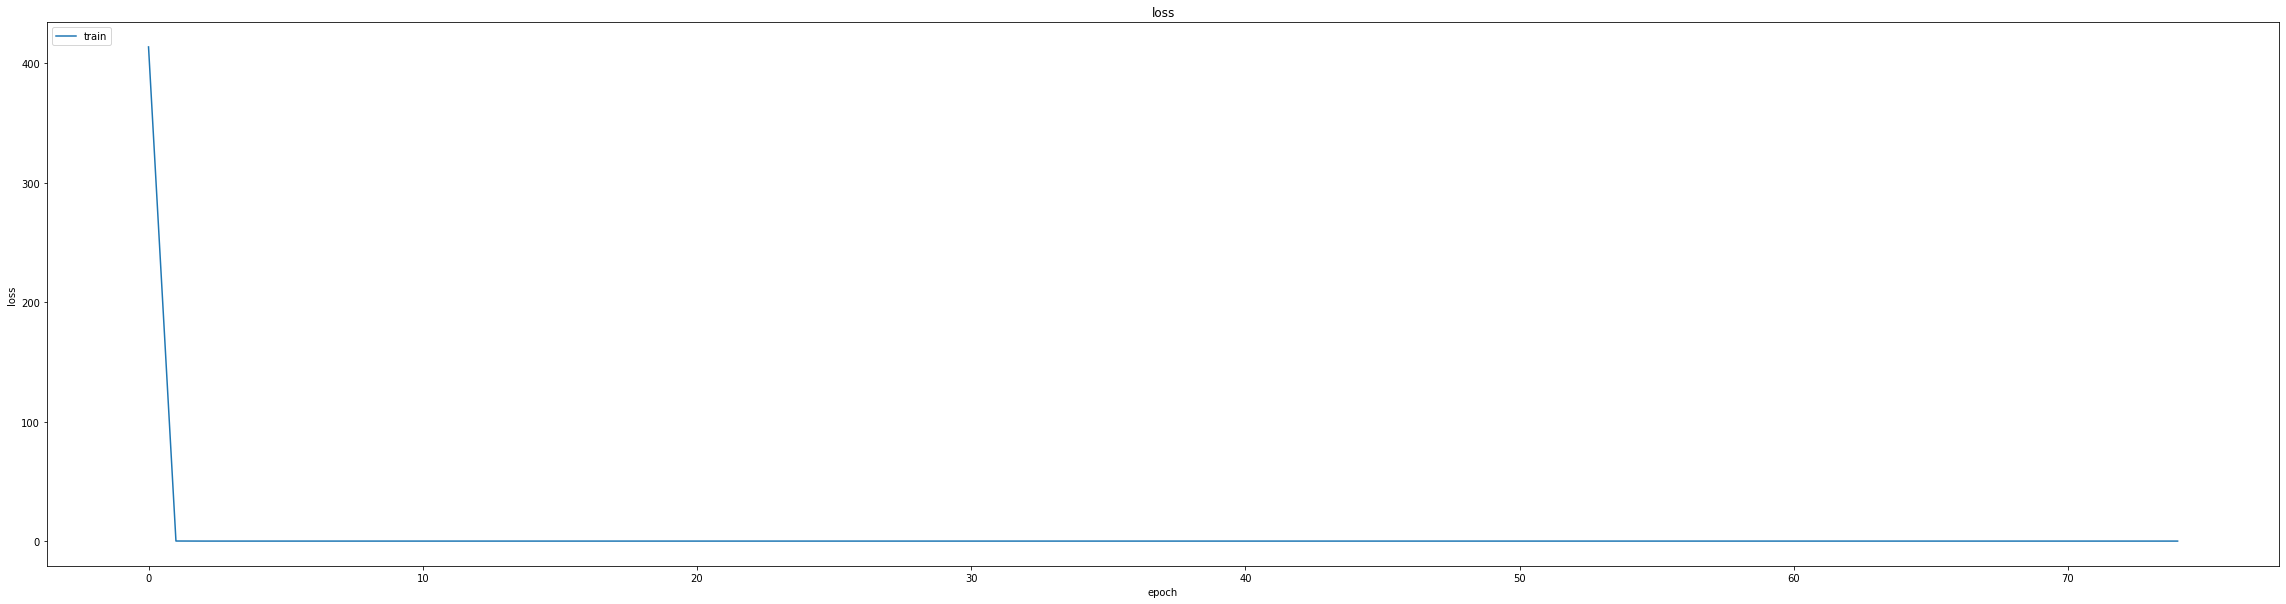

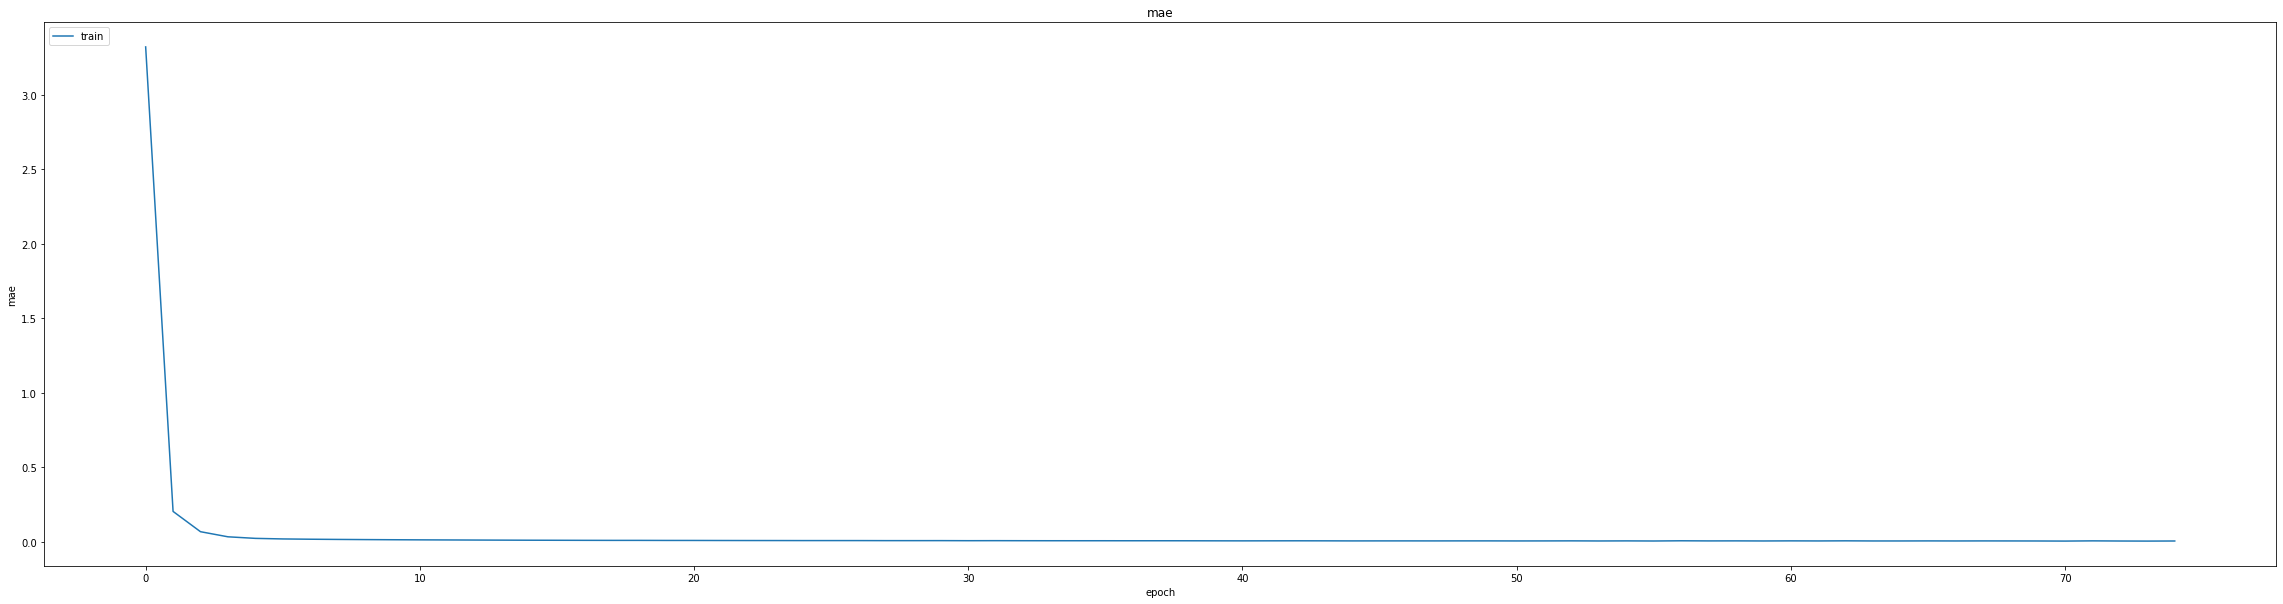

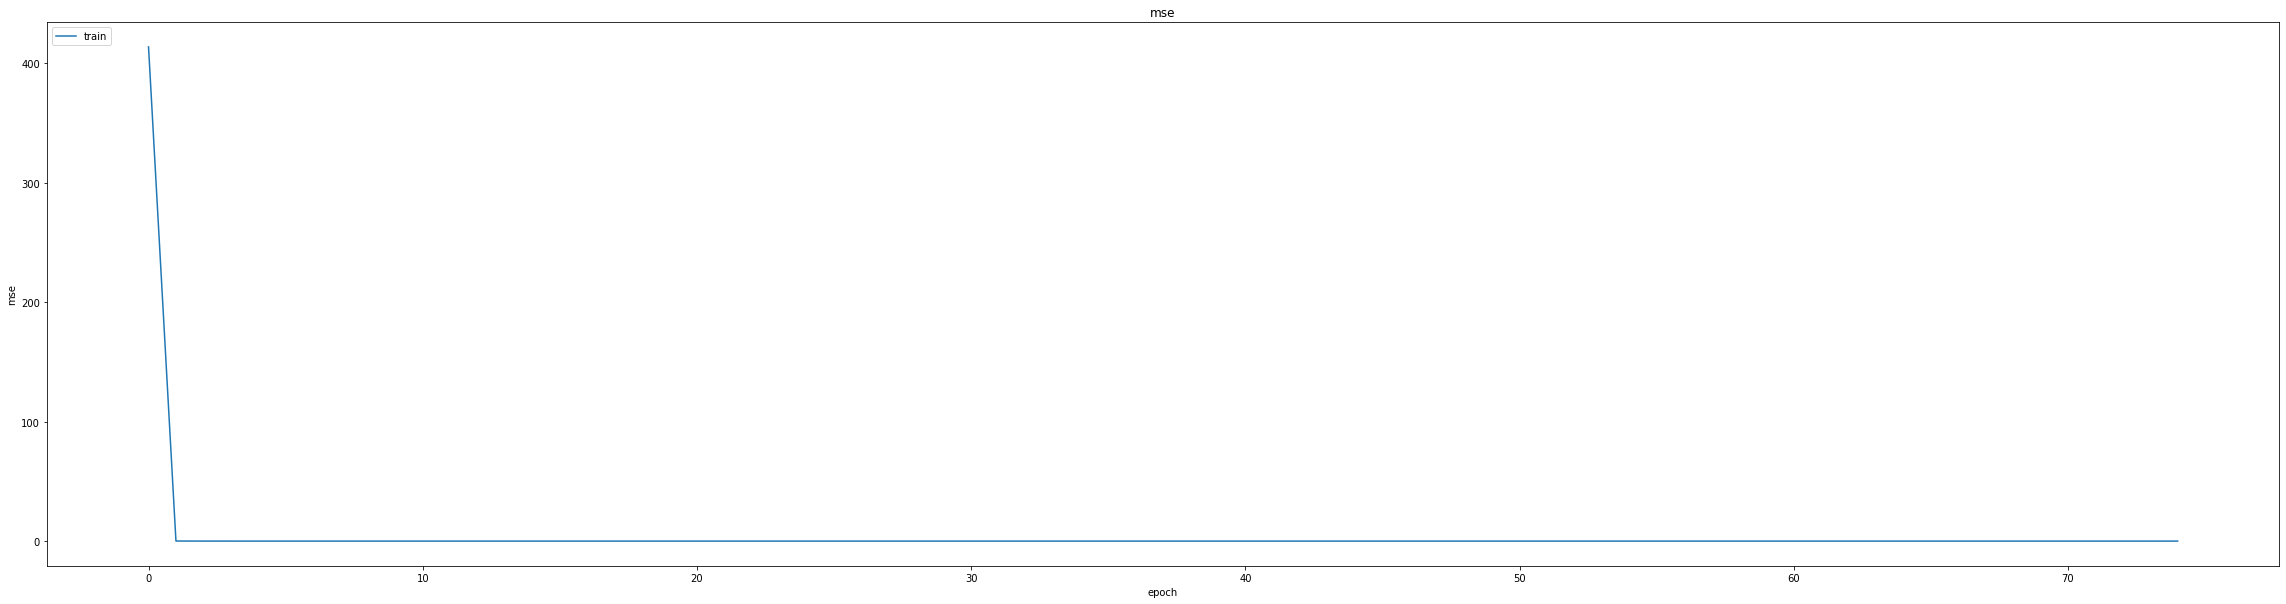

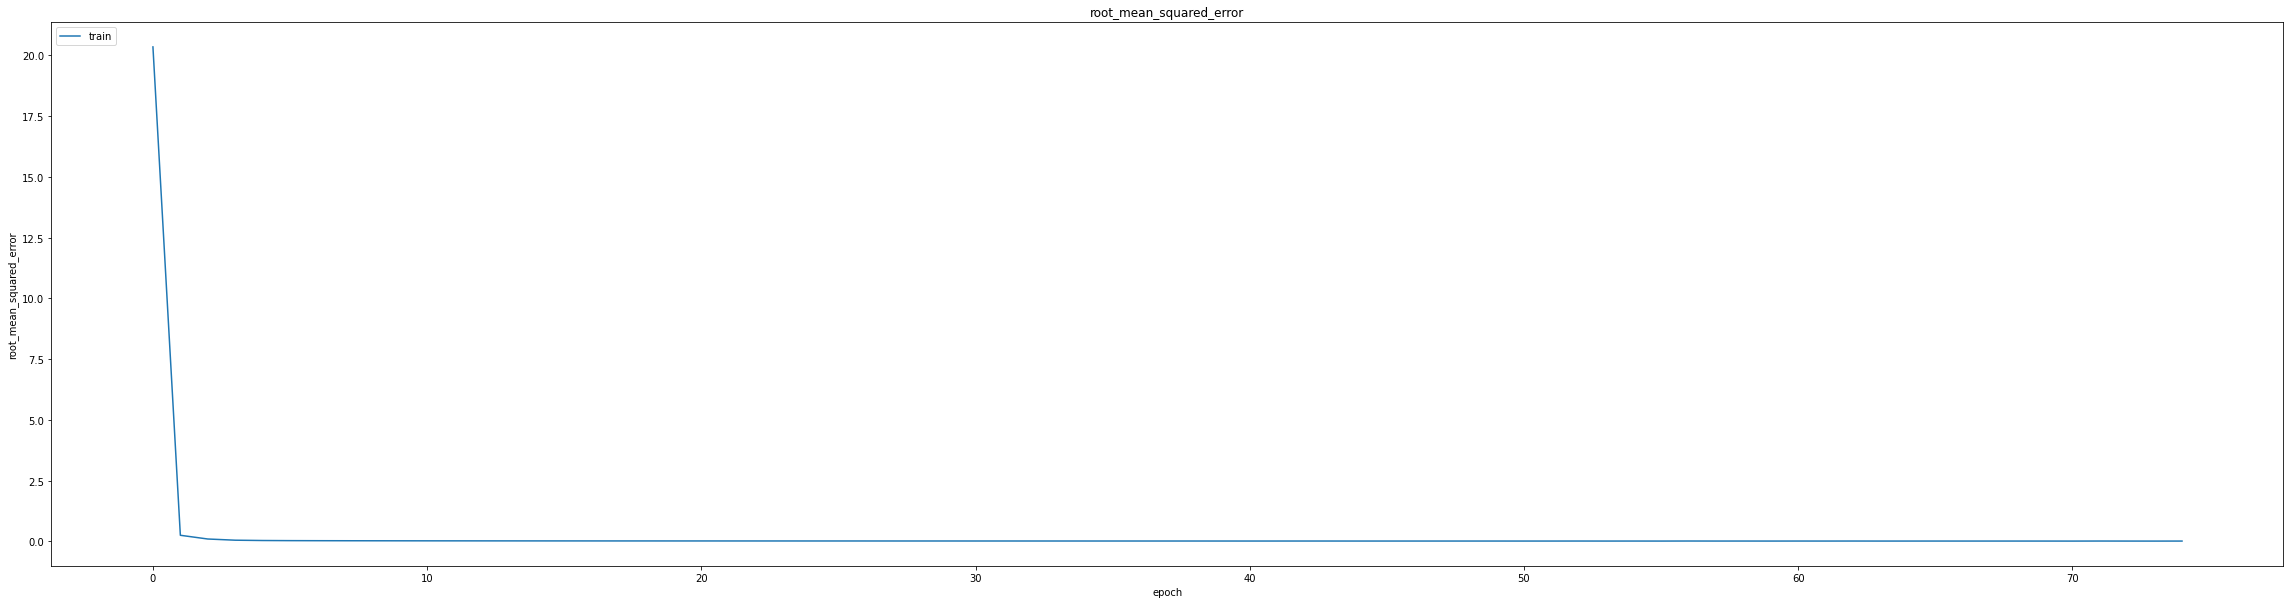

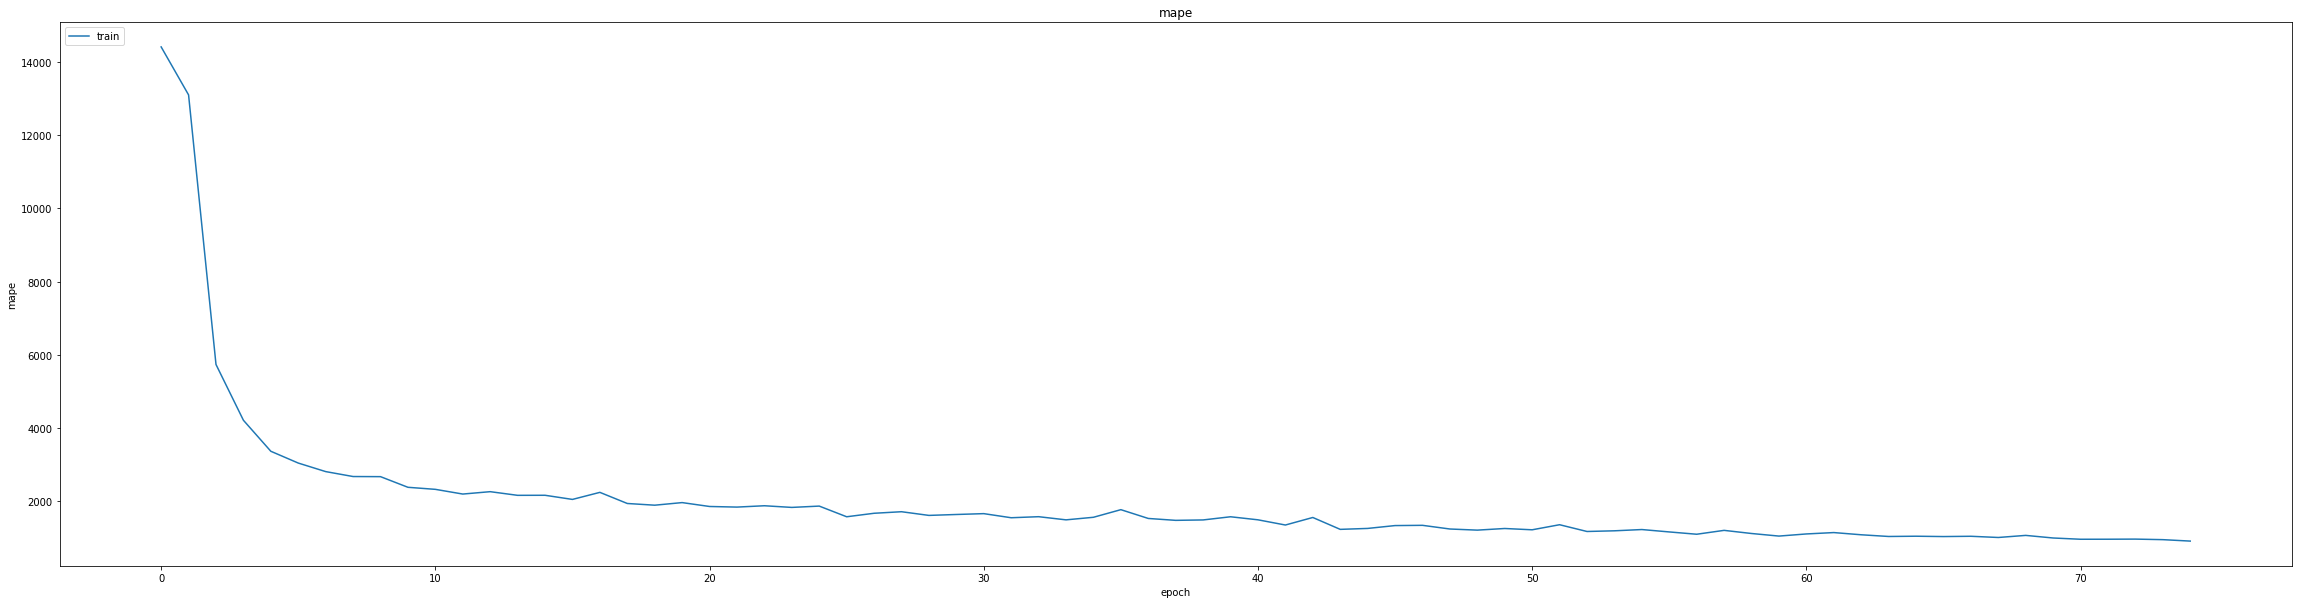

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.0033241526689380407
0.004975996911525726
464/464 [==============================] - 2s 5ms/step
0.9995678551718177


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
347/348 [============================>.] - ETA: 0s - loss: 3.4154e-04 - mae: 0.0079 - mse: 3.4154e-04 - root_mean_squared_error: 0.0185 - mape: 958.0379
Epoch 1: val_mse did not improve from 0.00004
348/348 [==============================] - 7s 13ms/step - loss: 3.4068e-04 - mae: 0.0079 - mse: 3.4068e-04 - root_mean_squared_error: 0.0185 - mape: 955.4589 - val_loss: 5.6080e-05 - val_mae: 0.0056 - val_mse: 5.6080e-05 - val_root_mean_squared_error: 0.0075 - val_mape: 2735.2803 - lr: 0.0010
Epoch 2/25
345/348 [============================>.] - ETA: 0s - loss: 2.6138e-05 - mae: 0.0038 - mse: 2.6138e-05 - root_mean_squared_error: 0.0051 - mape: 901.3598
Epoch 2: val_mse improved from 0.00004 to 0.00004, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 29ms/step - loss: 2.6108e-05 - mae: 0.0038 - mse: 2.6108e-05 - root_mean_squared_error: 0.0051 - mape: 893.7581 - val_loss: 3.7364e-05 - val_mae: 0.0041 - val_mse: 3.7364e-05 - val_root_mean_squared_error: 0.0061 - val_mape: 2684.3281 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/25
348/348 [==============================] - ETA: 0s - loss: 2.4862e-05 - mae: 0.0037 - mse: 2.4862e-05 - root_mean_squared_error: 0.0050 - mape: 831.7961
Epoch 3: val_mse did not improve from 0.00004
348/348 [==============================] - 3s 10ms/step - loss: 2.4862e-05 - mae: 0.0037 - mse: 2.4862e-05 - root_mean_squared_error: 0.0050 - mape: 831.7961 - val_loss: 6.4728e-05 - val_mae: 0.0065 - val_mse: 6.4728e-05 - val_root_mean_squared_error: 0.0080 - val_mape: 2422.3982 - lr: 9.0000e-04
Epoch 4/25
345/348 [============================>.] - ETA: 0s - loss: 3.0504e-05 - mae: 0.0042 - mse: 3.0504e-05 - root_mean_squared_error: 0.0055 - mape: 775.17

348/348 [==============================] - 10s 30ms/step - loss: 3.8495e-05 - mae: 0.0047 - mse: 3.8495e-05 - root_mean_squared_error: 0.0062 - mape: 724.4498 - val_loss: 3.5573e-05 - val_mae: 0.0040 - val_mse: 3.5573e-05 - val_root_mean_squared_error: 0.0060 - val_mape: 2295.0569 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/25
346/348 [============================>.] - ETA: 0s - loss: 3.2950e-05 - mae: 0.0043 - mse: 3.2950e-05 - root_mean_squared_error: 0.0057 - mape: 718.6100
Epoch 7: val_mse did not improve from 0.00004
348/348 [==============================] - 4s 10ms/step - loss: 3.3139e-05 - mae: 0.0043 - mse: 3.3139e-05 - root_mean_squared_error: 0.0058 - mape: 714.6163 - val_loss: 1.6200e-04 - val_mae: 0.0113 - val_mse: 1.6200e-04 - val_root_mean_squared_error: 0.0127 - val_mape: 2148.2725 - lr: 7.2900e-04
Epoch 8/25
348/348 [==============================] - ETA: 0s - loss: 3.3722e-05 - mae: 0.0045 - mse: 3.3722e-05 - root_mean_squared_error: 0.0058 - mape: 75

348/348 [==============================] - 11s 31ms/step - loss: 2.9411e-05 - mae: 0.0042 - mse: 2.9411e-05 - root_mean_squared_error: 0.0054 - mape: 653.7505 - val_loss: 3.2090e-05 - val_mae: 0.0039 - val_mse: 3.2090e-05 - val_root_mean_squared_error: 0.0057 - val_mape: 2035.2034 - lr: 6.5610e-04
Epoch 10/25
344/348 [============================>.] - ETA: 0s - loss: 4.0253e-05 - mae: 0.0049 - mse: 4.0253e-05 - root_mean_squared_error: 0.0063 - mape: 631.5276
Epoch 10: val_mse did not improve from 0.00003
348/348 [==============================] - 4s 10ms/step - loss: 4.0004e-05 - mae: 0.0049 - mse: 4.0004e-05 - root_mean_squared_error: 0.0063 - mape: 624.3923 - val_loss: 3.5129e-05 - val_mae: 0.0042 - val_mse: 3.5129e-05 - val_root_mean_squared_error: 0.0059 - val_mape: 2055.0259 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/25
347/348 [============================>.] - ETA: 0s - loss: 2.4303e-05 - mae: 0.0037 - mse: 2.4303e-05 - root_mean_squared_error: 0.0049 - mape:

348/348 [==============================] - 10s 29ms/step - loss: 2.7520e-05 - mae: 0.0040 - mse: 2.7520e-05 - root_mean_squared_error: 0.0052 - mape: 595.4537 - val_loss: 2.8615e-05 - val_mae: 0.0036 - val_mse: 2.8615e-05 - val_root_mean_squared_error: 0.0053 - val_mape: 1949.8873 - lr: 5.3144e-04
Epoch 14/25
345/348 [============================>.] - ETA: 0s - loss: 2.6116e-05 - mae: 0.0039 - mse: 2.6116e-05 - root_mean_squared_error: 0.0051 - mape: 576.3179
Epoch 14: val_mse did not improve from 0.00003
348/348 [==============================] - 3s 10ms/step - loss: 2.6038e-05 - mae: 0.0039 - mse: 2.6038e-05 - root_mean_squared_error: 0.0051 - mape: 571.4591 - val_loss: 4.1590e-05 - val_mae: 0.0050 - val_mse: 4.1590e-05 - val_root_mean_squared_error: 0.0064 - val_mape: 1912.0861 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/25
348/348 [==============================] - ETA: 0s - loss: 2.3169e-05 - mae: 0.0036 - mse: 2.3169e-05 - root_mean_squared_error: 0.0048 - mape

348/348 [==============================] - 11s 31ms/step - loss: 2.1162e-05 - mae: 0.0035 - mse: 2.1162e-05 - root_mean_squared_error: 0.0046 - mape: 551.5665 - val_loss: 2.4761e-05 - val_mae: 0.0033 - val_mse: 2.4761e-05 - val_root_mean_squared_error: 0.0050 - val_mape: 1656.2985 - lr: 3.4868e-04
lr changed to 0.00031381062290165574
Epoch 23/25
347/348 [============================>.] - ETA: 0s - loss: 1.9993e-05 - mae: 0.0034 - mse: 1.9993e-05 - root_mean_squared_error: 0.0045 - mape: 576.0559
Epoch 23: val_mse did not improve from 0.00002
348/348 [==============================] - 4s 10ms/step - loss: 2.0013e-05 - mae: 0.0034 - mse: 2.0013e-05 - root_mean_squared_error: 0.0045 - mape: 574.5060 - val_loss: 6.8142e-05 - val_mae: 0.0071 - val_mse: 6.8142e-05 - val_root_mean_squared_error: 0.0083 - val_mape: 1761.4963 - lr: 3.1381e-04
Epoch 24/25
344/348 [============================>.] - ETA: 0s - loss: 1.9385e-05 - mae: 0.0033 - mse: 1.9385e-05 - root_mean_squared_error: 0.0044 - mape

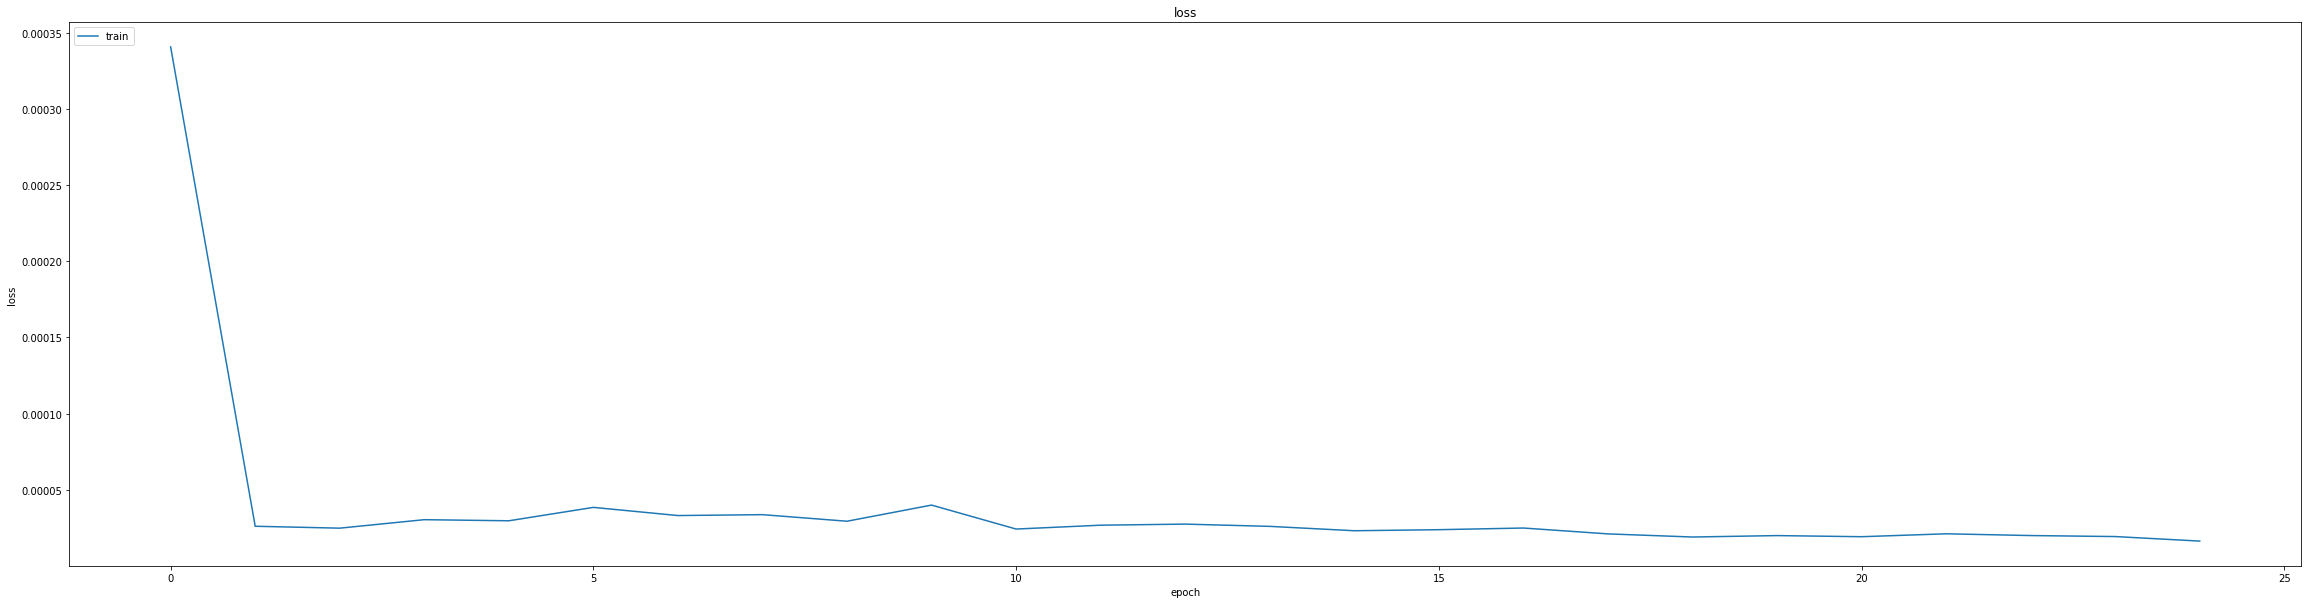

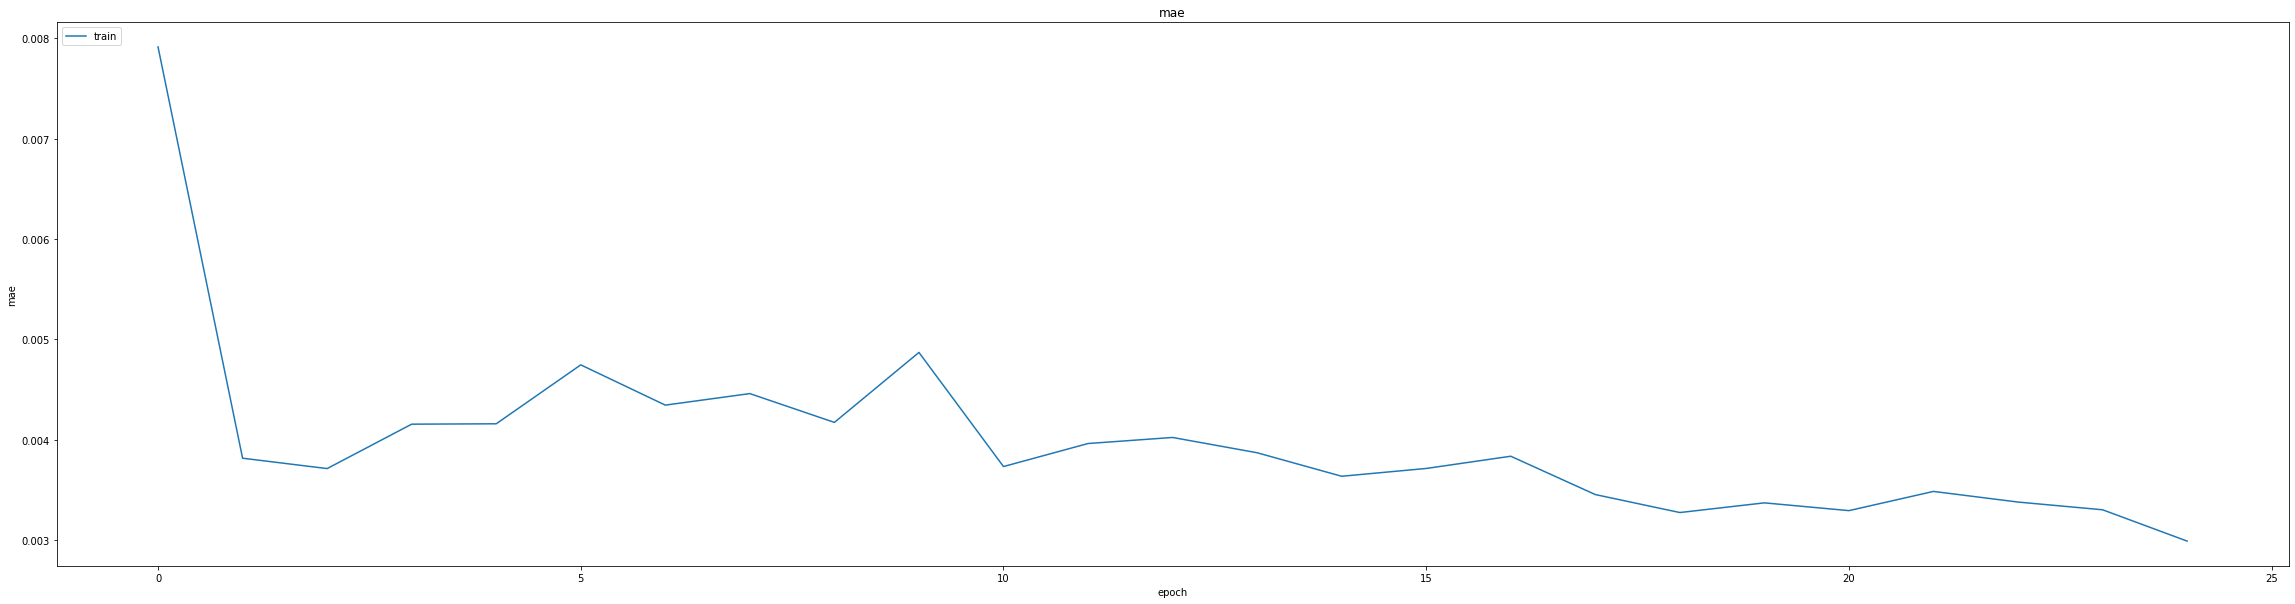

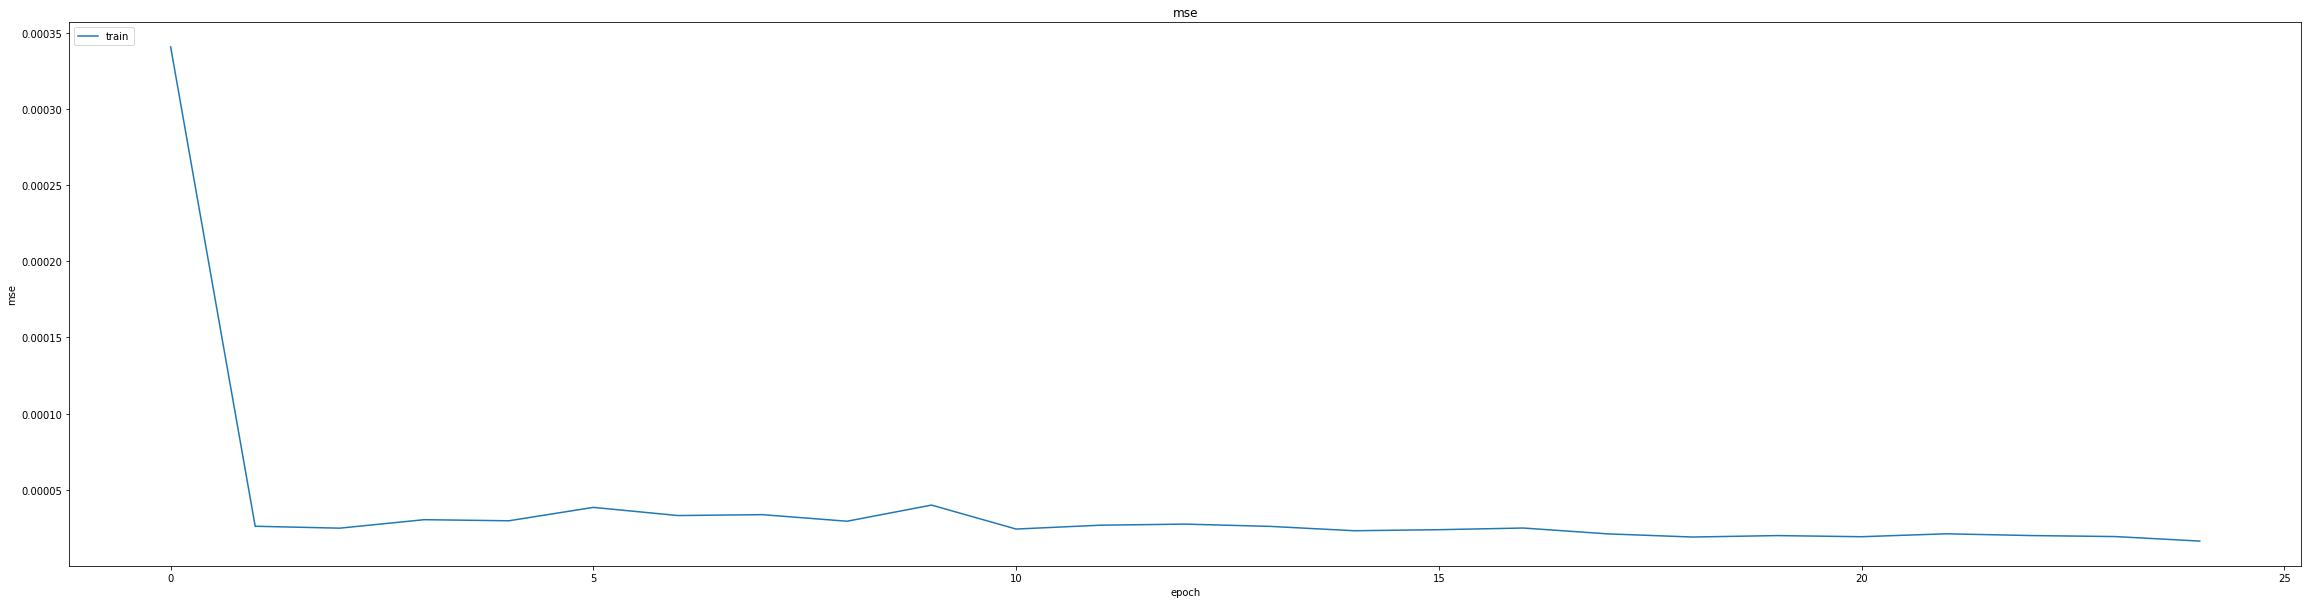

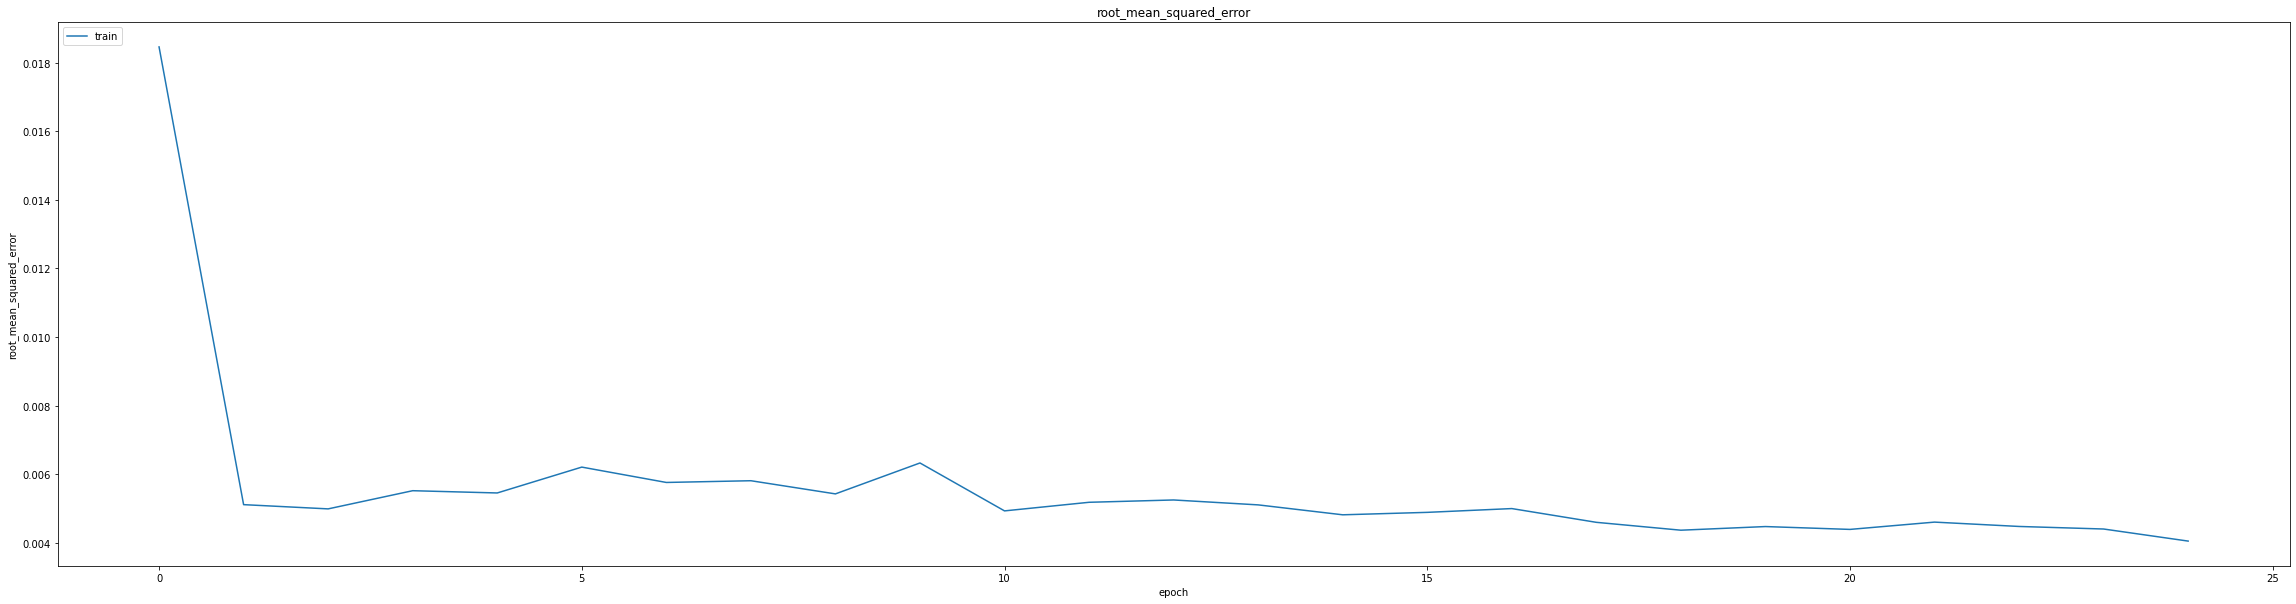

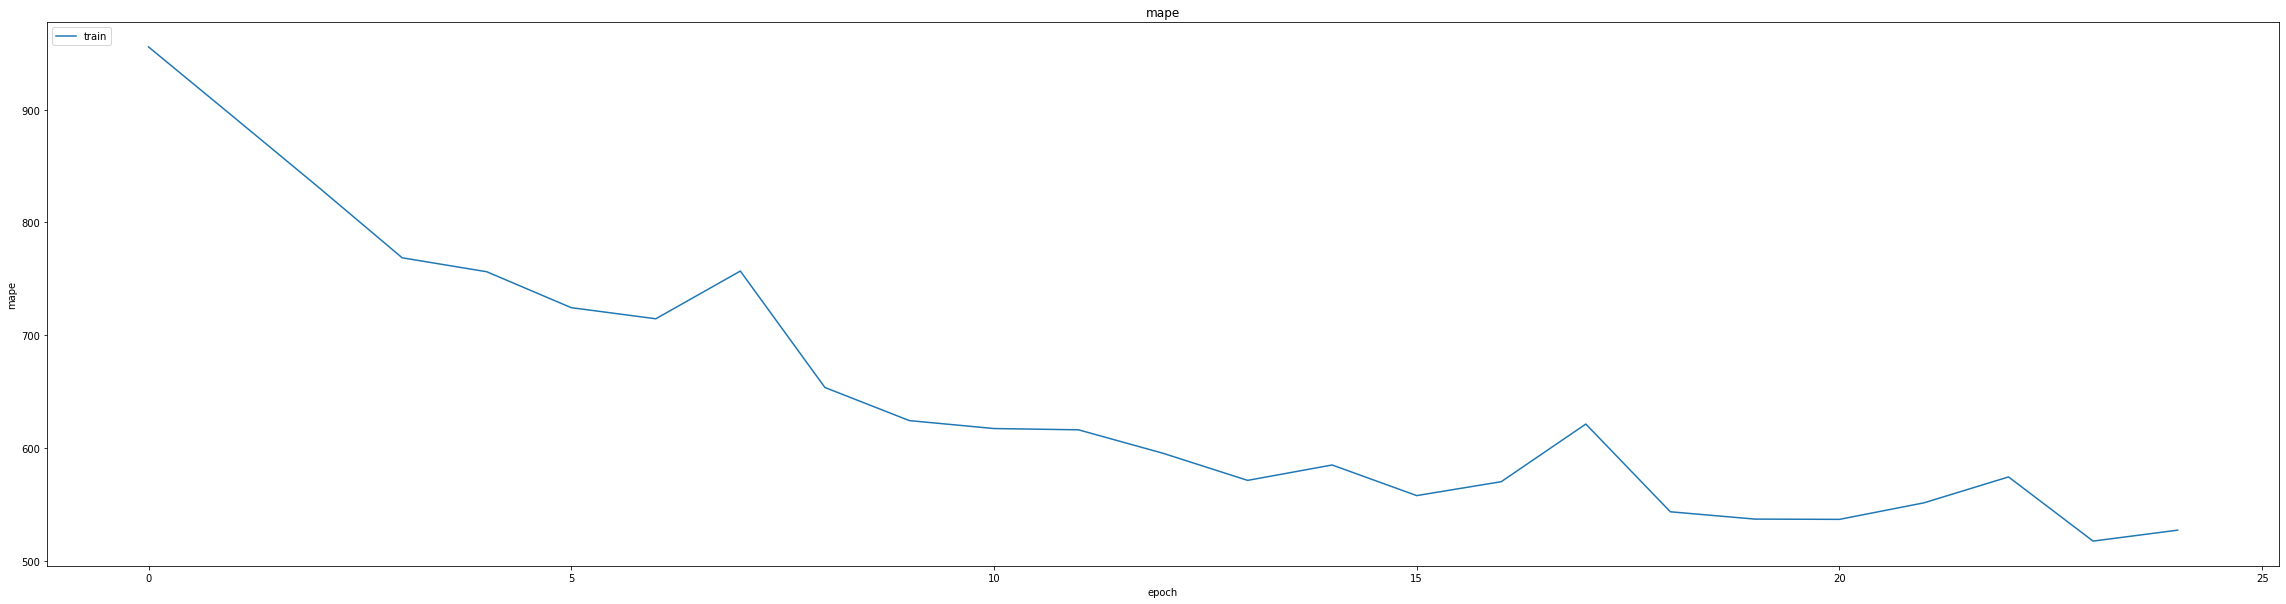

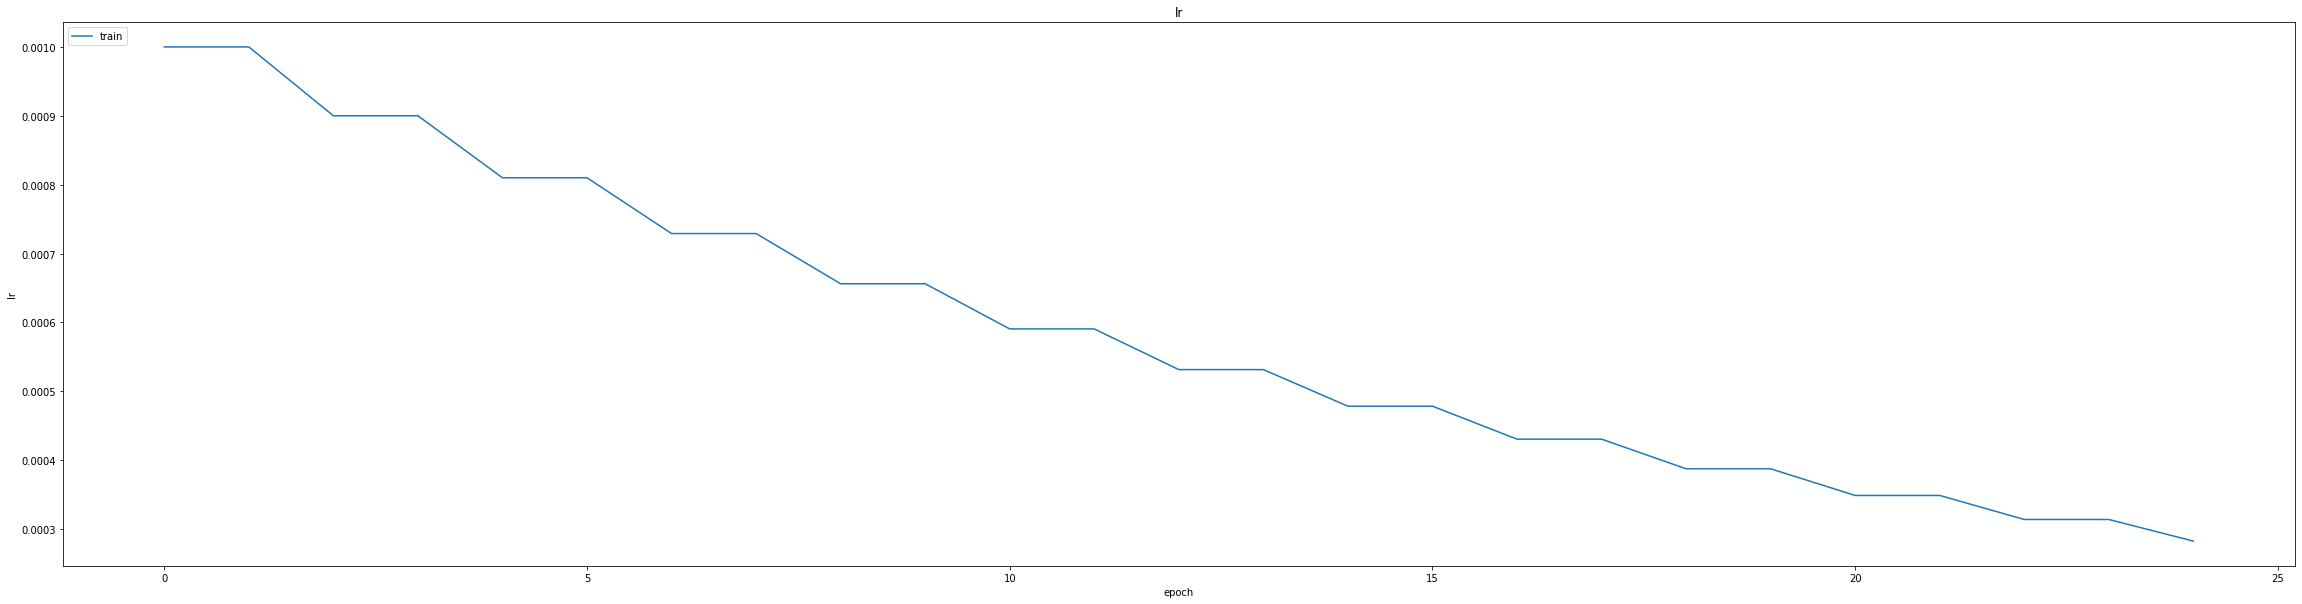

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.0033241526689380407
0.004975996911525726
464/464 [==============================] - 2s 3ms/step
0.9995678551718177


464/464 [==============================] - 2s 3ms/step


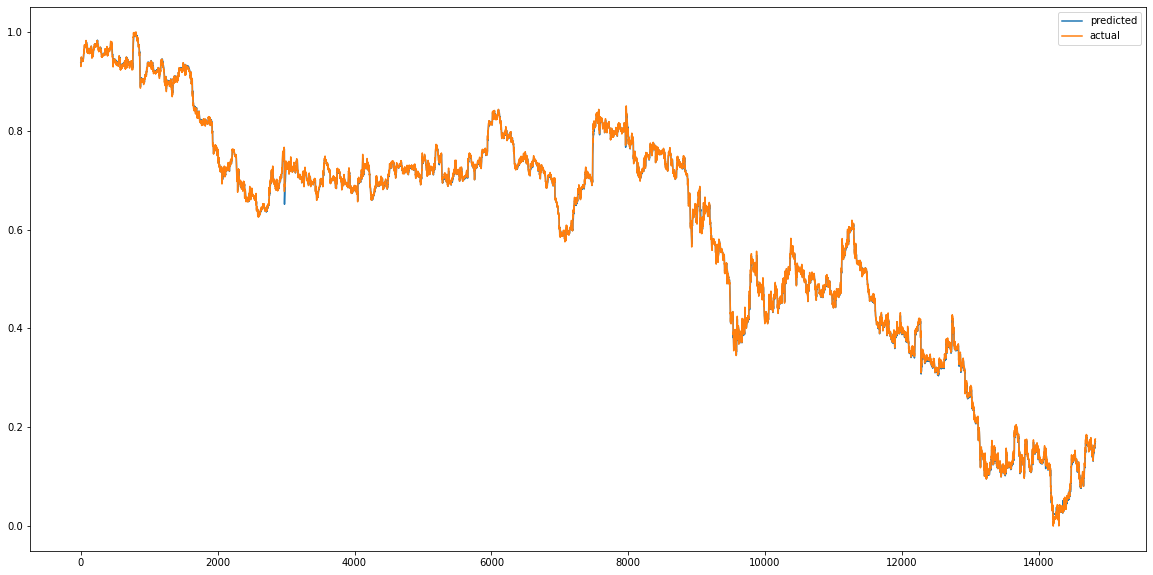

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_15min_CNN_GRU(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


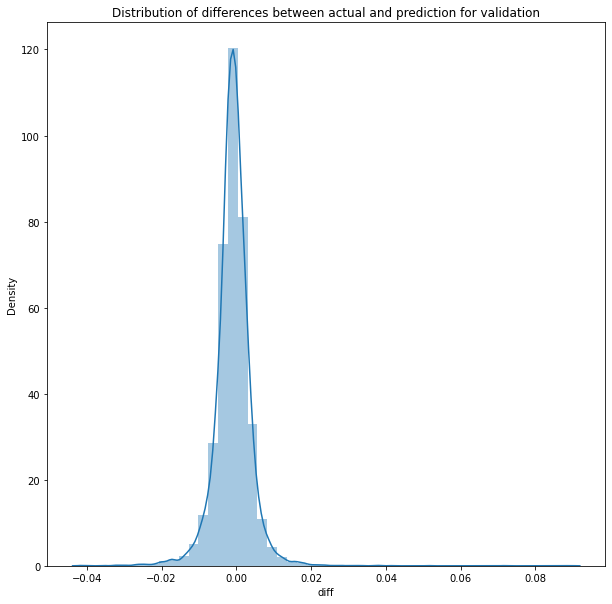

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


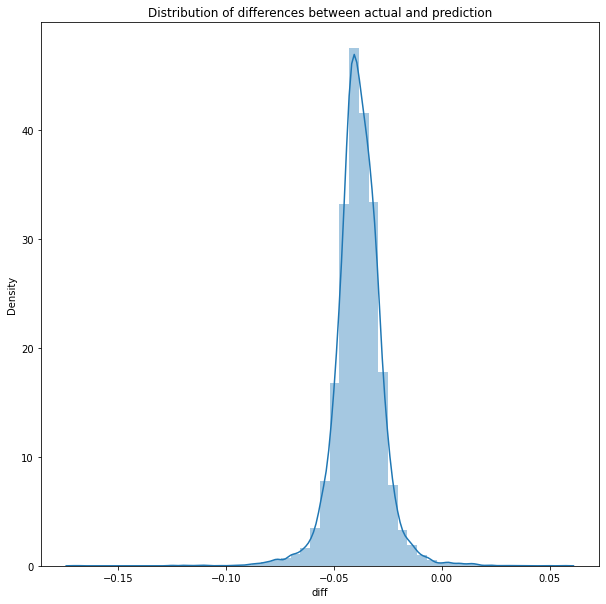

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.001605638495086812
RMSE :  0.04007041920278364
MAE :  0.03868697559924461
464/464 [==============================] - 1s 3ms/step
R2_Score  : 0.9734109073683258


count    14830.000000
mean        -0.038590
std          0.010792
min         -0.169400
25%         -0.044112
50%         -0.038743
75%         -0.032639
max          0.056357
Name: diff, dtype: float64

**BiLSTM_MODEL**

In [ ]:
model= thesis.BiLSTM_Model(x_train)
model.summary()

ValueError: ignored

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
347/348 [============================>.] - ETA: 0s - loss: 582.3217 - mae: 5.6600 - mse: 582.3217 - root_mean_squared_error: 24.1313 - mape: 1274747.6250
Epoch 1: val_mse improved from inf to 0.28279, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 66s 151ms/step - loss: 580.7536 - mae: 5.6462 - mse: 580.7536 - root_mean_squared_error: 24.0988 - mape: 1271313.3750 - val_loss: 0.2828 - val_mae: 0.4719 - val_mse: 0.2828 - val_root_mean_squared_error: 0.5318 - val_mape: 73636.1250
Epoch 2/75
346/348 [============================>.] - ETA: 0s - loss: 0.1904 - mae: 0.3430 - mse: 0.1904 - root_mean_squared_error: 0.4364 - mape: 22927.5469
Epoch 2: val_mse improved from 0.28279 to 0.08228, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 41s 117ms/step - loss: 0.1899 - mae: 0.3424 - mse: 0.1899 - root_mean_squared_error: 0.4358 - mape: 22800.4492 - val_loss: 0.0823 - val_mae: 0.2038 - val_mse: 0.0823 - val_root_mean_squared_error: 0.2868 - val_mape: 51639.9609
Epoch 3/75
346/348 [============================>.] - ETA: 0s - loss: 0.0881 - mae: 0.2202 - mse: 0.0881 - root_mean_squared_error: 0.2968 - mape: 17215.5957
Epoch 3: val_mse improved from 0.08228 to 0.06009, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 0.0881 - mae: 0.2202 - mse: 0.0881 - root_mean_squared_error: 0.2968 - mape: 17120.3770 - val_loss: 0.0601 - val_mae: 0.1922 - val_mse: 0.0601 - val_root_mean_squared_error: 0.2451 - val_mape: 43770.3281
Epoch 4/75
346/348 [============================>.] - ETA: 0s - loss: 0.0727 - mae: 0.2141 - mse: 0.0727 - root_mean_squared_error: 0.2696 - mape: 14463.8164
Epoch 4: val_mse improved from 0.06009 to 0.05854, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 0.0727 - mae: 0.2140 - mse: 0.0727 - root_mean_squared_error: 0.2696 - mape: 14383.6992 - val_loss: 0.0585 - val_mae: 0.2019 - val_mse: 0.0585 - val_root_mean_squared_error: 0.2420 - val_mape: 40428.1406
Epoch 5/75
348/348 [==============================] - ETA: 0s - loss: 0.0699 - mae: 0.2193 - mse: 0.0699 - root_mean_squared_error: 0.2643 - mape: 13112.7139
Epoch 5: val_mse did not improve from 0.05854
348/348 [==============================] - 8s 23ms/step - loss: 0.0699 - mae: 0.2193 - mse: 0.0699 - root_mean_squared_error: 0.2643 - mape: 13112.7139 - val_loss: 0.0592 - val_mae: 0.2064 - val_mse: 0.0592 - val_root_mean_squared_error: 0.2432 - val_mape: 39103.4570
Epoch 6/75
346/348 [============================>.] - ETA: 0s - loss: 0.0695 - mae: 0.2220 - mse: 0.0695 - root_mean_squared_error: 0.2637 - mape: 12112.5195
Epoch 6: val_mse did not improve from 0.05854
348/348 [==============================] - 7s 20ms/ste

348/348 [==============================] - 41s 117ms/step - loss: 0.0684 - mae: 0.2215 - mse: 0.0684 - root_mean_squared_error: 0.2616 - mape: 15178.4756 - val_loss: 0.0585 - val_mae: 0.2063 - val_mse: 0.0585 - val_root_mean_squared_error: 0.2419 - val_mape: 38289.8438
Epoch 11/75
347/348 [============================>.] - ETA: 0s - loss: 0.0680 - mae: 0.2207 - mse: 0.0680 - root_mean_squared_error: 0.2608 - mape: 13161.0791
Epoch 11: val_mse improved from 0.05852 to 0.05792, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 41s 117ms/step - loss: 0.0680 - mae: 0.2207 - mse: 0.0680 - root_mean_squared_error: 0.2608 - mape: 13125.8584 - val_loss: 0.0579 - val_mae: 0.2052 - val_mse: 0.0579 - val_root_mean_squared_error: 0.2407 - val_mape: 38148.5742
Epoch 12/75
346/348 [============================>.] - ETA: 0s - loss: 0.0670 - mae: 0.2186 - mse: 0.0670 - root_mean_squared_error: 0.2589 - mape: 14066.8643
Epoch 12: val_mse improved from 0.05792 to 0.05616, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 115ms/step - loss: 0.0670 - mae: 0.2186 - mse: 0.0670 - root_mean_squared_error: 0.2589 - mape: 13988.9775 - val_loss: 0.0562 - val_mae: 0.2019 - val_mse: 0.0562 - val_root_mean_squared_error: 0.2370 - val_mape: 37606.5039
Epoch 13/75
347/348 [============================>.] - ETA: 0s - loss: 0.0625 - mae: 0.2099 - mse: 0.0625 - root_mean_squared_error: 0.2500 - mape: 14778.9902
Epoch 13: val_mse improved from 0.05616 to 0.05062, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 116ms/step - loss: 0.0625 - mae: 0.2099 - mse: 0.0625 - root_mean_squared_error: 0.2499 - mape: 14739.3301 - val_loss: 0.0506 - val_mae: 0.1899 - val_mse: 0.0506 - val_root_mean_squared_error: 0.2250 - val_mape: 36362.5195
Epoch 14/75
346/348 [============================>.] - ETA: 0s - loss: 0.0545 - mae: 0.1930 - mse: 0.0545 - root_mean_squared_error: 0.2333 - mape: 11229.3721
Epoch 14: val_mse improved from 0.05062 to 0.04226, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 115ms/step - loss: 0.0545 - mae: 0.1930 - mse: 0.0545 - root_mean_squared_error: 0.2334 - mape: 11167.4258 - val_loss: 0.0423 - val_mae: 0.1692 - val_mse: 0.0423 - val_root_mean_squared_error: 0.2056 - val_mape: 34502.8750
Epoch 15/75
348/348 [==============================] - ETA: 0s - loss: 0.0445 - mae: 0.1706 - mse: 0.0445 - root_mean_squared_error: 0.2110 - mape: 11501.1104
Epoch 15: val_mse improved from 0.04226 to 0.03243, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 116ms/step - loss: 0.0445 - mae: 0.1706 - mse: 0.0445 - root_mean_squared_error: 0.2110 - mape: 11501.1104 - val_loss: 0.0324 - val_mae: 0.1422 - val_mse: 0.0324 - val_root_mean_squared_error: 0.1801 - val_mape: 31967.3770
Epoch 16/75
348/348 [==============================] - ETA: 0s - loss: 0.0339 - mae: 0.1452 - mse: 0.0339 - root_mean_squared_error: 0.1842 - mape: 9554.1904
Epoch 16: val_mse improved from 0.03243 to 0.02365, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 115ms/step - loss: 0.0339 - mae: 0.1452 - mse: 0.0339 - root_mean_squared_error: 0.1842 - mape: 9554.1904 - val_loss: 0.0237 - val_mae: 0.1187 - val_mse: 0.0237 - val_root_mean_squared_error: 0.1538 - val_mape: 28939.2852
Epoch 17/75
348/348 [==============================] - ETA: 0s - loss: 0.0247 - mae: 0.1230 - mse: 0.0247 - root_mean_squared_error: 0.1571 - mape: 9580.5547
Epoch 17: val_mse improved from 0.02365 to 0.01692, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 116ms/step - loss: 0.0247 - mae: 0.1230 - mse: 0.0247 - root_mean_squared_error: 0.1571 - mape: 9580.5547 - val_loss: 0.0169 - val_mae: 0.0968 - val_mse: 0.0169 - val_root_mean_squared_error: 0.1301 - val_mape: 25274.9453
Epoch 18/75
346/348 [============================>.] - ETA: 0s - loss: 0.0176 - mae: 0.1040 - mse: 0.0176 - root_mean_squared_error: 0.1325 - mape: 8827.2695
Epoch 18: val_mse improved from 0.01692 to 0.01489, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 116ms/step - loss: 0.0176 - mae: 0.1040 - mse: 0.0176 - root_mean_squared_error: 0.1325 - mape: 8778.3740 - val_loss: 0.0149 - val_mae: 0.1047 - val_mse: 0.0149 - val_root_mean_squared_error: 0.1220 - val_mape: 22263.6934
Epoch 19/75
347/348 [============================>.] - ETA: 0s - loss: 0.0118 - mae: 0.0845 - mse: 0.0118 - root_mean_squared_error: 0.1085 - mape: 7098.0215
Epoch 19: val_mse improved from 0.01489 to 0.00938, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 114ms/step - loss: 0.0118 - mae: 0.0844 - mse: 0.0118 - root_mean_squared_error: 0.1085 - mape: 7078.9624 - val_loss: 0.0094 - val_mae: 0.0781 - val_mse: 0.0094 - val_root_mean_squared_error: 0.0968 - val_mape: 19845.0391
Epoch 20/75
348/348 [==============================] - ETA: 0s - loss: 0.0087 - mae: 0.0726 - mse: 0.0087 - root_mean_squared_error: 0.0933 - mape: 6115.3306
Epoch 20: val_mse improved from 0.00938 to 0.00788, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 114ms/step - loss: 0.0087 - mae: 0.0726 - mse: 0.0087 - root_mean_squared_error: 0.0933 - mape: 6115.3306 - val_loss: 0.0079 - val_mae: 0.0743 - val_mse: 0.0079 - val_root_mean_squared_error: 0.0888 - val_mape: 17987.8223
Epoch 21/75
346/348 [============================>.] - ETA: 0s - loss: 0.0071 - mae: 0.0658 - mse: 0.0071 - root_mean_squared_error: 0.0842 - mape: 6094.0947
Epoch 21: val_mse improved from 0.00788 to 0.00440, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 114ms/step - loss: 0.0071 - mae: 0.0657 - mse: 0.0071 - root_mean_squared_error: 0.0841 - mape: 6060.2896 - val_loss: 0.0044 - val_mae: 0.0464 - val_mse: 0.0044 - val_root_mean_squared_error: 0.0663 - val_mape: 16501.3867
Epoch 22/75
346/348 [============================>.] - ETA: 0s - loss: 0.0059 - mae: 0.0603 - mse: 0.0059 - root_mean_squared_error: 0.0769 - mape: 5277.3203
Epoch 22: val_mse improved from 0.00440 to 0.00378, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 114ms/step - loss: 0.0059 - mae: 0.0603 - mse: 0.0059 - root_mean_squared_error: 0.0768 - mape: 5248.0508 - val_loss: 0.0038 - val_mae: 0.0475 - val_mse: 0.0038 - val_root_mean_squared_error: 0.0615 - val_mape: 15318.4980
Epoch 23/75
348/348 [==============================] - ETA: 0s - loss: 0.0050 - mae: 0.0557 - mse: 0.0050 - root_mean_squared_error: 0.0706 - mape: 5678.1997
Epoch 23: val_mse improved from 0.00378 to 0.00328, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 115ms/step - loss: 0.0050 - mae: 0.0557 - mse: 0.0050 - root_mean_squared_error: 0.0706 - mape: 5678.1997 - val_loss: 0.0033 - val_mae: 0.0483 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0572 - val_mape: 14266.8418
Epoch 24/75
347/348 [============================>.] - ETA: 0s - loss: 0.0043 - mae: 0.0516 - mse: 0.0043 - root_mean_squared_error: 0.0653 - mape: 4840.9556
Epoch 24: val_mse improved from 0.00328 to 0.00198, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 116ms/step - loss: 0.0043 - mae: 0.0516 - mse: 0.0043 - root_mean_squared_error: 0.0653 - mape: 4827.9502 - val_loss: 0.0020 - val_mae: 0.0333 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0445 - val_mape: 13344.0137
Epoch 25/75
347/348 [============================>.] - ETA: 0s - loss: 0.0037 - mae: 0.0480 - mse: 0.0037 - root_mean_squared_error: 0.0611 - mape: 4697.2231
Epoch 25: val_mse did not improve from 0.00198
348/348 [==============================] - 7s 20ms/step - loss: 0.0037 - mae: 0.0480 - mse: 0.0037 - root_mean_squared_error: 0.0611 - mape: 4684.6084 - val_loss: 0.0020 - val_mae: 0.0370 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0448 - val_mape: 12481.5264
Epoch 26/75
348/348 [==============================] - ETA: 0s - loss: 0.0033 - mae: 0.0453 - mse: 0.0033 - root_mean_squared_error: 0.0578 - mape: 3749.7539
Epoch 26: val_mse improved from 0.00198 to 0.00112, saving model to /content/drive/MyDrive/modelweigh

348/348 [==============================] - 40s 115ms/step - loss: 0.0033 - mae: 0.0453 - mse: 0.0033 - root_mean_squared_error: 0.0578 - mape: 3749.7539 - val_loss: 0.0011 - val_mae: 0.0216 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0334 - val_mape: 11796.4297
Epoch 27/75
346/348 [============================>.] - ETA: 0s - loss: 0.0029 - mae: 0.0422 - mse: 0.0029 - root_mean_squared_error: 0.0541 - mape: 3860.4563
Epoch 27: val_mse improved from 0.00112 to 0.00092, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 114ms/step - loss: 0.0029 - mae: 0.0422 - mse: 0.0029 - root_mean_squared_error: 0.0541 - mape: 3839.0361 - val_loss: 9.1888e-04 - val_mae: 0.0197 - val_mse: 9.1888e-04 - val_root_mean_squared_error: 0.0303 - val_mape: 11291.6230
Epoch 28/75
347/348 [============================>.] - ETA: 0s - loss: 0.0026 - mae: 0.0401 - mse: 0.0026 - root_mean_squared_error: 0.0514 - mape: 3607.9866
Epoch 28: val_mse did not improve from 0.00092
348/348 [==============================] - 7s 20ms/step - loss: 0.0026 - mae: 0.0402 - mse: 0.0026 - root_mean_squared_error: 0.0514 - mape: 3598.3354 - val_loss: 0.0010 - val_mae: 0.0256 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0324 - val_mape: 10825.1514
Epoch 29/75
346/348 [============================>.] - ETA: 0s - loss: 0.0024 - mae: 0.0379 - mse: 0.0024 - root_mean_squared_error: 0.0485 - mape: 3511.9504
Epoch 29: val_mse improved from 0.00092 to 0.00081, saving model to /content/drive/MyDrive/mo

348/348 [==============================] - 40s 115ms/step - loss: 0.0024 - mae: 0.0379 - mse: 0.0024 - root_mean_squared_error: 0.0485 - mape: 3492.4573 - val_loss: 8.0821e-04 - val_mae: 0.0210 - val_mse: 8.0821e-04 - val_root_mean_squared_error: 0.0284 - val_mape: 10375.4580
Epoch 30/75
347/348 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0360 - mse: 0.0021 - root_mean_squared_error: 0.0462 - mape: 3825.5803
Epoch 30: val_mse did not improve from 0.00081
348/348 [==============================] - 7s 20ms/step - loss: 0.0021 - mae: 0.0360 - mse: 0.0021 - root_mean_squared_error: 0.0462 - mape: 3815.2935 - val_loss: 0.0010 - val_mae: 0.0265 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0316 - val_mape: 9971.9492
Epoch 31/75
346/348 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0342 - mse: 0.0019 - root_mean_squared_error: 0.0439 - mape: 3156.0762
Epoch 31: val_mse improved from 0.00081 to 0.00065, saving model to /content/drive/MyDrive/mod

348/348 [==============================] - 39s 113ms/step - loss: 0.0019 - mae: 0.0342 - mse: 0.0019 - root_mean_squared_error: 0.0439 - mape: 3138.5493 - val_loss: 6.5046e-04 - val_mae: 0.0187 - val_mse: 6.5046e-04 - val_root_mean_squared_error: 0.0255 - val_mape: 9588.7275
Epoch 32/75
347/348 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0319 - mse: 0.0017 - root_mean_squared_error: 0.0411 - mape: 3354.7212
Epoch 32: val_mse improved from 0.00065 to 0.00050, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 112ms/step - loss: 0.0017 - mae: 0.0319 - mse: 0.0017 - root_mean_squared_error: 0.0411 - mape: 3345.7039 - val_loss: 4.9608e-04 - val_mae: 0.0157 - val_mse: 4.9608e-04 - val_root_mean_squared_error: 0.0223 - val_mape: 9289.6582
Epoch 33/75
348/348 [==============================] - ETA: 0s - loss: 0.0015 - mae: 0.0301 - mse: 0.0015 - root_mean_squared_error: 0.0386 - mape: 3150.6162
Epoch 33: val_mse improved from 0.00050 to 0.00047, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 38s 111ms/step - loss: 0.0015 - mae: 0.0301 - mse: 0.0015 - root_mean_squared_error: 0.0386 - mape: 3150.6162 - val_loss: 4.7455e-04 - val_mae: 0.0148 - val_mse: 4.7455e-04 - val_root_mean_squared_error: 0.0218 - val_mape: 8834.3525
Epoch 34/75
347/348 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0284 - mse: 0.0013 - root_mean_squared_error: 0.0365 - mape: 2645.5457
Epoch 34: val_mse did not improve from 0.00047
348/348 [==============================] - 8s 22ms/step - loss: 0.0013 - mae: 0.0284 - mse: 0.0013 - root_mean_squared_error: 0.0365 - mape: 2638.4407 - val_loss: 4.9554e-04 - val_mae: 0.0167 - val_mse: 4.9554e-04 - val_root_mean_squared_error: 0.0223 - val_mape: 8513.8877
Epoch 35/75
347/348 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0264 - mse: 0.0012 - root_mean_squared_error: 0.0340 - mape: 3173.8286
Epoch 35: val_mse improved from 0.00047 to 0.00032, saving model to /content/drive/MyDr

348/348 [==============================] - 39s 112ms/step - loss: 0.0012 - mae: 0.0264 - mse: 0.0012 - root_mean_squared_error: 0.0340 - mape: 3165.2991 - val_loss: 3.2264e-04 - val_mae: 0.0115 - val_mse: 3.2264e-04 - val_root_mean_squared_error: 0.0180 - val_mape: 8219.1611
Epoch 36/75
348/348 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0260 - mse: 0.0011 - root_mean_squared_error: 0.0333 - mape: 2864.4688
Epoch 36: val_mse did not improve from 0.00032
348/348 [==============================] - 7s 20ms/step - loss: 0.0011 - mae: 0.0260 - mse: 0.0011 - root_mean_squared_error: 0.0333 - mape: 2864.4688 - val_loss: 6.8538e-04 - val_mae: 0.0221 - val_mse: 6.8538e-04 - val_root_mean_squared_error: 0.0262 - val_mape: 7859.2969
Epoch 37/75
348/348 [==============================] - ETA: 0s - loss: 9.8152e-04 - mae: 0.0245 - mse: 9.8152e-04 - root_mean_squared_error: 0.0313 - mape: 2732.2866
Epoch 37: val_mse did not improve from 0.00032
348/348 [=======================

348/348 [==============================] - 40s 115ms/step - loss: 8.2992e-04 - mae: 0.0224 - mse: 8.2992e-04 - root_mean_squared_error: 0.0288 - mape: 2601.3245 - val_loss: 3.0918e-04 - val_mae: 0.0120 - val_mse: 3.0918e-04 - val_root_mean_squared_error: 0.0176 - val_mape: 7345.8140
Epoch 39/75
347/348 [============================>.] - ETA: 0s - loss: 7.5802e-04 - mae: 0.0215 - mse: 7.5802e-04 - root_mean_squared_error: 0.0275 - mape: 2382.6509
Epoch 39: val_mse did not improve from 0.00031
348/348 [==============================] - 7s 20ms/step - loss: 7.5773e-04 - mae: 0.0215 - mse: 7.5773e-04 - root_mean_squared_error: 0.0275 - mape: 2376.2451 - val_loss: 4.1451e-04 - val_mae: 0.0159 - val_mse: 4.1451e-04 - val_root_mean_squared_error: 0.0204 - val_mape: 7158.1982
Epoch 40/75
346/348 [============================>.] - ETA: 0s - loss: 6.5988e-04 - mae: 0.0200 - mse: 6.5988e-04 - root_mean_squared_error: 0.0257 - mape: 2332.4270
Epoch 40: val_mse did not improve from 0.00031
348/348 

348/348 [==============================] - 39s 113ms/step - loss: 5.9484e-04 - mae: 0.0190 - mse: 5.9484e-04 - root_mean_squared_error: 0.0244 - mape: 2197.5950 - val_loss: 2.9068e-04 - val_mae: 0.0123 - val_mse: 2.9068e-04 - val_root_mean_squared_error: 0.0170 - val_mape: 6732.4482
Epoch 42/75
346/348 [============================>.] - ETA: 0s - loss: 5.2789e-04 - mae: 0.0179 - mse: 5.2789e-04 - root_mean_squared_error: 0.0230 - mape: 2414.4775
Epoch 42: val_mse improved from 0.00029 to 0.00023, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 113ms/step - loss: 5.2711e-04 - mae: 0.0179 - mse: 5.2711e-04 - root_mean_squared_error: 0.0230 - mape: 2401.0649 - val_loss: 2.2579e-04 - val_mae: 0.0100 - val_mse: 2.2579e-04 - val_root_mean_squared_error: 0.0150 - val_mape: 6593.9966
Epoch 43/75
346/348 [============================>.] - ETA: 0s - loss: 4.5292e-04 - mae: 0.0166 - mse: 4.5292e-04 - root_mean_squared_error: 0.0213 - mape: 2325.5273
Epoch 43: val_mse did not improve from 0.00023
348/348 [==============================] - 7s 20ms/step - loss: 4.5254e-04 - mae: 0.0165 - mse: 4.5254e-04 - root_mean_squared_error: 0.0213 - mape: 2312.5991 - val_loss: 2.8669e-04 - val_mae: 0.0129 - val_mse: 2.8669e-04 - val_root_mean_squared_error: 0.0169 - val_mape: 6336.9380
Epoch 44/75
346/348 [============================>.] - ETA: 0s - loss: 4.2663e-04 - mae: 0.0161 - mse: 4.2663e-04 - root_mean_squared_error: 0.0207 - mape: 2125.8994
Epoch 44: val_mse did not improve from 0.00023
348/348 

348/348 [==============================] - 39s 111ms/step - loss: 3.9760e-04 - mae: 0.0155 - mse: 3.9760e-04 - root_mean_squared_error: 0.0199 - mape: 2188.5518 - val_loss: 2.0191e-04 - val_mae: 0.0096 - val_mse: 2.0191e-04 - val_root_mean_squared_error: 0.0142 - val_mape: 6091.8701
Epoch 46/75
348/348 [==============================] - ETA: 0s - loss: 3.3805e-04 - mae: 0.0143 - mse: 3.3805e-04 - root_mean_squared_error: 0.0184 - mape: 2083.0215
Epoch 46: val_mse did not improve from 0.00020
348/348 [==============================] - 8s 22ms/step - loss: 3.3805e-04 - mae: 0.0143 - mse: 3.3805e-04 - root_mean_squared_error: 0.0184 - mape: 2083.0215 - val_loss: 2.7552e-04 - val_mae: 0.0130 - val_mse: 2.7552e-04 - val_root_mean_squared_error: 0.0166 - val_mape: 5923.8203
Epoch 47/75
348/348 [==============================] - ETA: 0s - loss: 3.2741e-04 - mae: 0.0141 - mse: 3.2741e-04 - root_mean_squared_error: 0.0181 - mape: 1919.1416
Epoch 47: val_mse did not improve from 0.00020
348/348 

348/348 [==============================] - 40s 116ms/step - loss: 2.9916e-04 - mae: 0.0135 - mse: 2.9916e-04 - root_mean_squared_error: 0.0173 - mape: 2062.0786 - val_loss: 1.8394e-04 - val_mae: 0.0097 - val_mse: 1.8394e-04 - val_root_mean_squared_error: 0.0136 - val_mape: 5643.4492
Epoch 49/75
346/348 [============================>.] - ETA: 0s - loss: 2.6502e-04 - mae: 0.0127 - mse: 2.6502e-04 - root_mean_squared_error: 0.0163 - mape: 1958.8845
Epoch 49: val_mse did not improve from 0.00018
348/348 [==============================] - 7s 21ms/step - loss: 2.6580e-04 - mae: 0.0127 - mse: 2.6580e-04 - root_mean_squared_error: 0.0163 - mape: 1947.9957 - val_loss: 3.1983e-04 - val_mae: 0.0150 - val_mse: 3.1983e-04 - val_root_mean_squared_error: 0.0179 - val_mape: 5558.9697
Epoch 50/75
347/348 [============================>.] - ETA: 0s - loss: 2.6216e-04 - mae: 0.0126 - mse: 2.6216e-04 - root_mean_squared_error: 0.0162 - mape: 1960.0162
Epoch 50: val_mse improved from 0.00018 to 0.00014, sav

348/348 [==============================] - 39s 113ms/step - loss: 2.6218e-04 - mae: 0.0126 - mse: 2.6218e-04 - root_mean_squared_error: 0.0162 - mape: 1954.7460 - val_loss: 1.4481e-04 - val_mae: 0.0080 - val_mse: 1.4481e-04 - val_root_mean_squared_error: 0.0120 - val_mape: 5453.0039
Epoch 51/75
348/348 [==============================] - ETA: 0s - loss: 2.4064e-04 - mae: 0.0121 - mse: 2.4064e-04 - root_mean_squared_error: 0.0155 - mape: 1686.6846
Epoch 51: val_mse improved from 0.00014 to 0.00013, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 112ms/step - loss: 2.4064e-04 - mae: 0.0121 - mse: 2.4064e-04 - root_mean_squared_error: 0.0155 - mape: 1686.6846 - val_loss: 1.3444e-04 - val_mae: 0.0078 - val_mse: 1.3444e-04 - val_root_mean_squared_error: 0.0116 - val_mape: 5227.7012
Epoch 52/75
348/348 [==============================] - ETA: 0s - loss: 2.1655e-04 - mae: 0.0115 - mse: 2.1655e-04 - root_mean_squared_error: 0.0147 - mape: 1725.5573
Epoch 52: val_mse did not improve from 0.00013
348/348 [==============================] - 7s 20ms/step - loss: 2.1655e-04 - mae: 0.0115 - mse: 2.1655e-04 - root_mean_squared_error: 0.0147 - mape: 1725.5573 - val_loss: 3.1927e-04 - val_mae: 0.0154 - val_mse: 3.1927e-04 - val_root_mean_squared_error: 0.0179 - val_mape: 5074.1953
Epoch 53/75
346/348 [============================>.] - ETA: 0s - loss: 1.8578e-04 - mae: 0.0106 - mse: 1.8578e-04 - root_mean_squared_error: 0.0136 - mape: 1694.5583
Epoch 53: val_mse did not improve from 0.00013
348/348 

348/348 [==============================] - 39s 114ms/step - loss: 1.5747e-04 - mae: 0.0098 - mse: 1.5747e-04 - root_mean_squared_error: 0.0125 - mape: 1523.0281 - val_loss: 1.2216e-04 - val_mae: 0.0083 - val_mse: 1.2216e-04 - val_root_mean_squared_error: 0.0111 - val_mape: 4538.0381
Epoch 58/75
346/348 [============================>.] - ETA: 0s - loss: 1.4583e-04 - mae: 0.0094 - mse: 1.4583e-04 - root_mean_squared_error: 0.0121 - mape: 1434.1106
Epoch 58: val_mse did not improve from 0.00012
348/348 [==============================] - 7s 21ms/step - loss: 1.4564e-04 - mae: 0.0094 - mse: 1.4564e-04 - root_mean_squared_error: 0.0121 - mape: 1426.1364 - val_loss: 3.0586e-04 - val_mae: 0.0159 - val_mse: 3.0586e-04 - val_root_mean_squared_error: 0.0175 - val_mape: 4341.5396
Epoch 59/75
348/348 [==============================] - ETA: 0s - loss: 1.4265e-04 - mae: 0.0094 - mse: 1.4265e-04 - root_mean_squared_error: 0.0119 - mape: 1746.7054
Epoch 59: val_mse improved from 0.00012 to 0.00009, sav

348/348 [==============================] - 40s 114ms/step - loss: 1.4265e-04 - mae: 0.0094 - mse: 1.4265e-04 - root_mean_squared_error: 0.0119 - mape: 1746.7054 - val_loss: 9.0628e-05 - val_mae: 0.0067 - val_mse: 9.0628e-05 - val_root_mean_squared_error: 0.0095 - val_mape: 4361.3354
Epoch 60/75
348/348 [==============================] - ETA: 0s - loss: 1.2972e-04 - mae: 0.0089 - mse: 1.2972e-04 - root_mean_squared_error: 0.0114 - mape: 1341.4132
Epoch 60: val_mse improved from 0.00009 to 0.00009, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 114ms/step - loss: 1.2972e-04 - mae: 0.0089 - mse: 1.2972e-04 - root_mean_squared_error: 0.0114 - mape: 1341.4132 - val_loss: 9.0265e-05 - val_mae: 0.0067 - val_mse: 9.0265e-05 - val_root_mean_squared_error: 0.0095 - val_mape: 4295.2515
Epoch 61/75
346/348 [============================>.] - ETA: 0s - loss: 1.2834e-04 - mae: 0.0088 - mse: 1.2834e-04 - root_mean_squared_error: 0.0113 - mape: 1298.8331
Epoch 61: val_mse improved from 0.00009 to 0.00006, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 115ms/step - loss: 1.2823e-04 - mae: 0.0088 - mse: 1.2823e-04 - root_mean_squared_error: 0.0113 - mape: 1291.6134 - val_loss: 6.0761e-05 - val_mae: 0.0049 - val_mse: 6.0761e-05 - val_root_mean_squared_error: 0.0078 - val_mape: 4186.4639
Epoch 62/75
347/348 [============================>.] - ETA: 0s - loss: 1.1015e-04 - mae: 0.0081 - mse: 1.1015e-04 - root_mean_squared_error: 0.0105 - mape: 1339.9933
Epoch 62: val_mse improved from 0.00006 to 0.00006, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 114ms/step - loss: 1.1035e-04 - mae: 0.0081 - mse: 1.1035e-04 - root_mean_squared_error: 0.0105 - mape: 1336.3931 - val_loss: 5.8875e-05 - val_mae: 0.0049 - val_mse: 5.8875e-05 - val_root_mean_squared_error: 0.0077 - val_mape: 4156.3667
Epoch 63/75
347/348 [============================>.] - ETA: 0s - loss: 1.1983e-04 - mae: 0.0086 - mse: 1.1983e-04 - root_mean_squared_error: 0.0109 - mape: 1752.8046
Epoch 63: val_mse did not improve from 0.00006
348/348 [==============================] - 7s 20ms/step - loss: 1.1962e-04 - mae: 0.0086 - mse: 1.1962e-04 - root_mean_squared_error: 0.0109 - mape: 1748.0857 - val_loss: 3.2017e-04 - val_mae: 0.0167 - val_mse: 3.2017e-04 - val_root_mean_squared_error: 0.0179 - val_mape: 3932.3745
Epoch 64/75
346/348 [============================>.] - ETA: 0s - loss: 1.2876e-04 - mae: 0.0088 - mse: 1.2876e-04 - root_mean_squared_error: 0.0113 - mape: 1315.9460
Epoch 64: val_mse did not improve from 0.00006
348/348 

348/348 [==============================] - 39s 113ms/step - loss: 1.0166e-04 - mae: 0.0079 - mse: 1.0166e-04 - root_mean_squared_error: 0.0101 - mape: 1282.2076 - val_loss: 4.5107e-05 - val_mae: 0.0043 - val_mse: 4.5107e-05 - val_root_mean_squared_error: 0.0067 - val_mape: 3705.8159
Epoch 67/75
347/348 [============================>.] - ETA: 0s - loss: 9.7053e-05 - mae: 0.0077 - mse: 9.7053e-05 - root_mean_squared_error: 0.0099 - mape: 1189.2151
Epoch 67: val_mse did not improve from 0.00005
348/348 [==============================] - 7s 21ms/step - loss: 9.6957e-05 - mae: 0.0077 - mse: 9.6957e-05 - root_mean_squared_error: 0.0098 - mape: 1186.0157 - val_loss: 1.2163e-04 - val_mae: 0.0097 - val_mse: 1.2163e-04 - val_root_mean_squared_error: 0.0110 - val_mape: 3536.8372
Epoch 68/75
347/348 [============================>.] - ETA: 0s - loss: 8.5719e-05 - mae: 0.0072 - mse: 8.5719e-05 - root_mean_squared_error: 0.0093 - mape: 1164.9204
Epoch 68: val_mse improved from 0.00005 to 0.00004, sav

348/348 [==============================] - 39s 112ms/step - loss: 8.5726e-05 - mae: 0.0072 - mse: 8.5726e-05 - root_mean_squared_error: 0.0093 - mape: 1161.7944 - val_loss: 4.2271e-05 - val_mae: 0.0042 - val_mse: 4.2271e-05 - val_root_mean_squared_error: 0.0065 - val_mape: 3577.9336
Epoch 69/75
347/348 [============================>.] - ETA: 0s - loss: 8.4658e-05 - mae: 0.0072 - mse: 8.4658e-05 - root_mean_squared_error: 0.0092 - mape: 1116.2684
Epoch 69: val_mse did not improve from 0.00004
348/348 [==============================] - 7s 20ms/step - loss: 8.4559e-05 - mae: 0.0072 - mse: 8.4559e-05 - root_mean_squared_error: 0.0092 - mape: 1113.2650 - val_loss: 5.8931e-05 - val_mae: 0.0056 - val_mse: 5.8931e-05 - val_root_mean_squared_error: 0.0077 - val_mape: 3486.6599
Epoch 70/75
346/348 [============================>.] - ETA: 0s - loss: 9.2529e-05 - mae: 0.0074 - mse: 9.2529e-05 - root_mean_squared_error: 0.0096 - mape: 1064.6462
Epoch 70: val_mse did not improve from 0.00004
348/348 

348/348 [==============================] - 39s 111ms/step - loss: 7.9376e-05 - mae: 0.0070 - mse: 7.9376e-05 - root_mean_squared_error: 0.0089 - mape: 1054.0195 - val_loss: 3.9305e-05 - val_mae: 0.0045 - val_mse: 3.9305e-05 - val_root_mean_squared_error: 0.0063 - val_mape: 3096.1011
Epoch 75/75
347/348 [============================>.] - ETA: 0s - loss: 6.6356e-05 - mae: 0.0063 - mse: 6.6356e-05 - root_mean_squared_error: 0.0081 - mape: 1210.5225
Epoch 75: val_mse did not improve from 0.00004
348/348 [==============================] - 7s 20ms/step - loss: 6.6298e-05 - mae: 0.0063 - mse: 6.6298e-05 - root_mean_squared_error: 0.0081 - mape: 1207.2639 - val_loss: 1.3727e-04 - val_mae: 0.0109 - val_mse: 1.3727e-04 - val_root_mean_squared_error: 0.0117 - val_mape: 3004.2771


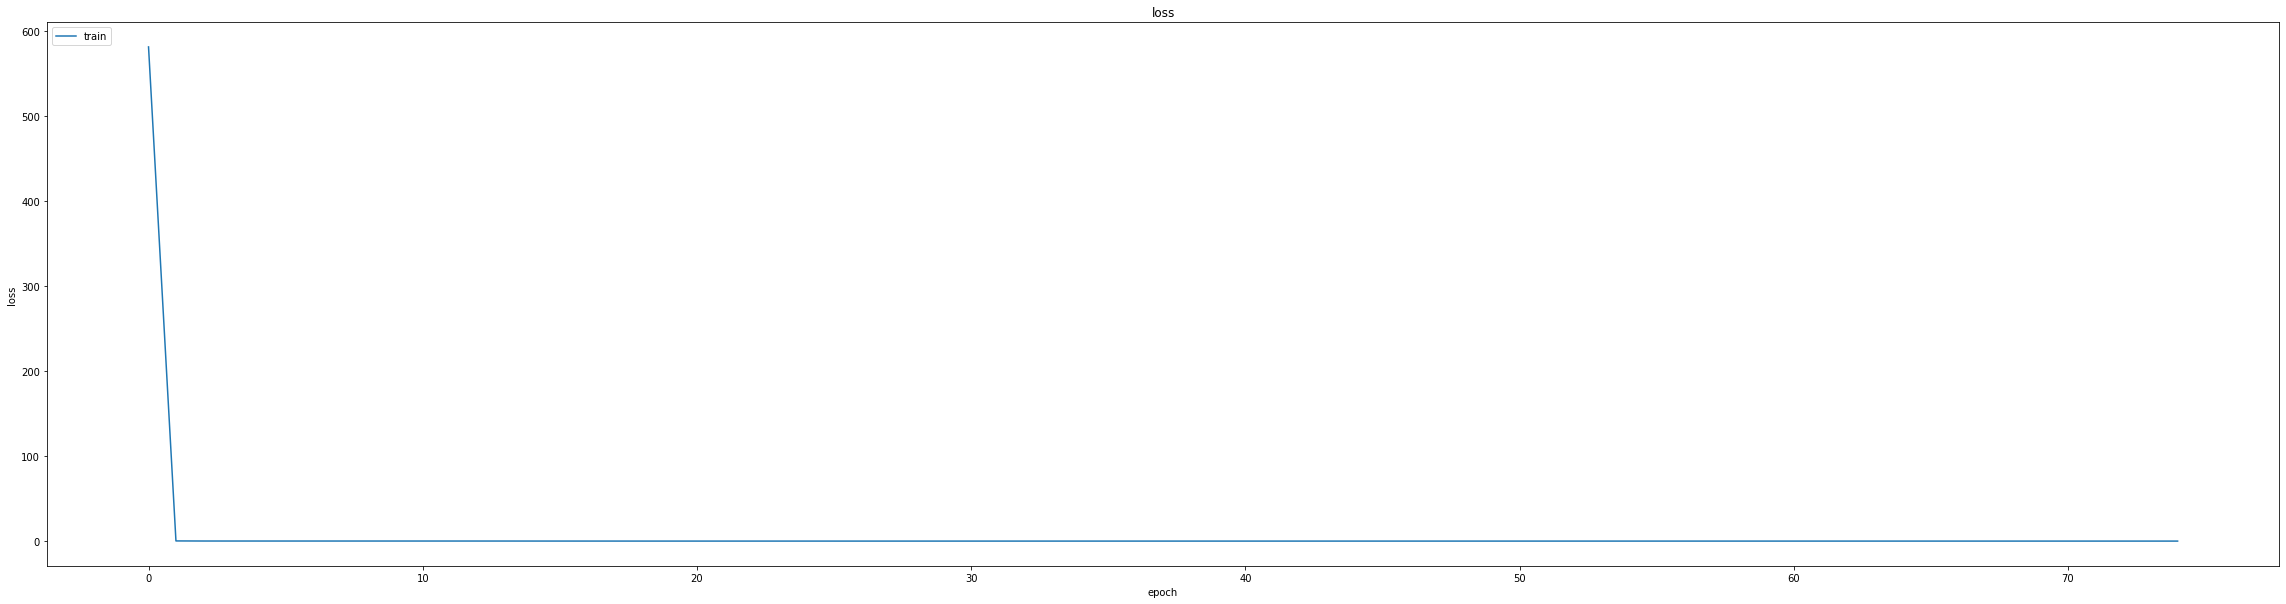

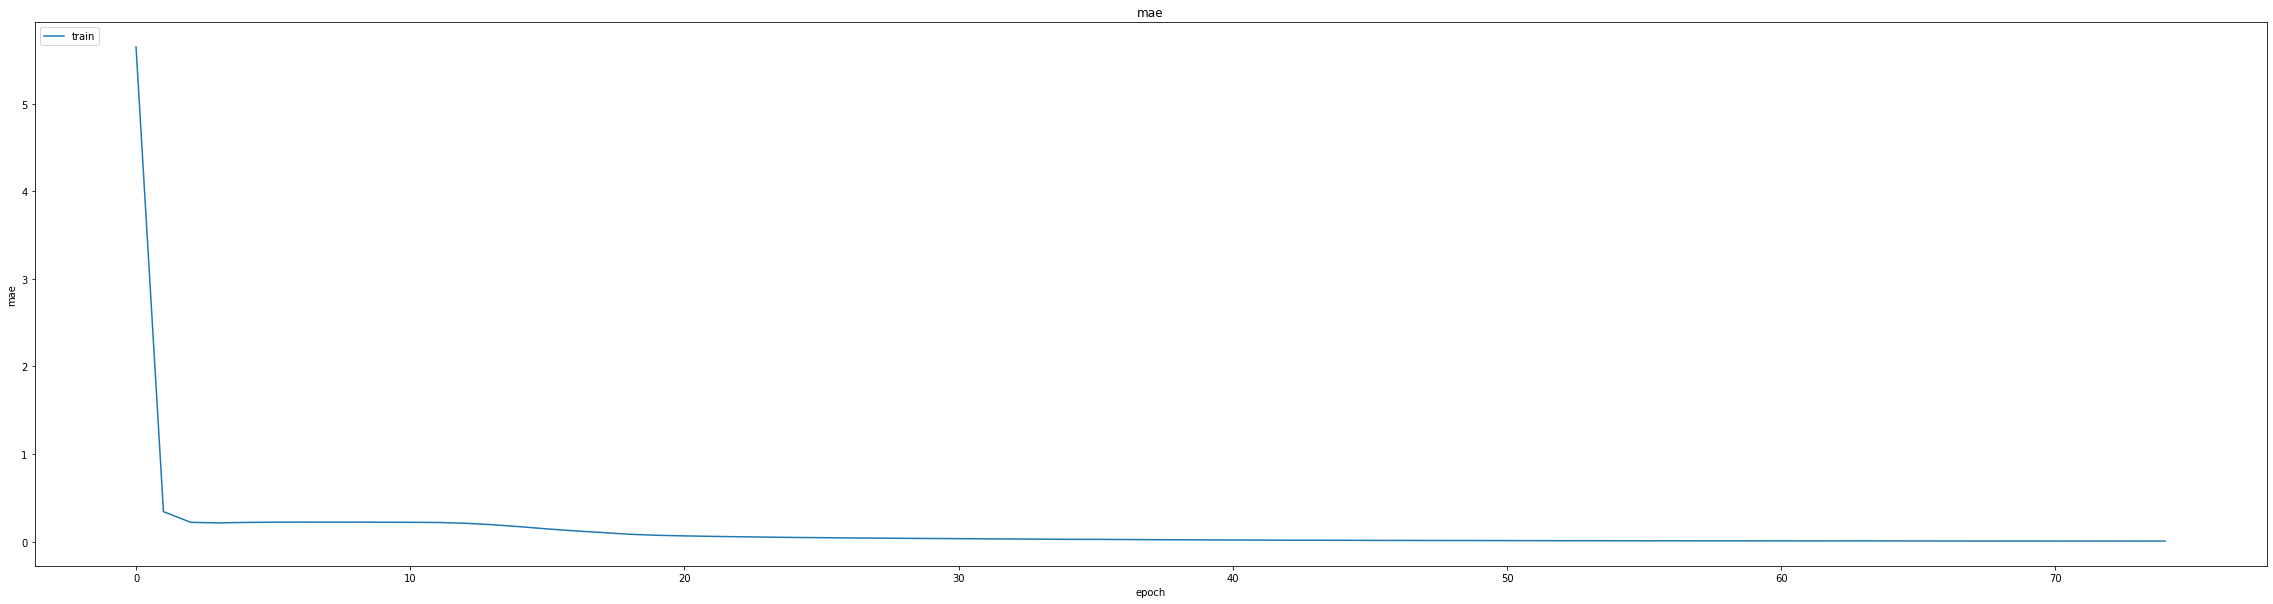

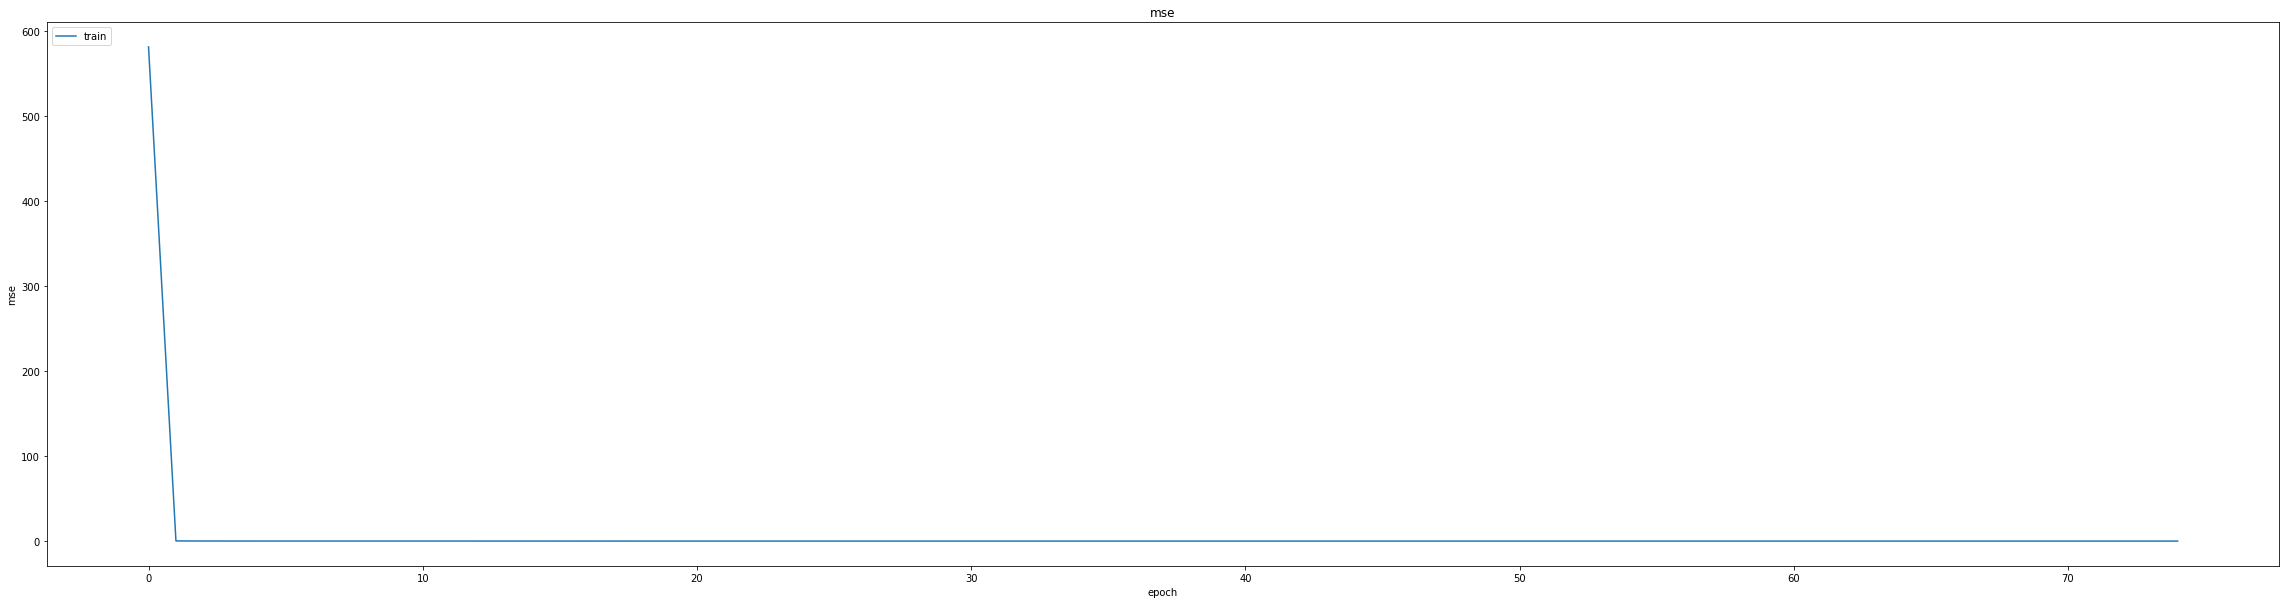

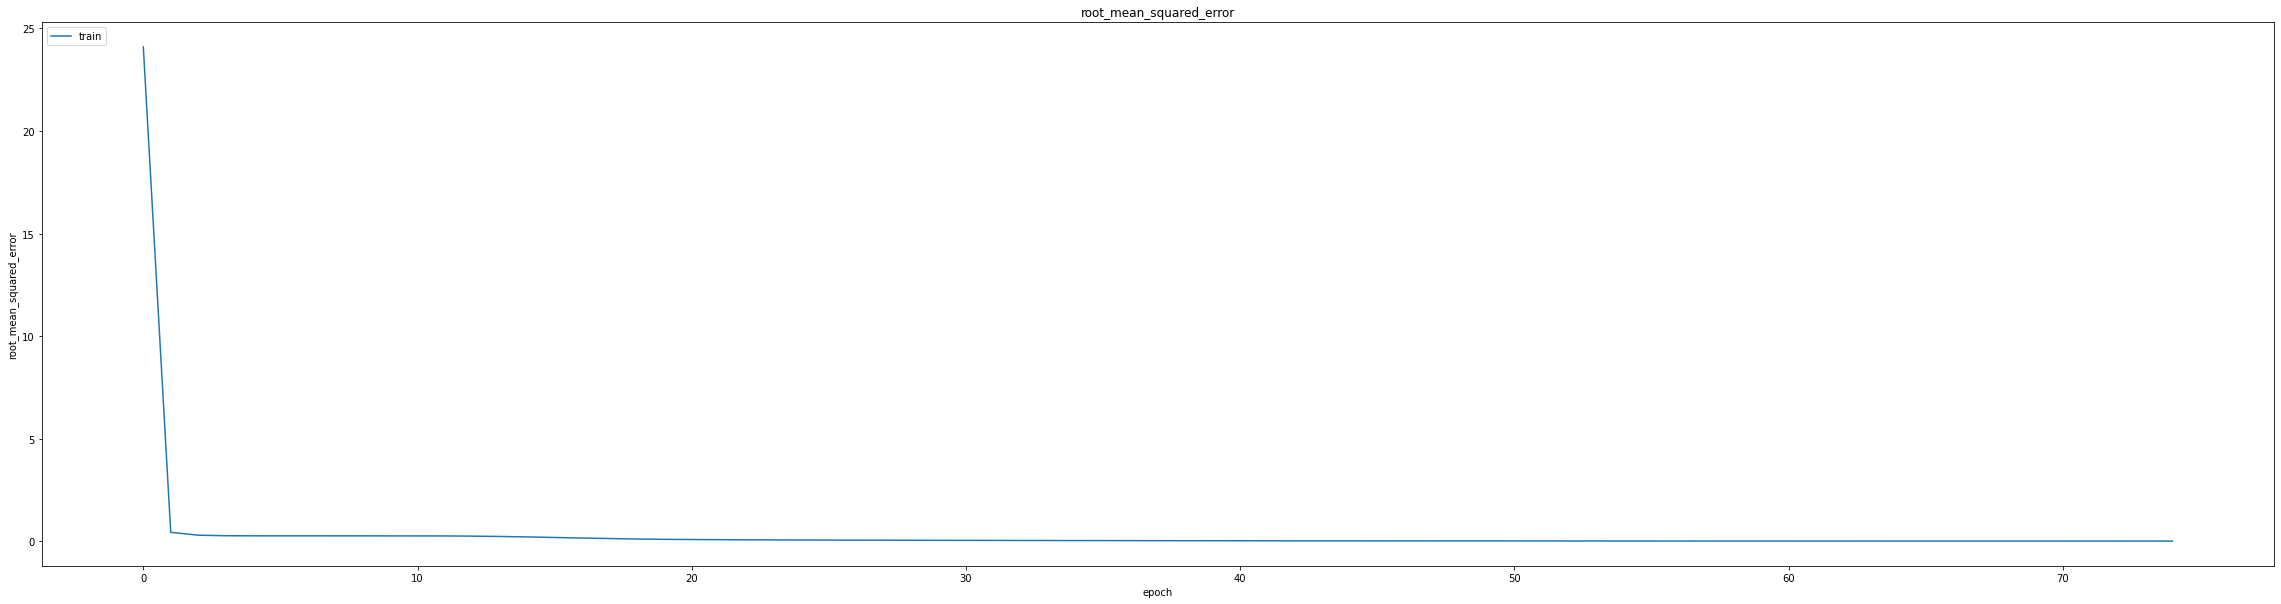

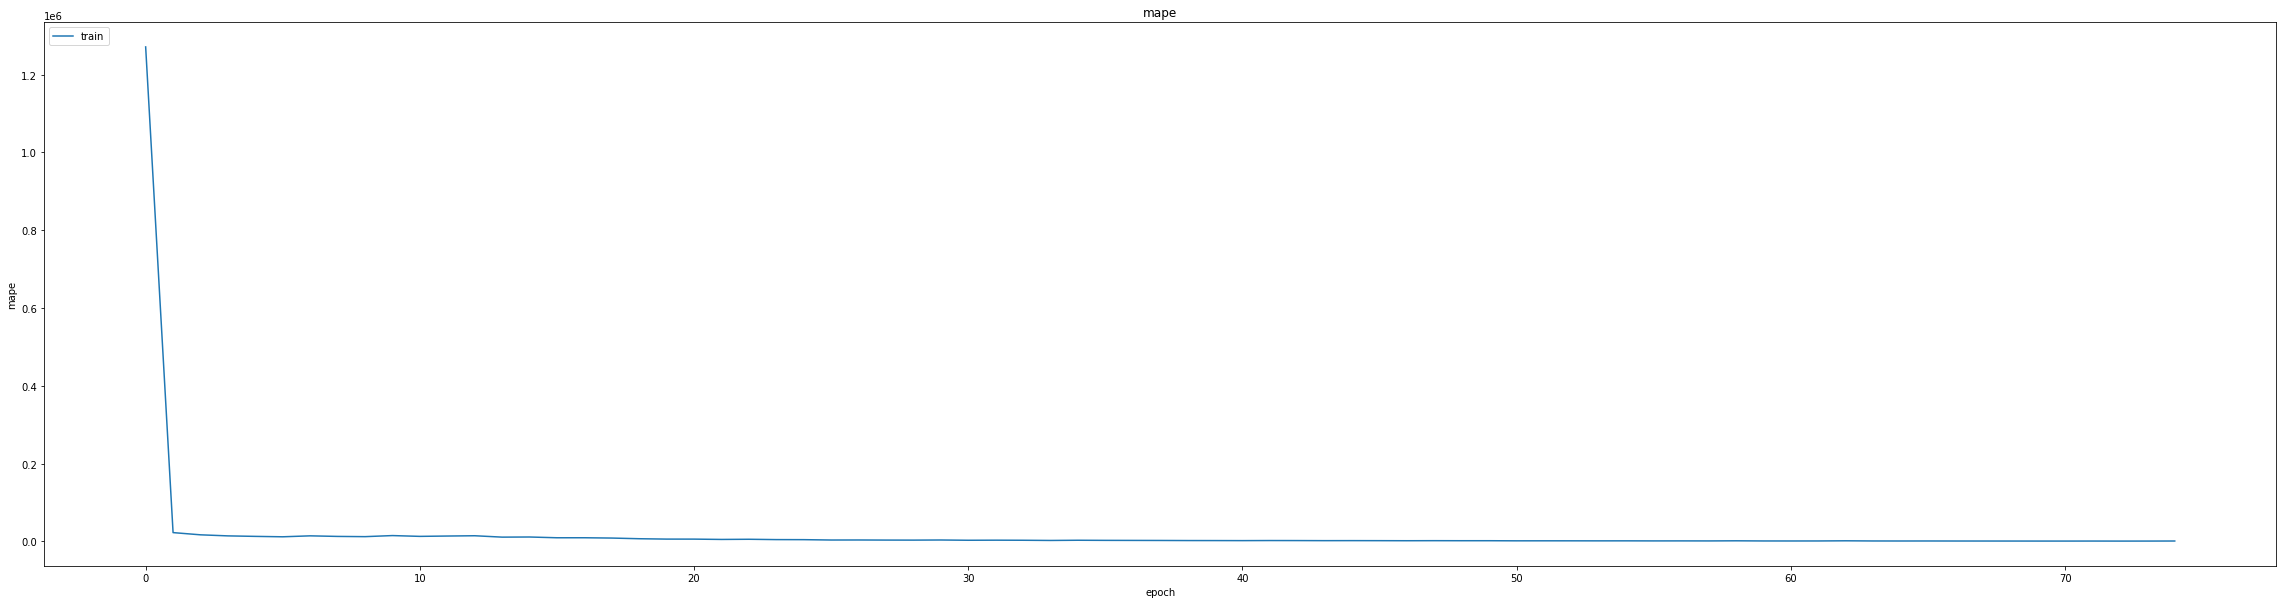

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.004243519622832537
0.006269366480410099
464/464 [==============================] - 5s 7ms/step
0.997604272475659


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
347/348 [============================>.] - ETA: 0s - loss: 4.7740e-04 - mae: 0.0097 - mse: 4.7740e-04 - root_mean_squared_error: 0.0218 - mape: 1078.1973
Epoch 1: val_mse did not improve from 0.00004
348/348 [==============================] - 17s 25ms/step - loss: 4.7623e-04 - mae: 0.0096 - mse: 4.7623e-04 - root_mean_squared_error: 0.0218 - mape: 1075.2952 - val_loss: 5.2615e-05 - val_mae: 0.0058 - val_mse: 5.2615e-05 - val_root_mean_squared_error: 0.0073 - val_mape: 3219.4812 - lr: 0.0010
Epoch 2/25
347/348 [============================>.] - ETA: 0s - loss: 3.5908e-05 - mae: 0.0046 - mse: 3.5908e-05 - root_mean_squared_error: 0.0060 - mape: 1048.7788
Epoch 2: val_mse did not improve from 0.00004
348/348 [==============================] - 7s 20ms/step - loss: 3.5921e-05 - mae: 0.0046 - mse: 3.5921e-05 - root_mean_squared_error: 0.0060 - mape: 1045.9553 - val_loss: 1.0260e-04 - val_mae: 0.0091 - val_mse: 1.0260e-04 - val_root_mean_squared_error: 0.0101 - val_mape: 3103.1768 

348/348 [==============================] - 38s 111ms/step - loss: 3.3867e-05 - mae: 0.0045 - mse: 3.3867e-05 - root_mean_squared_error: 0.0058 - mape: 997.7603 - val_loss: 3.1007e-05 - val_mae: 0.0037 - val_mse: 3.1007e-05 - val_root_mean_squared_error: 0.0056 - val_mape: 3102.1240 - lr: 9.0000e-04
Epoch 4/25
346/348 [============================>.] - ETA: 0s - loss: 3.9516e-05 - mae: 0.0049 - mse: 3.9516e-05 - root_mean_squared_error: 0.0063 - mape: 944.7421
Epoch 4: val_mse did not improve from 0.00003
348/348 [==============================] - 7s 20ms/step - loss: 3.9521e-05 - mae: 0.0049 - mse: 3.9521e-05 - root_mean_squared_error: 0.0063 - mape: 939.4887 - val_loss: 4.2027e-05 - val_mae: 0.0050 - val_mse: 4.2027e-05 - val_root_mean_squared_error: 0.0065 - val_mape: 3083.0518 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/25
346/348 [============================>.] - ETA: 0s - loss: 3.8257e-05 - mae: 0.0048 - mse: 3.8257e-05 - root_mean_squared_error: 0.0062 - mape: 1

348/348 [==============================] - 39s 113ms/step - loss: 2.7547e-05 - mae: 0.0040 - mse: 2.7547e-05 - root_mean_squared_error: 0.0052 - mape: 627.2159 - val_loss: 2.4825e-05 - val_mae: 0.0032 - val_mse: 2.4825e-05 - val_root_mean_squared_error: 0.0050 - val_mape: 2631.6680 - lr: 4.7830e-04
Epoch 16/25
347/348 [============================>.] - ETA: 0s - loss: 2.7152e-05 - mae: 0.0040 - mse: 2.7152e-05 - root_mean_squared_error: 0.0052 - mape: 739.9656
Epoch 16: val_mse did not improve from 0.00002
348/348 [==============================] - 7s 20ms/step - loss: 2.7150e-05 - mae: 0.0040 - mse: 2.7150e-05 - root_mean_squared_error: 0.0052 - mape: 737.9750 - val_loss: 3.1487e-05 - val_mae: 0.0040 - val_mse: 3.1487e-05 - val_root_mean_squared_error: 0.0056 - val_mape: 2717.8879 - lr: 4.7830e-04
lr changed to 0.0004304672533180565
Epoch 17/25
347/348 [============================>.] - ETA: 0s - loss: 2.6377e-05 - mae: 0.0040 - mse: 2.6377e-05 - root_mean_squared_error: 0.0051 - mape

348/348 [==============================] - 39s 112ms/step - loss: 2.6361e-05 - mae: 0.0040 - mse: 2.6361e-05 - root_mean_squared_error: 0.0051 - mape: 597.3484 - val_loss: 2.3154e-05 - val_mae: 0.0033 - val_mse: 2.3154e-05 - val_root_mean_squared_error: 0.0048 - val_mape: 2311.7961 - lr: 4.3047e-04
Epoch 18/25
347/348 [============================>.] - ETA: 0s - loss: 2.5005e-05 - mae: 0.0038 - mse: 2.5005e-05 - root_mean_squared_error: 0.0050 - mape: 631.8486
Epoch 18: val_mse did not improve from 0.00002
348/348 [==============================] - 7s 20ms/step - loss: 2.4996e-05 - mae: 0.0038 - mse: 2.4996e-05 - root_mean_squared_error: 0.0050 - mape: 630.1487 - val_loss: 5.0565e-05 - val_mae: 0.0059 - val_mse: 5.0565e-05 - val_root_mean_squared_error: 0.0071 - val_mape: 2147.2285 - lr: 4.3047e-04
lr changed to 0.00038742052274756136
Epoch 19/25
348/348 [==============================] - ETA: 0s - loss: 2.2367e-05 - mae: 0.0036 - mse: 2.2367e-05 - root_mean_squared_error: 0.0047 - map

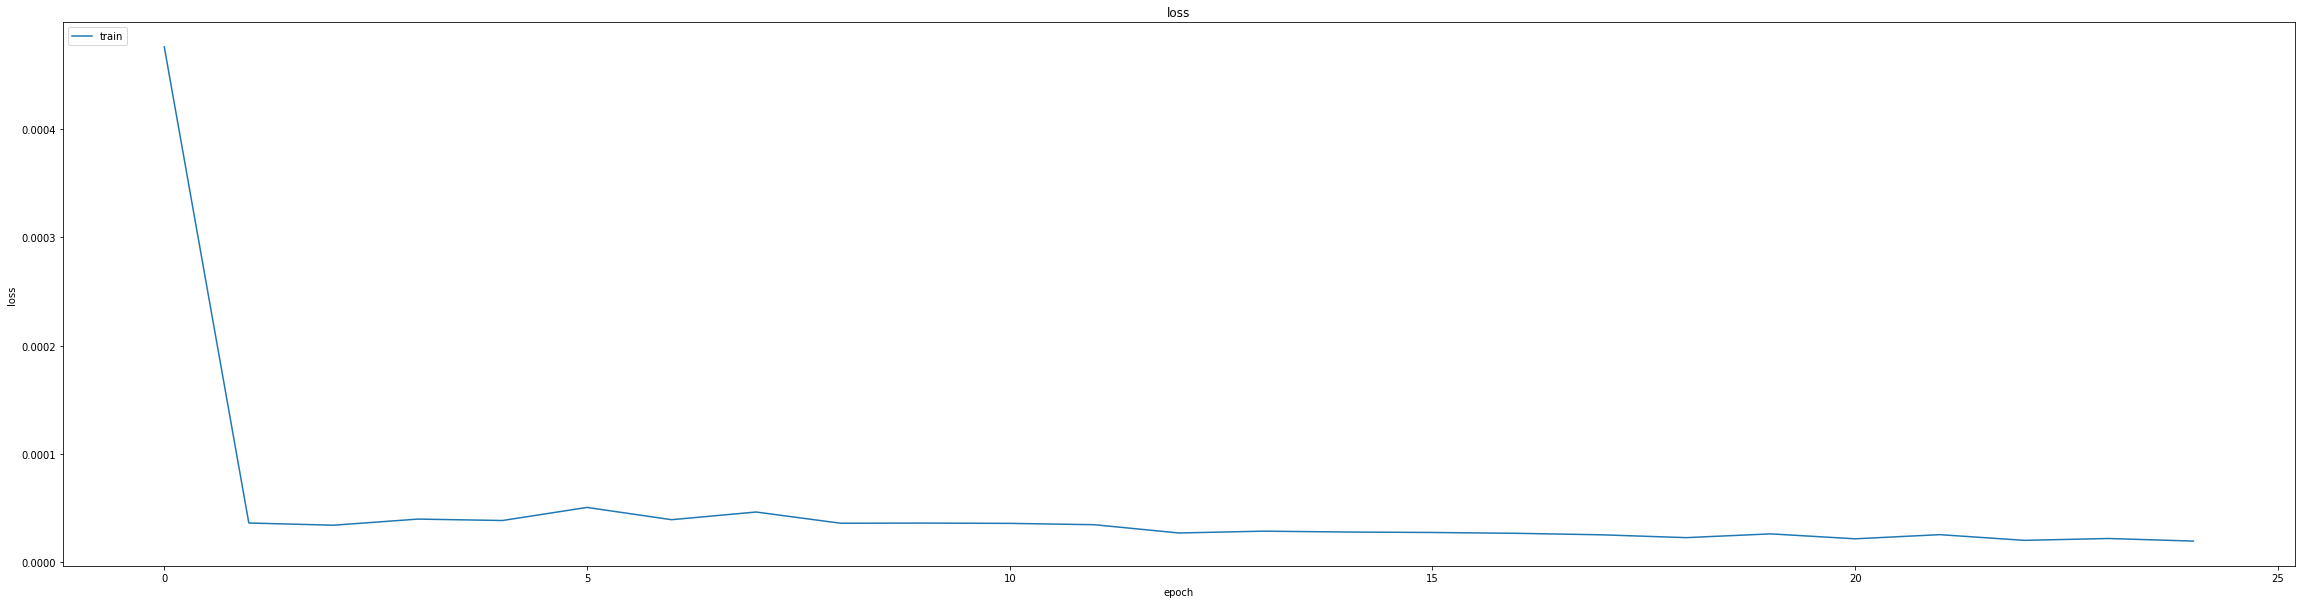

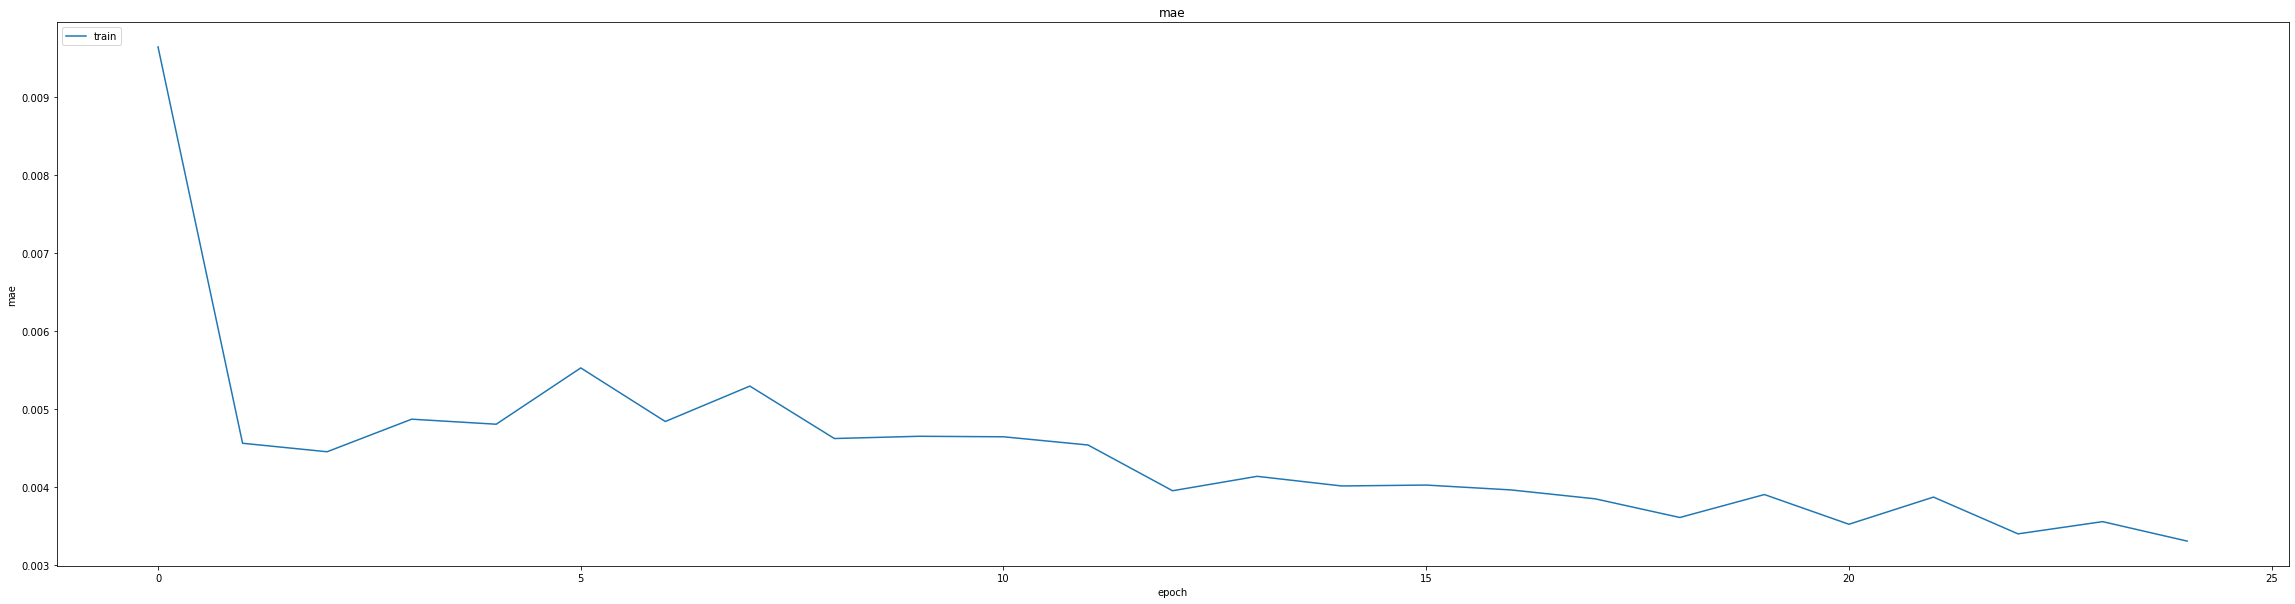

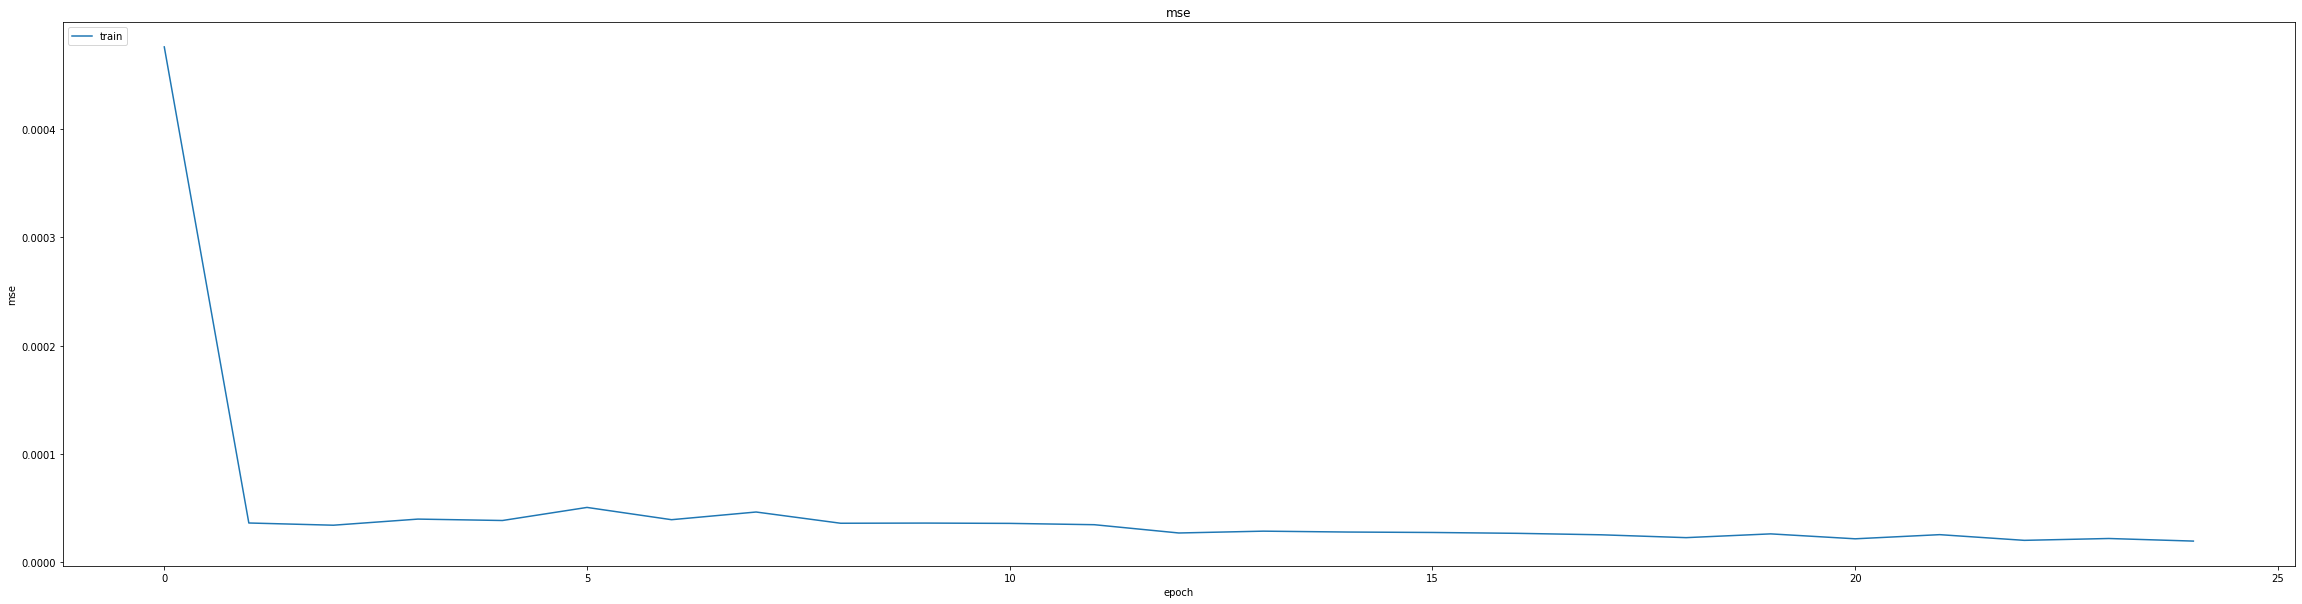

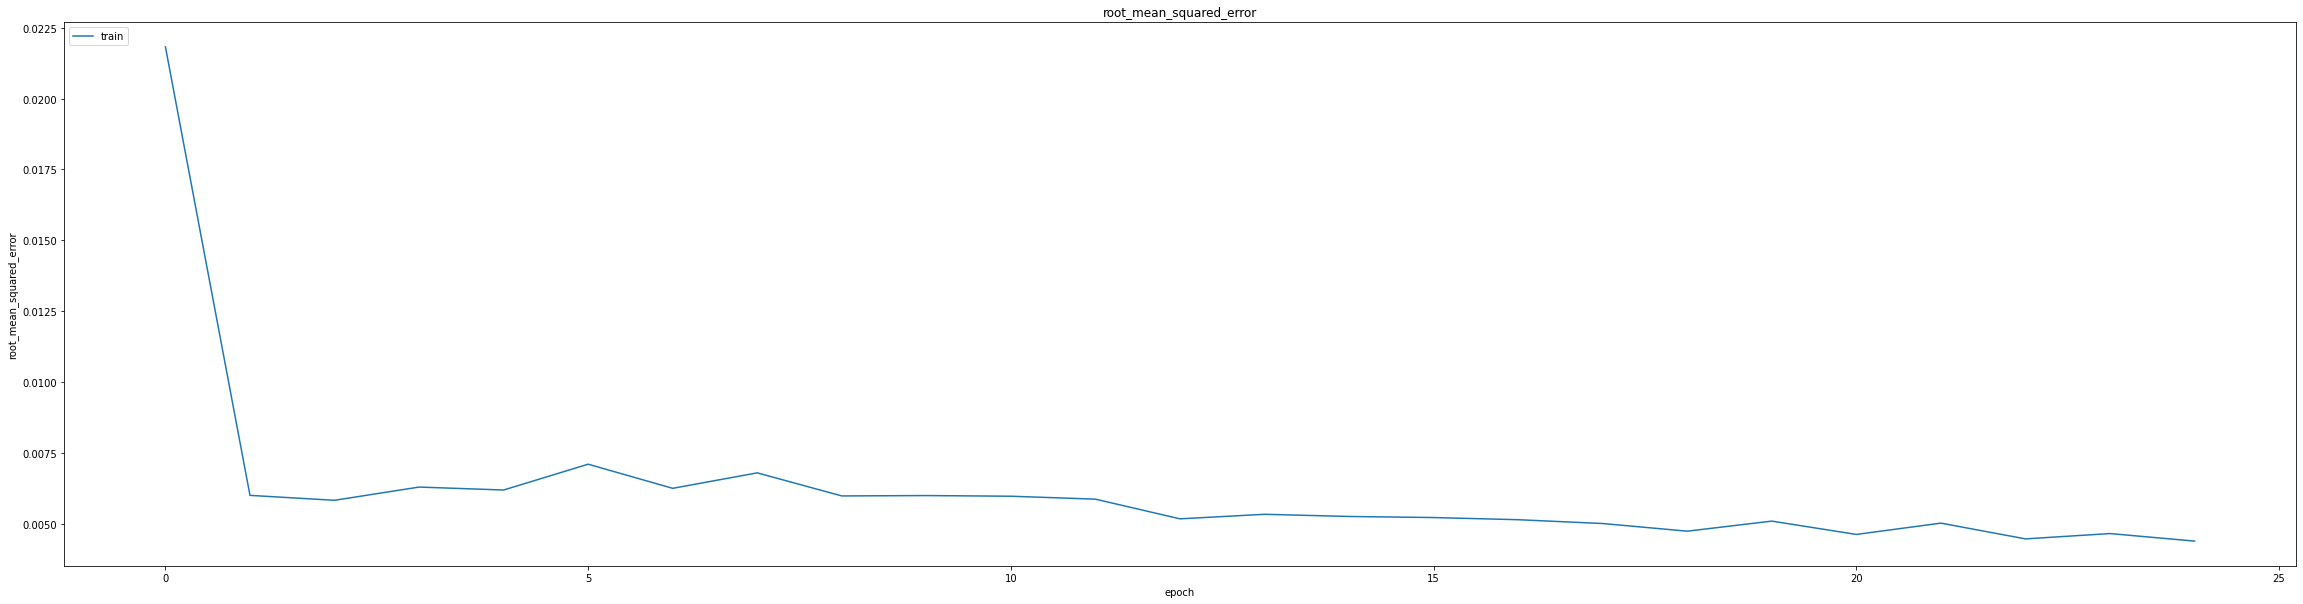

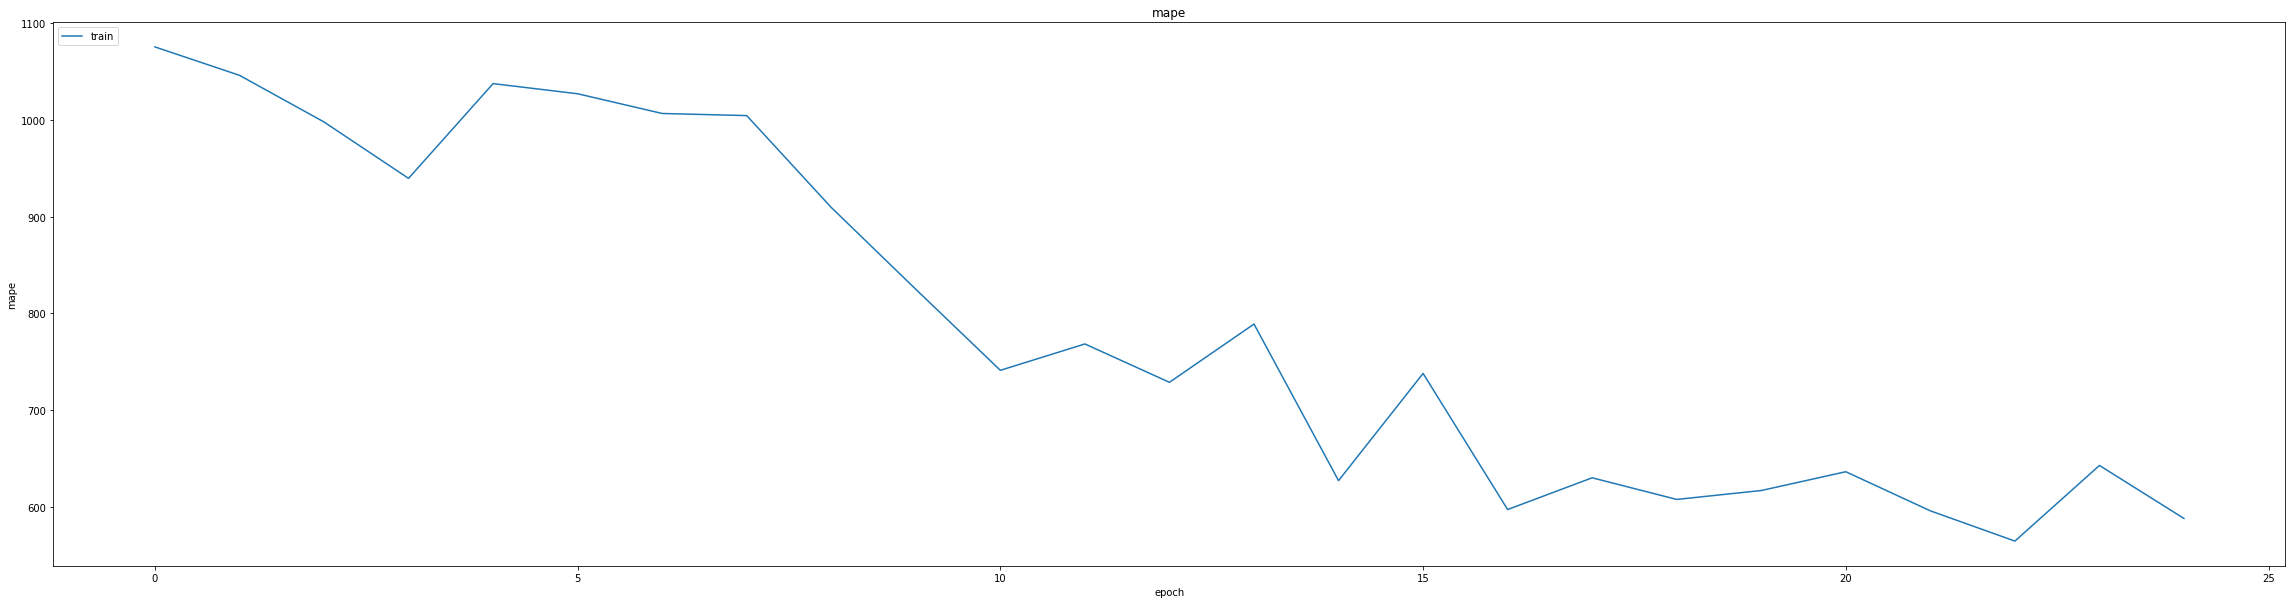

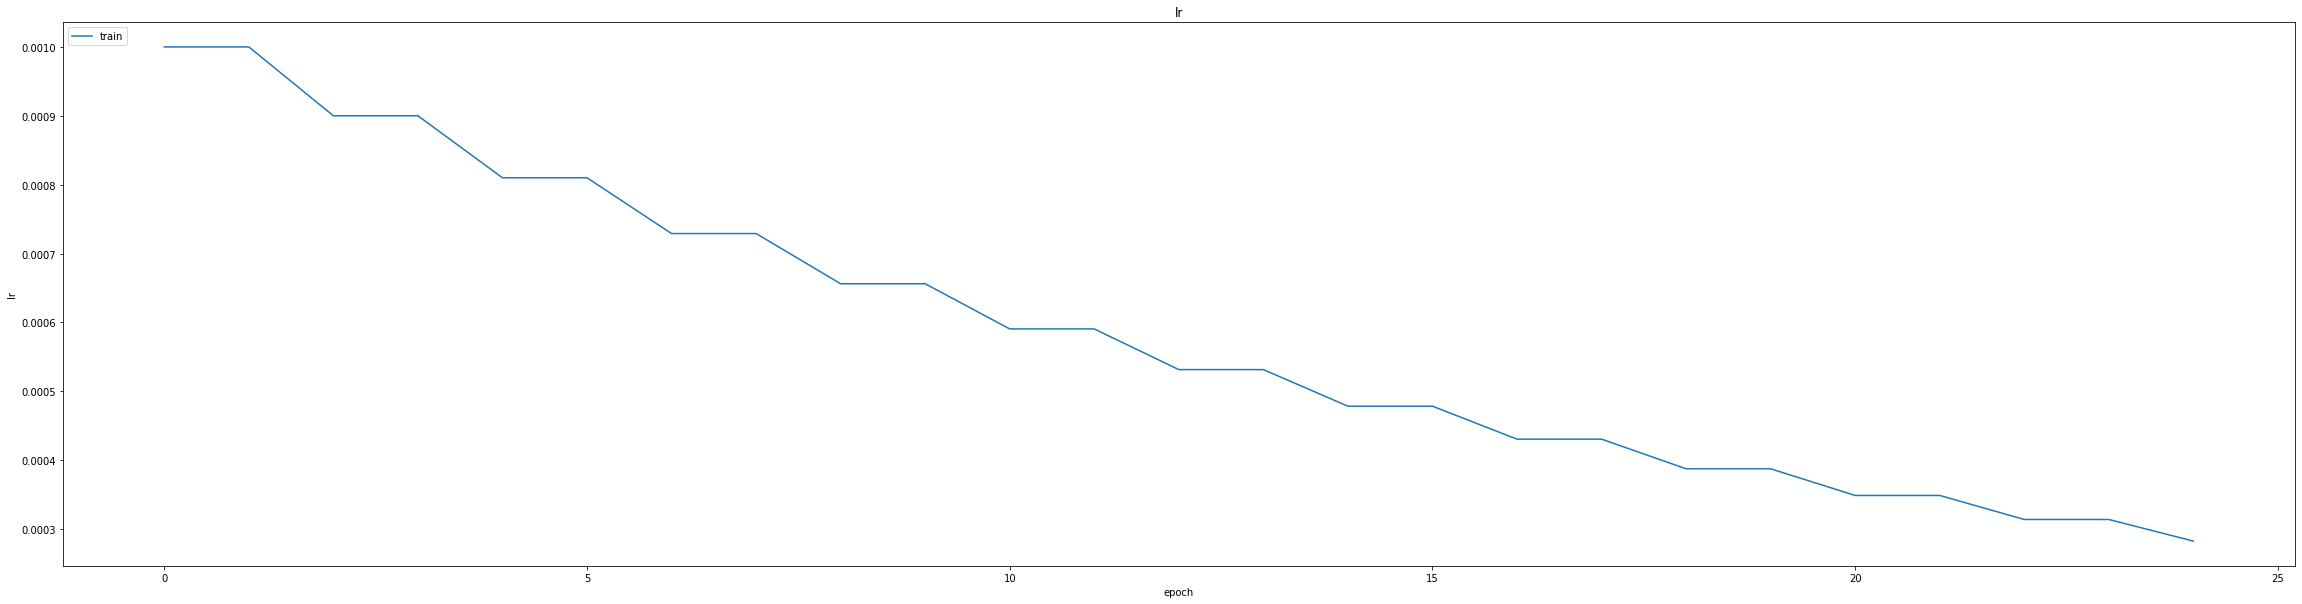

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.0032233360689133406
0.0048118336126208305
464/464 [==============================] - 5s 6ms/step
0.9995390255794335


464/464 [==============================] - 3s 6ms/step


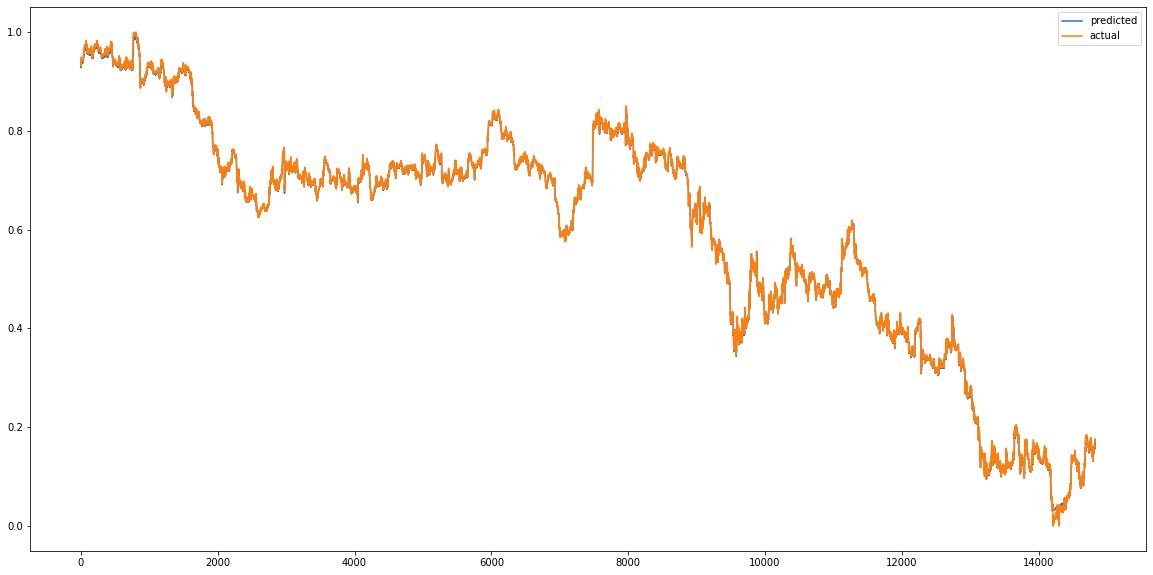

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_15min_BiLSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


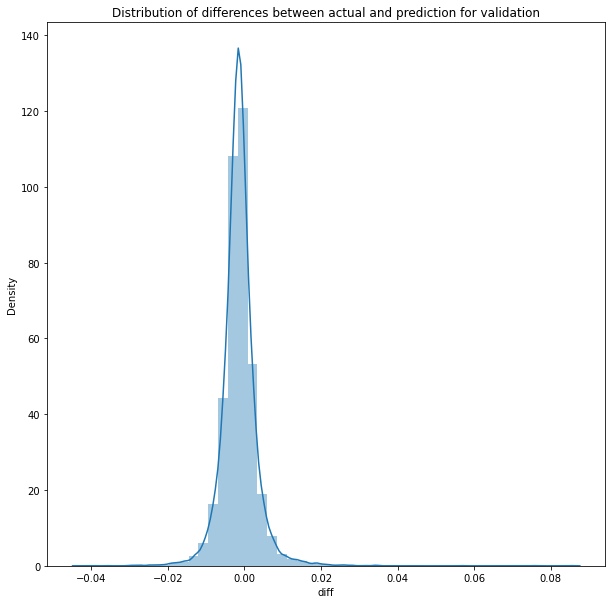

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 3s 6ms/step


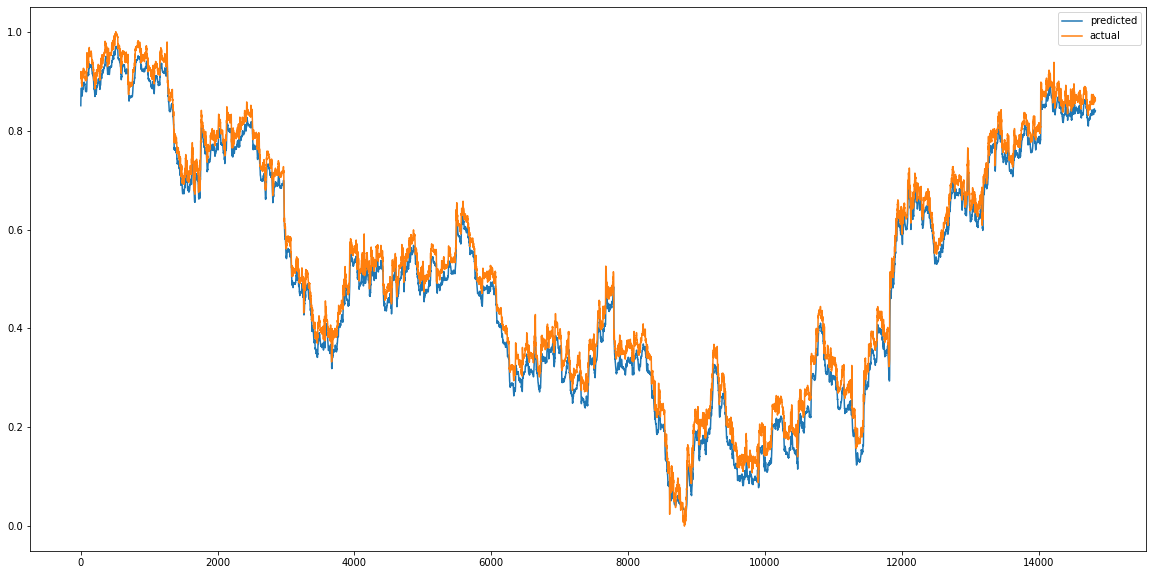

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


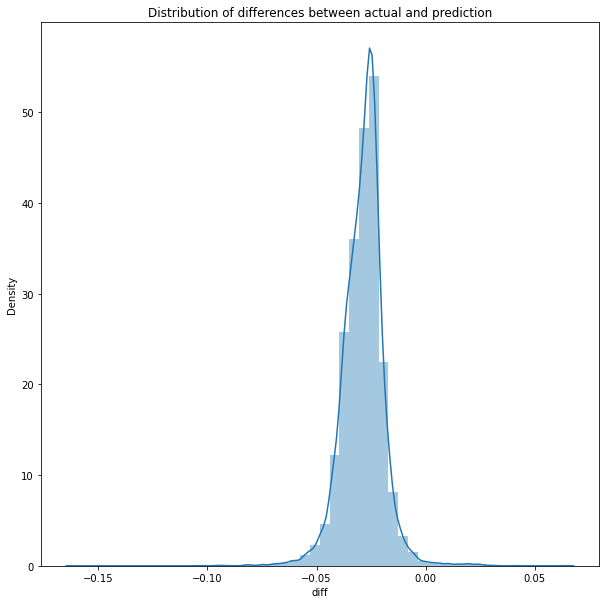

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0009096467045222752
RMSE :  0.03016034987400304
MAE :  0.028807816940308904
464/464 [==============================] - 3s 6ms/step
R2_Score  : 0.984936409683697


count    14830.000000
mean        -0.028628
std          0.009493
min         -0.160538
25%         -0.033915
50%         -0.027763
75%         -0.023413
max          0.063523
Name: diff, dtype: float64

**LSTM_MODEL**

In [ ]:
model= thesis.LSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 24, 256)           275456    
                                                                 
 lstm_4 (LSTM)               (None, 24, 64)            82176     
                                                                 
 dropout_1 (Dropout)         (None, 24, 64)            0         
                                                                 
 lstm_5 (LSTM)               (None, 16)                5184      
                                                                 
 dense_3 (Dense)             (None, 32)                544       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
344/348 [============================>.] - ETA: 0s - loss: 534.6582 - mae: 5.9669 - mse: 534.6582 - root_mean_squared_error: 23.1227 - mape: 67385.8281
Epoch 1: val_mse improved from inf to 0.05733, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(60-40)


348/348 [==============================] - 21s 48ms/step - loss: 528.6085 - mae: 5.9019 - mse: 528.6085 - root_mean_squared_error: 22.9915 - mape: 66624.4922 - val_loss: 0.0573 - val_mae: 0.1981 - val_mse: 0.0573 - val_root_mean_squared_error: 0.2394 - val_mape: 40555.4727
Epoch 2/75
347/348 [============================>.] - ETA: 0s - loss: 0.0731 - mae: 0.2258 - mse: 0.0731 - root_mean_squared_error: 0.2703 - mape: 16252.6338
Epoch 2: val_mse did not improve from 0.05733
348/348 [==============================] - 4s 12ms/step - loss: 0.0731 - mae: 0.2258 - mse: 0.0731 - root_mean_squared_error: 0.2703 - mape: 16209.0518 - val_loss: 0.0609 - val_mae: 0.2135 - val_mse: 0.0609 - val_root_mean_squared_error: 0.2469 - val_mape: 36657.7578
Epoch 3/75
347/348 [============================>.] - ETA: 0s - loss: 0.0732 - mae: 0.2297 - mse: 0.0732 - root_mean_squared_error: 0.2706 - mape: 11598.6123
Epoch 3: val_mse did not improve from 0.05733
348/348 [==============================] - 4s 12ms

348/348 [==============================] - 15s 44ms/step - loss: 0.0662 - mae: 0.2170 - mse: 0.0662 - root_mean_squared_error: 0.2573 - mape: 13961.1240 - val_loss: 0.0532 - val_mae: 0.1965 - val_mse: 0.0532 - val_root_mean_squared_error: 0.2306 - val_mape: 36439.3281
Epoch 27/75
348/348 [==============================] - ETA: 0s - loss: 0.0495 - mae: 0.1810 - mse: 0.0495 - root_mean_squared_error: 0.2225 - mape: 11657.1787
Epoch 27: val_mse improved from 0.05319 to 0.01526, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0495 - mae: 0.1810 - mse: 0.0495 - root_mean_squared_error: 0.2225 - mape: 11657.1787 - val_loss: 0.0153 - val_mae: 0.0967 - val_mse: 0.0153 - val_root_mean_squared_error: 0.1235 - val_mape: 19038.7207
Epoch 28/75
347/348 [============================>.] - ETA: 0s - loss: 0.0228 - mae: 0.1192 - mse: 0.0228 - root_mean_squared_error: 0.1510 - mape: 5407.1436
Epoch 28: val_mse improved from 0.01526 to 0.00838, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 0.0228 - mae: 0.1191 - mse: 0.0228 - root_mean_squared_error: 0.1509 - mape: 5392.6406 - val_loss: 0.0084 - val_mae: 0.0735 - val_mse: 0.0084 - val_root_mean_squared_error: 0.0915 - val_mape: 16663.2715
Epoch 29/75
346/348 [============================>.] - ETA: 0s - loss: 0.0080 - mae: 0.0707 - mse: 0.0080 - root_mean_squared_error: 0.0897 - mape: 5237.8369
Epoch 29: val_mse improved from 0.00838 to 0.00332, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 0.0080 - mae: 0.0706 - mse: 0.0080 - root_mean_squared_error: 0.0896 - mape: 5208.7593 - val_loss: 0.0033 - val_mae: 0.0467 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0576 - val_mape: 12213.8906
Epoch 30/75
344/348 [============================>.] - ETA: 0s - loss: 0.0053 - mae: 0.0577 - mse: 0.0053 - root_mean_squared_error: 0.0729 - mape: 3359.5186
Epoch 30: val_mse improved from 0.00332 to 0.00204, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0053 - mae: 0.0576 - mse: 0.0053 - root_mean_squared_error: 0.0728 - mape: 3321.6724 - val_loss: 0.0020 - val_mae: 0.0354 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0452 - val_mape: 10992.9395
Epoch 31/75
348/348 [==============================] - ETA: 0s - loss: 0.0040 - mae: 0.0499 - mse: 0.0040 - root_mean_squared_error: 0.0632 - mape: 3238.7446
Epoch 31: val_mse improved from 0.00204 to 0.00179, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0040 - mae: 0.0499 - mse: 0.0040 - root_mean_squared_error: 0.0632 - mape: 3238.7446 - val_loss: 0.0018 - val_mae: 0.0339 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0423 - val_mape: 10095.4971
Epoch 32/75
345/348 [============================>.] - ETA: 0s - loss: 0.0032 - mae: 0.0449 - mse: 0.0032 - root_mean_squared_error: 0.0569 - mape: 3653.3887
Epoch 32: val_mse improved from 0.00179 to 0.00119, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 0.0032 - mae: 0.0449 - mse: 0.0032 - root_mean_squared_error: 0.0569 - mape: 3622.6499 - val_loss: 0.0012 - val_mae: 0.0252 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0344 - val_mape: 9225.6523
Epoch 33/75
344/348 [============================>.] - ETA: 0s - loss: 0.0026 - mae: 0.0402 - mse: 0.0026 - root_mean_squared_error: 0.0511 - mape: 2815.5747
Epoch 33: val_mse did not improve from 0.00119
348/348 [==============================] - 4s 12ms/step - loss: 0.0026 - mae: 0.0402 - mse: 0.0026 - root_mean_squared_error: 0.0511 - mape: 2783.8313 - val_loss: 0.0015 - val_mae: 0.0306 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0381 - val_mape: 8772.3516
Epoch 34/75
347/348 [============================>.] - ETA: 0s - loss: 0.0023 - mae: 0.0374 - mse: 0.0023 - root_mean_squared_error: 0.0475 - mape: 2509.8040
Epoch 34: val_mse improved from 0.00119 to 0.00103, saving model to /content/drive/MyDrive/modelweights/

348/348 [==============================] - 15s 44ms/step - loss: 0.0023 - mae: 0.0374 - mse: 0.0023 - root_mean_squared_error: 0.0475 - mape: 2503.0662 - val_loss: 0.0010 - val_mae: 0.0251 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0321 - val_mape: 8525.2568
Epoch 35/75
344/348 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0340 - mse: 0.0019 - root_mean_squared_error: 0.0432 - mape: 2485.9678
Epoch 35: val_mse improved from 0.00103 to 0.00062, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0019 - mae: 0.0340 - mse: 0.0019 - root_mean_squared_error: 0.0432 - mape: 2457.9233 - val_loss: 6.1864e-04 - val_mae: 0.0180 - val_mse: 6.1864e-04 - val_root_mean_squared_error: 0.0249 - val_mape: 8224.4160
Epoch 36/75
347/348 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0314 - mse: 0.0016 - root_mean_squared_error: 0.0400 - mape: 2563.6711
Epoch 36: val_mse did not improve from 0.00062
348/348 [==============================] - 4s 12ms/step - loss: 0.0016 - mae: 0.0314 - mse: 0.0016 - root_mean_squared_error: 0.0400 - mape: 2556.7820 - val_loss: 9.9629e-04 - val_mae: 0.0254 - val_mse: 9.9629e-04 - val_root_mean_squared_error: 0.0316 - val_mape: 7883.5918
Epoch 37/75
347/348 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0298 - mse: 0.0014 - root_mean_squared_error: 0.0379 - mape: 2270.2961
Epoch 37: val_mse did not improve from 0.00062
348/348 [==============================] 

348/348 [==============================] - 15s 44ms/step - loss: 8.1882e-04 - mae: 0.0225 - mse: 8.1882e-04 - root_mean_squared_error: 0.0286 - mape: 2123.9072 - val_loss: 5.4892e-04 - val_mae: 0.0171 - val_mse: 5.4892e-04 - val_root_mean_squared_error: 0.0234 - val_mape: 6891.7871
Epoch 42/75
344/348 [============================>.] - ETA: 0s - loss: 7.5099e-04 - mae: 0.0215 - mse: 7.5099e-04 - root_mean_squared_error: 0.0274 - mape: 2232.3171
Epoch 42: val_mse improved from 0.00055 to 0.00048, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 7.4946e-04 - mae: 0.0215 - mse: 7.4946e-04 - root_mean_squared_error: 0.0274 - mape: 2207.1091 - val_loss: 4.8078e-04 - val_mae: 0.0162 - val_mse: 4.8078e-04 - val_root_mean_squared_error: 0.0219 - val_mape: 6630.4409
Epoch 43/75
344/348 [============================>.] - ETA: 0s - loss: 6.5034e-04 - mae: 0.0200 - mse: 6.5034e-04 - root_mean_squared_error: 0.0255 - mape: 2023.3196
Epoch 43: val_mse did not improve from 0.00048
348/348 [==============================] - 4s 12ms/step - loss: 6.4994e-04 - mae: 0.0200 - mse: 6.4994e-04 - root_mean_squared_error: 0.0255 - mape: 2000.5138 - val_loss: 6.0416e-04 - val_mae: 0.0195 - val_mse: 6.0416e-04 - val_root_mean_squared_error: 0.0246 - val_mape: 6615.6538
Epoch 44/75
345/348 [============================>.] - ETA: 0s - loss: 6.2704e-04 - mae: 0.0196 - mse: 6.2704e-04 - root_mean_squared_error: 0.0250 - mape: 2091.9065
Epoch 44: val_mse did not improve from 0.00048
348/348 [

348/348 [==============================] - 15s 44ms/step - loss: 5.7236e-04 - mae: 0.0187 - mse: 5.7236e-04 - root_mean_squared_error: 0.0239 - mape: 1942.6384 - val_loss: 4.5202e-04 - val_mae: 0.0154 - val_mse: 4.5202e-04 - val_root_mean_squared_error: 0.0213 - val_mape: 6405.4028
Epoch 46/75
346/348 [============================>.] - ETA: 0s - loss: 5.2689e-04 - mae: 0.0179 - mse: 5.2689e-04 - root_mean_squared_error: 0.0230 - mape: 2054.5947
Epoch 46: val_mse improved from 0.00045 to 0.00040, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 5.2776e-04 - mae: 0.0179 - mse: 5.2776e-04 - root_mean_squared_error: 0.0230 - mape: 2043.1935 - val_loss: 3.9613e-04 - val_mae: 0.0142 - val_mse: 3.9613e-04 - val_root_mean_squared_error: 0.0199 - val_mape: 6322.3687
Epoch 47/75
348/348 [==============================] - ETA: 0s - loss: 4.9114e-04 - mae: 0.0172 - mse: 4.9114e-04 - root_mean_squared_error: 0.0222 - mape: 2054.1406
Epoch 47: val_mse improved from 0.00040 to 0.00039, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 4.9114e-04 - mae: 0.0172 - mse: 4.9114e-04 - root_mean_squared_error: 0.0222 - mape: 2054.1406 - val_loss: 3.8720e-04 - val_mae: 0.0139 - val_mse: 3.8720e-04 - val_root_mean_squared_error: 0.0197 - val_mape: 6292.0532
Epoch 48/75
347/348 [============================>.] - ETA: 0s - loss: 4.7775e-04 - mae: 0.0170 - mse: 4.7775e-04 - root_mean_squared_error: 0.0219 - mape: 2008.4897
Epoch 48: val_mse did not improve from 0.00039
348/348 [==============================] - 4s 12ms/step - loss: 4.7765e-04 - mae: 0.0170 - mse: 4.7765e-04 - root_mean_squared_error: 0.0219 - mape: 2003.0895 - val_loss: 4.2617e-04 - val_mae: 0.0153 - val_mse: 4.2617e-04 - val_root_mean_squared_error: 0.0206 - val_mape: 6209.3345
Epoch 49/75
348/348 [==============================] - ETA: 0s - loss: 4.1839e-04 - mae: 0.0159 - mse: 4.1839e-04 - root_mean_squared_error: 0.0205 - mape: 2069.6272
Epoch 49: val_mse did not improve from 0.00039
348/348 [

348/348 [==============================] - 15s 42ms/step - loss: 4.3972e-04 - mae: 0.0163 - mse: 4.3972e-04 - root_mean_squared_error: 0.0210 - mape: 1942.1151 - val_loss: 3.5900e-04 - val_mae: 0.0133 - val_mse: 3.5900e-04 - val_root_mean_squared_error: 0.0189 - val_mape: 6164.2949
Epoch 51/75
347/348 [============================>.] - ETA: 0s - loss: 4.4841e-04 - mae: 0.0164 - mse: 4.4841e-04 - root_mean_squared_error: 0.0212 - mape: 1973.9576
Epoch 51: val_mse did not improve from 0.00036
348/348 [==============================] - 4s 12ms/step - loss: 4.4794e-04 - mae: 0.0164 - mse: 4.4794e-04 - root_mean_squared_error: 0.0212 - mape: 1968.6681 - val_loss: 6.3907e-04 - val_mae: 0.0207 - val_mse: 6.3907e-04 - val_root_mean_squared_error: 0.0253 - val_mape: 6249.8374
Epoch 52/75
345/348 [============================>.] - ETA: 0s - loss: 3.8291e-04 - mae: 0.0150 - mse: 3.8291e-04 - root_mean_squared_error: 0.0196 - mape: 1981.7594
Epoch 52: val_mse did not improve from 0.00036
348/348 [

348/348 [==============================] - 15s 44ms/step - loss: 3.2081e-04 - mae: 0.0138 - mse: 3.2081e-04 - root_mean_squared_error: 0.0179 - mape: 1950.0438 - val_loss: 3.3532e-04 - val_mae: 0.0128 - val_mse: 3.3532e-04 - val_root_mean_squared_error: 0.0183 - val_mape: 5889.3081
Epoch 57/75
344/348 [============================>.] - ETA: 0s - loss: 3.6167e-04 - mae: 0.0147 - mse: 3.6167e-04 - root_mean_squared_error: 0.0190 - mape: 2010.6593
Epoch 57: val_mse did not improve from 0.00034
348/348 [==============================] - 4s 12ms/step - loss: 3.6084e-04 - mae: 0.0147 - mse: 3.6084e-04 - root_mean_squared_error: 0.0190 - mape: 1987.9424 - val_loss: 4.5896e-04 - val_mae: 0.0162 - val_mse: 4.5896e-04 - val_root_mean_squared_error: 0.0214 - val_mape: 5786.3857
Epoch 58/75
345/348 [============================>.] - ETA: 0s - loss: 2.9912e-04 - mae: 0.0133 - mse: 2.9912e-04 - root_mean_squared_error: 0.0173 - mape: 1886.0924
Epoch 58: val_mse did not improve from 0.00034
348/348 [

348/348 [==============================] - 15s 43ms/step - loss: 3.2720e-04 - mae: 0.0140 - mse: 3.2720e-04 - root_mean_squared_error: 0.0181 - mape: 1857.0107 - val_loss: 3.2751e-04 - val_mae: 0.0129 - val_mse: 3.2751e-04 - val_root_mean_squared_error: 0.0181 - val_mape: 5665.1582
Epoch 60/75
345/348 [============================>.] - ETA: 0s - loss: 2.9906e-04 - mae: 0.0133 - mse: 2.9906e-04 - root_mean_squared_error: 0.0173 - mape: 1945.1198
Epoch 60: val_mse did not improve from 0.00033
348/348 [==============================] - 4s 12ms/step - loss: 2.9891e-04 - mae: 0.0133 - mse: 2.9891e-04 - root_mean_squared_error: 0.0173 - mape: 1928.7478 - val_loss: 3.3750e-04 - val_mae: 0.0134 - val_mse: 3.3750e-04 - val_root_mean_squared_error: 0.0184 - val_mape: 5630.7158
Epoch 61/75
347/348 [============================>.] - ETA: 0s - loss: 3.1855e-04 - mae: 0.0137 - mse: 3.1855e-04 - root_mean_squared_error: 0.0178 - mape: 1812.4470
Epoch 61: val_mse did not improve from 0.00033
348/348 [

348/348 [==============================] - 15s 44ms/step - loss: 2.4216e-04 - mae: 0.0120 - mse: 2.4216e-04 - root_mean_squared_error: 0.0156 - mape: 1615.8865 - val_loss: 2.6141e-04 - val_mae: 0.0114 - val_mse: 2.6141e-04 - val_root_mean_squared_error: 0.0162 - val_mape: 5011.0332
Epoch 65/75
345/348 [============================>.] - ETA: 0s - loss: 2.8111e-04 - mae: 0.0131 - mse: 2.8111e-04 - root_mean_squared_error: 0.0168 - mape: 1637.5236
Epoch 65: val_mse did not improve from 0.00026
348/348 [==============================] - 4s 12ms/step - loss: 2.8024e-04 - mae: 0.0130 - mse: 2.8024e-04 - root_mean_squared_error: 0.0167 - mape: 1623.7291 - val_loss: 2.8635e-04 - val_mae: 0.0123 - val_mse: 2.8635e-04 - val_root_mean_squared_error: 0.0169 - val_mape: 4847.4980
Epoch 66/75
343/348 [============================>.] - ETA: 0s - loss: 2.4285e-04 - mae: 0.0120 - mse: 2.4285e-04 - root_mean_squared_error: 0.0156 - mape: 1973.6423
Epoch 66: val_mse did not improve from 0.00026
348/348 [

348/348 [==============================] - 14s 42ms/step - loss: 2.1112e-04 - mae: 0.0111 - mse: 2.1112e-04 - root_mean_squared_error: 0.0145 - mape: 1389.4506 - val_loss: 2.0468e-04 - val_mae: 0.0104 - val_mse: 2.0468e-04 - val_root_mean_squared_error: 0.0143 - val_mape: 4316.1899
Epoch 71/75
348/348 [==============================] - ETA: 0s - loss: 2.0335e-04 - mae: 0.0112 - mse: 2.0335e-04 - root_mean_squared_error: 0.0143 - mape: 1304.9542
Epoch 71: val_mse did not improve from 0.00020
348/348 [==============================] - 4s 12ms/step - loss: 2.0335e-04 - mae: 0.0112 - mse: 2.0335e-04 - root_mean_squared_error: 0.0143 - mape: 1304.9542 - val_loss: 4.3678e-04 - val_mae: 0.0179 - val_mse: 4.3678e-04 - val_root_mean_squared_error: 0.0209 - val_mape: 4245.0498
Epoch 72/75
347/348 [============================>.] - ETA: 0s - loss: 1.9469e-04 - mae: 0.0107 - mse: 1.9469e-04 - root_mean_squared_error: 0.0140 - mape: 1256.5774
Epoch 72: val_mse improved from 0.00020 to 0.00015, savi

348/348 [==============================] - 15s 44ms/step - loss: 1.9450e-04 - mae: 0.0107 - mse: 1.9450e-04 - root_mean_squared_error: 0.0139 - mape: 1253.2037 - val_loss: 1.5372e-04 - val_mae: 0.0086 - val_mse: 1.5372e-04 - val_root_mean_squared_error: 0.0124 - val_mape: 4108.8140
Epoch 73/75
345/348 [============================>.] - ETA: 0s - loss: 1.6158e-04 - mae: 0.0099 - mse: 1.6158e-04 - root_mean_squared_error: 0.0127 - mape: 1288.8579
Epoch 73: val_mse did not improve from 0.00015
348/348 [==============================] - 4s 12ms/step - loss: 1.6121e-04 - mae: 0.0099 - mse: 1.6121e-04 - root_mean_squared_error: 0.0127 - mape: 1278.0070 - val_loss: 2.3199e-04 - val_mae: 0.0122 - val_mse: 2.3199e-04 - val_root_mean_squared_error: 0.0152 - val_mape: 4156.1064
Epoch 74/75
344/348 [============================>.] - ETA: 0s - loss: 1.3135e-04 - mae: 0.0088 - mse: 1.3135e-04 - root_mean_squared_error: 0.0115 - mape: 1275.8901
Epoch 74: val_mse improved from 0.00015 to 0.00013, savi

348/348 [==============================] - 15s 43ms/step - loss: 1.3100e-04 - mae: 0.0088 - mse: 1.3100e-04 - root_mean_squared_error: 0.0114 - mape: 1261.4739 - val_loss: 1.3257e-04 - val_mae: 0.0082 - val_mse: 1.3257e-04 - val_root_mean_squared_error: 0.0115 - val_mape: 3998.1667
Epoch 75/75
348/348 [==============================] - ETA: 0s - loss: 1.3212e-04 - mae: 0.0089 - mse: 1.3212e-04 - root_mean_squared_error: 0.0115 - mape: 1254.1957
Epoch 75: val_mse improved from 0.00013 to 0.00011, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 1.3212e-04 - mae: 0.0089 - mse: 1.3212e-04 - root_mean_squared_error: 0.0115 - mape: 1254.1957 - val_loss: 1.0801e-04 - val_mae: 0.0072 - val_mse: 1.0801e-04 - val_root_mean_squared_error: 0.0104 - val_mape: 3750.1990


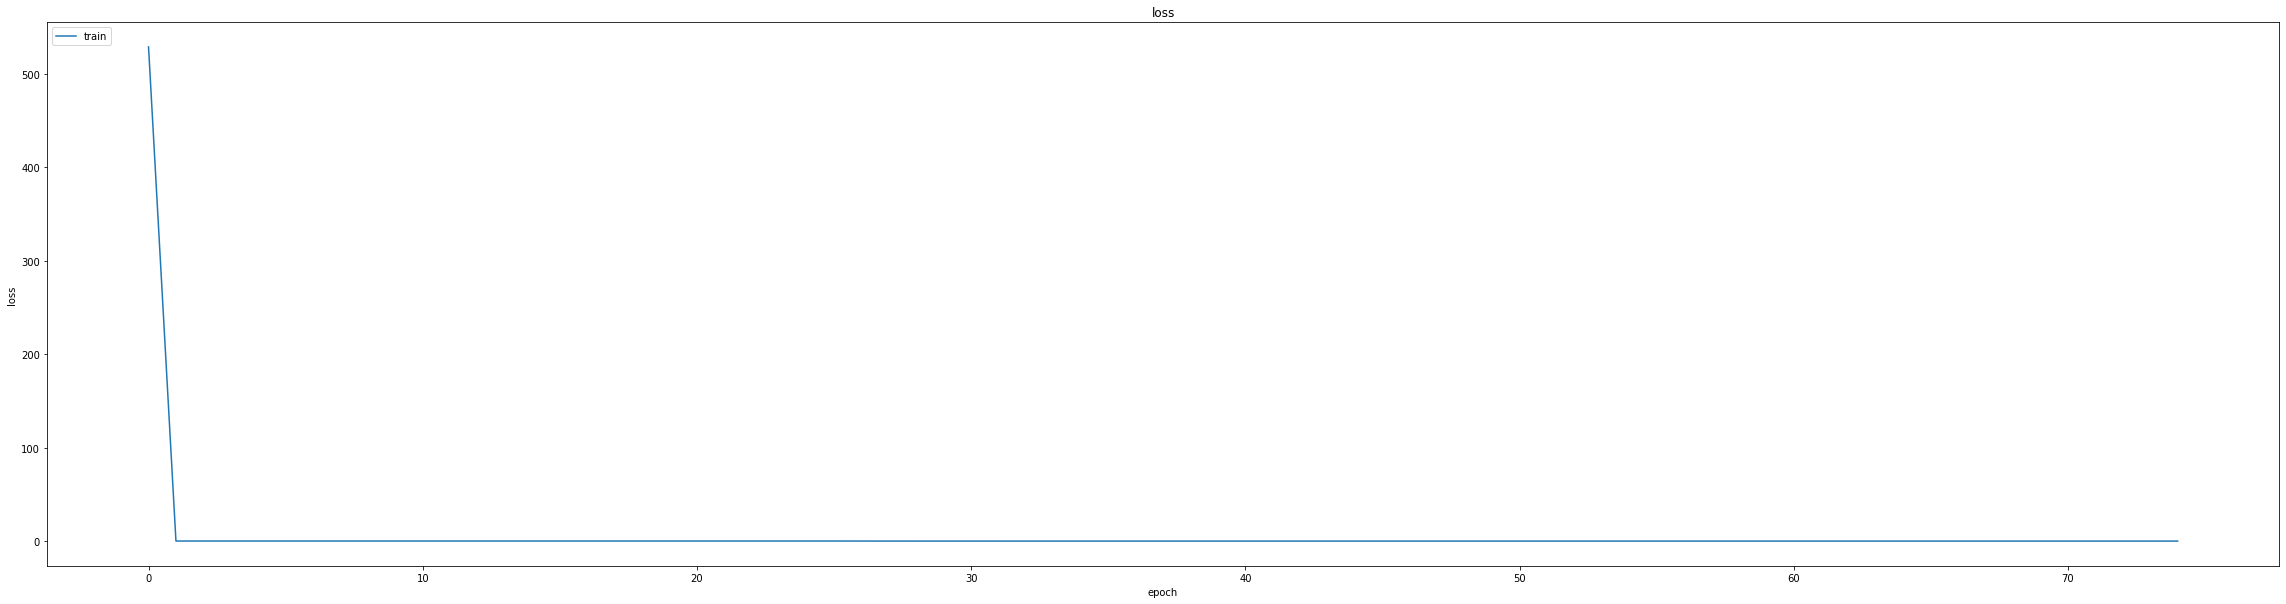

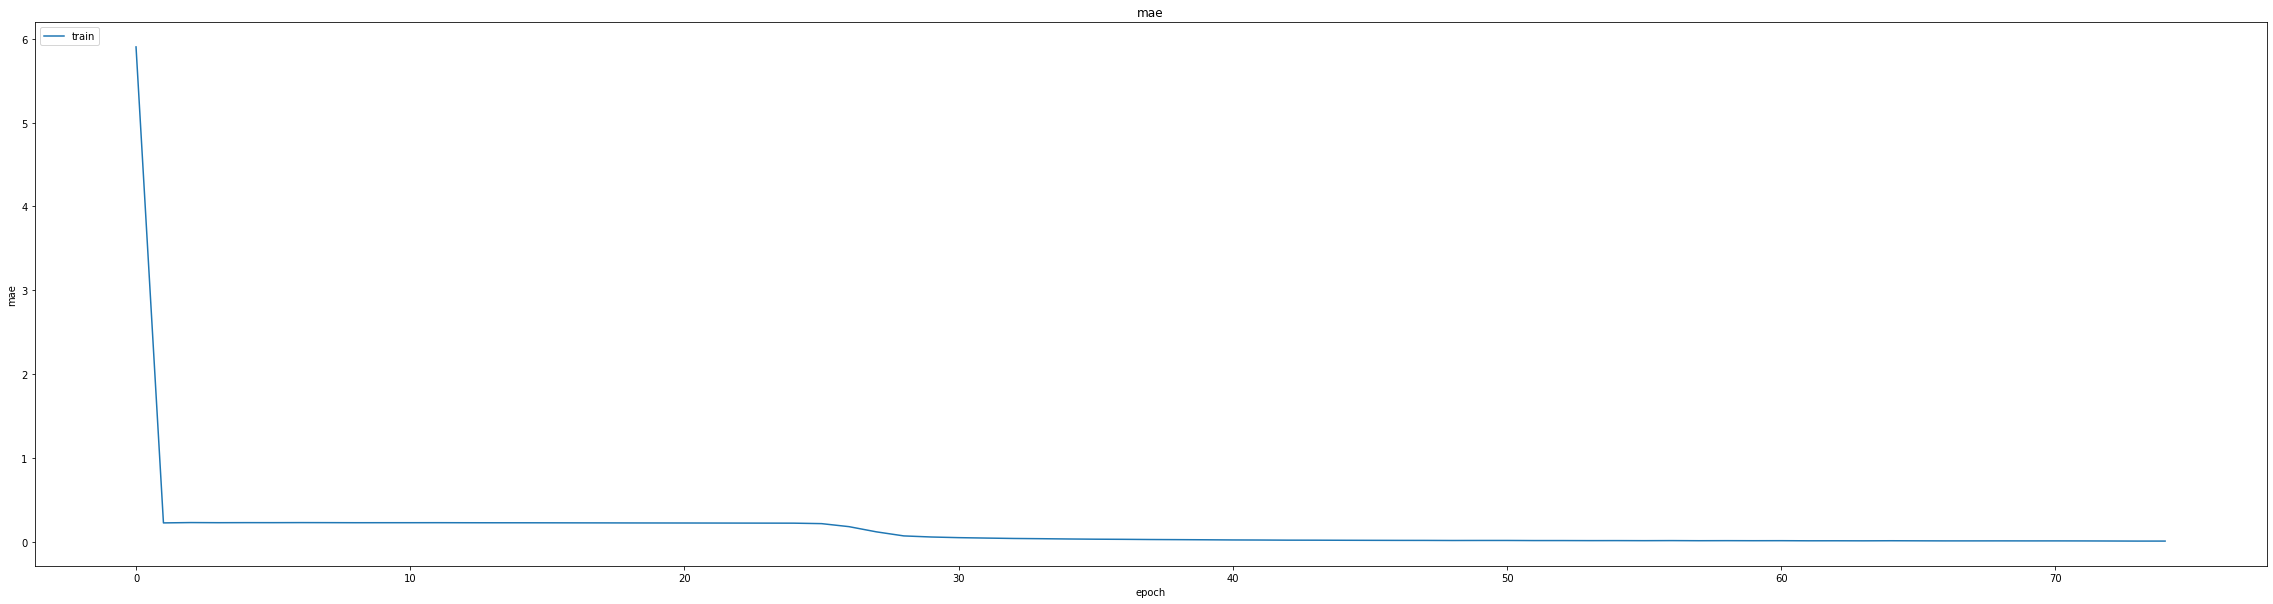

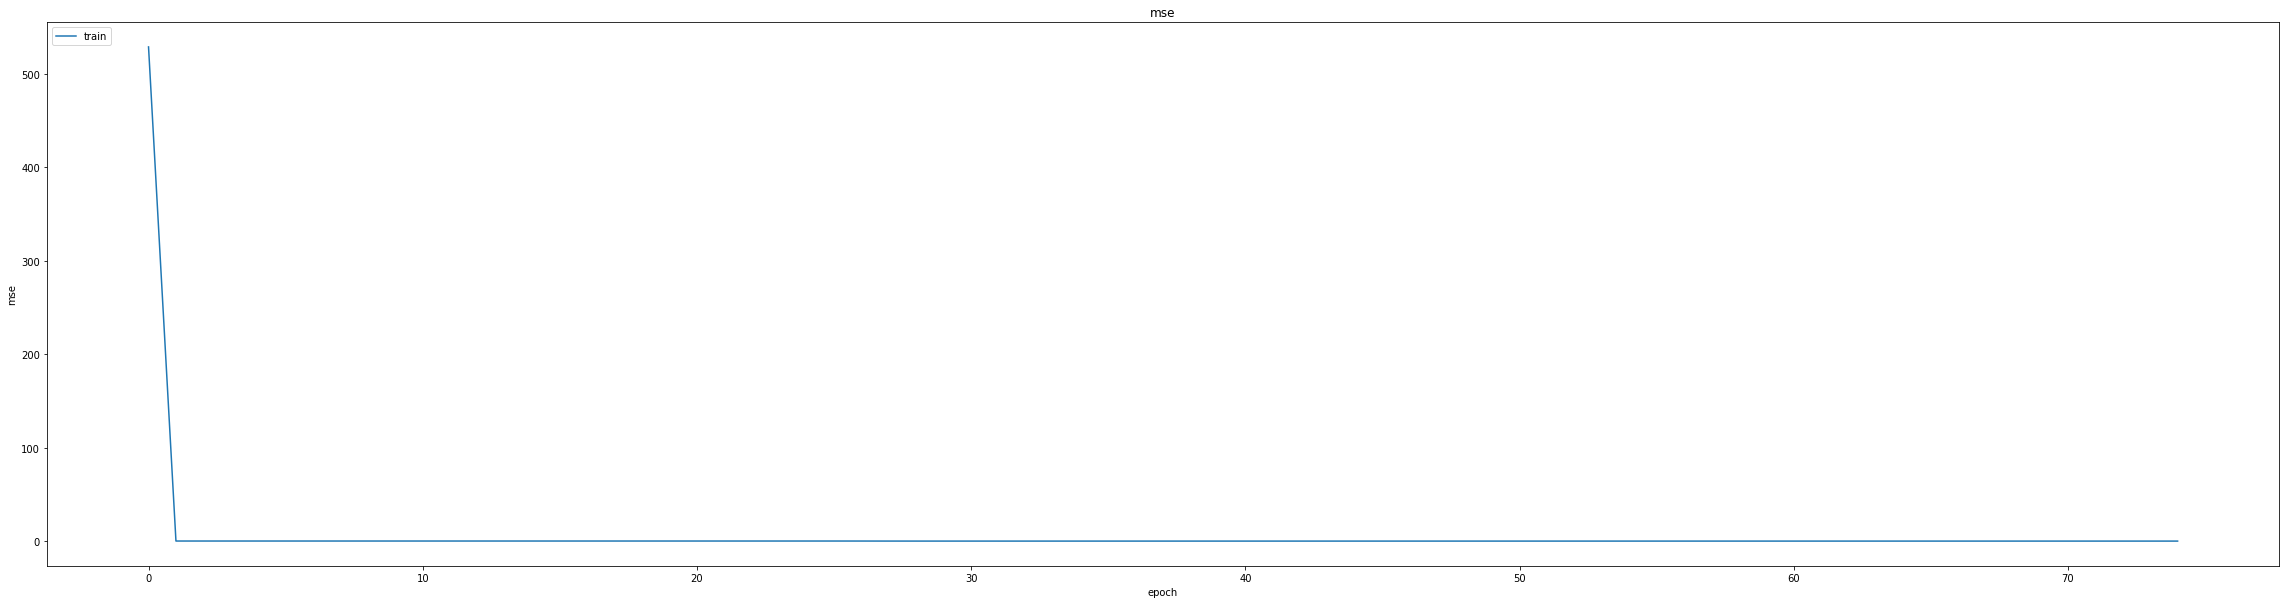

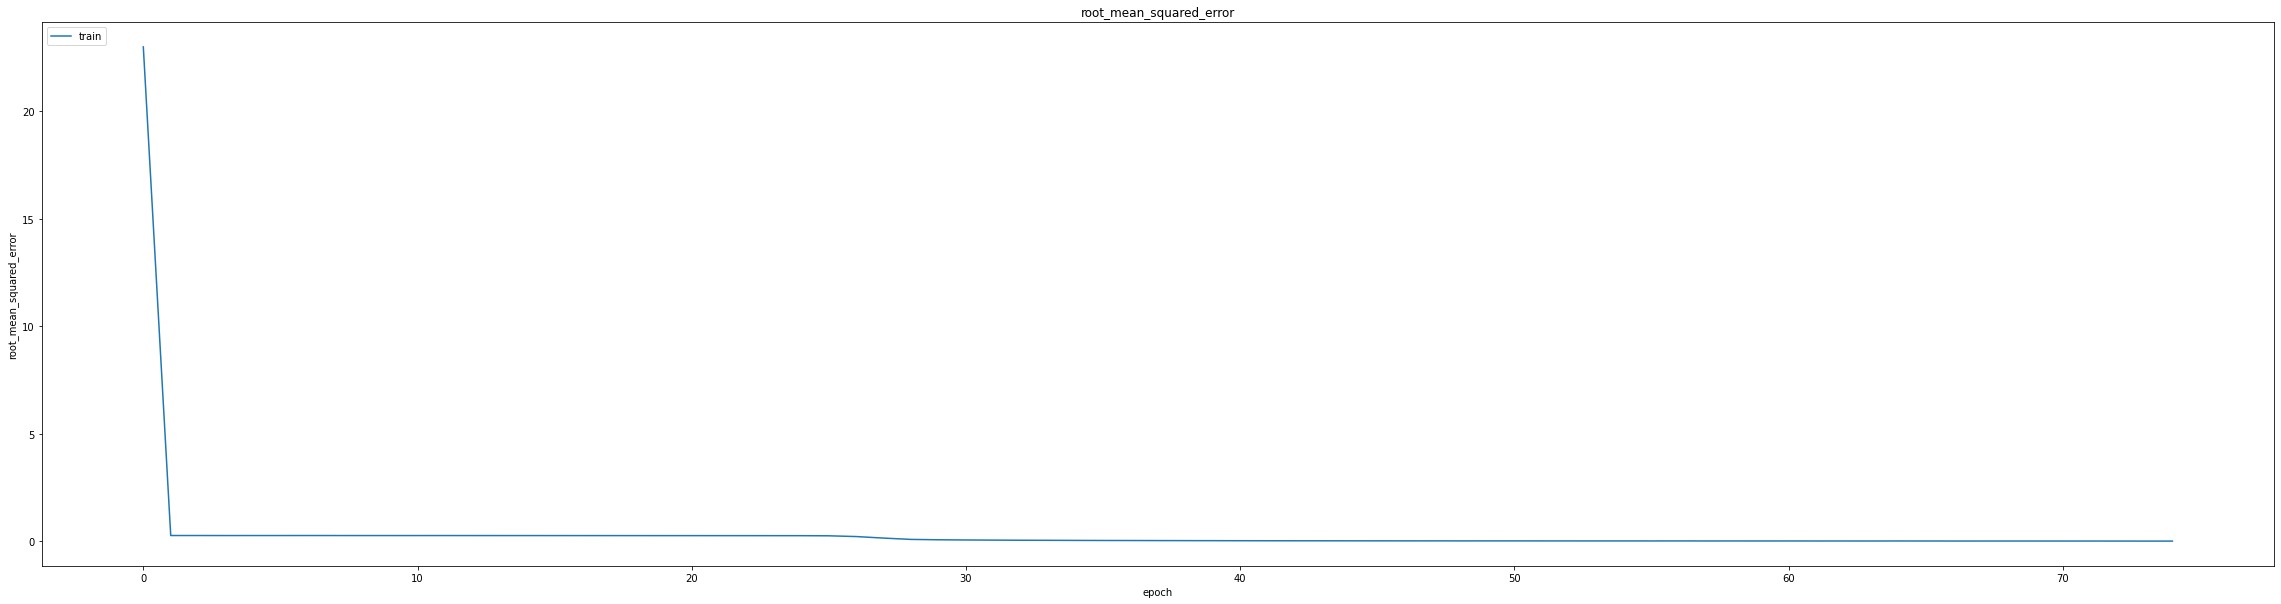

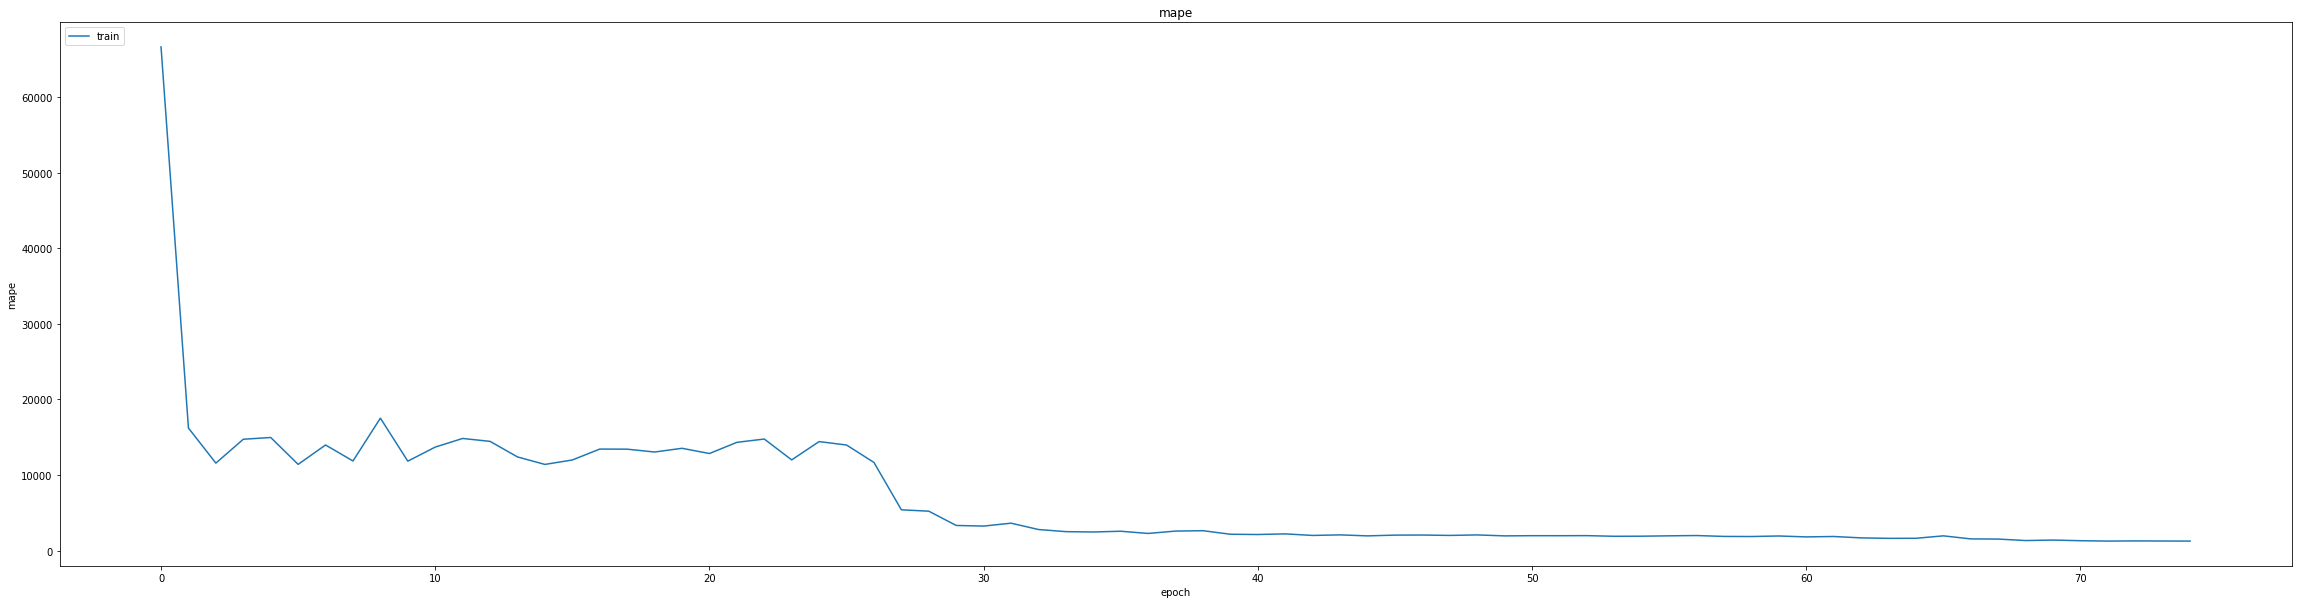

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.007215401623398066
0.010392559692263603
464/464 [==============================] - 3s 4ms/step
0.998114987874527


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
346/348 [============================>.] - ETA: 0s - loss: 5.9958e-04 - mae: 0.0122 - mse: 5.9958e-04 - root_mean_squared_error: 0.0245 - mape: 1243.8903
Epoch 1: val_mse did not improve from 0.00011
348/348 [==============================] - 9s 15ms/step - loss: 5.9672e-04 - mae: 0.0122 - mse: 5.9672e-04 - root_mean_squared_error: 0.0244 - mape: 1236.9761 - val_loss: 1.3265e-04 - val_mae: 0.0086 - val_mse: 1.3265e-04 - val_root_mean_squared_error: 0.0115 - val_mape: 3896.0103 - lr: 0.0010
Epoch 2/25
346/348 [============================>.] - ETA: 0s - loss: 8.3374e-05 - mae: 0.0069 - mse: 8.3374e-05 - root_mean_squared_error: 0.0091 - mape: 1591.3152
Epoch 2: val_mse did not improve from 0.00011
348/348 [==============================] - 4s 12ms/step - loss: 8.3293e-05 - mae: 0.0069 - mse: 8.3293e-05 - root_mean_squared_error: 0.0091 - mape: 1582.4641 - val_loss: 1.2592e-04 - val_mae: 0.0086 - val_mse: 1.2592e-04 - val_root_mean_squared_error: 0.0112 - val_mape: 3727.8003 -

348/348 [==============================] - 16s 47ms/step - loss: 5.9261e-05 - mae: 0.0059 - mse: 5.9261e-05 - root_mean_squared_error: 0.0077 - mape: 889.9448 - val_loss: 9.2735e-05 - val_mae: 0.0080 - val_mse: 9.2735e-05 - val_root_mean_squared_error: 0.0096 - val_mape: 2882.9578 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/25
345/348 [============================>.] - ETA: 0s - loss: 4.8514e-05 - mae: 0.0053 - mse: 4.8514e-05 - root_mean_squared_error: 0.0070 - mape: 911.7622
Epoch 13: val_mse improved from 0.00009 to 0.00008, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 4.8963e-05 - mae: 0.0053 - mse: 4.8963e-05 - root_mean_squared_error: 0.0070 - mape: 904.0831 - val_loss: 7.9751e-05 - val_mae: 0.0072 - val_mse: 7.9751e-05 - val_root_mean_squared_error: 0.0089 - val_mape: 3049.6755 - lr: 5.3144e-04
Epoch 14/25
344/348 [============================>.] - ETA: 0s - loss: 5.6637e-05 - mae: 0.0059 - mse: 5.6637e-05 - root_mean_squared_error: 0.0075 - mape: 828.9932
Epoch 14: val_mse did not improve from 0.00008
348/348 [==============================] - 4s 12ms/step - loss: 5.7074e-05 - mae: 0.0059 - mse: 5.7074e-05 - root_mean_squared_error: 0.0076 - mape: 819.6378 - val_loss: 1.5252e-04 - val_mae: 0.0109 - val_mse: 1.5252e-04 - val_root_mean_squared_error: 0.0123 - val_mape: 2761.4592 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/25
345/348 [============================>.] - ETA: 0s - loss: 4.1656e-05 - mae: 0.0050 - mse: 4.1656e-05 - root_mean_squared_error: 0.0065 - mape

348/348 [==============================] - 14s 42ms/step - loss: 4.1605e-05 - mae: 0.0049 - mse: 4.1605e-05 - root_mean_squared_error: 0.0065 - mape: 1135.3846 - val_loss: 7.7604e-05 - val_mae: 0.0072 - val_mse: 7.7604e-05 - val_root_mean_squared_error: 0.0088 - val_mape: 2743.8142 - lr: 4.7830e-04
Epoch 16/25
346/348 [============================>.] - ETA: 0s - loss: 4.7211e-05 - mae: 0.0053 - mse: 4.7211e-05 - root_mean_squared_error: 0.0069 - mape: 856.6116
Epoch 16: val_mse did not improve from 0.00008
348/348 [==============================] - 4s 12ms/step - loss: 4.7182e-05 - mae: 0.0053 - mse: 4.7182e-05 - root_mean_squared_error: 0.0069 - mape: 851.8583 - val_loss: 1.0730e-04 - val_mae: 0.0091 - val_mse: 1.0730e-04 - val_root_mean_squared_error: 0.0104 - val_mape: 2588.2310 - lr: 4.7830e-04
lr changed to 0.0004304672533180565
Epoch 17/25
343/348 [============================>.] - ETA: 0s - loss: 3.7164e-05 - mae: 0.0046 - mse: 3.7164e-05 - root_mean_squared_error: 0.0061 - mape

348/348 [==============================] - 15s 44ms/step - loss: 3.7047e-05 - mae: 0.0046 - mse: 3.7047e-05 - root_mean_squared_error: 0.0061 - mape: 813.1861 - val_loss: 4.3813e-05 - val_mae: 0.0049 - val_mse: 4.3813e-05 - val_root_mean_squared_error: 0.0066 - val_mape: 2758.6423 - lr: 4.3047e-04
Epoch 18/25
344/348 [============================>.] - ETA: 0s - loss: 4.1764e-05 - mae: 0.0050 - mse: 4.1764e-05 - root_mean_squared_error: 0.0065 - mape: 799.2227
Epoch 18: val_mse did not improve from 0.00004
348/348 [==============================] - 4s 12ms/step - loss: 4.1873e-05 - mae: 0.0050 - mse: 4.1873e-05 - root_mean_squared_error: 0.0065 - mape: 790.2038 - val_loss: 1.4437e-04 - val_mae: 0.0109 - val_mse: 1.4437e-04 - val_root_mean_squared_error: 0.0120 - val_mape: 2686.3865 - lr: 4.3047e-04
lr changed to 0.00038742052274756136
Epoch 19/25
345/348 [============================>.] - ETA: 0s - loss: 3.5823e-05 - mae: 0.0046 - mse: 3.5823e-05 - root_mean_squared_error: 0.0060 - mape

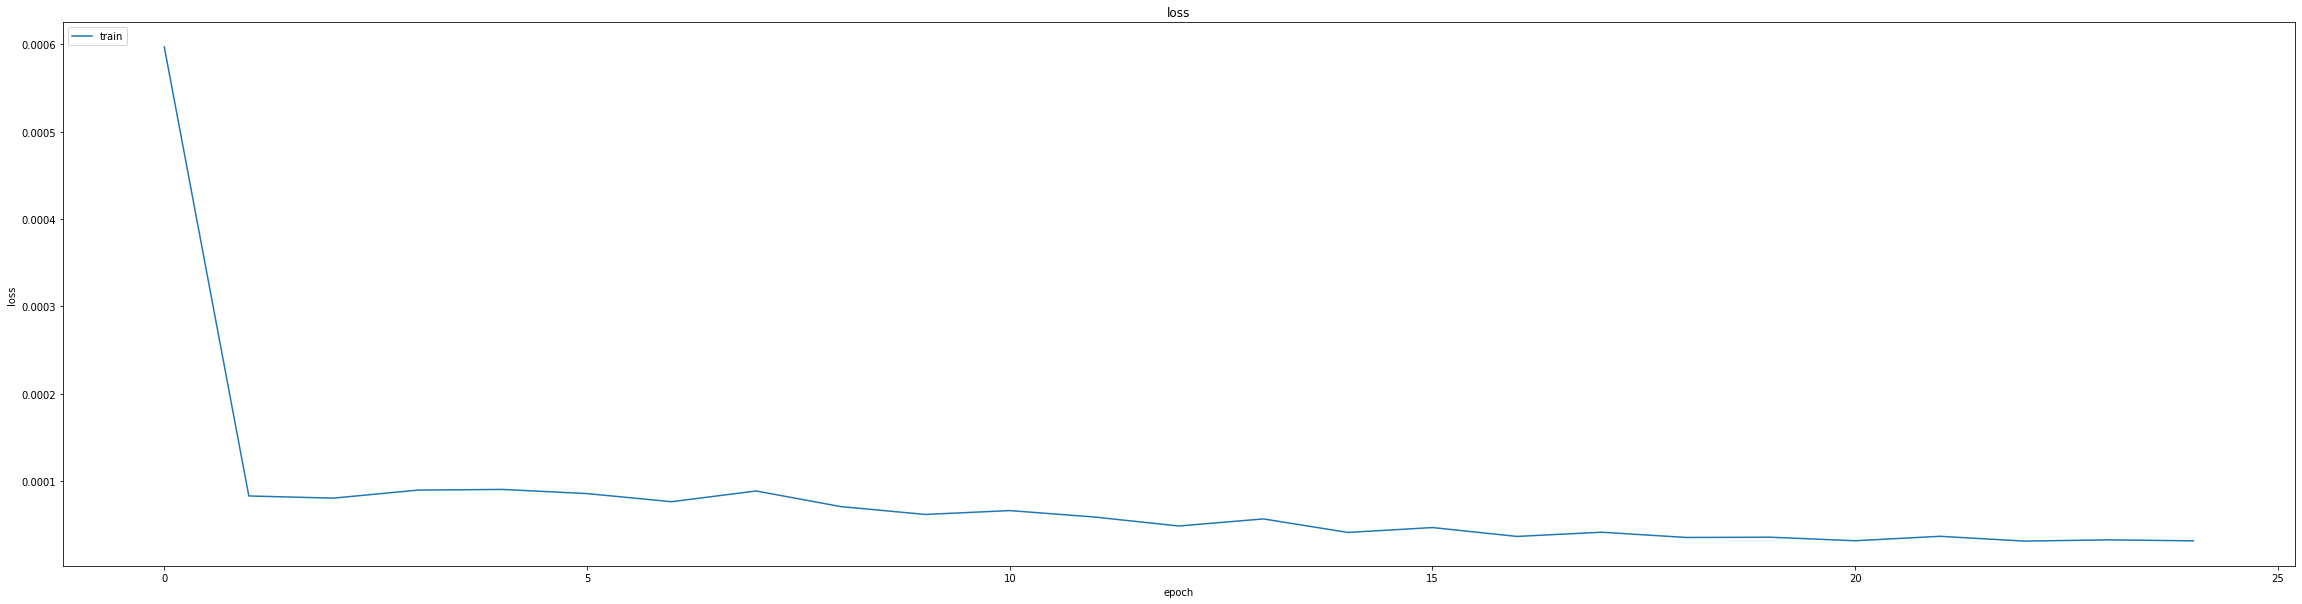

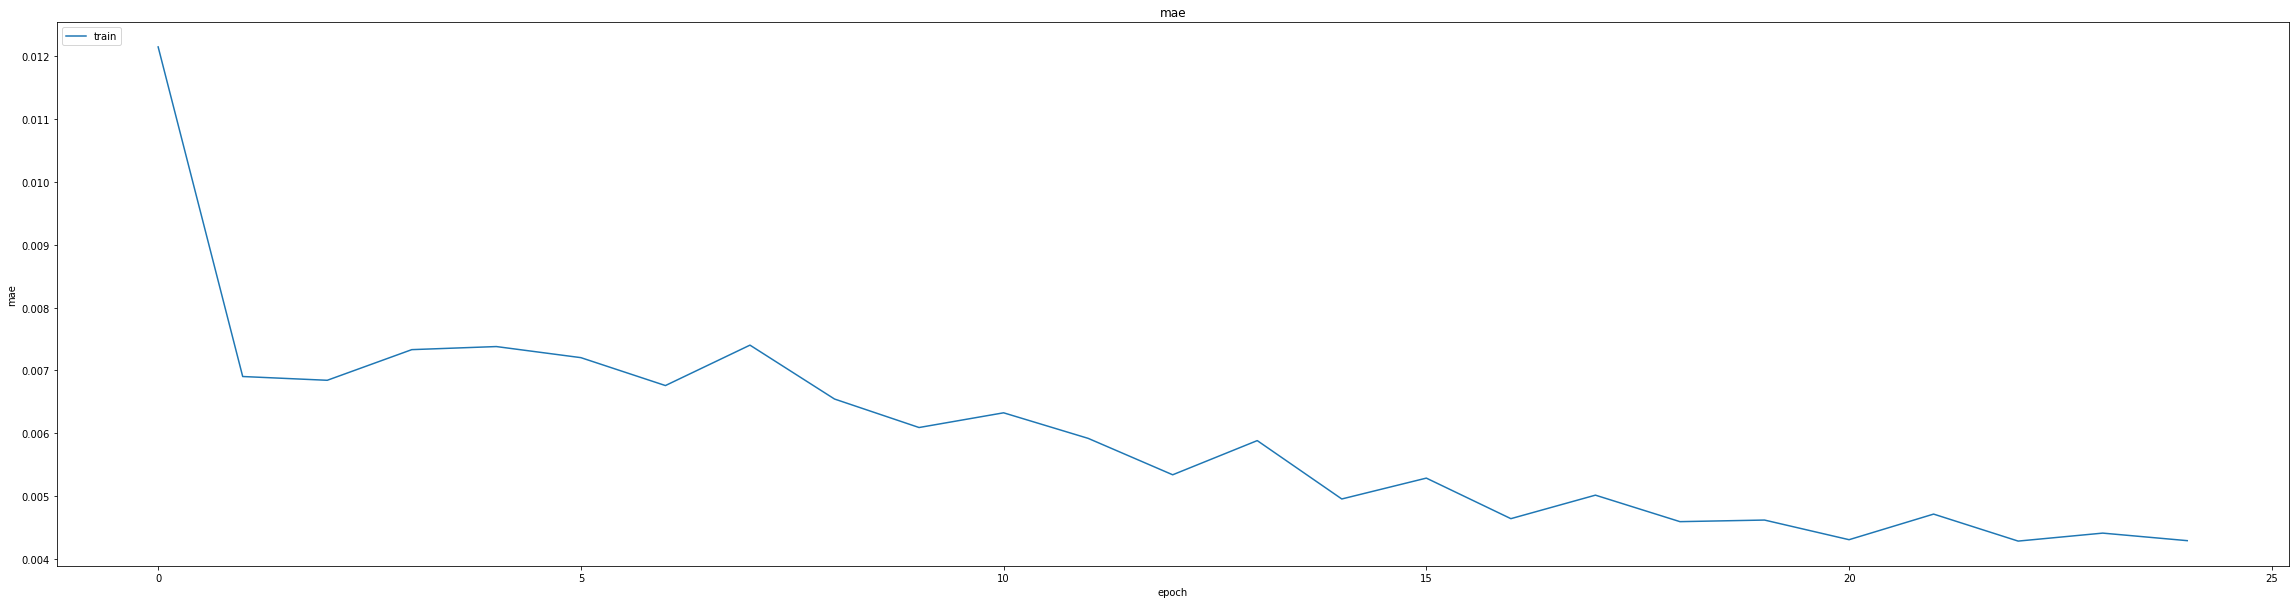

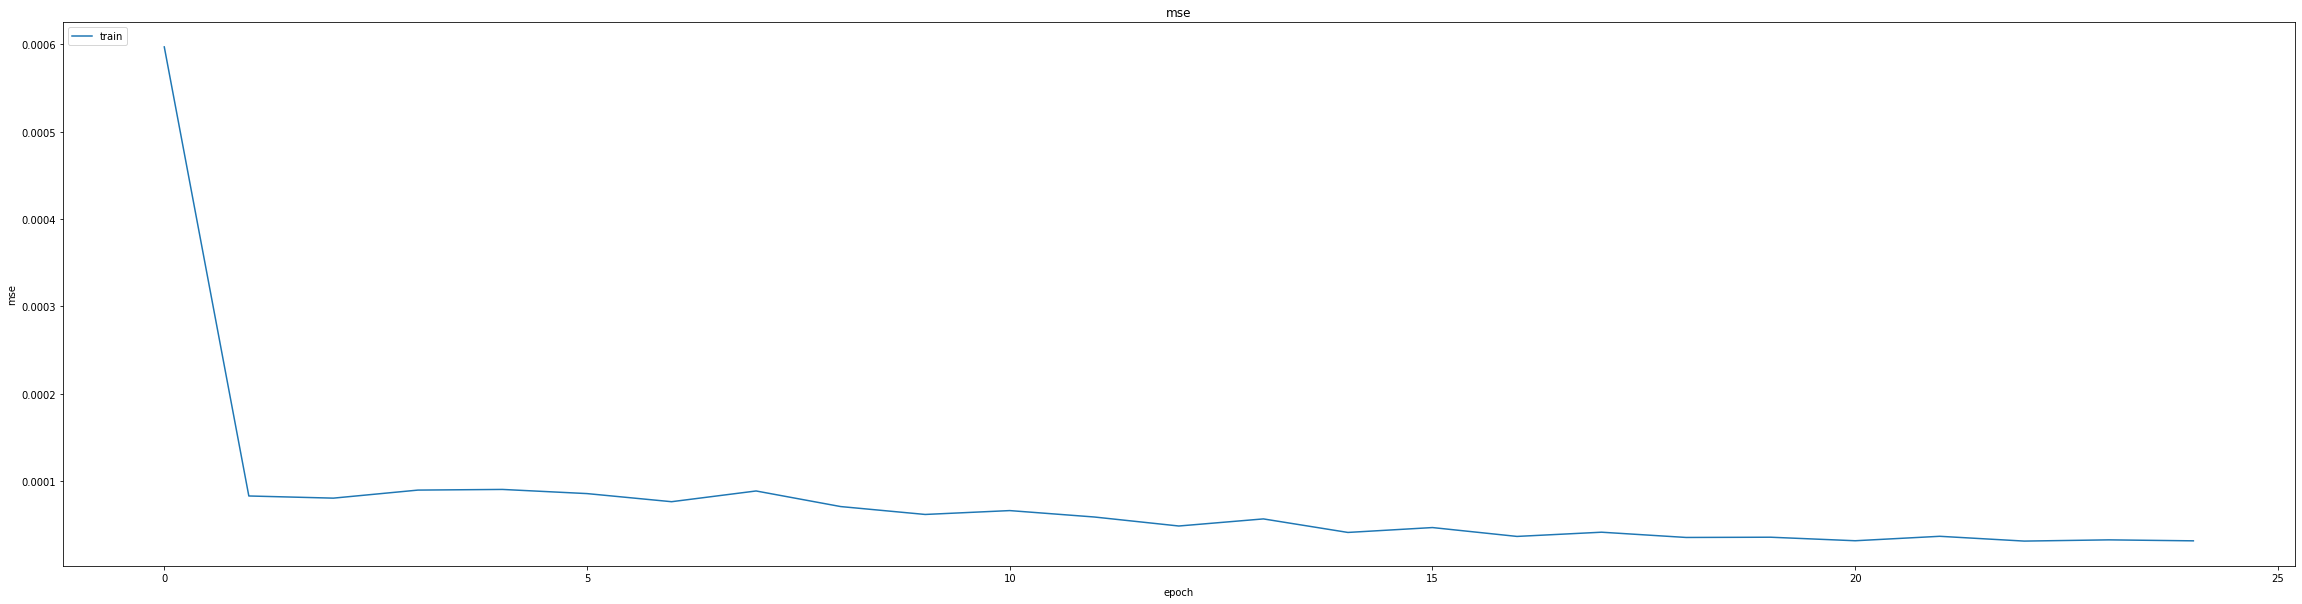

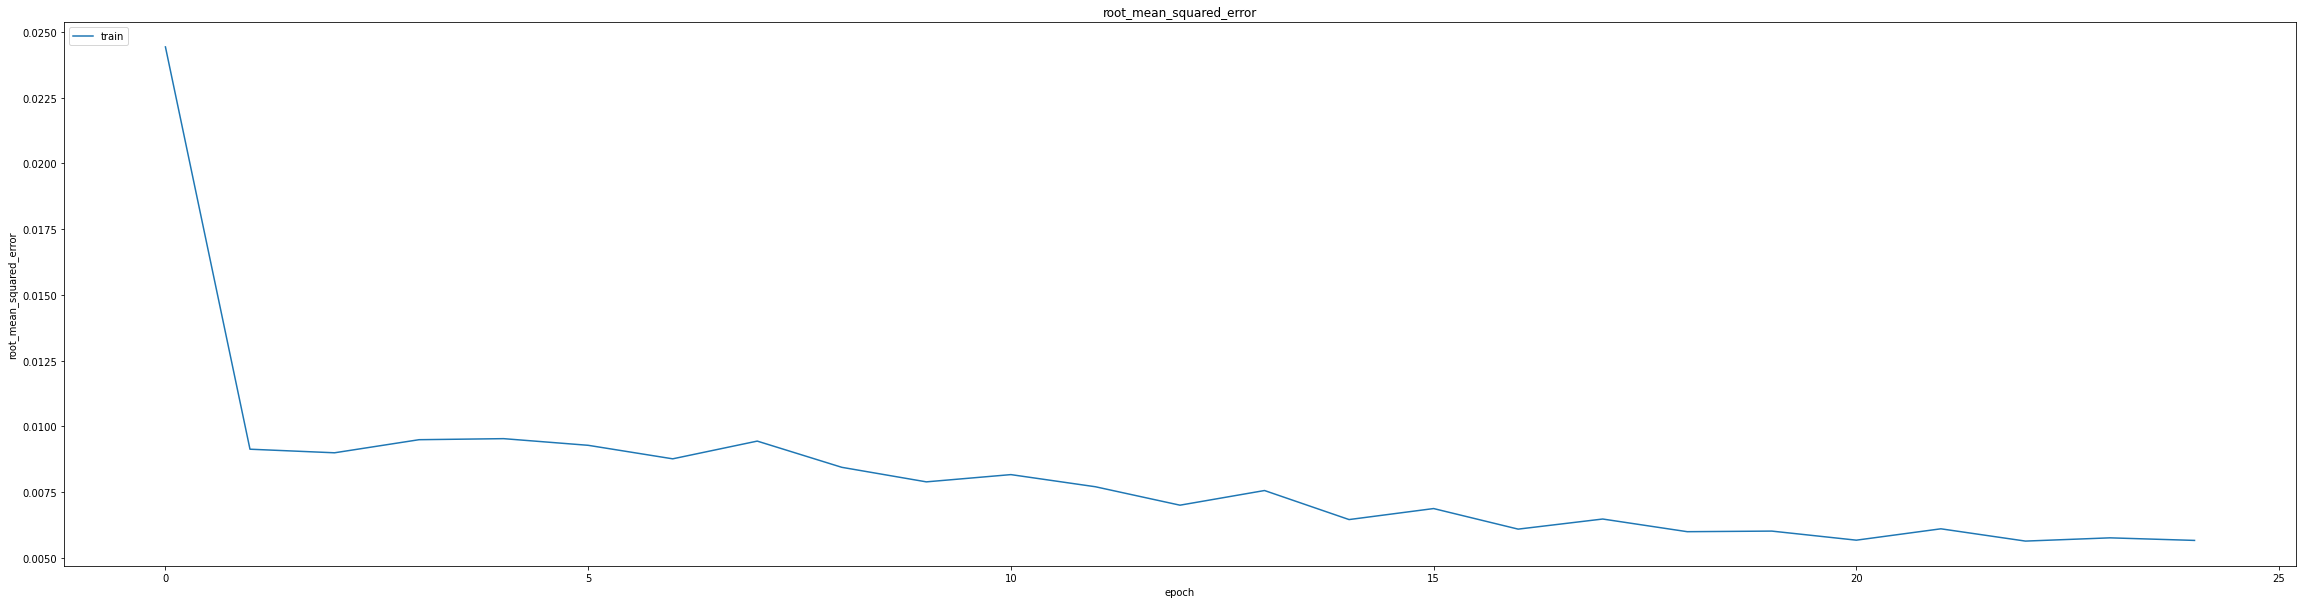

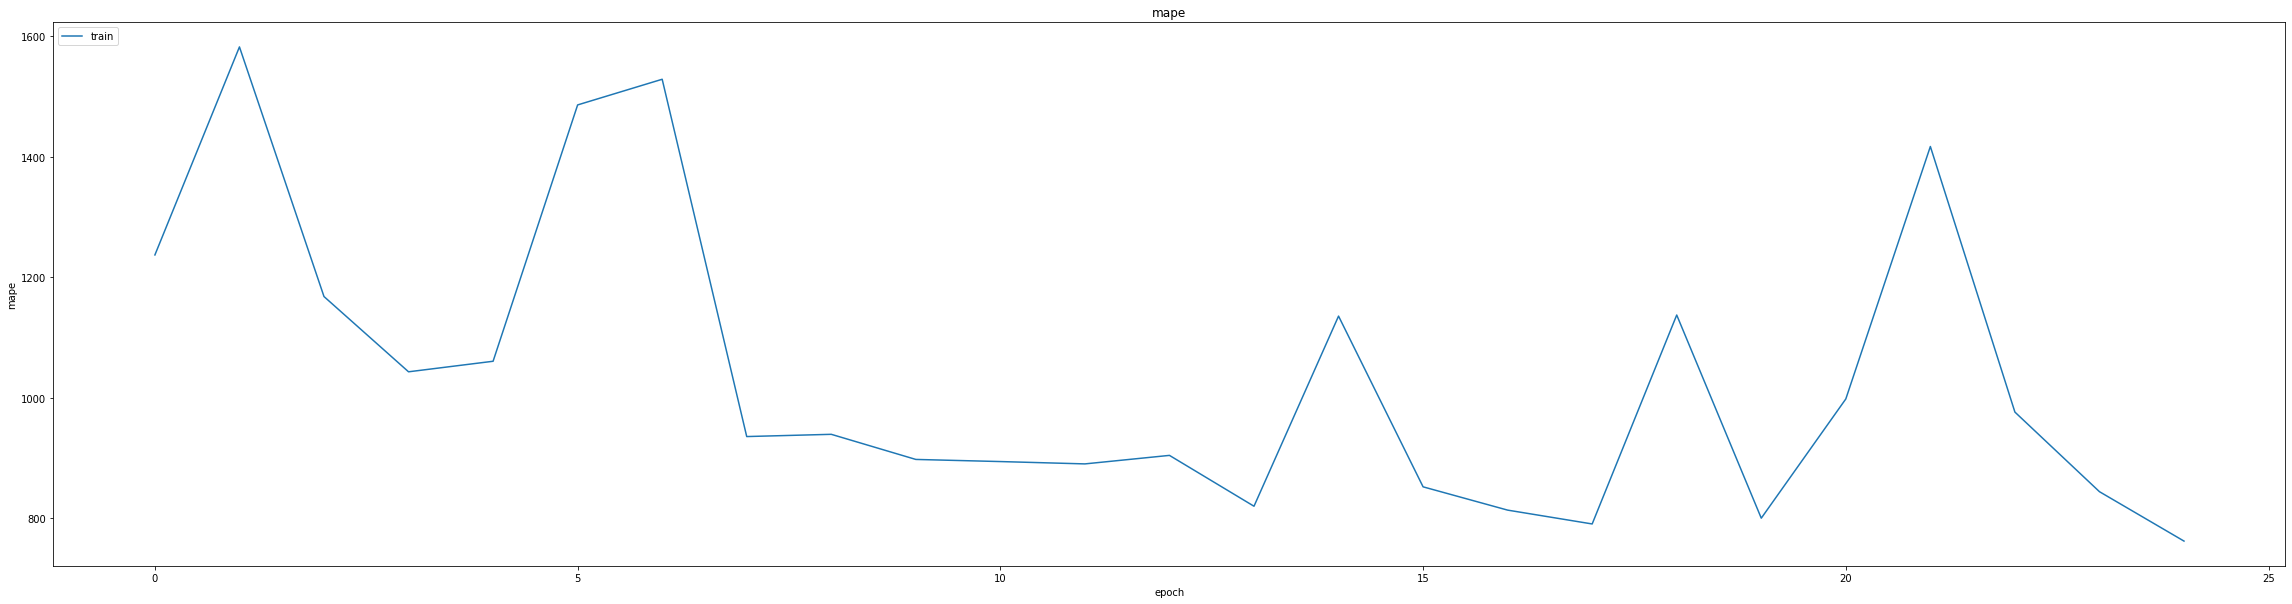

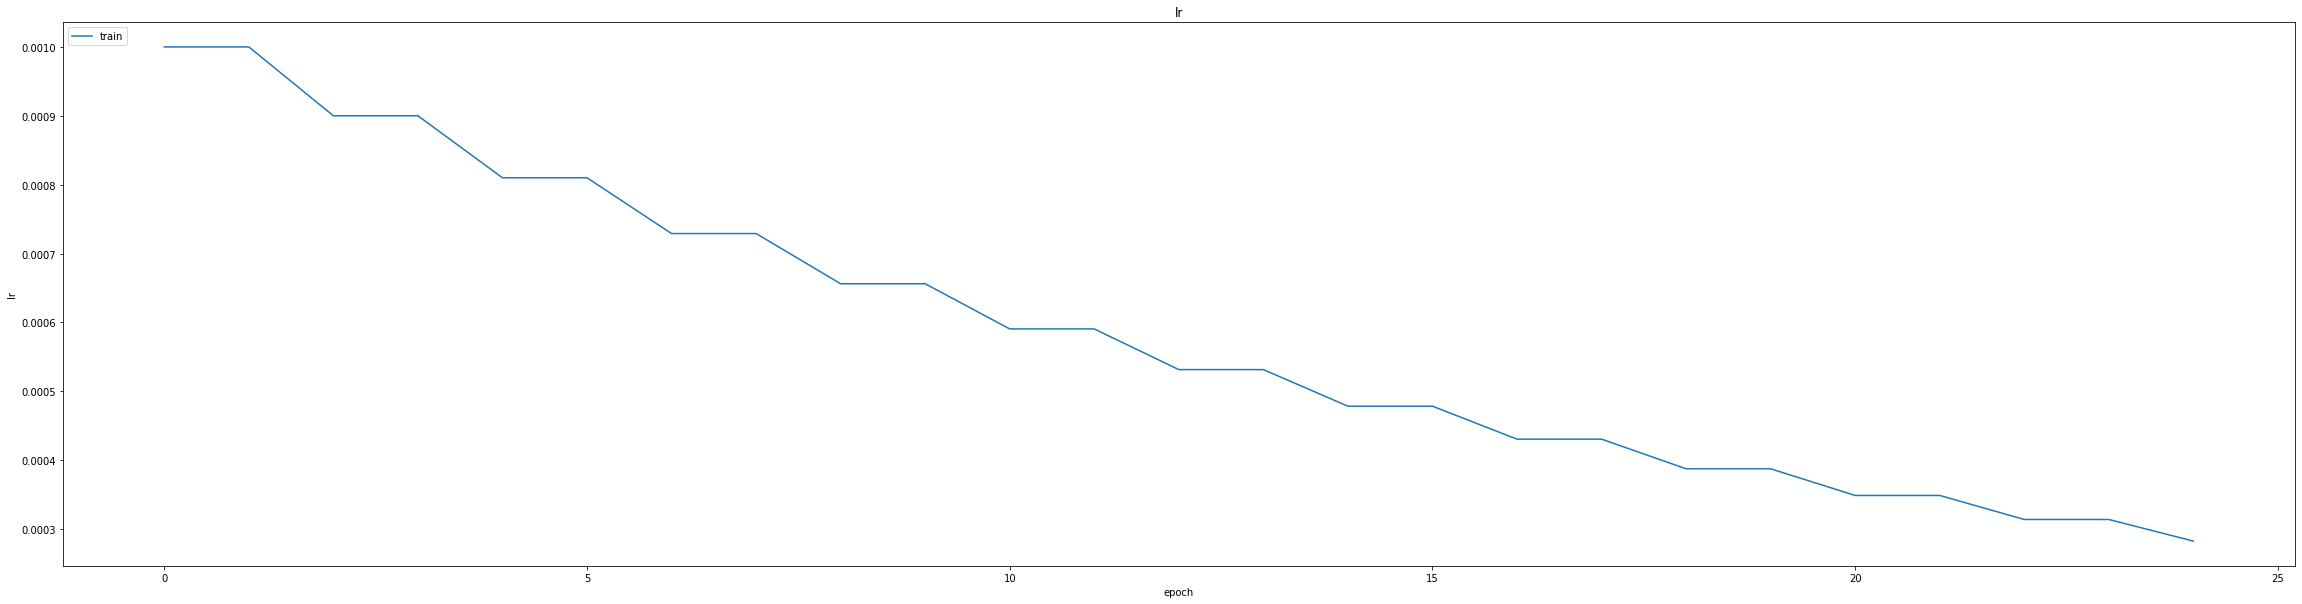

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.004859016276896
0.006619122810661793
464/464 [==============================] - 3s 4ms/step
0.9987689712915485


464/464 [==============================] - 2s 4ms/step


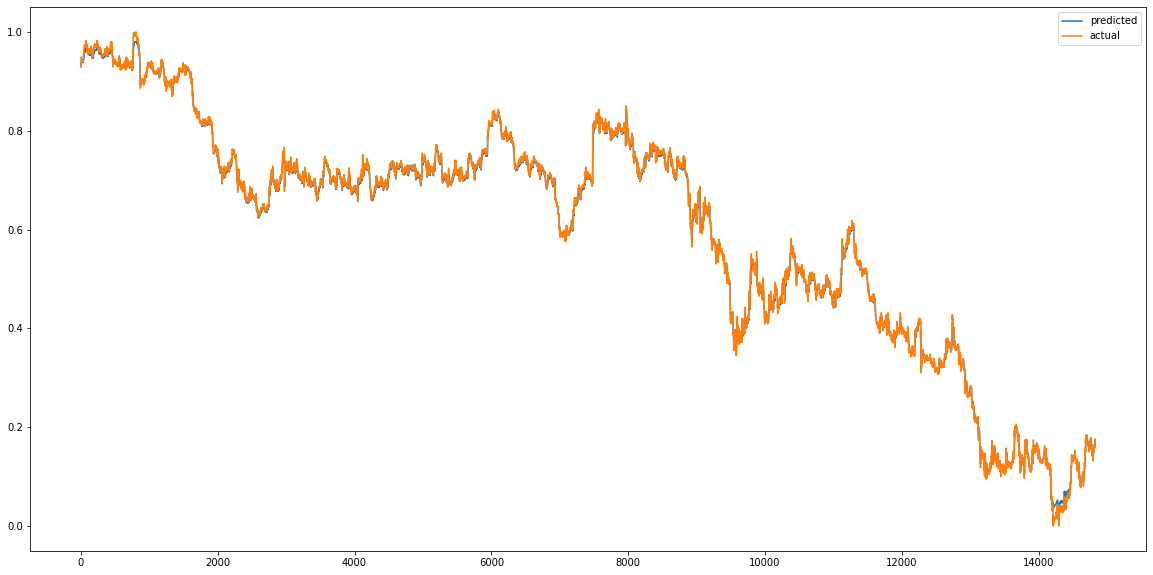

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_15min_LSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


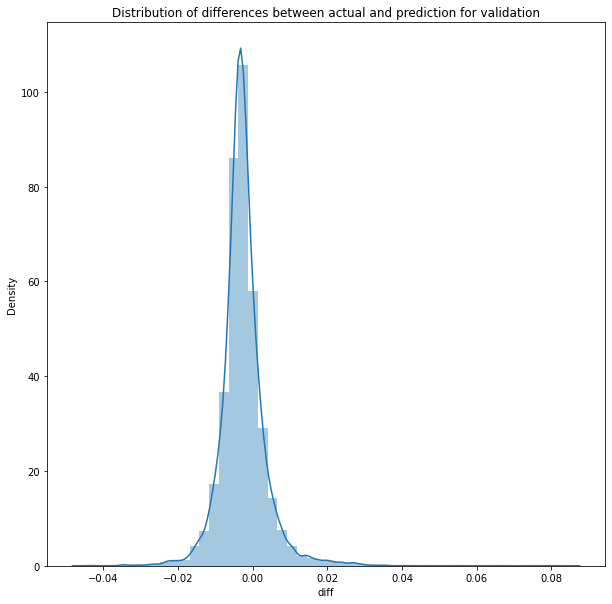

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 2s 4ms/step


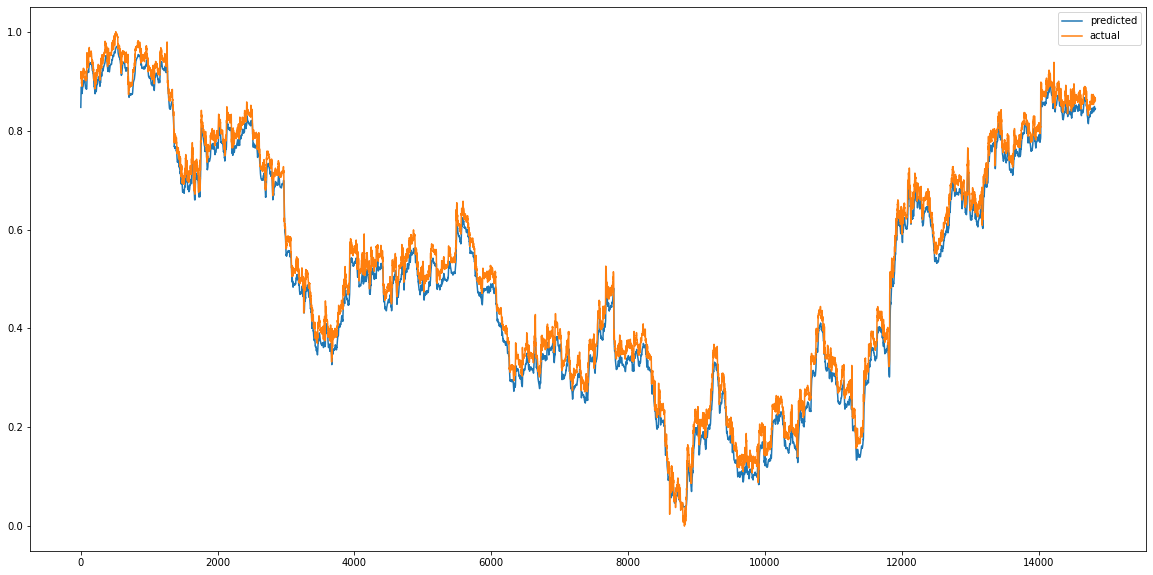

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


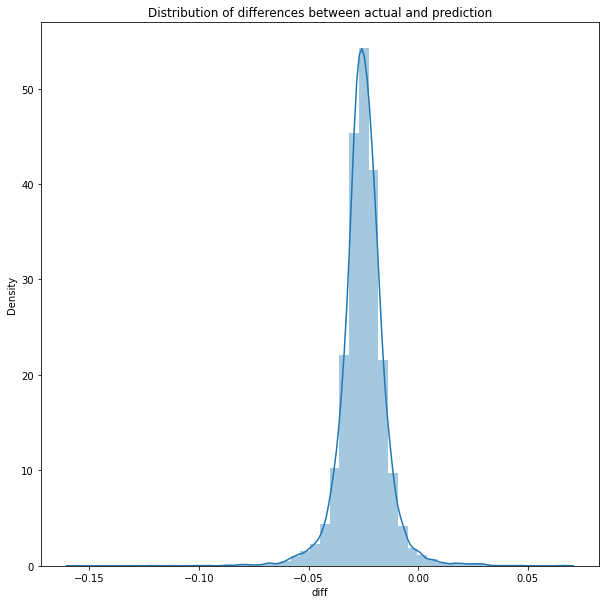

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0007356951968960295
RMSE :  0.027123701755033907
MAE :  0.02542732329040625
464/464 [==============================] - 2s 4ms/step
R2_Score  : 0.9878170162224785


count    14830.000000
mean        -0.025105
std          0.010268
min         -0.156093
25%         -0.029872
50%         -0.025101
75%         -0.020006
max          0.066420
Name: diff, dtype: float64

**GRU_MODEL**



In [ ]:
model= thesis.GRU_Model(x_train)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 256)           207360    
                                                                 
 gru_1 (GRU)                 (None, 24, 64)            61824     
                                                                 
 dropout_2 (Dropout)         (None, 24, 64)            0         
                                                                 
 gru_2 (GRU)                 (None, 16)                3936      
                                                                 
 dense_6 (Dense)             (None, 32)                544       
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 1)                

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
344/348 [============================>.] - ETA: 0s - loss: 407.8621 - mae: 6.8497 - mse: 407.8621 - root_mean_squared_error: 20.1956 - mape: 62269.9062
Epoch 1: val_mse improved from inf to 2.54255, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(60-40)


348/348 [==============================] - 20s 43ms/step - loss: 403.2795 - mae: 6.7913 - mse: 403.2795 - root_mean_squared_error: 20.0818 - mape: 61571.0078 - val_loss: 2.5425 - val_mae: 1.5764 - val_mse: 2.5425 - val_root_mean_squared_error: 1.5945 - val_mape: 147605.5469
Epoch 2/75
344/348 [============================>.] - ETA: 0s - loss: 1.4236 - mae: 1.1377 - mse: 1.4236 - root_mean_squared_error: 1.1931 - mape: 47983.6602
Epoch 2: val_mse improved from 2.54255 to 0.57591, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(60-40)


348/348 [==============================] - 15s 43ms/step - loss: 1.4152 - mae: 1.1337 - mse: 1.4152 - root_mean_squared_error: 1.1896 - mape: 47443.7031 - val_loss: 0.5759 - val_mae: 0.7201 - val_mse: 0.5759 - val_root_mean_squared_error: 0.7589 - val_mape: 89529.6875
Epoch 3/75
343/348 [============================>.] - ETA: 0s - loss: 0.4295 - mae: 0.5946 - mse: 0.4295 - root_mean_squared_error: 0.6553 - mape: 31476.1992
Epoch 3: val_mse improved from 0.57591 to 0.21608, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 0.4272 - mae: 0.5926 - mse: 0.4272 - root_mean_squared_error: 0.6536 - mape: 31032.1113 - val_loss: 0.2161 - val_mae: 0.3985 - val_mse: 0.2161 - val_root_mean_squared_error: 0.4648 - val_mape: 67694.3438
Epoch 4/75
345/348 [============================>.] - ETA: 0s - loss: 0.1939 - mae: 0.3560 - mse: 0.1939 - root_mean_squared_error: 0.4404 - mape: 23244.1953
Epoch 4: val_mse improved from 0.21608 to 0.11086, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 0.1934 - mae: 0.3552 - mse: 0.1934 - root_mean_squared_error: 0.4398 - mape: 23048.9004 - val_loss: 0.1109 - val_mae: 0.2542 - val_mse: 0.1109 - val_root_mean_squared_error: 0.3330 - val_mape: 56380.6719
Epoch 5/75
345/348 [============================>.] - ETA: 0s - loss: 0.1156 - mae: 0.2525 - mse: 0.1156 - root_mean_squared_error: 0.3400 - mape: 18139.4375
Epoch 5: val_mse improved from 0.11086 to 0.07478, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.1153 - mae: 0.2521 - mse: 0.1153 - root_mean_squared_error: 0.3396 - mape: 17987.0215 - val_loss: 0.0748 - val_mae: 0.1923 - val_mse: 0.0748 - val_root_mean_squared_error: 0.2735 - val_mape: 49669.0703
Epoch 6/75
348/348 [==============================] - ETA: 0s - loss: 0.0855 - mae: 0.2128 - mse: 0.0855 - root_mean_squared_error: 0.2925 - mape: 15924.0898
Epoch 6: val_mse improved from 0.07478 to 0.06210, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 0.0855 - mae: 0.2128 - mse: 0.0855 - root_mean_squared_error: 0.2925 - mape: 15924.0898 - val_loss: 0.0621 - val_mae: 0.1855 - val_mse: 0.0621 - val_root_mean_squared_error: 0.2492 - val_mape: 45418.3086
Epoch 7/75
348/348 [==============================] - ETA: 0s - loss: 0.0736 - mae: 0.2033 - mse: 0.0736 - root_mean_squared_error: 0.2713 - mape: 15684.1104
Epoch 7: val_mse improved from 0.06210 to 0.05808, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0736 - mae: 0.2033 - mse: 0.0736 - root_mean_squared_error: 0.2713 - mape: 15684.1104 - val_loss: 0.0581 - val_mae: 0.1916 - val_mse: 0.0581 - val_root_mean_squared_error: 0.2410 - val_mape: 42653.4609
Epoch 8/75
344/348 [============================>.] - ETA: 0s - loss: 0.0690 - mae: 0.2063 - mse: 0.0690 - root_mean_squared_error: 0.2627 - mape: 14651.0391
Epoch 8: val_mse improved from 0.05808 to 0.05727, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 0.0690 - mae: 0.2063 - mse: 0.0690 - root_mean_squared_error: 0.2627 - mape: 14486.1602 - val_loss: 0.0573 - val_mae: 0.1970 - val_mse: 0.0573 - val_root_mean_squared_error: 0.2393 - val_mape: 40850.2969
Epoch 9/75
345/348 [============================>.] - ETA: 0s - loss: 0.0673 - mae: 0.2112 - mse: 0.0673 - root_mean_squared_error: 0.2594 - mape: 13682.7734
Epoch 9: val_mse did not improve from 0.05727
348/348 [==============================] - 4s 12ms/step - loss: 0.0673 - mae: 0.2112 - mse: 0.0673 - root_mean_squared_error: 0.2593 - mape: 13567.8877 - val_loss: 0.0575 - val_mae: 0.2007 - val_mse: 0.0575 - val_root_mean_squared_error: 0.2397 - val_mape: 39765.8555
Epoch 10/75
347/348 [============================>.] - ETA: 0s - loss: 0.0667 - mae: 0.2144 - mse: 0.0667 - root_mean_squared_error: 0.2582 - mape: 13861.1631
Epoch 10: val_mse did not improve from 0.05727
348/348 [==============================] - 4s 11ms/st

348/348 [==============================] - 15s 42ms/step - loss: 0.0646 - mae: 0.2144 - mse: 0.0646 - root_mean_squared_error: 0.2541 - mape: 13231.4912 - val_loss: 0.0569 - val_mae: 0.2030 - val_mse: 0.0569 - val_root_mean_squared_error: 0.2386 - val_mape: 38099.7734
Epoch 16/75
348/348 [==============================] - ETA: 0s - loss: 0.0637 - mae: 0.2128 - mse: 0.0637 - root_mean_squared_error: 0.2525 - mape: 13082.2363
Epoch 16: val_mse improved from 0.05694 to 0.05625, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 0.0637 - mae: 0.2128 - mse: 0.0637 - root_mean_squared_error: 0.2525 - mape: 13082.2363 - val_loss: 0.0562 - val_mae: 0.2015 - val_mse: 0.0562 - val_root_mean_squared_error: 0.2372 - val_mape: 37999.4570
Epoch 17/75
346/348 [============================>.] - ETA: 0s - loss: 0.0626 - mae: 0.2103 - mse: 0.0626 - root_mean_squared_error: 0.2503 - mape: 12733.0518
Epoch 17: val_mse improved from 0.05625 to 0.05536, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0626 - mae: 0.2103 - mse: 0.0626 - root_mean_squared_error: 0.2502 - mape: 12662.5400 - val_loss: 0.0554 - val_mae: 0.1998 - val_mse: 0.0554 - val_root_mean_squared_error: 0.2353 - val_mape: 37730.5391
Epoch 18/75
346/348 [============================>.] - ETA: 0s - loss: 0.0592 - mae: 0.2017 - mse: 0.0592 - root_mean_squared_error: 0.2434 - mape: 12901.0010
Epoch 18: val_mse improved from 0.05536 to 0.05007, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 42ms/step - loss: 0.0592 - mae: 0.2018 - mse: 0.0592 - root_mean_squared_error: 0.2434 - mape: 12829.6436 - val_loss: 0.0501 - val_mae: 0.1880 - val_mse: 0.0501 - val_root_mean_squared_error: 0.2238 - val_mape: 36903.1445
Epoch 19/75
346/348 [============================>.] - ETA: 0s - loss: 0.0513 - mae: 0.1838 - mse: 0.0513 - root_mean_squared_error: 0.2264 - mape: 13769.1406
Epoch 19: val_mse improved from 0.05007 to 0.04187, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 0.0512 - mae: 0.1837 - mse: 0.0512 - root_mean_squared_error: 0.2263 - mape: 13692.8271 - val_loss: 0.0419 - val_mae: 0.1696 - val_mse: 0.0419 - val_root_mean_squared_error: 0.2046 - val_mape: 34715.3008
Epoch 20/75
347/348 [============================>.] - ETA: 0s - loss: 0.0268 - mae: 0.1146 - mse: 0.0268 - root_mean_squared_error: 0.1637 - mape: 9287.6172
Epoch 20: val_mse improved from 0.04187 to 0.01050, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0268 - mae: 0.1145 - mse: 0.0268 - root_mean_squared_error: 0.1637 - mape: 9262.7324 - val_loss: 0.0105 - val_mae: 0.0603 - val_mse: 0.0105 - val_root_mean_squared_error: 0.1025 - val_mape: 26456.5117
Epoch 21/75
344/348 [============================>.] - ETA: 0s - loss: 0.0102 - mae: 0.0667 - mse: 0.0102 - root_mean_squared_error: 0.1008 - mape: 7531.9629
Epoch 21: val_mse improved from 0.01050 to 0.00636, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 0.0101 - mae: 0.0666 - mse: 0.0101 - root_mean_squared_error: 0.1007 - mape: 7447.1455 - val_loss: 0.0064 - val_mae: 0.0518 - val_mse: 0.0064 - val_root_mean_squared_error: 0.0797 - val_mape: 21675.7871
Epoch 22/75
348/348 [==============================] - ETA: 0s - loss: 0.0061 - mae: 0.0523 - mse: 0.0061 - root_mean_squared_error: 0.0779 - mape: 6670.3467
Epoch 22: val_mse improved from 0.00636 to 0.00471, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(60-40)


348/348 [==============================] - 13s 39ms/step - loss: 0.0061 - mae: 0.0523 - mse: 0.0061 - root_mean_squared_error: 0.0779 - mape: 6670.3467 - val_loss: 0.0047 - val_mae: 0.0474 - val_mse: 0.0047 - val_root_mean_squared_error: 0.0686 - val_mape: 18975.0078
Epoch 23/75
345/348 [============================>.] - ETA: 0s - loss: 0.0042 - mae: 0.0443 - mse: 0.0042 - root_mean_squared_error: 0.0647 - mape: 6405.6846
Epoch 23: val_mse improved from 0.00471 to 0.00400, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(60-40)


348/348 [==============================] - 15s 43ms/step - loss: 0.0042 - mae: 0.0443 - mse: 0.0042 - root_mean_squared_error: 0.0647 - mape: 6351.7715 - val_loss: 0.0040 - val_mae: 0.0480 - val_mse: 0.0040 - val_root_mean_squared_error: 0.0632 - val_mape: 17100.2695
Epoch 24/75
344/348 [============================>.] - ETA: 0s - loss: 0.0031 - mae: 0.0393 - mse: 0.0031 - root_mean_squared_error: 0.0561 - mape: 5825.7378
Epoch 24: val_mse improved from 0.00400 to 0.00268, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 0.0031 - mae: 0.0393 - mse: 0.0031 - root_mean_squared_error: 0.0560 - mape: 5760.0879 - val_loss: 0.0027 - val_mae: 0.0368 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0518 - val_mape: 15659.3975
Epoch 25/75
348/348 [==============================] - ETA: 0s - loss: 0.0024 - mae: 0.0351 - mse: 0.0024 - root_mean_squared_error: 0.0490 - mape: 5169.4849
Epoch 25: val_mse improved from 0.00268 to 0.00208, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(60-40)


348/348 [==============================] - 15s 43ms/step - loss: 0.0024 - mae: 0.0351 - mse: 0.0024 - root_mean_squared_error: 0.0490 - mape: 5169.4849 - val_loss: 0.0021 - val_mae: 0.0328 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0456 - val_mape: 14412.3467
Epoch 26/75
345/348 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0321 - mse: 0.0019 - root_mean_squared_error: 0.0440 - mape: 4912.0288
Epoch 26: val_mse improved from 0.00208 to 0.00159, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 0.0019 - mae: 0.0321 - mse: 0.0019 - root_mean_squared_error: 0.0440 - mape: 4870.6987 - val_loss: 0.0016 - val_mae: 0.0278 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0399 - val_mape: 13399.2275
Epoch 27/75
348/348 [==============================] - ETA: 0s - loss: 0.0016 - mae: 0.0295 - mse: 0.0016 - root_mean_squared_error: 0.0398 - mape: 4483.8022
Epoch 27: val_mse improved from 0.00159 to 0.00148, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 0.0016 - mae: 0.0295 - mse: 0.0016 - root_mean_squared_error: 0.0398 - mape: 4483.8022 - val_loss: 0.0015 - val_mae: 0.0282 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0385 - val_mape: 12557.1807
Epoch 28/75
346/348 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0274 - mse: 0.0013 - root_mean_squared_error: 0.0365 - mape: 4317.7588
Epoch 28: val_mse improved from 0.00148 to 0.00109, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(60-40)


348/348 [==============================] - 15s 43ms/step - loss: 0.0013 - mae: 0.0274 - mse: 0.0013 - root_mean_squared_error: 0.0365 - mape: 4293.7817 - val_loss: 0.0011 - val_mae: 0.0229 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0330 - val_mape: 11813.2959
Epoch 29/75
347/348 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0253 - mse: 0.0011 - root_mean_squared_error: 0.0335 - mape: 4080.8843
Epoch 29: val_mse did not improve from 0.00109
348/348 [==============================] - 4s 12ms/step - loss: 0.0011 - mae: 0.0253 - mse: 0.0011 - root_mean_squared_error: 0.0335 - mape: 4069.9131 - val_loss: 0.0012 - val_mae: 0.0262 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0345 - val_mape: 11151.6309
Epoch 30/75
343/348 [============================>.] - ETA: 0s - loss: 9.7435e-04 - mae: 0.0237 - mse: 9.7435e-04 - root_mean_squared_error: 0.0312 - mape: 3798.0305
Epoch 30: val_mse improved from 0.00109 to 0.00079, saving model to /content/drive/MyDrive/mod

348/348 [==============================] - 14s 39ms/step - loss: 9.7412e-04 - mae: 0.0237 - mse: 9.7412e-04 - root_mean_squared_error: 0.0312 - mape: 3744.2810 - val_loss: 7.8702e-04 - val_mae: 0.0190 - val_mse: 7.8702e-04 - val_root_mean_squared_error: 0.0281 - val_mape: 10607.9102
Epoch 31/75
348/348 [==============================] - ETA: 0s - loss: 8.2914e-04 - mae: 0.0220 - mse: 8.2914e-04 - root_mean_squared_error: 0.0288 - mape: 3640.8840
Epoch 31: val_mse did not improve from 0.00079
348/348 [==============================] - 4s 12ms/step - loss: 8.2914e-04 - mae: 0.0220 - mse: 8.2914e-04 - root_mean_squared_error: 0.0288 - mape: 3640.8840 - val_loss: 9.8471e-04 - val_mae: 0.0241 - val_mse: 9.8471e-04 - val_root_mean_squared_error: 0.0314 - val_mape: 10076.4834
Epoch 32/75
346/348 [============================>.] - ETA: 0s - loss: 7.3424e-04 - mae: 0.0207 - mse: 7.3424e-04 - root_mean_squared_error: 0.0271 - mape: 3376.2991
Epoch 32: val_mse did not improve from 0.00079
348/348

348/348 [==============================] - 15s 42ms/step - loss: 5.9520e-04 - mae: 0.0187 - mse: 5.9520e-04 - root_mean_squared_error: 0.0244 - mape: 3050.6287 - val_loss: 7.1897e-04 - val_mae: 0.0198 - val_mse: 7.1897e-04 - val_root_mean_squared_error: 0.0268 - val_mape: 8893.2363
Epoch 35/75
346/348 [============================>.] - ETA: 0s - loss: 5.4425e-04 - mae: 0.0179 - mse: 5.4425e-04 - root_mean_squared_error: 0.0233 - mape: 3076.4607
Epoch 35: val_mse did not improve from 0.00072
348/348 [==============================] - 4s 12ms/step - loss: 5.4382e-04 - mae: 0.0179 - mse: 5.4382e-04 - root_mean_squared_error: 0.0233 - mape: 3059.3701 - val_loss: 7.6807e-04 - val_mae: 0.0212 - val_mse: 7.6807e-04 - val_root_mean_squared_error: 0.0277 - val_mape: 8591.7285
Epoch 36/75
346/348 [============================>.] - ETA: 0s - loss: 5.1664e-04 - mae: 0.0175 - mse: 5.1664e-04 - root_mean_squared_error: 0.0227 - mape: 3001.4932
Epoch 36: val_mse improved from 0.00072 to 0.00053, savi

348/348 [==============================] - 15s 42ms/step - loss: 5.1723e-04 - mae: 0.0175 - mse: 5.1723e-04 - root_mean_squared_error: 0.0227 - mape: 2984.8374 - val_loss: 5.2934e-04 - val_mae: 0.0161 - val_mse: 5.2934e-04 - val_root_mean_squared_error: 0.0230 - val_mape: 8359.0469
Epoch 37/75
347/348 [============================>.] - ETA: 0s - loss: 4.5686e-04 - mae: 0.0164 - mse: 4.5686e-04 - root_mean_squared_error: 0.0214 - mape: 2823.7651
Epoch 37: val_mse did not improve from 0.00053
348/348 [==============================] - 4s 12ms/step - loss: 4.5675e-04 - mae: 0.0164 - mse: 4.5675e-04 - root_mean_squared_error: 0.0214 - mape: 2816.1709 - val_loss: 7.4713e-04 - val_mae: 0.0211 - val_mse: 7.4713e-04 - val_root_mean_squared_error: 0.0273 - val_mape: 8117.0898
Epoch 38/75
344/348 [============================>.] - ETA: 0s - loss: 4.3061e-04 - mae: 0.0159 - mse: 4.3061e-04 - root_mean_squared_error: 0.0208 - mape: 2813.6074
Epoch 38: val_mse did not improve from 0.00053
348/348 [

348/348 [==============================] - 14s 40ms/step - loss: 3.5057e-04 - mae: 0.0143 - mse: 3.5057e-04 - root_mean_squared_error: 0.0187 - mape: 2472.3020 - val_loss: 4.8983e-04 - val_mae: 0.0163 - val_mse: 4.8983e-04 - val_root_mean_squared_error: 0.0221 - val_mape: 7081.5254
Epoch 43/75
346/348 [============================>.] - ETA: 0s - loss: 3.2971e-04 - mae: 0.0138 - mse: 3.2971e-04 - root_mean_squared_error: 0.0182 - mape: 2395.5898
Epoch 43: val_mse did not improve from 0.00049
348/348 [==============================] - 4s 12ms/step - loss: 3.2943e-04 - mae: 0.0138 - mse: 3.2943e-04 - root_mean_squared_error: 0.0182 - mape: 2382.2776 - val_loss: 8.1779e-04 - val_mae: 0.0229 - val_mse: 8.1779e-04 - val_root_mean_squared_error: 0.0286 - val_mape: 6926.9673
Epoch 44/75
344/348 [============================>.] - ETA: 0s - loss: 3.5051e-04 - mae: 0.0143 - mse: 3.5051e-04 - root_mean_squared_error: 0.0187 - mape: 2368.7546
Epoch 44: val_mse did not improve from 0.00049
348/348 [

348/348 [==============================] - 15s 42ms/step - loss: 3.0276e-04 - mae: 0.0132 - mse: 3.0276e-04 - root_mean_squared_error: 0.0174 - mape: 2182.9478 - val_loss: 4.6103e-04 - val_mae: 0.0159 - val_mse: 4.6103e-04 - val_root_mean_squared_error: 0.0215 - val_mape: 6457.2754
Epoch 48/75
343/348 [============================>.] - ETA: 0s - loss: 2.9283e-04 - mae: 0.0130 - mse: 2.9283e-04 - root_mean_squared_error: 0.0171 - mape: 2208.3445
Epoch 48: val_mse did not improve from 0.00046
348/348 [==============================] - 4s 12ms/step - loss: 2.9264e-04 - mae: 0.0130 - mse: 2.9264e-04 - root_mean_squared_error: 0.0171 - mape: 2177.0703 - val_loss: 5.8679e-04 - val_mae: 0.0190 - val_mse: 5.8679e-04 - val_root_mean_squared_error: 0.0242 - val_mape: 6311.6953
Epoch 49/75
344/348 [============================>.] - ETA: 0s - loss: 2.8832e-04 - mae: 0.0129 - mse: 2.8832e-04 - root_mean_squared_error: 0.0170 - mape: 2225.4822
Epoch 49: val_mse did not improve from 0.00046
348/348 [

348/348 [==============================] - 14s 39ms/step - loss: 2.7470e-04 - mae: 0.0126 - mse: 2.7470e-04 - root_mean_squared_error: 0.0166 - mape: 2106.0417 - val_loss: 4.4450e-04 - val_mae: 0.0159 - val_mse: 4.4450e-04 - val_root_mean_squared_error: 0.0211 - val_mape: 6207.4663
Epoch 51/75
347/348 [============================>.] - ETA: 0s - loss: 2.8624e-04 - mae: 0.0129 - mse: 2.8624e-04 - root_mean_squared_error: 0.0169 - mape: 2058.0835
Epoch 51: val_mse improved from 0.00044 to 0.00038, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(60-40)


348/348 [==============================] - 15s 43ms/step - loss: 2.8613e-04 - mae: 0.0129 - mse: 2.8613e-04 - root_mean_squared_error: 0.0169 - mape: 2052.5457 - val_loss: 3.7735e-04 - val_mae: 0.0140 - val_mse: 3.7735e-04 - val_root_mean_squared_error: 0.0194 - val_mape: 6097.0884
Epoch 52/75
344/348 [============================>.] - ETA: 0s - loss: 2.6476e-04 - mae: 0.0123 - mse: 2.6476e-04 - root_mean_squared_error: 0.0163 - mape: 2047.0714
Epoch 52: val_mse did not improve from 0.00038
348/348 [==============================] - 4s 12ms/step - loss: 2.6481e-04 - mae: 0.0123 - mse: 2.6481e-04 - root_mean_squared_error: 0.0163 - mape: 2023.9452 - val_loss: 4.4825e-04 - val_mae: 0.0162 - val_mse: 4.4825e-04 - val_root_mean_squared_error: 0.0212 - val_mape: 5994.9868
Epoch 53/75
346/348 [============================>.] - ETA: 0s - loss: 2.6114e-04 - mae: 0.0122 - mse: 2.6114e-04 - root_mean_squared_error: 0.0162 - mape: 1969.7373
Epoch 53: val_mse did not improve from 0.00038
348/348 [

348/348 [==============================] - 15s 42ms/step - loss: 2.2571e-04 - mae: 0.0114 - mse: 2.2571e-04 - root_mean_squared_error: 0.0150 - mape: 1845.1943 - val_loss: 3.1840e-04 - val_mae: 0.0130 - val_mse: 3.1840e-04 - val_root_mean_squared_error: 0.0178 - val_mape: 5460.8452
Epoch 62/75
348/348 [==============================] - ETA: 0s - loss: 2.1902e-04 - mae: 0.0113 - mse: 2.1902e-04 - root_mean_squared_error: 0.0148 - mape: 1823.9249
Epoch 62: val_mse did not improve from 0.00032
348/348 [==============================] - 4s 12ms/step - loss: 2.1902e-04 - mae: 0.0113 - mse: 2.1902e-04 - root_mean_squared_error: 0.0148 - mape: 1823.9249 - val_loss: 3.4675e-04 - val_mae: 0.0139 - val_mse: 3.4675e-04 - val_root_mean_squared_error: 0.0186 - val_mape: 5443.7598
Epoch 63/75
348/348 [==============================] - ETA: 0s - loss: 2.2095e-04 - mae: 0.0114 - mse: 2.2095e-04 - root_mean_squared_error: 0.0149 - mape: 1795.2134
Epoch 63: val_mse did not improve from 0.00032
348/348 [

348/348 [==============================] - 14s 40ms/step - loss: 2.1117e-04 - mae: 0.0111 - mse: 2.1117e-04 - root_mean_squared_error: 0.0145 - mape: 1788.3224 - val_loss: 2.9738e-04 - val_mae: 0.0125 - val_mse: 2.9738e-04 - val_root_mean_squared_error: 0.0172 - val_mape: 5274.2305
Epoch 65/75
347/348 [============================>.] - ETA: 0s - loss: 2.0775e-04 - mae: 0.0110 - mse: 2.0775e-04 - root_mean_squared_error: 0.0144 - mape: 1710.1554
Epoch 65: val_mse improved from 0.00030 to 0.00029, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(60-40)


348/348 [==============================] - 15s 43ms/step - loss: 2.0822e-04 - mae: 0.0110 - mse: 2.0822e-04 - root_mean_squared_error: 0.0144 - mape: 1705.5559 - val_loss: 2.9436e-04 - val_mae: 0.0127 - val_mse: 2.9436e-04 - val_root_mean_squared_error: 0.0172 - val_mape: 5160.6787
Epoch 66/75
348/348 [==============================] - ETA: 0s - loss: 2.1662e-04 - mae: 0.0114 - mse: 2.1662e-04 - root_mean_squared_error: 0.0147 - mape: 1647.8990
Epoch 66: val_mse did not improve from 0.00029
348/348 [==============================] - 4s 12ms/step - loss: 2.1662e-04 - mae: 0.0114 - mse: 2.1662e-04 - root_mean_squared_error: 0.0147 - mape: 1647.8990 - val_loss: 8.2423e-04 - val_mae: 0.0243 - val_mse: 8.2423e-04 - val_root_mean_squared_error: 0.0287 - val_mape: 5056.4097
Epoch 67/75
348/348 [==============================] - ETA: 0s - loss: 1.9616e-04 - mae: 0.0107 - mse: 1.9616e-04 - root_mean_squared_error: 0.0140 - mape: 1697.2531
Epoch 67: val_mse improved from 0.00029 to 0.00027, savi

348/348 [==============================] - 14s 40ms/step - loss: 1.9616e-04 - mae: 0.0107 - mse: 1.9616e-04 - root_mean_squared_error: 0.0140 - mape: 1697.2531 - val_loss: 2.7320e-04 - val_mae: 0.0123 - val_mse: 2.7320e-04 - val_root_mean_squared_error: 0.0165 - val_mape: 5077.9766
Epoch 68/75
345/348 [============================>.] - ETA: 0s - loss: 1.6496e-04 - mae: 0.0097 - mse: 1.6496e-04 - root_mean_squared_error: 0.0128 - mape: 1664.3544
Epoch 68: val_mse improved from 0.00027 to 0.00024, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(60-40)


348/348 [==============================] - 15s 43ms/step - loss: 1.6506e-04 - mae: 0.0097 - mse: 1.6506e-04 - root_mean_squared_error: 0.0128 - mape: 1650.3265 - val_loss: 2.3830e-04 - val_mae: 0.0113 - val_mse: 2.3830e-04 - val_root_mean_squared_error: 0.0154 - val_mape: 4943.7715
Epoch 69/75
347/348 [============================>.] - ETA: 0s - loss: 2.1427e-04 - mae: 0.0109 - mse: 2.1427e-04 - root_mean_squared_error: 0.0146 - mape: 1679.6432
Epoch 69: val_mse did not improve from 0.00024
348/348 [==============================] - 4s 12ms/step - loss: 2.1412e-04 - mae: 0.0109 - mse: 2.1412e-04 - root_mean_squared_error: 0.0146 - mape: 1675.1252 - val_loss: 5.5654e-04 - val_mae: 0.0197 - val_mse: 5.5654e-04 - val_root_mean_squared_error: 0.0236 - val_mape: 4798.4443
Epoch 70/75
347/348 [============================>.] - ETA: 0s - loss: 1.7476e-04 - mae: 0.0101 - mse: 1.7476e-04 - root_mean_squared_error: 0.0132 - mape: 1627.7766
Epoch 70: val_mse did not improve from 0.00024
348/348 [

348/348 [==============================] - 15s 43ms/step - loss: 1.6426e-04 - mae: 0.0098 - mse: 1.6426e-04 - root_mean_squared_error: 0.0128 - mape: 1571.5078 - val_loss: 2.0275e-04 - val_mae: 0.0102 - val_mse: 2.0275e-04 - val_root_mean_squared_error: 0.0142 - val_mape: 4759.6929
Epoch 72/75
347/348 [============================>.] - ETA: 0s - loss: 1.5657e-04 - mae: 0.0096 - mse: 1.5657e-04 - root_mean_squared_error: 0.0125 - mape: 1567.2375
Epoch 72: val_mse improved from 0.00020 to 0.00018, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 1.5650e-04 - mae: 0.0096 - mse: 1.5650e-04 - root_mean_squared_error: 0.0125 - mape: 1563.0205 - val_loss: 1.7693e-04 - val_mae: 0.0093 - val_mse: 1.7693e-04 - val_root_mean_squared_error: 0.0133 - val_mape: 4731.5986
Epoch 73/75
348/348 [==============================] - ETA: 0s - loss: 1.5855e-04 - mae: 0.0097 - mse: 1.5855e-04 - root_mean_squared_error: 0.0126 - mape: 1552.3257
Epoch 73: val_mse did not improve from 0.00018
348/348 [==============================] - 4s 12ms/step - loss: 1.5855e-04 - mae: 0.0097 - mse: 1.5855e-04 - root_mean_squared_error: 0.0126 - mape: 1552.3257 - val_loss: 3.1154e-04 - val_mae: 0.0141 - val_mse: 3.1154e-04 - val_root_mean_squared_error: 0.0177 - val_mape: 4620.3906
Epoch 74/75
345/348 [============================>.] - ETA: 0s - loss: 1.6462e-04 - mae: 0.0099 - mse: 1.6462e-04 - root_mean_squared_error: 0.0128 - mape: 1498.2968
Epoch 74: val_mse did not improve from 0.00018
348/348 [

348/348 [==============================] - 15s 43ms/step - loss: 1.3995e-04 - mae: 0.0091 - mse: 1.3995e-04 - root_mean_squared_error: 0.0118 - mape: 1502.8713 - val_loss: 1.7435e-04 - val_mae: 0.0096 - val_mse: 1.7435e-04 - val_root_mean_squared_error: 0.0132 - val_mape: 4499.5332


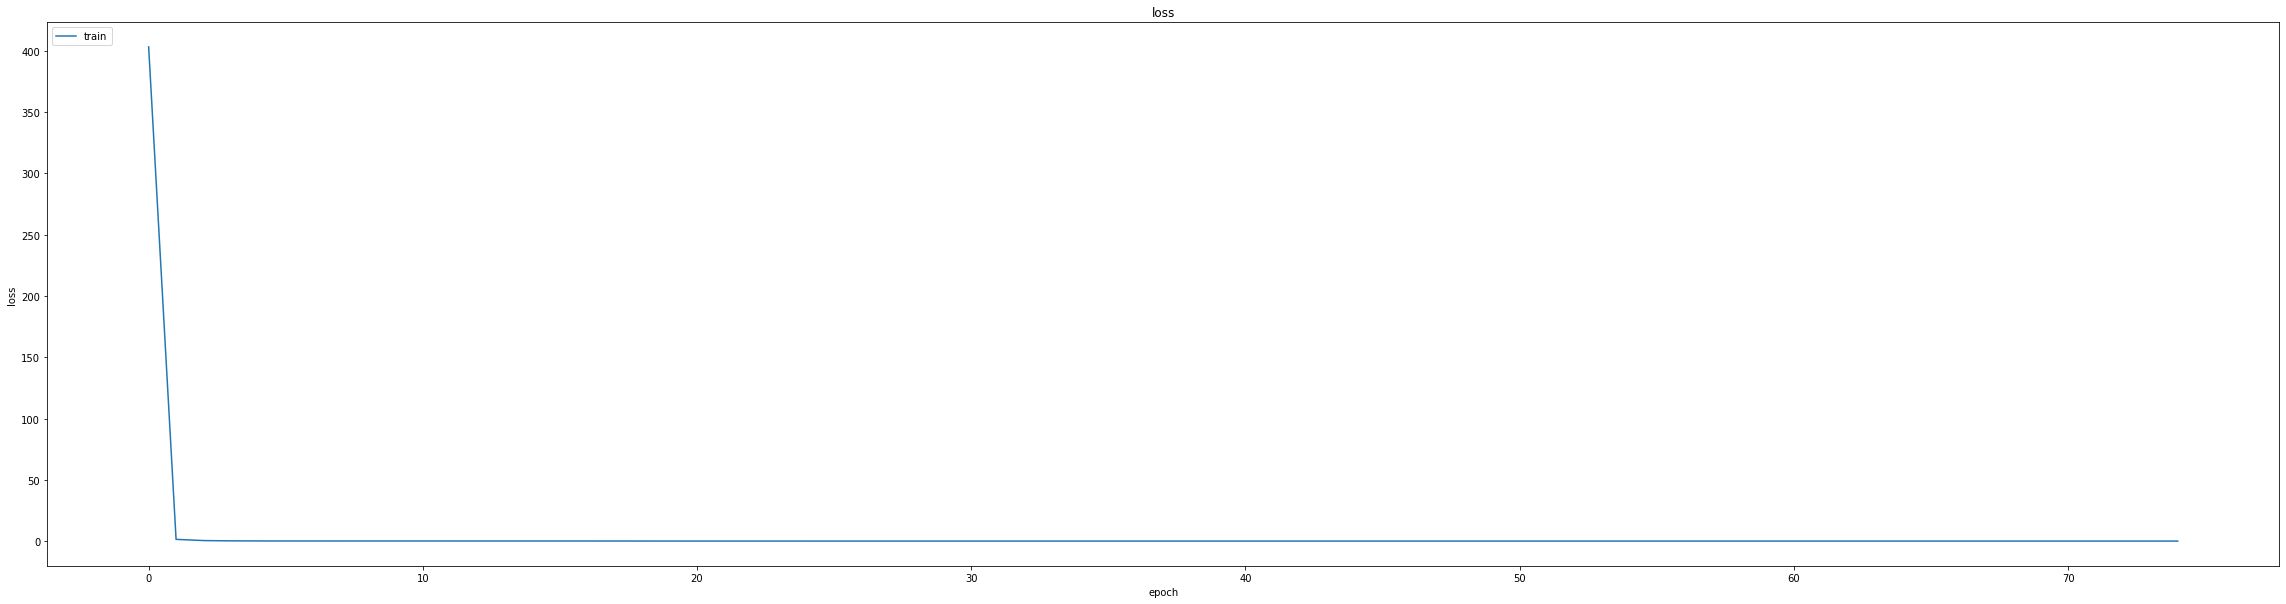

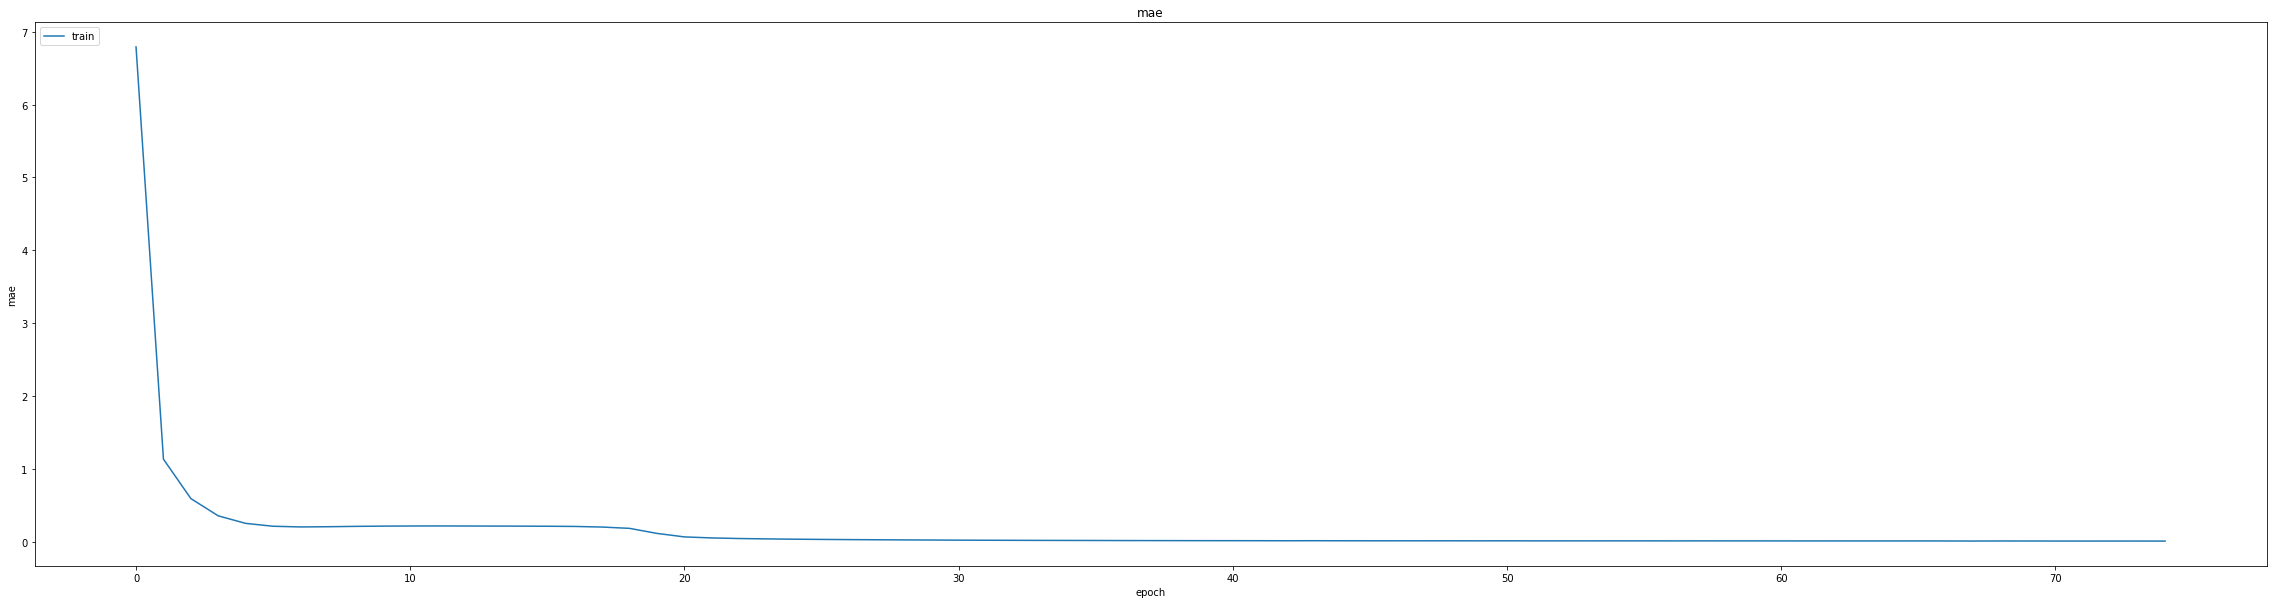

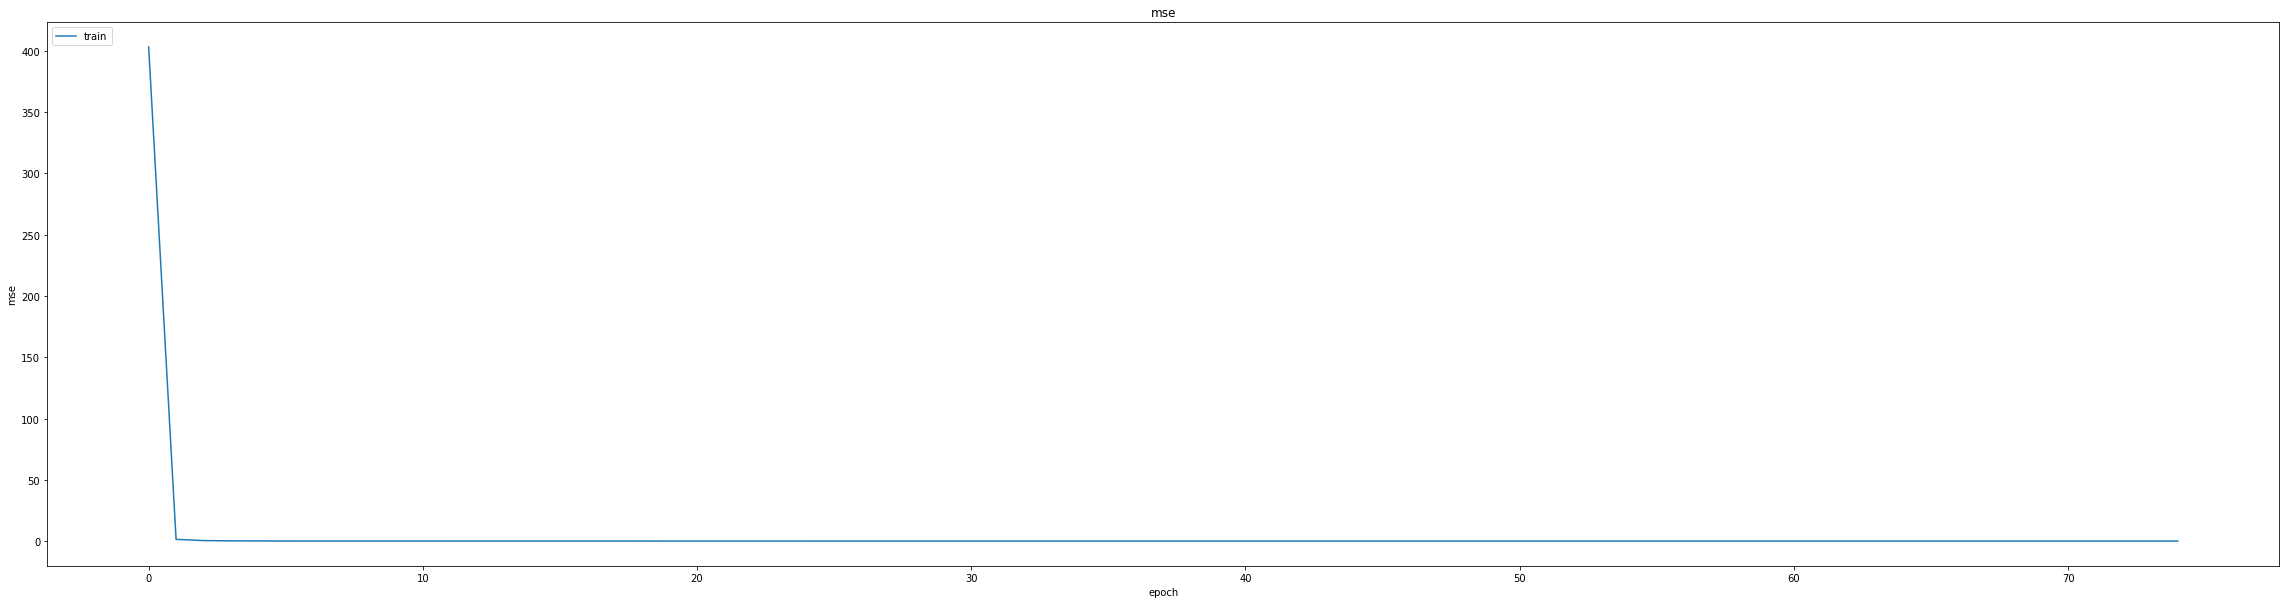

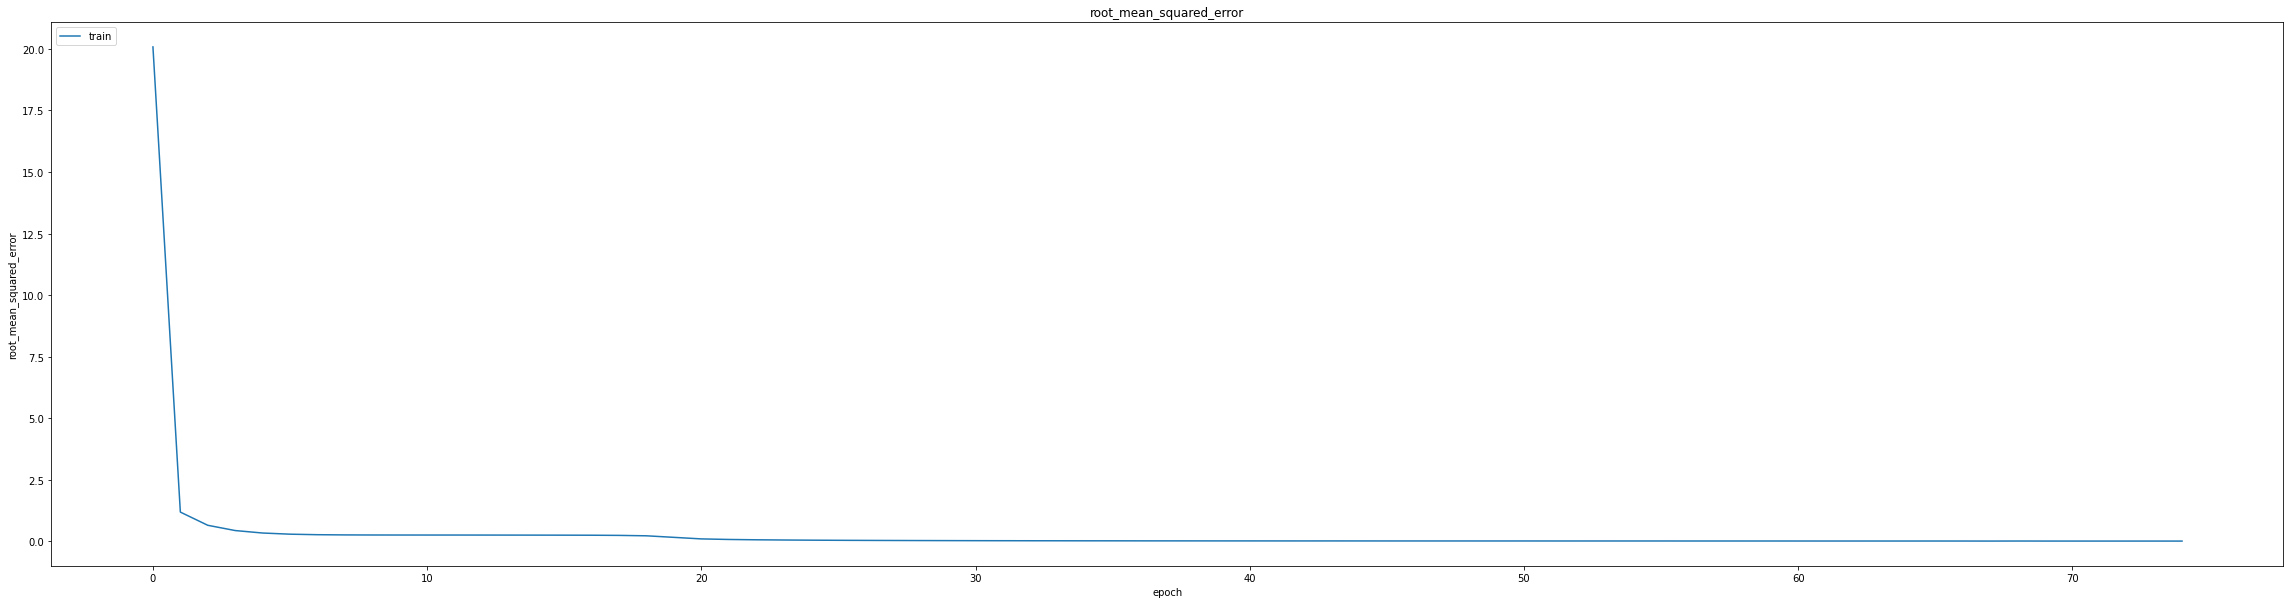

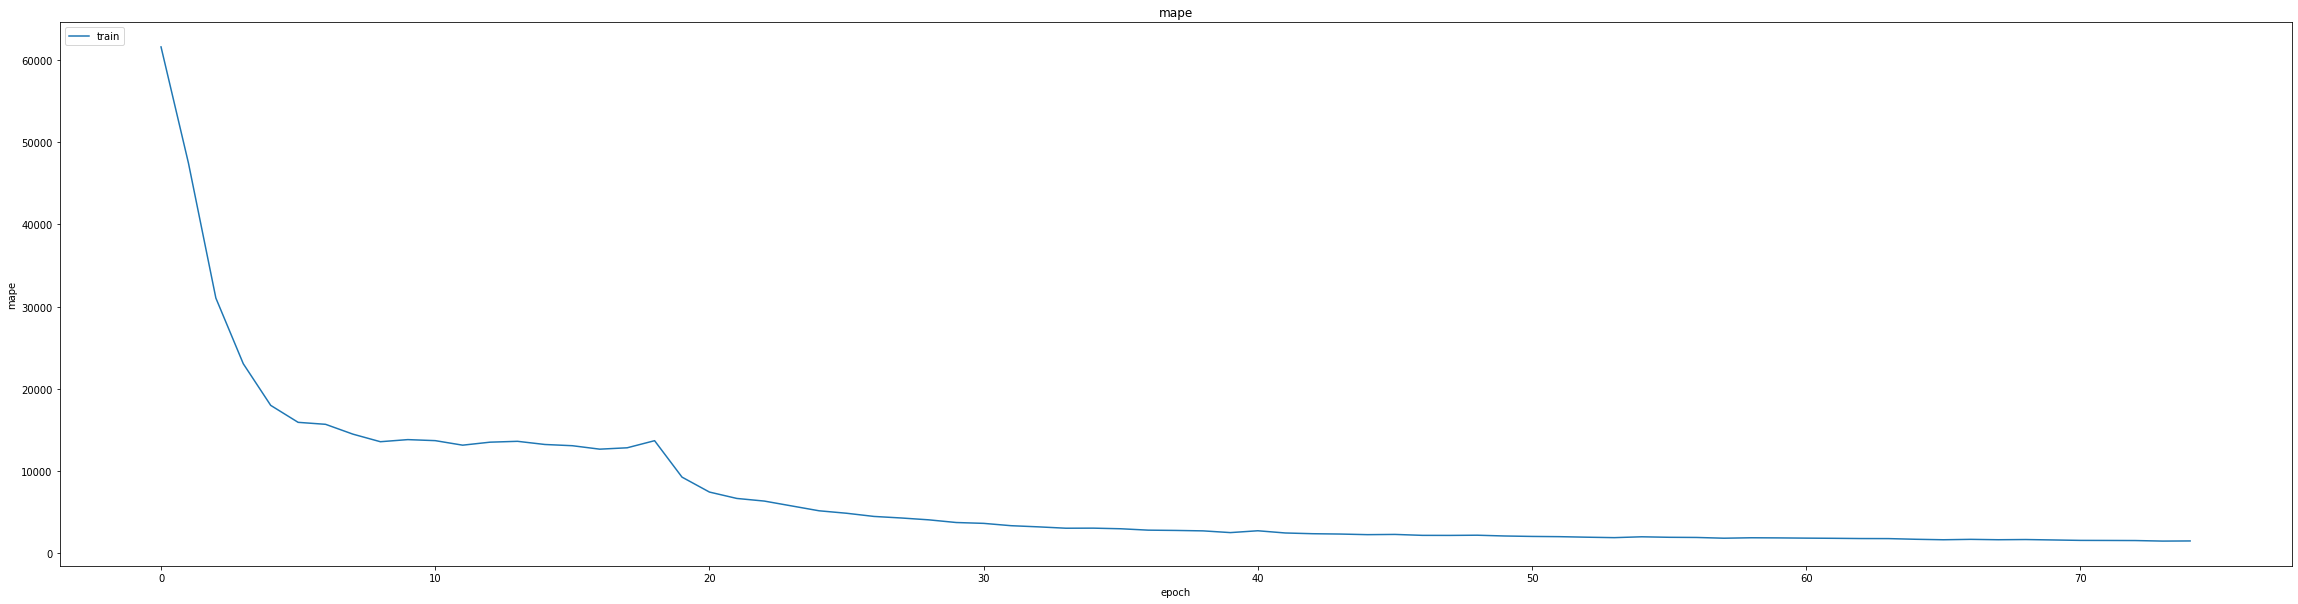

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.009277518838644028
0.009277518838644028
0.01320410706102848
464/464 [==============================] - 3s 4ms/step
0.9969571041755101


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:


from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
348/348 [==============================] - ETA: 0s - loss: 3.9151e-04 - mae: 0.0108 - mse: 3.9151e-04 - root_mean_squared_error: 0.0198 - mape: 1474.2819
Epoch 1: val_mse did not improve from 0.00017
348/348 [==============================] - 16s 24ms/step - loss: 3.9151e-04 - mae: 0.0108 - mse: 3.9151e-04 - root_mean_squared_error: 0.0198 - mape: 1474.2819 - val_loss: 2.5802e-04 - val_mae: 0.0127 - val_mse: 2.5802e-04 - val_root_mean_squared_error: 0.0161 - val_mape: 4407.1729 - lr: 0.0010
Epoch 2/25
344/348 [============================>.] - ETA: 0s - loss: 9.9850e-05 - mae: 0.0075 - mse: 9.9850e-05 - root_mean_squared_error: 0.0100 - mape: 1487.9487
Epoch 2: val_mse did not improve from 0.00017
348/348 [==============================] - 5s 13ms/step - loss: 1.0051e-04 - mae: 0.0076 - mse: 1.0051e-04 - root_mean_squared_error: 0.0100 - mape: 1471.1476 - val_loss: 3.7404e-04 - val_mae: 0.0166 - val_mse: 3.7404e-04 - val_root_mean_squared_error: 0.0193 - val_mape: 4195.9575 

348/348 [==============================] - 15s 44ms/step - loss: 1.0340e-04 - mae: 0.0078 - mse: 1.0340e-04 - root_mean_squared_error: 0.0102 - mape: 1379.2252 - val_loss: 1.4439e-04 - val_mae: 0.0088 - val_mse: 1.4439e-04 - val_root_mean_squared_error: 0.0120 - val_mape: 4131.0854 - lr: 9.0000e-04
Epoch 4/25
346/348 [============================>.] - ETA: 0s - loss: 1.0608e-04 - mae: 0.0079 - mse: 1.0608e-04 - root_mean_squared_error: 0.0103 - mape: 1403.2747
Epoch 4: val_mse did not improve from 0.00014
348/348 [==============================] - 4s 12ms/step - loss: 1.0608e-04 - mae: 0.0080 - mse: 1.0608e-04 - root_mean_squared_error: 0.0103 - mape: 1395.4719 - val_loss: 1.4577e-04 - val_mae: 0.0091 - val_mse: 1.4577e-04 - val_root_mean_squared_error: 0.0121 - val_mape: 4048.7258 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/25
346/348 [============================>.] - ETA: 0s - loss: 9.6493e-05 - mae: 0.0075 - mse: 9.6493e-05 - root_mean_squared_error: 0.0098 - mape:

348/348 [==============================] - 14s 40ms/step - loss: 8.8306e-05 - mae: 0.0072 - mse: 8.8306e-05 - root_mean_squared_error: 0.0094 - mape: 1308.5331 - val_loss: 1.4133e-04 - val_mae: 0.0093 - val_mse: 1.4133e-04 - val_root_mean_squared_error: 0.0119 - val_mape: 3889.3762 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/25
346/348 [============================>.] - ETA: 0s - loss: 8.4798e-05 - mae: 0.0071 - mse: 8.4798e-05 - root_mean_squared_error: 0.0092 - mape: 1282.6077
Epoch 7: val_mse did not improve from 0.00014
348/348 [==============================] - 4s 12ms/step - loss: 8.5280e-05 - mae: 0.0071 - mse: 8.5280e-05 - root_mean_squared_error: 0.0092 - mape: 1275.4840 - val_loss: 4.3910e-04 - val_mae: 0.0184 - val_mse: 4.3910e-04 - val_root_mean_squared_error: 0.0210 - val_mape: 3777.2612 - lr: 7.2900e-04
Epoch 8/25
344/348 [============================>.] - ETA: 0s - loss: 9.0077e-05 - mae: 0.0074 - mse: 9.0077e-05 - root_mean_squared_error: 0.0095 - mape:

348/348 [==============================] - 15s 43ms/step - loss: 6.7998e-05 - mae: 0.0063 - mse: 6.7998e-05 - root_mean_squared_error: 0.0082 - mape: 1219.8967 - val_loss: 1.2874e-04 - val_mae: 0.0091 - val_mse: 1.2874e-04 - val_root_mean_squared_error: 0.0113 - val_mape: 3781.9929 - lr: 6.5610e-04
Epoch 10/25
348/348 [==============================] - ETA: 0s - loss: 6.6878e-05 - mae: 0.0063 - mse: 6.6878e-05 - root_mean_squared_error: 0.0082 - mape: 1243.9434
Epoch 10: val_mse improved from 0.00013 to 0.00007, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 6.6878e-05 - mae: 0.0063 - mse: 6.6878e-05 - root_mean_squared_error: 0.0082 - mape: 1243.9434 - val_loss: 6.9572e-05 - val_mae: 0.0059 - val_mse: 6.9572e-05 - val_root_mean_squared_error: 0.0083 - val_mape: 3696.4790 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/25
344/348 [============================>.] - ETA: 0s - loss: 5.7016e-05 - mae: 0.0058 - mse: 5.7016e-05 - root_mean_squared_error: 0.0076 - mape: 1198.4713
Epoch 11: val_mse did not improve from 0.00007
348/348 [==============================] - 4s 12ms/step - loss: 5.7155e-05 - mae: 0.0058 - mse: 5.7155e-05 - root_mean_squared_error: 0.0076 - mape: 1184.9291 - val_loss: 1.3083e-04 - val_mae: 0.0096 - val_mse: 1.3083e-04 - val_root_mean_squared_error: 0.0114 - val_mape: 3600.3752 - lr: 5.9049e-04
Epoch 12/25
347/348 [============================>.] - ETA: 0s - loss: 6.5532e-05 - mae: 0.0062 - mse: 6.5532e-05 - root_mean_squared_error: 0.0081 - ma

348/348 [==============================] - 14s 40ms/step - loss: 4.1666e-05 - mae: 0.0049 - mse: 4.1666e-05 - root_mean_squared_error: 0.0065 - mape: 1072.9366 - val_loss: 5.4983e-05 - val_mae: 0.0054 - val_mse: 5.4983e-05 - val_root_mean_squared_error: 0.0074 - val_mape: 3253.8074 - lr: 4.3047e-04
lr changed to 0.00038742052274756136
Epoch 19/25
348/348 [==============================] - ETA: 0s - loss: 4.5367e-05 - mae: 0.0052 - mse: 4.5367e-05 - root_mean_squared_error: 0.0067 - mape: 1072.1290
Epoch 19: val_mse improved from 0.00005 to 0.00005, saving model to /content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(60-40)


348/348 [==============================] - 15s 43ms/step - loss: 4.5367e-05 - mae: 0.0052 - mse: 4.5367e-05 - root_mean_squared_error: 0.0067 - mape: 1072.1290 - val_loss: 4.8968e-05 - val_mae: 0.0047 - val_mse: 4.8968e-05 - val_root_mean_squared_error: 0.0070 - val_mape: 3256.6726 - lr: 3.8742e-04
Epoch 20/25
343/348 [============================>.] - ETA: 0s - loss: 4.1825e-05 - mae: 0.0049 - mse: 4.1825e-05 - root_mean_squared_error: 0.0065 - mape: 1091.8550
Epoch 20: val_mse did not improve from 0.00005
348/348 [==============================] - 4s 12ms/step - loss: 4.1660e-05 - mae: 0.0049 - mse: 4.1660e-05 - root_mean_squared_error: 0.0065 - mape: 1076.3749 - val_loss: 1.1646e-04 - val_mae: 0.0089 - val_mse: 1.1646e-04 - val_root_mean_squared_error: 0.0108 - val_mape: 3208.8325 - lr: 3.8742e-04
lr changed to 0.0003486784757114947
Epoch 21/25
345/348 [============================>.] - ETA: 0s - loss: 3.9001e-05 - mae: 0.0047 - mse: 3.9001e-05 - root_mean_squared_error: 0.0062 - ma

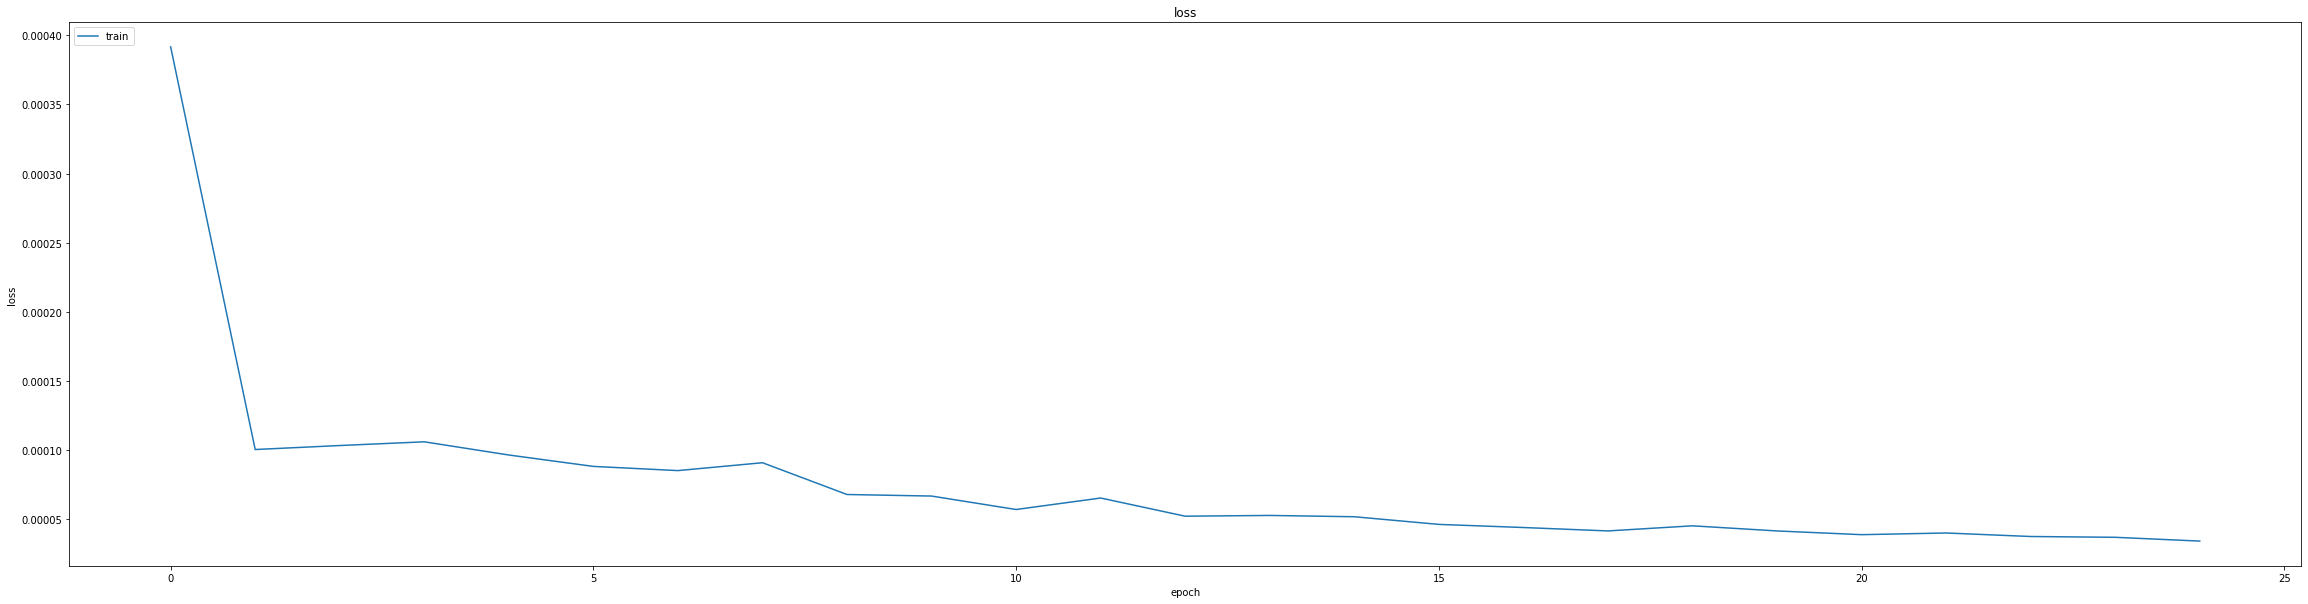

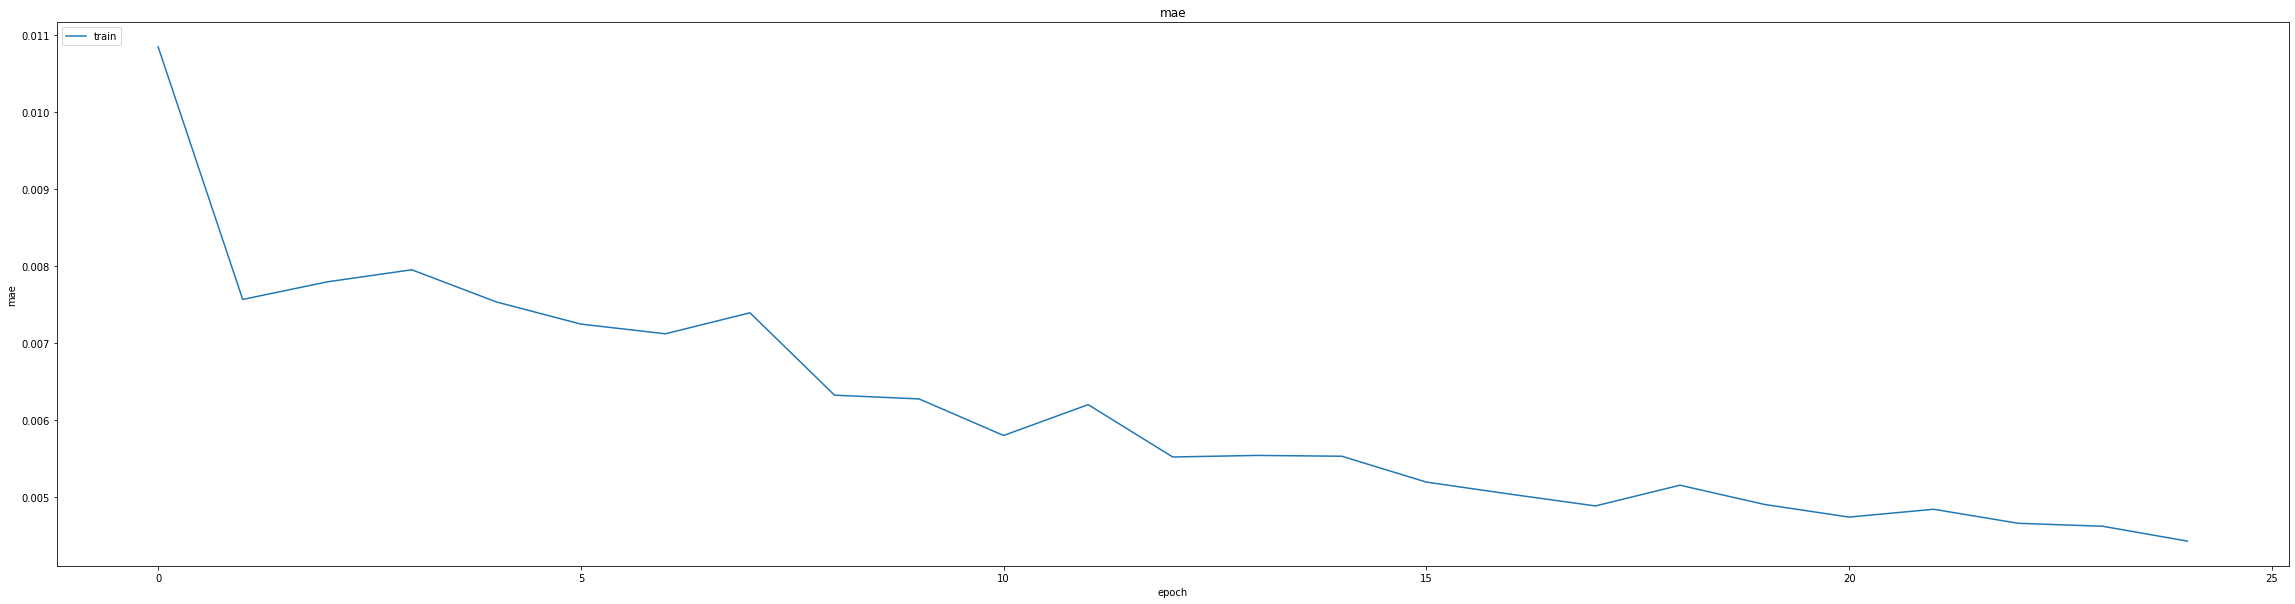

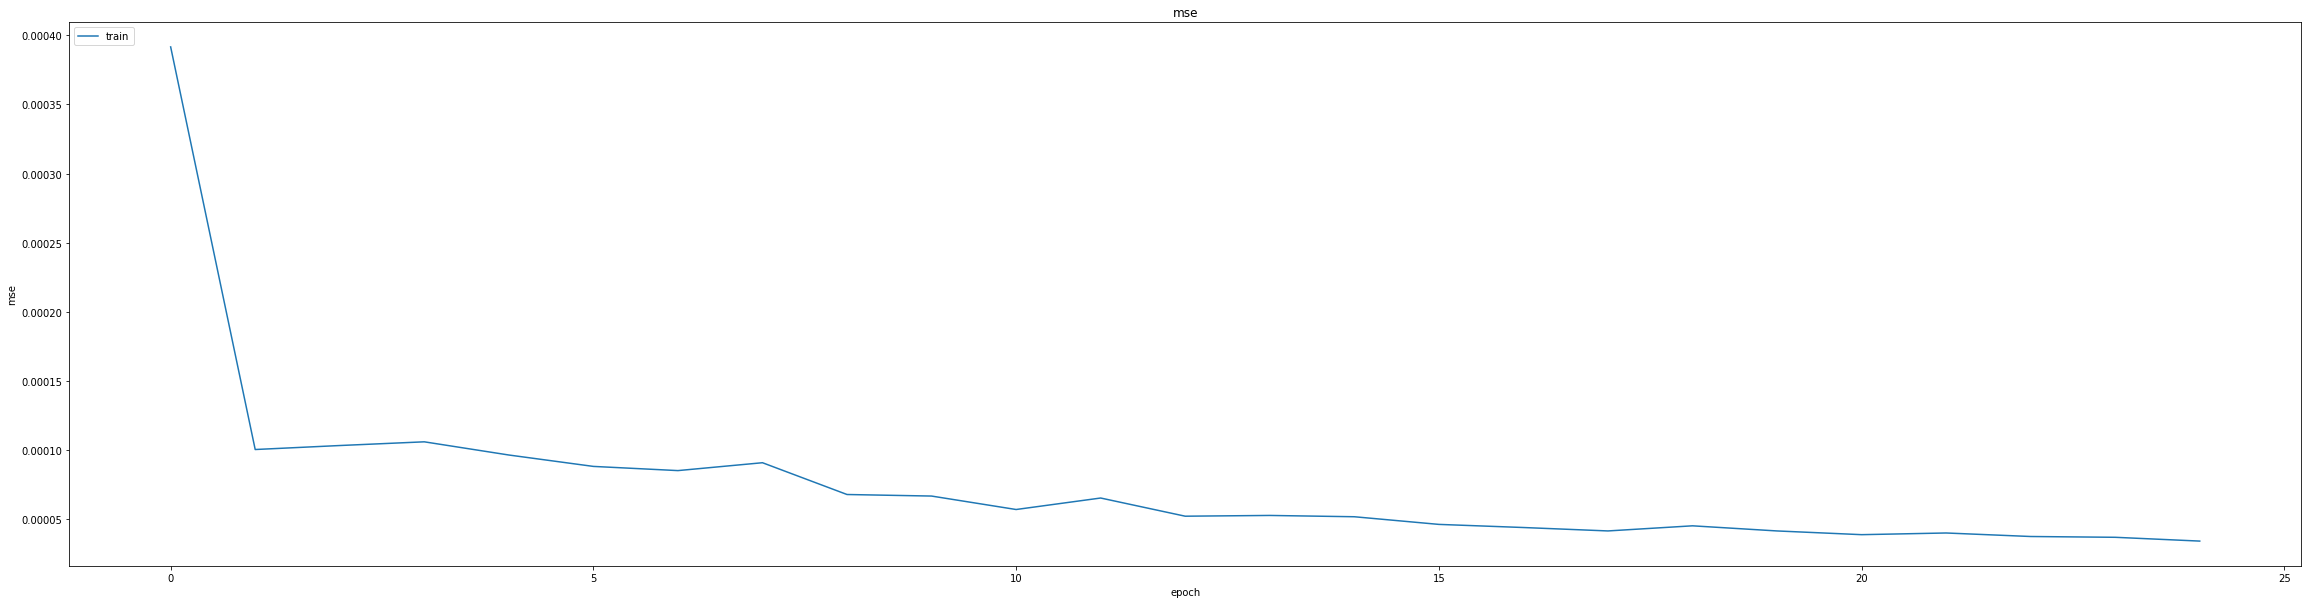

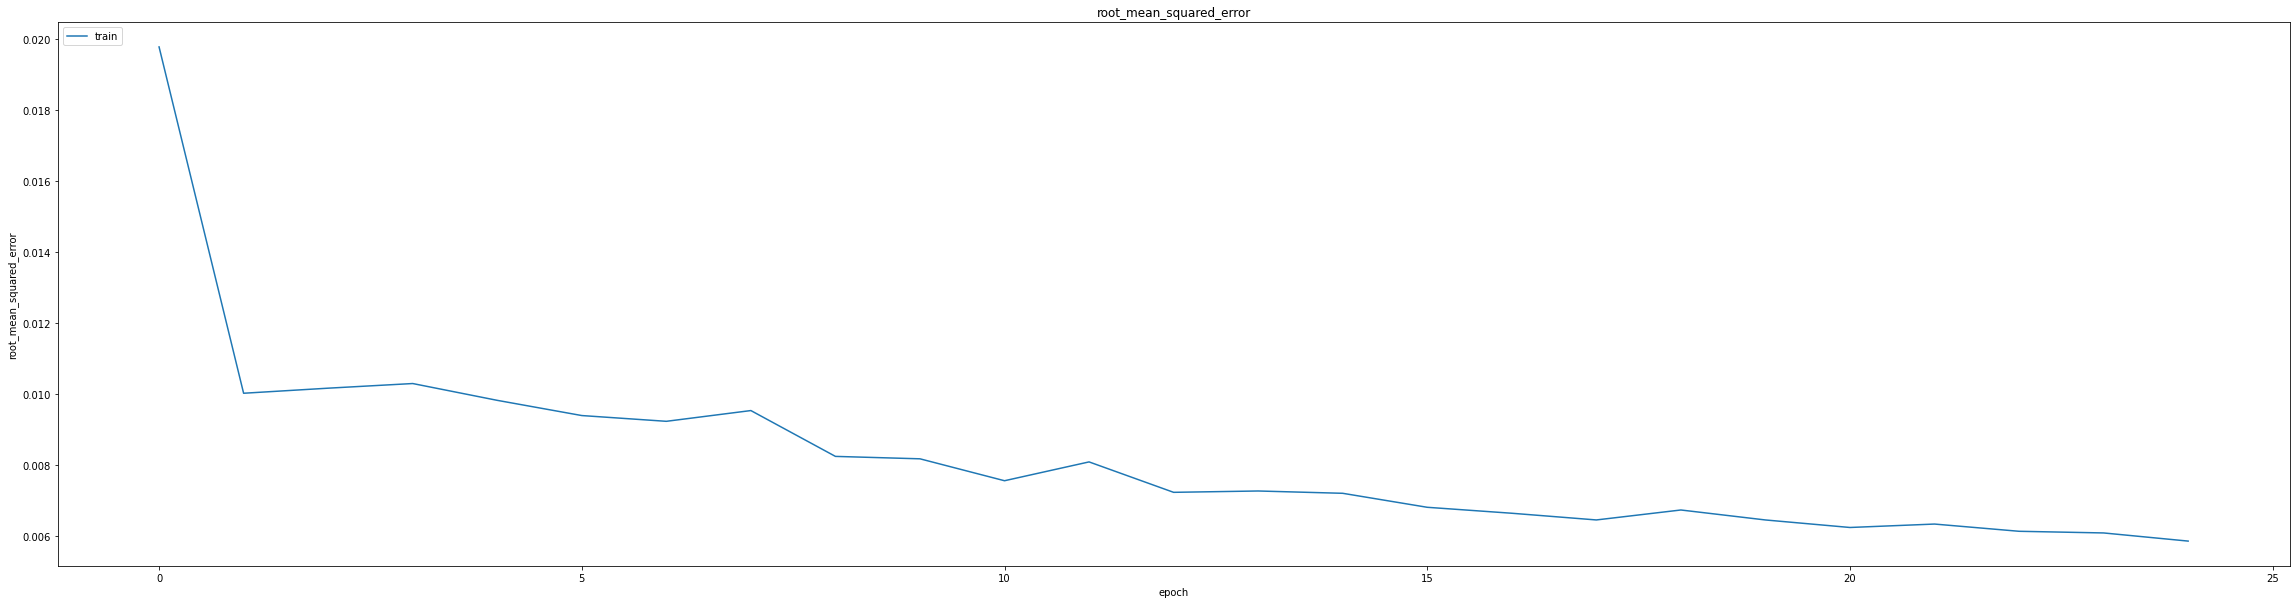

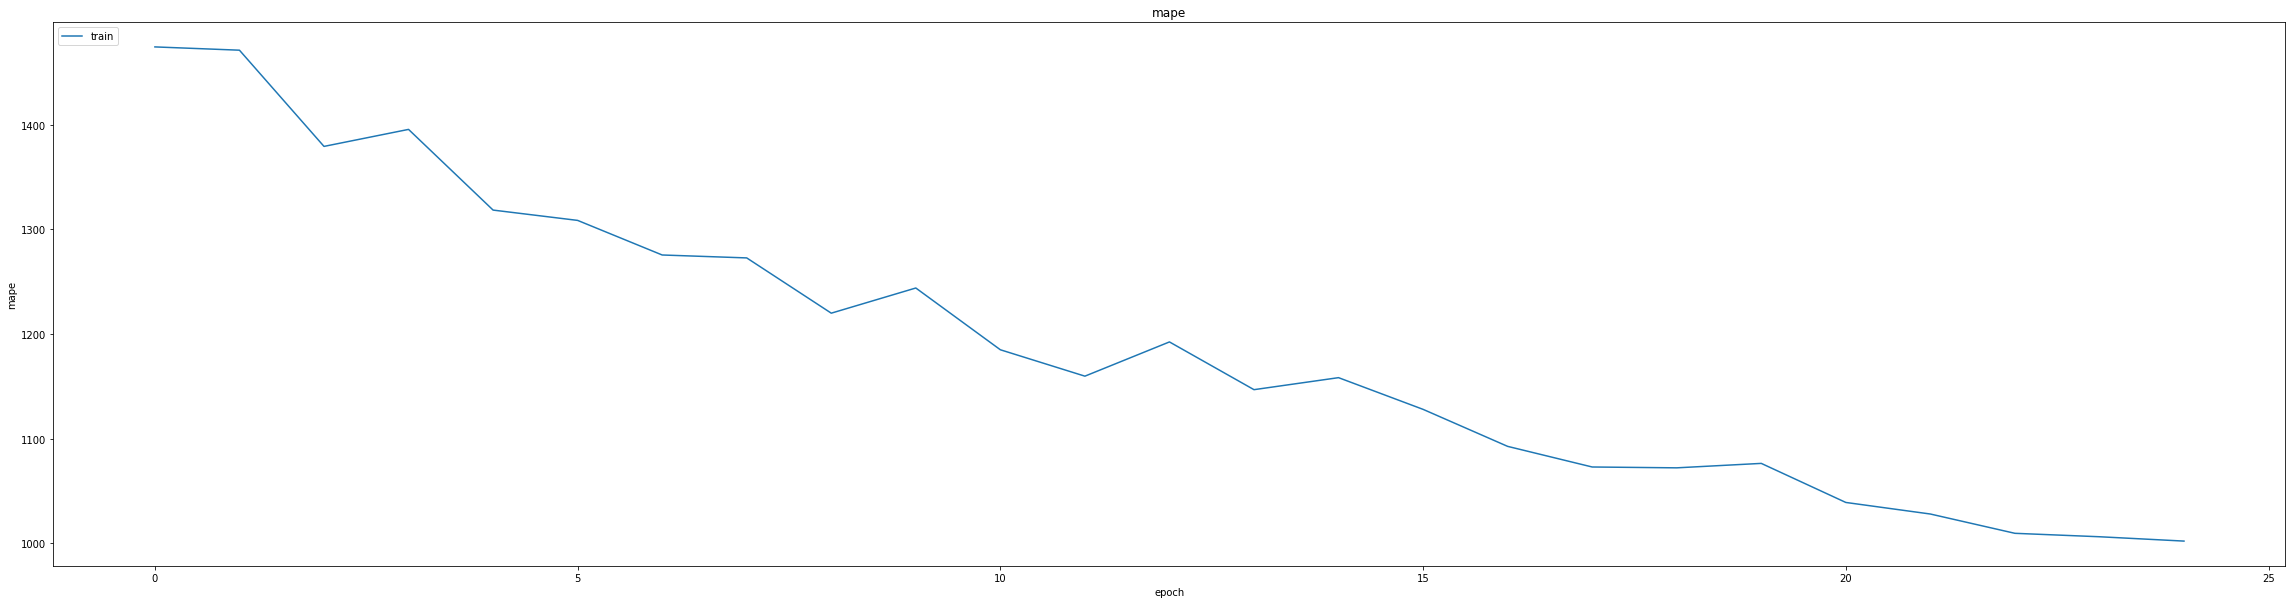

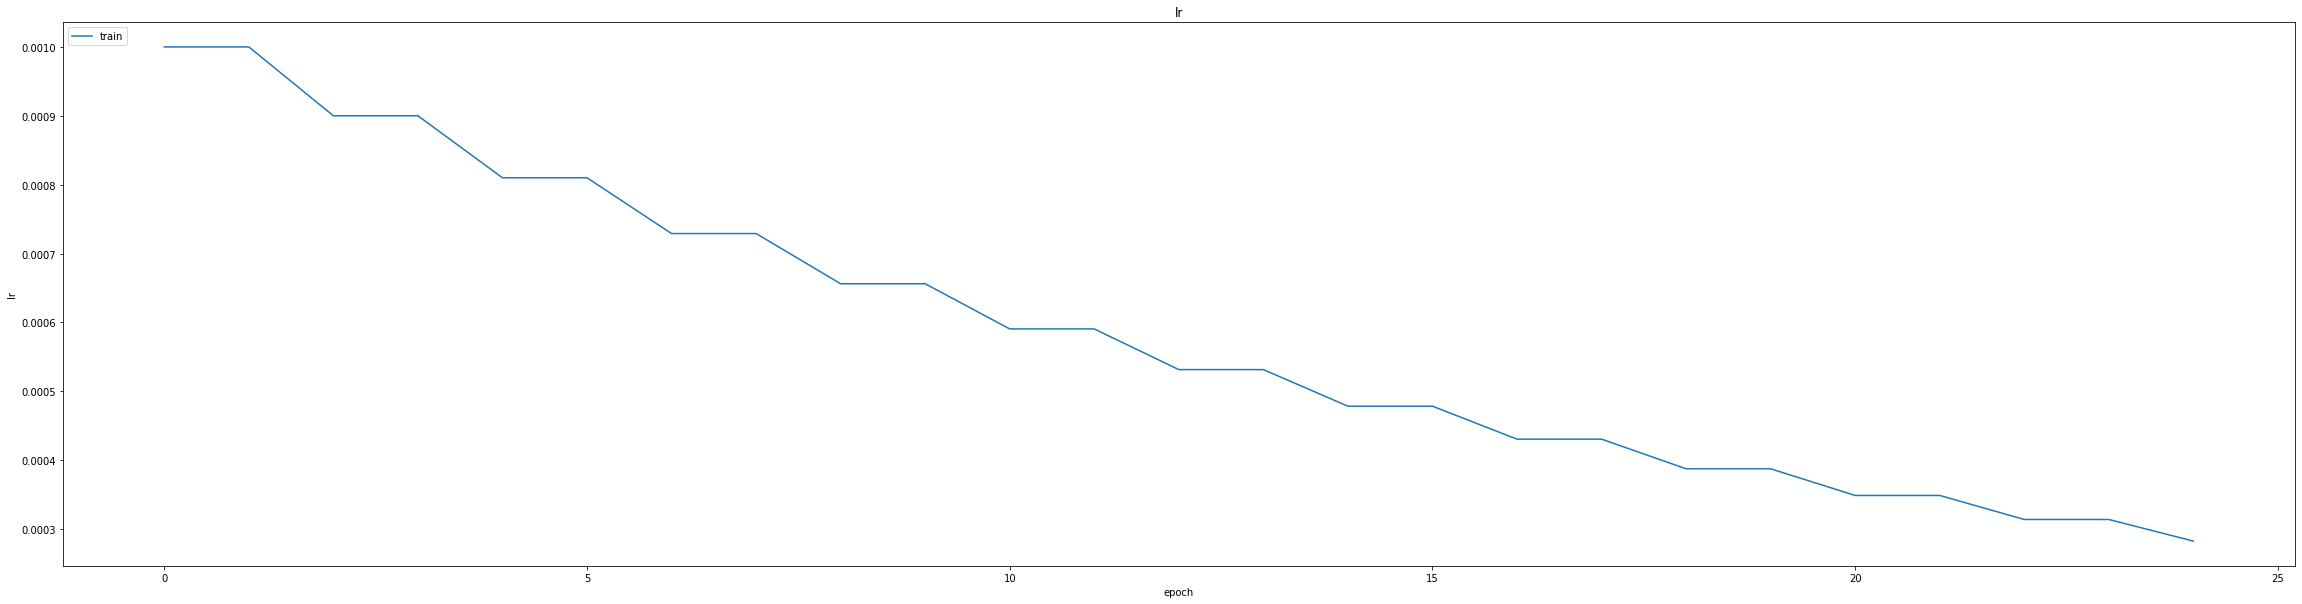

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.004722193814814091
0.004722193814814091
0.006997714750468731
464/464 [==============================] - 3s 4ms/step
0.9985372966185256


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_15min_GRU(60-40)")

464/464 [==============================] - 2s 4ms/step


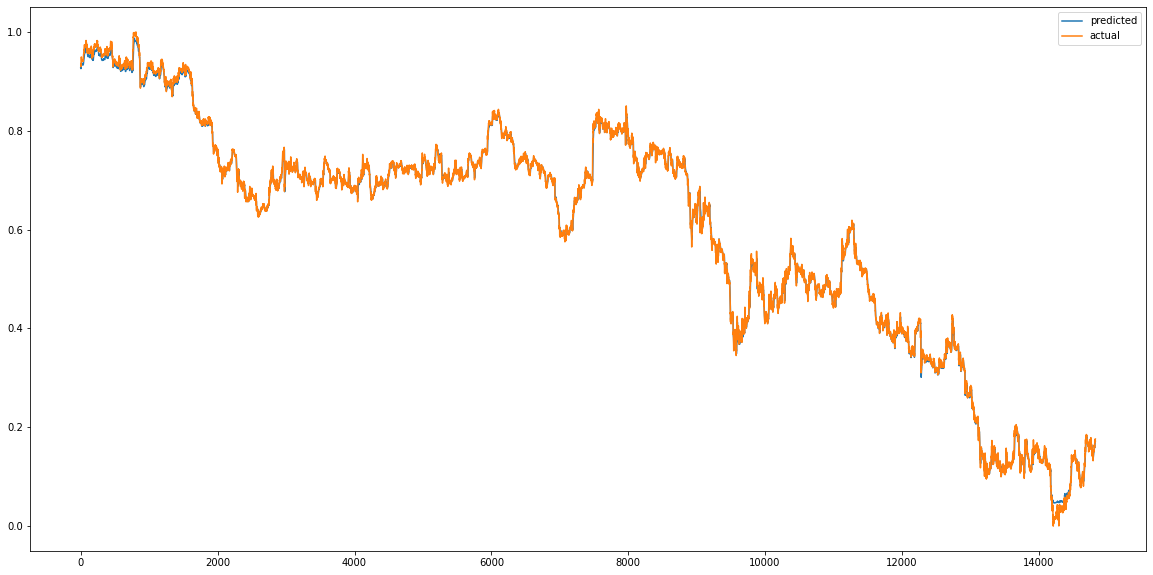

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


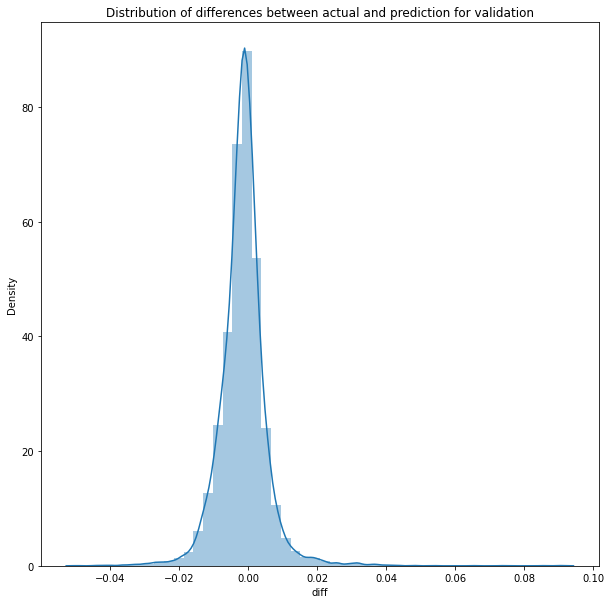

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 2s 4ms/step


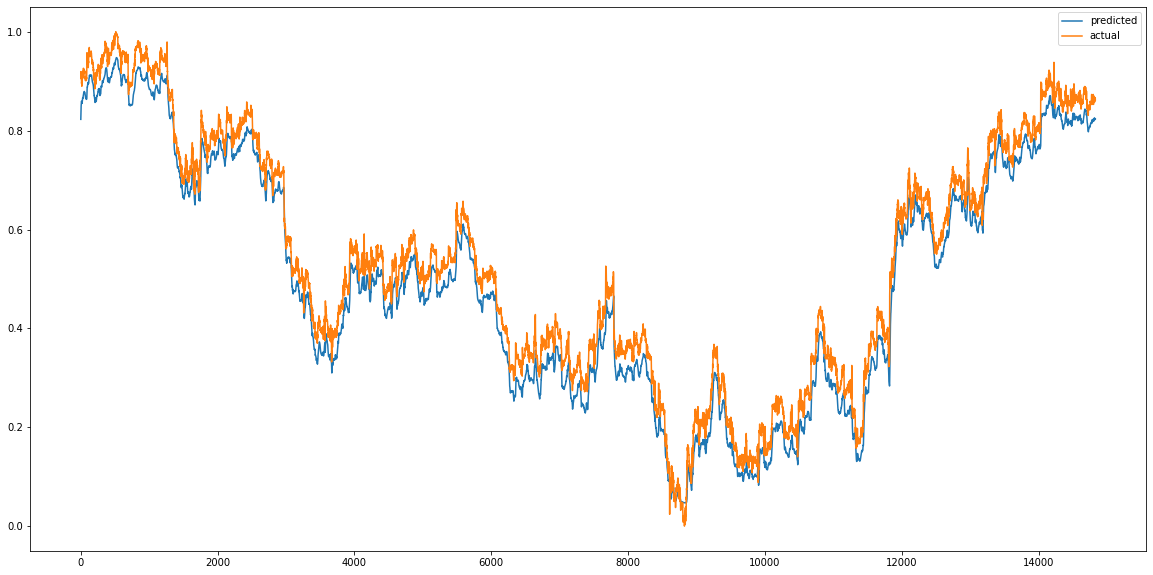

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


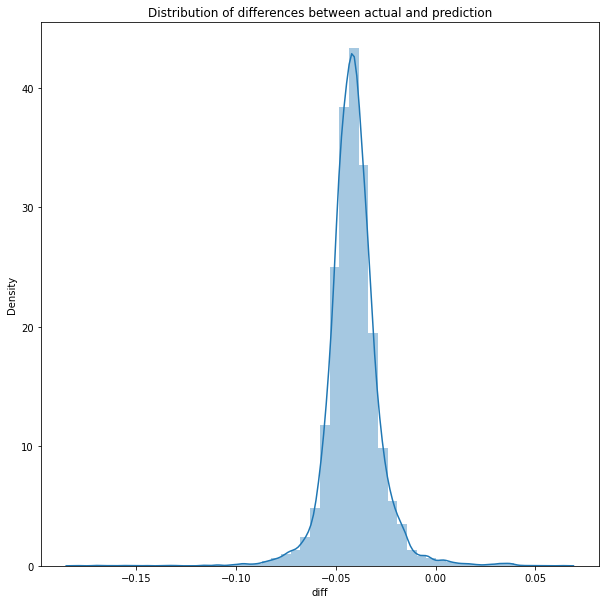

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0018603271961890192
RMSE :  0.0431315104788717
MAE :  0.04143730515886704
464/464 [==============================] - 2s 4ms/step
R2_Score  : 0.9691933070381399


count    14830.000000
mean        -0.041132
std          0.012982
min         -0.179249
25%         -0.047749
50%         -0.041588
75%         -0.035137
max          0.063309
Name: diff, dtype: float64